## Stemming And Lemmatization
### Bhuvana Kanakam, SE21UCSE035

#### Problem Statement :
Suppose you're tasked with building a program to analyze text data using
regular expressions in Python. Your program needs to preprocess a given
text by tokenizing it into individual words, performing normalization such
as converting all characters to lowercase, and applying specific regular
expression patterns for pattern matching.

#### Dataset:
[Sherlock Holmes.txt](https://mahindraecolecentrale-my.sharepoint.com/personal/sunath20ucse198_mahindrauniversity_edu_in/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fsunath20ucse198%5Fmahindrauniversity%5Fedu%5Fin%2FDocuments%2FNLP%2FAssignment%201%2FDataset&ga=1)

#### Task:
Using the Sherlock Holmes.txt file, perform the following tasks in
python:
1. Design and implement a preprocessing module for the problem that
effectively tokenizes the document, normalizes them, and extracts
relevant information using regular expressions. [10 marks]
Deliverables:
• List of all the tokens, stemmed, lemmatized, normalized, and
extracted relevant words (you are free to design your own metric to
find relevancy of word to document) [10 marks]
• Plot the analysis of both stemmed and lemmatized words and
compare the results:
a) Word frequency [10 marks]
(Hint: Select the top 10 most commonly occurring words)
b) Most common words ending with ‘ing’ [10 marks]
Bonus: [15 marks]
2. Identify and address the difficulties associated with building the
preprocessing module, such as designing robust regular expressions,
handling linguistic variations, and optimizing for efficiency.
3. Test the preprocessing module and discuss potential strategies for
mitigating the identified difficulties and improving the performance
of the preprocessing module in a real-world scenario.

### Import the libraries

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### The File Text




In [ ]:
text = """[Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue Carbuncle
   VIII.  The Adventure of the Speckled Band
   IX.    The Adventure of the Engineer’s Thumb
   X.     The Adventure of the Noble Bachelor
   XI.    The Adventure of the Beryl Coronet
   XII.   The Adventure of the Copper Beeches



I. A SCANDAL IN BOHEMIA


I.

To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the most perfect reasoning and observing machine that
the world has seen, but as a lover he would have placed himself in a
false position. He never spoke of the softer passions, save with a gibe
and a sneer. They were admirable things for the observer—excellent for
drawing the veil from men’s motives and actions. But for the trained
reasoner to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting factor which might
throw a doubt upon all his mental results. Grit in a sensitive
instrument, or a crack in one of his own high-power lenses, would not
be more disturbing than a strong emotion in a nature such as his. And
yet there was but one woman to him, and that woman was the late Irene
Adler, of dubious and questionable memory.

I had seen little of Holmes lately. My marriage had drifted us away
from each other. My own complete happiness, and the home-centred
interests which rise up around the man who first finds himself master
of his own establishment, were sufficient to absorb all my attention,
while Holmes, who loathed every form of society with his whole Bohemian
soul, remained in our lodgings in Baker Street, buried among his old
books, and alternating from week to week between cocaine and ambition,
the drowsiness of the drug, and the fierce energy of his own keen
nature. He was still, as ever, deeply attracted by the study of crime,
and occupied his immense faculties and extraordinary powers of
observation in following out those clues, and clearing up those
mysteries which had been abandoned as hopeless by the official police.
From time to time I heard some vague account of his doings: of his
summons to Odessa in the case of the Trepoff murder, of his clearing up
of the singular tragedy of the Atkinson brothers at Trincomalee, and
finally of the mission which he had accomplished so delicately and
successfully for the reigning family of Holland. Beyond these signs of
his activity, however, which I merely shared with all the readers of
the daily press, I knew little of my former friend and companion.

One night—it was on the twentieth of March, 1888—I was returning from a
journey to a patient (for I had now returned to civil practice), when
my way led me through Baker Street. As I passed the well-remembered
door, which must always be associated in my mind with my wooing, and
with the dark incidents of the Study in Scarlet, I was seized with a
keen desire to see Holmes again, and to know how he was employing his
extraordinary powers. His rooms were brilliantly lit, and, even as I
looked up, I saw his tall, spare figure pass twice in a dark silhouette
against the blind. He was pacing the room swiftly, eagerly, with his
head sunk upon his chest and his hands clasped behind him. To me, who
knew his every mood and habit, his attitude and manner told their own
story. He was at work again. He had risen out of his drug-created
dreams and was hot upon the scent of some new problem. I rang the bell
and was shown up to the chamber which had formerly been in part my own.

His manner was not effusive. It seldom was; but he was glad, I think,
to see me. With hardly a word spoken, but with a kindly eye, he waved
me to an armchair, threw across his case of cigars, and indicated a
spirit case and a gasogene in the corner. Then he stood before the fire
and looked me over in his singular introspective fashion.

“Wedlock suits you,” he remarked. “I think, Watson, that you have put
on seven and a half pounds since I saw you.”

“Seven!” I answered.

“Indeed, I should have thought a little more. Just a trifle more, I
fancy, Watson. And in practice again, I observe. You did not tell me
that you intended to go into harness.”

“Then, how do you know?”

“I see it, I deduce it. How do I know that you have been getting
yourself very wet lately, and that you have a most clumsy and careless
servant girl?”

“My dear Holmes,” said I, “this is too much. You would certainly have
been burned, had you lived a few centuries ago. It is true that I had a
country walk on Thursday and came home in a dreadful mess, but as I
have changed my clothes I can’t imagine how you deduce it. As to Mary
Jane, she is incorrigible, and my wife has given her notice, but there,
again, I fail to see how you work it out.”

He chuckled to himself and rubbed his long, nervous hands together.

“It is simplicity itself,” said he; “my eyes tell me that on the inside
of your left shoe, just where the firelight strikes it, the leather is
scored by six almost parallel cuts. Obviously they have been caused by
someone who has very carelessly scraped round the edges of the sole in
order to remove crusted mud from it. Hence, you see, my double
deduction that you had been out in vile weather, and that you had a
particularly malignant boot-slitting specimen of the London slavey. As
to your practice, if a gentleman walks into my rooms smelling of
iodoform, with a black mark of nitrate of silver upon his right
forefinger, and a bulge on the right side of his top-hat to show where
he has secreted his stethoscope, I must be dull, indeed, if I do not
pronounce him to be an active member of the medical profession.”

I could not help laughing at the ease with which he explained his
process of deduction. “When I hear you give your reasons,” I remarked,
“the thing always appears to me to be so ridiculously simple that I
could easily do it myself, though at each successive instance of your
reasoning I am baffled until you explain your process. And yet I
believe that my eyes are as good as yours.”

“Quite so,” he answered, lighting a cigarette, and throwing himself
down into an armchair. “You see, but you do not observe. The
distinction is clear. For example, you have frequently seen the steps
which lead up from the hall to this room.”

“Frequently.”

“How often?”

“Well, some hundreds of times.”

“Then how many are there?”

“How many? I don’t know.”

“Quite so! You have not observed. And yet you have seen. That is just
my point. Now, I know that there are seventeen steps, because I have
both seen and observed. By the way, since you are interested in these
little problems, and since you are good enough to chronicle one or two
of my trifling experiences, you may be interested in this.” He threw
over a sheet of thick, pink-tinted notepaper which had been lying open
upon the table. “It came by the last post,” said he. “Read it aloud.”

The note was undated, and without either signature or address.

“There will call upon you to-night, at a quarter to eight o’clock,” it
said, “a gentleman who desires to consult you upon a matter of the very
deepest moment. Your recent services to one of the royal houses of
Europe have shown that you are one who may safely be trusted with
matters which are of an importance which can hardly be exaggerated.
This account of you we have from all quarters received. Be in your
chamber then at that hour, and do not take it amiss if your visitor
wear a mask.”

“This is indeed a mystery,” I remarked. “What do you imagine that it
means?”

“I have no data yet. It is a capital mistake to theorise before one has
data. Insensibly one begins to twist facts to suit theories, instead of
theories to suit facts. But the note itself. What do you deduce from
it?”

I carefully examined the writing, and the paper upon which it was
written.

“The man who wrote it was presumably well to do,” I remarked,
endeavouring to imitate my companion’s processes. “Such paper could not
be bought under half a crown a packet. It is peculiarly strong and
stiff.”

“Peculiar—that is the very word,” said Holmes. “It is not an English
paper at all. Hold it up to the light.”

I did so, and saw a large “E” with a small “g,” a “P,” and a large “G”
with a small “t” woven into the texture of the paper.

“What do you make of that?” asked Holmes.

“The name of the maker, no doubt; or his monogram, rather.”

“Not at all. The ‘G’ with the small ‘t’ stands for ‘Gesellschaft,’
which is the German for ‘Company.’ It is a customary contraction like
our ‘Co.’ ‘P,’ of course, stands for ‘Papier.’ Now for the ‘Eg.’ Let us
glance at our Continental Gazetteer.” He took down a heavy brown volume
from his shelves. “Eglow, Eglonitz—here we are, Egria. It is in a
German-speaking country—in Bohemia, not far from Carlsbad. ‘Remarkable
as being the scene of the death of Wallenstein, and for its numerous
glass-factories and paper-mills.’ Ha, ha, my boy, what do you make of
that?” His eyes sparkled, and he sent up a great blue triumphant cloud
from his cigarette.

“The paper was made in Bohemia,” I said.

“Precisely. And the man who wrote the note is a German. Do you note the
peculiar construction of the sentence—‘This account of you we have from
all quarters received.’ A Frenchman or Russian could not have written
that. It is the German who is so uncourteous to his verbs. It only
remains, therefore, to discover what is wanted by this German who
writes upon Bohemian paper and prefers wearing a mask to showing his
face. And here he comes, if I am not mistaken, to resolve all our
doubts.”

As he spoke there was the sharp sound of horses’ hoofs and grating
wheels against the curb, followed by a sharp pull at the bell. Holmes
whistled.

“A pair, by the sound,” said he. “Yes,” he continued, glancing out of
the window. “A nice little brougham and a pair of beauties. A hundred
and fifty guineas apiece. There’s money in this case, Watson, if there
is nothing else.”

“I think that I had better go, Holmes.”

“Not a bit, Doctor. Stay where you are. I am lost without my Boswell.
And this promises to be interesting. It would be a pity to miss it.”

“But your client—”

“Never mind him. I may want your help, and so may he. Here he comes.
Sit down in that armchair, Doctor, and give us your best attention.”

A slow and heavy step, which had been heard upon the stairs and in the
passage, paused immediately outside the door. Then there was a loud and
authoritative tap.

“Come in!” said Holmes.

A man entered who could hardly have been less than six feet six inches
in height, with the chest and limbs of a Hercules. His dress was rich
with a richness which would, in England, be looked upon as akin to bad
taste. Heavy bands of astrakhan were slashed across the sleeves and
fronts of his double-breasted coat, while the deep blue cloak which was
thrown over his shoulders was lined with flame-coloured silk and
secured at the neck with a brooch which consisted of a single flaming
beryl. Boots which extended halfway up his calves, and which were
trimmed at the tops with rich brown fur, completed the impression of
barbaric opulence which was suggested by his whole appearance. He
carried a broad-brimmed hat in his hand, while he wore across the upper
part of his face, extending down past the cheekbones, a black vizard
mask, which he had apparently adjusted that very moment, for his hand
was still raised to it as he entered. From the lower part of the face
he appeared to be a man of strong character, with a thick, hanging lip,
and a long, straight chin suggestive of resolution pushed to the length
of obstinacy.

“You had my note?” he asked with a deep harsh voice and a strongly
marked German accent. “I told you that I would call.” He looked from
one to the other of us, as if uncertain which to address.

“Pray take a seat,” said Holmes. “This is my friend and colleague, Dr.
Watson, who is occasionally good enough to help me in my cases. Whom
have I the honour to address?”

“You may address me as the Count Von Kramm, a Bohemian nobleman. I
understand that this gentleman, your friend, is a man of honour and
discretion, whom I may trust with a matter of the most extreme
importance. If not, I should much prefer to communicate with you
alone.”

I rose to go, but Holmes caught me by the wrist and pushed me back into
my chair. “It is both, or none,” said he. “You may say before this
gentleman anything which you may say to me.”

The Count shrugged his broad shoulders. “Then I must begin,” said he,
“by binding you both to absolute secrecy for two years; at the end of
that time the matter will be of no importance. At present it is not too
much to say that it is of such weight it may have an influence upon
European history.”

“I promise,” said Holmes.

“And I.”

“You will excuse this mask,” continued our strange visitor. “The august
person who employs me wishes his agent to be unknown to you, and I may
confess at once that the title by which I have just called myself is
not exactly my own.”

“I was aware of it,” said Holmes dryly.

“The circumstances are of great delicacy, and every precaution has to
be taken to quench what might grow to be an immense scandal and
seriously compromise one of the reigning families of Europe. To speak
plainly, the matter implicates the great House of Ormstein, hereditary
kings of Bohemia.”

“I was also aware of that,” murmured Holmes, settling himself down in
his armchair and closing his eyes.

Our visitor glanced with some apparent surprise at the languid,
lounging figure of the man who had been no doubt depicted to him as the
most incisive reasoner and most energetic agent in Europe. Holmes
slowly reopened his eyes and looked impatiently at his gigantic client.

“If your Majesty would condescend to state your case,” he remarked, “I
should be better able to advise you.”

The man sprang from his chair and paced up and down the room in
uncontrollable agitation. Then, with a gesture of desperation, he tore
the mask from his face and hurled it upon the ground. “You are right,”
he cried; “I am the King. Why should I attempt to conceal it?”

“Why, indeed?” murmured Holmes. “Your Majesty had not spoken before I
was aware that I was addressing Wilhelm Gottsreich Sigismond von
Ormstein, Grand Duke of Cassel-Felstein, and hereditary King of
Bohemia.”

“But you can understand,” said our strange visitor, sitting down once
more and passing his hand over his high white forehead, “you can
understand that I am not accustomed to doing such business in my own
person. Yet the matter was so delicate that I could not confide it to
an agent without putting myself in his power. I have come _incognito_
from Prague for the purpose of consulting you.”

“Then, pray consult,” said Holmes, shutting his eyes once more.

“The facts are briefly these: Some five years ago, during a lengthy
visit to Warsaw, I made the acquaintance of the well-known adventuress,
Irene Adler. The name is no doubt familiar to you.”

“Kindly look her up in my index, Doctor,” murmured Holmes without
opening his eyes. For many years he had adopted a system of docketing
all paragraphs concerning men and things, so that it was difficult to
name a subject or a person on which he could not at once furnish
information. In this case I found her biography sandwiched in between
that of a Hebrew rabbi and that of a staff-commander who had written a
monograph upon the deep-sea fishes.

“Let me see!” said Holmes. “Hum! Born in New Jersey in the year 1858.
Contralto—hum! La Scala, hum! Prima donna Imperial Opera of Warsaw—yes!
Retired from operatic stage—ha! Living in London—quite so! Your
Majesty, as I understand, became entangled with this young person,
wrote her some compromising letters, and is now desirous of getting
those letters back.”

“Precisely so. But how—”

“Was there a secret marriage?”

“None.”

“No legal papers or certificates?”

“None.”

“Then I fail to follow your Majesty. If this young person should
produce her letters for blackmailing or other purposes, how is she to
prove their authenticity?”

“There is the writing.”

“Pooh, pooh! Forgery.”

“My private note-paper.”

“Stolen.”

“My own seal.”

“Imitated.”

“My photograph.”

“Bought.”

“We were both in the photograph.”

“Oh, dear! That is very bad! Your Majesty has indeed committed an
indiscretion.”

“I was mad—insane.”

“You have compromised yourself seriously.”

“I was only Crown Prince then. I was young. I am but thirty now.”

“It must be recovered.”

“We have tried and failed.”

“Your Majesty must pay. It must be bought.”

“She will not sell.”

“Stolen, then.”

“Five attempts have been made. Twice burglars in my pay ransacked her
house. Once we diverted her luggage when she travelled. Twice she has
been waylaid. There has been no result.”

“No sign of it?”

“Absolutely none.”

Holmes laughed. “It is quite a pretty little problem,” said he.

“But a very serious one to me,” returned the King reproachfully.

“Very, indeed. And what does she propose to do with the photograph?”

“To ruin me.”

“But how?”

“I am about to be married.”

“So I have heard.”

“To Clotilde Lothman von Saxe-Meningen, second daughter of the King of
Scandinavia. You may know the strict principles of her family. She is
herself the very soul of delicacy. A shadow of a doubt as to my conduct
would bring the matter to an end.”

“And Irene Adler?”

“Threatens to send them the photograph. And she will do it. I know that
she will do it. You do not know her, but she has a soul of steel. She
has the face of the most beautiful of women, and the mind of the most
resolute of men. Rather than I should marry another woman, there are no
lengths to which she would not go—none.”

“You are sure that she has not sent it yet?”

“I am sure.”

“And why?”

“Because she has said that she would send it on the day when the
betrothal was publicly proclaimed. That will be next Monday.”

“Oh, then we have three days yet,” said Holmes with a yawn. “That is
very fortunate, as I have one or two matters of importance to look into
just at present. Your Majesty will, of course, stay in London for the
present?”

“Certainly. You will find me at the Langham under the name of the Count
Von Kramm.”

“Then I shall drop you a line to let you know how we progress.”

“Pray do so. I shall be all anxiety.”

“Then, as to money?”

“You have _carte blanche_.”

“Absolutely?”

“I tell you that I would give one of the provinces of my kingdom to
have that photograph.”

“And for present expenses?”

The King took a heavy chamois leather bag from under his cloak and laid
it on the table.

“There are three hundred pounds in gold and seven hundred in notes,” he
said.

Holmes scribbled a receipt upon a sheet of his note-book and handed it
to him.

“And Mademoiselle’s address?” he asked.

“Is Briony Lodge, Serpentine Avenue, St. John’s Wood.”

Holmes took a note of it. “One other question,” said he. “Was the
photograph a cabinet?”

“It was.”

“Then, good-night, your Majesty, and I trust that we shall soon have
some good news for you. And good-night, Watson,” he added, as the
wheels of the royal brougham rolled down the street. “If you will be
good enough to call to-morrow afternoon at three o’clock I should like
to chat this little matter over with you.”


II.

At three o’clock precisely I was at Baker Street, but Holmes had not
yet returned. The landlady informed me that he had left the house
shortly after eight o’clock in the morning. I sat down beside the fire,
however, with the intention of awaiting him, however long he might be.
I was already deeply interested in his inquiry, for, though it was
surrounded by none of the grim and strange features which were
associated with the two crimes which I have already recorded, still,
the nature of the case and the exalted station of his client gave it a
character of its own. Indeed, apart from the nature of the
investigation which my friend had on hand, there was something in his
masterly grasp of a situation, and his keen, incisive reasoning, which
made it a pleasure to me to study his system of work, and to follow the
quick, subtle methods by which he disentangled the most inextricable
mysteries. So accustomed was I to his invariable success that the very
possibility of his failing had ceased to enter into my head.

It was close upon four before the door opened, and a drunken-looking
groom, ill-kempt and side-whiskered, with an inflamed face and
disreputable clothes, walked into the room. Accustomed as I was to my
friend’s amazing powers in the use of disguises, I had to look three
times before I was certain that it was indeed he. With a nod he
vanished into the bedroom, whence he emerged in five minutes
tweed-suited and respectable, as of old. Putting his hands into his
pockets, he stretched out his legs in front of the fire and laughed
heartily for some minutes.

“Well, really!” he cried, and then he choked and laughed again until he
was obliged to lie back, limp and helpless, in the chair.

“What is it?”

“It’s quite too funny. I am sure you could never guess how I employed
my morning, or what I ended by doing.”

“I can’t imagine. I suppose that you have been watching the habits, and
perhaps the house, of Miss Irene Adler.”

“Quite so; but the sequel was rather unusual. I will tell you, however.
I left the house a little after eight o’clock this morning in the
character of a groom out of work. There is a wonderful sympathy and
freemasonry among horsey men. Be one of them, and you will know all
that there is to know. I soon found Briony Lodge. It is a _bijou_
villa, with a garden at the back, but built out in front right up to
the road, two stories. Chubb lock to the door. Large sitting-room on
the right side, well furnished, with long windows almost to the floor,
and those preposterous English window fasteners which a child could
open. Behind there was nothing remarkable, save that the passage window
could be reached from the top of the coach-house. I walked round it and
examined it closely from every point of view, but without noting
anything else of interest.

“I then lounged down the street and found, as I expected, that there
was a mews in a lane which runs down by one wall of the garden. I lent
the ostlers a hand in rubbing down their horses, and received in
exchange twopence, a glass of half-and-half, two fills of shag tobacco,
and as much information as I could desire about Miss Adler, to say
nothing of half a dozen other people in the neighbourhood in whom I was
not in the least interested, but whose biographies I was compelled to
listen to.”

“And what of Irene Adler?” I asked.

“Oh, she has turned all the men’s heads down in that part. She is the
daintiest thing under a bonnet on this planet. So say the
Serpentine-mews, to a man. She lives quietly, sings at concerts, drives
out at five every day, and returns at seven sharp for dinner. Seldom
goes out at other times, except when she sings. Has only one male
visitor, but a good deal of him. He is dark, handsome, and dashing,
never calls less than once a day, and often twice. He is a Mr. Godfrey
Norton, of the Inner Temple. See the advantages of a cabman as a
confidant. They had driven him home a dozen times from Serpentine-mews,
and knew all about him. When I had listened to all they had to tell, I
began to walk up and down near Briony Lodge once more, and to think
over my plan of campaign.

“This Godfrey Norton was evidently an important factor in the matter.
He was a lawyer. That sounded ominous. What was the relation between
them, and what the object of his repeated visits? Was she his client,
his friend, or his mistress? If the former, she had probably
transferred the photograph to his keeping. If the latter, it was less
likely. On the issue of this question depended whether I should
continue my work at Briony Lodge, or turn my attention to the
gentleman’s chambers in the Temple. It was a delicate point, and it
widened the field of my inquiry. I fear that I bore you with these
details, but I have to let you see my little difficulties, if you are
to understand the situation.”

“I am following you closely,” I answered.

“I was still balancing the matter in my mind when a hansom cab drove up
to Briony Lodge, and a gentleman sprang out. He was a remarkably
handsome man, dark, aquiline, and moustached—evidently the man of whom
I had heard. He appeared to be in a great hurry, shouted to the cabman
to wait, and brushed past the maid who opened the door with the air of
a man who was thoroughly at home.

“He was in the house about half an hour, and I could catch glimpses of
him in the windows of the sitting-room, pacing up and down, talking
excitedly, and waving his arms. Of her I could see nothing. Presently
he emerged, looking even more flurried than before. As he stepped up to
the cab, he pulled a gold watch from his pocket and looked at it
earnestly, ‘Drive like the devil,’ he shouted, ‘first to Gross &
Hankey’s in Regent Street, and then to the Church of St. Monica in the
Edgeware Road. Half a guinea if you do it in twenty minutes!’

“Away they went, and I was just wondering whether I should not do well
to follow them when up the lane came a neat little landau, the coachman
with his coat only half-buttoned, and his tie under his ear, while all
the tags of his harness were sticking out of the buckles. It hadn’t
pulled up before she shot out of the hall door and into it. I only
caught a glimpse of her at the moment, but she was a lovely woman, with
a face that a man might die for.

“‘The Church of St. Monica, John,’ she cried, ‘and half a sovereign if
you reach it in twenty minutes.’

“This was quite too good to lose, Watson. I was just balancing whether
I should run for it, or whether I should perch behind her landau when a
cab came through the street. The driver looked twice at such a shabby
fare, but I jumped in before he could object. ‘The Church of St.
Monica,’ said I, ‘and half a sovereign if you reach it in twenty
minutes.’ It was twenty-five minutes to twelve, and of course it was
clear enough what was in the wind.

“My cabby drove fast. I don’t think I ever drove faster, but the others
were there before us. The cab and the landau with their steaming horses
were in front of the door when I arrived. I paid the man and hurried
into the church. There was not a soul there save the two whom I had
followed and a surpliced clergyman, who seemed to be expostulating with
them. They were all three standing in a knot in front of the altar. I
lounged up the side aisle like any other idler who has dropped into a
church. Suddenly, to my surprise, the three at the altar faced round to
me, and Godfrey Norton came running as hard as he could towards me.

“‘Thank God,’ he cried. ‘You’ll do. Come! Come!’

“‘What then?’ I asked.

“‘Come, man, come, only three minutes, or it won’t be legal.’

“I was half-dragged up to the altar, and before I knew where I was I
found myself mumbling responses which were whispered in my ear, and
vouching for things of which I knew nothing, and generally assisting in
the secure tying up of Irene Adler, spinster, to Godfrey Norton,
bachelor. It was all done in an instant, and there was the gentleman
thanking me on the one side and the lady on the other, while the
clergyman beamed on me in front. It was the most preposterous position
in which I ever found myself in my life, and it was the thought of it
that started me laughing just now. It seems that there had been some
informality about their license, that the clergyman absolutely refused
to marry them without a witness of some sort, and that my lucky
appearance saved the bridegroom from having to sally out into the
streets in search of a best man. The bride gave me a sovereign, and I
mean to wear it on my watch chain in memory of the occasion.”

“This is a very unexpected turn of affairs,” said I; “and what then?”

“Well, I found my plans very seriously menaced. It looked as if the
pair might take an immediate departure, and so necessitate very prompt
and energetic measures on my part. At the church door, however, they
separated, he driving back to the Temple, and she to her own house. ‘I
shall drive out in the park at five as usual,’ she said as she left
him. I heard no more. They drove away in different directions, and I
went off to make my own arrangements.”

“Which are?”

“Some cold beef and a glass of beer,” he answered, ringing the bell. “I
have been too busy to think of food, and I am likely to be busier still
this evening. By the way, Doctor, I shall want your co-operation.”

“I shall be delighted.”

“You don’t mind breaking the law?”

“Not in the least.”

“Nor running a chance of arrest?”

“Not in a good cause.”

“Oh, the cause is excellent!”

“Then I am your man.”

“I was sure that I might rely on you.”

“But what is it you wish?”

“When Mrs. Turner has brought in the tray I will make it clear to you.
Now,” he said as he turned hungrily on the simple fare that our
landlady had provided, “I must discuss it while I eat, for I have not
much time. It is nearly five now. In two hours we must be on the scene
of action. Miss Irene, or Madame, rather, returns from her drive at
seven. We must be at Briony Lodge to meet her.”

“And what then?”

“You must leave that to me. I have already arranged what is to occur.
There is only one point on which I must insist. You must not interfere,
come what may. You understand?”

“I am to be neutral?”

“To do nothing whatever. There will probably be some small
unpleasantness. Do not join in it. It will end in my being conveyed
into the house. Four or five minutes afterwards the sitting-room window
will open. You are to station yourself close to that open window.”

“Yes.”

“You are to watch me, for I will be visible to you.”

“Yes.”

“And when I raise my hand—so—you will throw into the room what I give
you to throw, and will, at the same time, raise the cry of fire. You
quite follow me?”

“Entirely.”

“It is nothing very formidable,” he said, taking a long cigar-shaped
roll from his pocket. “It is an ordinary plumber’s smoke-rocket, fitted
with a cap at either end to make it self-lighting. Your task is
confined to that. When you raise your cry of fire, it will be taken up
by quite a number of people. You may then walk to the end of the
street, and I will rejoin you in ten minutes. I hope that I have made
myself clear?”

“I am to remain neutral, to get near the window, to watch you, and at
the signal to throw in this object, then to raise the cry of fire, and
to wait you at the corner of the street.”

“Precisely.”

“Then you may entirely rely on me.”

“That is excellent. I think, perhaps, it is almost time that I prepare
for the new role I have to play.”

He disappeared into his bedroom and returned in a few minutes in the
character of an amiable and simple-minded Nonconformist clergyman. His
broad black hat, his baggy trousers, his white tie, his sympathetic
smile, and general look of peering and benevolent curiosity were such
as Mr. John Hare alone could have equalled. It was not merely that
Holmes changed his costume. His expression, his manner, his very soul
seemed to vary with every fresh part that he assumed. The stage lost a
fine actor, even as science lost an acute reasoner, when he became a
specialist in crime.

It was a quarter past six when we left Baker Street, and it still
wanted ten minutes to the hour when we found ourselves in Serpentine
Avenue. It was already dusk, and the lamps were just being lighted as
we paced up and down in front of Briony Lodge, waiting for the coming
of its occupant. The house was just such as I had pictured it from
Sherlock Holmes’ succinct description, but the locality appeared to be
less private than I expected. On the contrary, for a small street in a
quiet neighbourhood, it was remarkably animated. There was a group of
shabbily dressed men smoking and laughing in a corner, a
scissors-grinder with his wheel, two guardsmen who were flirting with a
nurse-girl, and several well-dressed young men who were lounging up and
down with cigars in their mouths.

“You see,” remarked Holmes, as we paced to and fro in front of the
house, “this marriage rather simplifies matters. The photograph becomes
a double-edged weapon now. The chances are that she would be as averse
to its being seen by Mr. Godfrey Norton, as our client is to its coming
to the eyes of his princess. Now the question is, Where are we to find
the photograph?”

“Where, indeed?”

“It is most unlikely that she carries it about with her. It is cabinet
size. Too large for easy concealment about a woman’s dress. She knows
that the King is capable of having her waylaid and searched. Two
attempts of the sort have already been made. We may take it, then, that
she does not carry it about with her.”

“Where, then?”

“Her banker or her lawyer. There is that double possibility. But I am
inclined to think neither. Women are naturally secretive, and they like
to do their own secreting. Why should she hand it over to anyone else?
She could trust her own guardianship, but she could not tell what
indirect or political influence might be brought to bear upon a
business man. Besides, remember that she had resolved to use it within
a few days. It must be where she can lay her hands upon it. It must be
in her own house.”

“But it has twice been burgled.”

“Pshaw! They did not know how to look.”

“But how will you look?”

“I will not look.”

“What then?”

“I will get her to show me.”

“But she will refuse.”

“She will not be able to. But I hear the rumble of wheels. It is her
carriage. Now carry out my orders to the letter.”

As he spoke the gleam of the sidelights of a carriage came round the
curve of the avenue. It was a smart little landau which rattled up to
the door of Briony Lodge. As it pulled up, one of the loafing men at
the corner dashed forward to open the door in the hope of earning a
copper, but was elbowed away by another loafer, who had rushed up with
the same intention. A fierce quarrel broke out, which was increased by
the two guardsmen, who took sides with one of the loungers, and by the
scissors-grinder, who was equally hot upon the other side. A blow was
struck, and in an instant the lady, who had stepped from her carriage,
was the centre of a little knot of flushed and struggling men, who
struck savagely at each other with their fists and sticks. Holmes
dashed into the crowd to protect the lady; but, just as he reached her,
he gave a cry and dropped to the ground, with the blood running freely
down his face. At his fall the guardsmen took to their heels in one
direction and the loungers in the other, while a number of better
dressed people, who had watched the scuffle without taking part in it,
crowded in to help the lady and to attend to the injured man. Irene
Adler, as I will still call her, had hurried up the steps; but she
stood at the top with her superb figure outlined against the lights of
the hall, looking back into the street.

“Is the poor gentleman much hurt?” she asked.

“He is dead,” cried several voices.

“No, no, there’s life in him!” shouted another. “But he’ll be gone
before you can get him to hospital.”

“He’s a brave fellow,” said a woman. “They would have had the lady’s
purse and watch if it hadn’t been for him. They were a gang, and a
rough one, too. Ah, he’s breathing now.”

“He can’t lie in the street. May we bring him in, marm?”

“Surely. Bring him into the sitting-room. There is a comfortable sofa.
This way, please!”

Slowly and solemnly he was borne into Briony Lodge and laid out in the
principal room, while I still observed the proceedings from my post by
the window. The lamps had been lit, but the blinds had not been drawn,
so that I could see Holmes as he lay upon the couch. I do not know
whether he was seized with compunction at that moment for the part he
was playing, but I know that I never felt more heartily ashamed of
myself in my life than when I saw the beautiful creature against whom I
was conspiring, or the grace and kindliness with which she waited upon
the injured man. And yet it would be the blackest treachery to Holmes
to draw back now from the part which he had intrusted to me. I hardened
my heart, and took the smoke-rocket from under my ulster. After all, I
thought, we are not injuring her. We are but preventing her from
injuring another.

Holmes had sat up upon the couch, and I saw him motion like a man who
is in need of air. A maid rushed across and threw open the window. At
the same instant I saw him raise his hand and at the signal I tossed my
rocket into the room with a cry of “Fire!” The word was no sooner out
of my mouth than the whole crowd of spectators, well dressed and
ill—gentlemen, ostlers, and servant maids—joined in a general shriek of
“Fire!” Thick clouds of smoke curled through the room and out at the
open window. I caught a glimpse of rushing figures, and a moment later
the voice of Holmes from within assuring them that it was a false
alarm. Slipping through the shouting crowd I made my way to the corner
of the street, and in ten minutes was rejoiced to find my friend’s arm
in mine, and to get away from the scene of uproar. He walked swiftly
and in silence for some few minutes until we had turned down one of the
quiet streets which lead towards the Edgeware Road.

“You did it very nicely, Doctor,” he remarked. “Nothing could have been
better. It is all right.”

“You have the photograph?”

“I know where it is.”

“And how did you find out?”

“She showed me, as I told you she would.”

“I am still in the dark.”

“I do not wish to make a mystery,” said he, laughing. “The matter was
perfectly simple. You, of course, saw that everyone in the street was
an accomplice. They were all engaged for the evening.”

“I guessed as much.”

“Then, when the row broke out, I had a little moist red paint in the
palm of my hand. I rushed forward, fell down, clapped my hand to my
face, and became a piteous spectacle. It is an old trick.”

“That also I could fathom.”

“Then they carried me in. She was bound to have me in. What else could
she do? And into her sitting-room, which was the very room which I
suspected. It lay between that and her bedroom, and I was determined to
see which. They laid me on a couch, I motioned for air, they were
compelled to open the window, and you had your chance.”

“How did that help you?”

“It was all-important. When a woman thinks that her house is on fire,
her instinct is at once to rush to the thing which she values most. It
is a perfectly overpowering impulse, and I have more than once taken
advantage of it. In the case of the Darlington Substitution Scandal it
was of use to me, and also in the Arnsworth Castle business. A married
woman grabs at her baby; an unmarried one reaches for her jewel-box.
Now it was clear to me that our lady of to-day had nothing in the house
more precious to her than what we are in quest of. She would rush to
secure it. The alarm of fire was admirably done. The smoke and shouting
were enough to shake nerves of steel. She responded beautifully. The
photograph is in a recess behind a sliding panel just above the right
bell-pull. She was there in an instant, and I caught a glimpse of it as
she half drew it out. When I cried out that it was a false alarm, she
replaced it, glanced at the rocket, rushed from the room, and I have
not seen her since. I rose, and, making my excuses, escaped from the
house. I hesitated whether to attempt to secure the photograph at once;
but the coachman had come in, and as he was watching me narrowly, it
seemed safer to wait. A little over-precipitance may ruin all.”

“And now?” I asked.

“Our quest is practically finished. I shall call with the King
to-morrow, and with you, if you care to come with us. We will be shown
into the sitting-room to wait for the lady, but it is probable that
when she comes she may find neither us nor the photograph. It might be
a satisfaction to his Majesty to regain it with his own hands.”

“And when will you call?”

“At eight in the morning. She will not be up, so that we shall have a
clear field. Besides, we must be prompt, for this marriage may mean a
complete change in her life and habits. I must wire to the King without
delay.”

We had reached Baker Street and had stopped at the door. He was
searching his pockets for the key when someone passing said:

“Good-night, Mister Sherlock Holmes.”

There were several people on the pavement at the time, but the greeting
appeared to come from a slim youth in an ulster who had hurried by.

“I’ve heard that voice before,” said Holmes, staring down the dimly lit
street. “Now, I wonder who the deuce that could have been.”


III.

I slept at Baker Street that night, and we were engaged upon our toast
and coffee in the morning when the King of Bohemia rushed into the
room.

“You have really got it!” he cried, grasping Sherlock Holmes by either
shoulder and looking eagerly into his face.

“Not yet.”

“But you have hopes?”

“I have hopes.”

“Then, come. I am all impatience to be gone.”

“We must have a cab.”

“No, my brougham is waiting.”

“Then that will simplify matters.” We descended and started off once
more for Briony Lodge.

“Irene Adler is married,” remarked Holmes.

“Married! When?”

“Yesterday.”

“But to whom?”

“To an English lawyer named Norton.”

“But she could not love him.”

“I am in hopes that she does.”

“And why in hopes?”

“Because it would spare your Majesty all fear of future annoyance. If
the lady loves her husband, she does not love your Majesty. If she does
not love your Majesty, there is no reason why she should interfere with
your Majesty’s plan.”

“It is true. And yet—! Well! I wish she had been of my own station!
What a queen she would have made!” He relapsed into a moody silence,
which was not broken until we drew up in Serpentine Avenue.

The door of Briony Lodge was open, and an elderly woman stood upon the
steps. She watched us with a sardonic eye as we stepped from the
brougham.

“Mr. Sherlock Holmes, I believe?” said she.

“I am Mr. Holmes,” answered my companion, looking at her with a
questioning and rather startled gaze.

“Indeed! My mistress told me that you were likely to call. She left
this morning with her husband by the 5:15 train from Charing Cross for
the Continent.”

“What!” Sherlock Holmes staggered back, white with chagrin and
surprise. “Do you mean that she has left England?”

“Never to return.”

“And the papers?” asked the King hoarsely. “All is lost.”

“We shall see.” He pushed past the servant and rushed into the
drawing-room, followed by the King and myself. The furniture was
scattered about in every direction, with dismantled shelves and open
drawers, as if the lady had hurriedly ransacked them before her flight.
Holmes rushed at the bell-pull, tore back a small sliding shutter, and,
plunging in his hand, pulled out a photograph and a letter. The
photograph was of Irene Adler herself in evening dress, the letter was
superscribed to “Sherlock Holmes, Esq. To be left till called for.” My
friend tore it open, and we all three read it together. It was dated at
midnight of the preceding night and ran in this way:

    “MY DEAR MR. SHERLOCK HOLMES,—You really did it very well. You took
    me in completely. Until after the alarm of fire, I had not a
    suspicion. But then, when I found how I had betrayed myself, I
    began to think. I had been warned against you months ago. I had
    been told that, if the King employed an agent, it would certainly
    be you. And your address had been given me. Yet, with all this, you
    made me reveal what you wanted to know. Even after I became
    suspicious, I found it hard to think evil of such a dear, kind old
    clergyman. But, you know, I have been trained as an actress myself.
    Male costume is nothing new to me. I often take advantage of the
    freedom which it gives. I sent John, the coachman, to watch you,
    ran upstairs, got into my walking clothes, as I call them, and came
    down just as you departed.

    “Well, I followed you to your door, and so made sure that I was
    really an object of interest to the celebrated Mr. Sherlock Holmes.
    Then I, rather imprudently, wished you good-night, and started for
    the Temple to see my husband.

    “We both thought the best resource was flight, when pursued by so
    formidable an antagonist; so you will find the nest empty when you
    call to-morrow. As to the photograph, your client may rest in
    peace. I love and am loved by a better man than he. The King may do
    what he will without hindrance from one whom he has cruelly
    wronged. I keep it only to safeguard myself, and to preserve a
    weapon which will always secure me from any steps which he might
    take in the future. I leave a photograph which he might care to
    possess; and I remain, dear Mr. Sherlock Holmes,


    “Very truly yours,

    “IRENE NORTON, _née_ ADLER.”


“What a woman—oh, what a woman!” cried the King of Bohemia, when we had
all three read this epistle. “Did I not tell you how quick and resolute
she was? Would she not have made an admirable queen? Is it not a pity
that she was not on my level?”

“From what I have seen of the lady, she seems, indeed, to be on a very
different level to your Majesty,” said Holmes coldly. “I am sorry that
I have not been able to bring your Majesty’s business to a more
successful conclusion.”

“On the contrary, my dear sir,” cried the King; “nothing could be more
successful. I know that her word is inviolate. The photograph is now as
safe as if it were in the fire.”

“I am glad to hear your Majesty say so.”

“I am immensely indebted to you. Pray tell me in what way I can reward
you. This ring—” He slipped an emerald snake ring from his finger and
held it out upon the palm of his hand.

“Your Majesty has something which I should value even more highly,”
said Holmes.

“You have but to name it.”

“This photograph!”

The King stared at him in amazement.

“Irene’s photograph!” he cried. “Certainly, if you wish it.”

“I thank your Majesty. Then there is no more to be done in the matter.
I have the honour to wish you a very good morning.” He bowed, and,
turning away without observing the hand which the King had stretched
out to him, he set off in my company for his chambers.

And that was how a great scandal threatened to affect the kingdom of
Bohemia, and how the best plans of Mr. Sherlock Holmes were beaten by a
woman’s wit. He used to make merry over the cleverness of women, but I
have not heard him do it of late. And when he speaks of Irene Adler, or
when he refers to her photograph, it is always under the honourable
title of _the_ woman.



II. THE RED-HEADED LEAGUE


 I had called upon my friend, Mr. Sherlock Holmes, one day in the
 autumn of last year and found him in deep conversation with a very
 stout, florid-faced, elderly gentleman with fiery red hair. With an
 apology for my intrusion, I was about to withdraw when Holmes pulled
 me abruptly into the room and closed the door behind me.

“You could not possibly have come at a better time, my dear Watson,” he
said cordially.

“I was afraid that you were engaged.”

“So I am. Very much so.”

“Then I can wait in the next room.”

“Not at all. This gentleman, Mr. Wilson, has been my partner and helper
in many of my most successful cases, and I have no doubt that he will
be of the utmost use to me in yours also.”

The stout gentleman half rose from his chair and gave a bob of
greeting, with a quick little questioning glance from his small
fat-encircled eyes.

“Try the settee,” said Holmes, relapsing into his armchair and putting
his fingertips together, as was his custom when in judicial moods. “I
know, my dear Watson, that you share my love of all that is bizarre and
outside the conventions and humdrum routine of everyday life. You have
shown your relish for it by the enthusiasm which has prompted you to
chronicle, and, if you will excuse my saying so, somewhat to embellish
so many of my own little adventures.”

“Your cases have indeed been of the greatest interest to me,” I
observed.

“You will remember that I remarked the other day, just before we went
into the very simple problem presented by Miss Mary Sutherland, that
for strange effects and extraordinary combinations we must go to life
itself, which is always far more daring than any effort of the
imagination.”

“A proposition which I took the liberty of doubting.”

“You did, Doctor, but none the less you must come round to my view, for
otherwise I shall keep on piling fact upon fact on you until your
reason breaks down under them and acknowledges me to be right. Now, Mr.
Jabez Wilson here has been good enough to call upon me this morning,
and to begin a narrative which promises to be one of the most singular
which I have listened to for some time. You have heard me remark that
the strangest and most unique things are very often connected not with
the larger but with the smaller crimes, and occasionally, indeed, where
there is room for doubt whether any positive crime has been committed.
As far as I have heard, it is impossible for me to say whether the
present case is an instance of crime or not, but the course of events
is certainly among the most singular that I have ever listened to.
Perhaps, Mr. Wilson, you would have the great kindness to recommence
your narrative. I ask you not merely because my friend Dr. Watson has
not heard the opening part but also because the peculiar nature of the
story makes me anxious to have every possible detail from your lips. As
a rule, when I have heard some slight indication of the course of
events, I am able to guide myself by the thousands of other similar
cases which occur to my memory. In the present instance I am forced to
admit that the facts are, to the best of my belief, unique.”

The portly client puffed out his chest with an appearance of some
little pride and pulled a dirty and wrinkled newspaper from the inside
pocket of his greatcoat. As he glanced down the advertisement column,
with his head thrust forward and the paper flattened out upon his knee,
I took a good look at the man and endeavoured, after the fashion of my
companion, to read the indications which might be presented by his
dress or appearance.

I did not gain very much, however, by my inspection. Our visitor bore
every mark of being an average commonplace British tradesman, obese,
pompous, and slow. He wore rather baggy grey shepherd’s check trousers,
a not over-clean black frock-coat, unbuttoned in the front, and a drab
waistcoat with a heavy brassy Albert chain, and a square pierced bit of
metal dangling down as an ornament. A frayed top-hat and a faded brown
overcoat with a wrinkled velvet collar lay upon a chair beside him.
Altogether, look as I would, there was nothing remarkable about the man
save his blazing red head, and the expression of extreme chagrin and
discontent upon his features.

Sherlock Holmes’ quick eye took in my occupation, and he shook his head
with a smile as he noticed my questioning glances. “Beyond the obvious
facts that he has at some time done manual labour, that he takes snuff,
that he is a Freemason, that he has been in China, and that he has done
a considerable amount of writing lately, I can deduce nothing else.”

Mr. Jabez Wilson started up in his chair, with his forefinger upon the
paper, but his eyes upon my companion.

“How, in the name of good-fortune, did you know all that, Mr. Holmes?”
he asked. “How did you know, for example, that I did manual labour.
It’s as true as gospel, for I began as a ship’s carpenter.”

“Your hands, my dear sir. Your right hand is quite a size larger than
your left. You have worked with it, and the muscles are more
developed.”

“Well, the snuff, then, and the Freemasonry?”

“I won’t insult your intelligence by telling you how I read that,
especially as, rather against the strict rules of your order, you use
an arc-and-compass breastpin.”

“Ah, of course, I forgot that. But the writing?”

“What else can be indicated by that right cuff so very shiny for five
inches, and the left one with the smooth patch near the elbow where you
rest it upon the desk?”

“Well, but China?”

“The fish that you have tattooed immediately above your right wrist
could only have been done in China. I have made a small study of tattoo
marks and have even contributed to the literature of the subject. That
trick of staining the fishes’ scales of a delicate pink is quite
peculiar to China. When, in addition, I see a Chinese coin hanging from
your watch-chain, the matter becomes even more simple.”

Mr. Jabez Wilson laughed heavily. “Well, I never!” said he. “I thought
at first that you had done something clever, but I see that there was
nothing in it after all.”

“I begin to think, Watson,” said Holmes, “that I make a mistake in
explaining. ‘_Omne ignotum pro magnifico_,’ you know, and my poor
little reputation, such as it is, will suffer shipwreck if I am so
candid. Can you not find the advertisement, Mr. Wilson?”

“Yes, I have got it now,” he answered with his thick red finger planted
halfway down the column. “Here it is. This is what began it all. You
just read it for yourself, sir.”

I took the paper from him and read as follows:

“TO THE RED-HEADED LEAGUE: On account of the bequest of the late
Ezekiah Hopkins, of Lebanon, Pennsylvania, U.S.A., there is now another
vacancy open which entitles a member of the League to a salary of £ 4 a
week for purely nominal services. All red-headed men who are sound in
body and mind and above the age of twenty-one years, are eligible.
Apply in person on Monday, at eleven o’clock, to Duncan Ross, at the
offices of the League, 7 Pope’s Court, Fleet Street.”


“What on earth does this mean?” I ejaculated after I had twice read
over the extraordinary announcement.

Holmes chuckled and wriggled in his chair, as was his habit when in
high spirits. “It is a little off the beaten track, isn’t it?” said he.
“And now, Mr. Wilson, off you go at scratch and tell us all about
yourself, your household, and the effect which this advertisement had
upon your fortunes. You will first make a note, Doctor, of the paper
and the date.”

“It is _The Morning Chronicle_ of April 27, 1890. Just two months ago.”

“Very good. Now, Mr. Wilson?”

“Well, it is just as I have been telling you, Mr. Sherlock Holmes,”
said Jabez Wilson, mopping his forehead; “I have a small pawnbroker’s
business at Coburg Square, near the City. It’s not a very large affair,
and of late years it has not done more than just give me a living. I
used to be able to keep two assistants, but now I only keep one; and I
would have a job to pay him but that he is willing to come for half
wages so as to learn the business.”

“What is the name of this obliging youth?” asked Sherlock Holmes.

“His name is Vincent Spaulding, and he’s not such a youth, either. It’s
hard to say his age. I should not wish a smarter assistant, Mr. Holmes;
and I know very well that he could better himself and earn twice what I
am able to give him. But, after all, if he is satisfied, why should I
put ideas in his head?”

“Why, indeed? You seem most fortunate in having an _employé_ who comes
under the full market price. It is not a common experience among
employers in this age. I don’t know that your assistant is not as
remarkable as your advertisement.”

“Oh, he has his faults, too,” said Mr. Wilson. “Never was such a fellow
for photography. Snapping away with a camera when he ought to be
improving his mind, and then diving down into the cellar like a rabbit
into its hole to develop his pictures. That is his main fault, but on
the whole he’s a good worker. There’s no vice in him.”

“He is still with you, I presume?”

“Yes, sir. He and a girl of fourteen, who does a bit of simple cooking
and keeps the place clean—that’s all I have in the house, for I am a
widower and never had any family. We live very quietly, sir, the three
of us; and we keep a roof over our heads and pay our debts, if we do
nothing more.

“The first thing that put us out was that advertisement. Spaulding, he
came down into the office just this day eight weeks, with this very
paper in his hand, and he says:

“‘I wish to the Lord, Mr. Wilson, that I was a red-headed man.’

“‘Why that?’ I asks.

“‘Why,’ says he, ‘here’s another vacancy on the League of the
Red-headed Men. It’s worth quite a little fortune to any man who gets
it, and I understand that there are more vacancies than there are men,
so that the trustees are at their wits’ end what to do with the money.
If my hair would only change colour, here’s a nice little crib all
ready for me to step into.’

“‘Why, what is it, then?’ I asked. You see, Mr. Holmes, I am a very
stay-at-home man, and as my business came to me instead of my having to
go to it, I was often weeks on end without putting my foot over the
door-mat. In that way I didn’t know much of what was going on outside,
and I was always glad of a bit of news.

“‘Have you never heard of the League of the Red-headed Men?’ he asked
with his eyes open.

“‘Never.’

“‘Why, I wonder at that, for you are eligible yourself for one of the
vacancies.’

“‘And what are they worth?’ I asked.

“‘Oh, merely a couple of hundred a year, but the work is slight, and it
need not interfere very much with one’s other occupations.’

“Well, you can easily think that that made me prick up my ears, for the
business has not been over good for some years, and an extra couple of
hundred would have been very handy.

“‘Tell me all about it,’ said I.

“‘Well,’ said he, showing me the advertisement, ‘you can see for
yourself that the League has a vacancy, and there is the address where
you should apply for particulars. As far as I can make out, the League
was founded by an American millionaire, Ezekiah Hopkins, who was very
peculiar in his ways. He was himself red-headed, and he had a great
sympathy for all red-headed men; so, when he died, it was found that he
had left his enormous fortune in the hands of trustees, with
instructions to apply the interest to the providing of easy berths to
men whose hair is of that colour. From all I hear it is splendid pay
and very little to do.’

“‘But,’ said I, ‘there would be millions of red-headed men who would
apply.’

“‘Not so many as you might think,’ he answered. ‘You see it is really
confined to Londoners, and to grown men. This American had started from
London when he was young, and he wanted to do the old town a good turn.
Then, again, I have heard it is no use your applying if your hair is
light red, or dark red, or anything but real bright, blazing, fiery
red. Now, if you cared to apply, Mr. Wilson, you would just walk in;
but perhaps it would hardly be worth your while to put yourself out of
the way for the sake of a few hundred pounds.’

“Now, it is a fact, gentlemen, as you may see for yourselves, that my
hair is of a very full and rich tint, so that it seemed to me that if
there was to be any competition in the matter I stood as good a chance
as any man that I had ever met. Vincent Spaulding seemed to know so
much about it that I thought he might prove useful, so I just ordered
him to put up the shutters for the day and to come right away with me.
He was very willing to have a holiday, so we shut the business up and
started off for the address that was given us in the advertisement.

“I never hope to see such a sight as that again, Mr. Holmes. From
north, south, east, and west every man who had a shade of red in his
hair had tramped into the city to answer the advertisement. Fleet
Street was choked with red-headed folk, and Pope’s Court looked like a
coster’s orange barrow. I should not have thought there were so many in
the whole country as were brought together by that single
advertisement. Every shade of colour they were—straw, lemon, orange,
brick, Irish-setter, liver, clay; but, as Spaulding said, there were
not many who had the real vivid flame-coloured tint. When I saw how
many were waiting, I would have given it up in despair; but Spaulding
would not hear of it. How he did it I could not imagine, but he pushed
and pulled and butted until he got me through the crowd, and right up
to the steps which led to the office. There was a double stream upon
the stair, some going up in hope, and some coming back dejected; but we
wedged in as well as we could and soon found ourselves in the office.”

“Your experience has been a most entertaining one,” remarked Holmes as
his client paused and refreshed his memory with a huge pinch of snuff.
“Pray continue your very interesting statement.”

“There was nothing in the office but a couple of wooden chairs and a
deal table, behind which sat a small man with a head that was even
redder than mine. He said a few words to each candidate as he came up,
and then he always managed to find some fault in them which would
disqualify them. Getting a vacancy did not seem to be such a very easy
matter, after all. However, when our turn came the little man was much
more favourable to me than to any of the others, and he closed the door
as we entered, so that he might have a private word with us.

“‘This is Mr. Jabez Wilson,’ said my assistant, ‘and he is willing to
fill a vacancy in the League.’

“‘And he is admirably suited for it,’ the other answered. ‘He has every
requirement. I cannot recall when I have seen anything so fine.’ He
took a step backward, cocked his head on one side, and gazed at my hair
until I felt quite bashful. Then suddenly he plunged forward, wrung my
hand, and congratulated me warmly on my success.

“‘It would be injustice to hesitate,’ said he. ‘You will, however, I am
sure, excuse me for taking an obvious precaution.’ With that he seized
my hair in both his hands, and tugged until I yelled with the pain.
‘There is water in your eyes,’ said he as he released me. ‘I perceive
that all is as it should be. But we have to be careful, for we have
twice been deceived by wigs and once by paint. I could tell you tales
of cobbler’s wax which would disgust you with human nature.’ He stepped
over to the window and shouted through it at the top of his voice that
the vacancy was filled. A groan of disappointment came up from below,
and the folk all trooped away in different directions until there was
not a red-head to be seen except my own and that of the manager.

“‘My name,’ said he, ‘is Mr. Duncan Ross, and I am myself one of the
pensioners upon the fund left by our noble benefactor. Are you a
married man, Mr. Wilson? Have you a family?’

“I answered that I had not.

“His face fell immediately.

“‘Dear me!’ he said gravely, ‘that is very serious indeed! I am sorry
to hear you say that. The fund was, of course, for the propagation and
spread of the red-heads as well as for their maintenance. It is
exceedingly unfortunate that you should be a bachelor.’

“My face lengthened at this, Mr. Holmes, for I thought that I was not
to have the vacancy after all; but after thinking it over for a few
minutes he said that it would be all right.

“‘In the case of another,’ said he, ‘the objection might be fatal, but
we must stretch a point in favour of a man with such a head of hair as
yours. When shall you be able to enter upon your new duties?’

“‘Well, it is a little awkward, for I have a business already,’ said I.

“‘Oh, never mind about that, Mr. Wilson!’ said Vincent Spaulding. ‘I
should be able to look after that for you.’

“‘What would be the hours?’ I asked.

“‘Ten to two.’

“Now a pawnbroker’s business is mostly done of an evening, Mr. Holmes,
especially Thursday and Friday evening, which is just before pay-day;
so it would suit me very well to earn a little in the mornings.
Besides, I knew that my assistant was a good man, and that he would see
to anything that turned up.

“‘That would suit me very well,’ said I. ‘And the pay?’

“‘Is £ 4 a week.’

“‘And the work?’

“‘Is purely nominal.’

“‘What do you call purely nominal?’

“‘Well, you have to be in the office, or at least in the building, the
whole time. If you leave, you forfeit your whole position forever. The
will is very clear upon that point. You don’t comply with the
conditions if you budge from the office during that time.’

“‘It’s only four hours a day, and I should not think of leaving,’ said
I.

“‘No excuse will avail,’ said Mr. Duncan Ross; ‘neither sickness nor
business nor anything else. There you must stay, or you lose your
billet.’

“‘And the work?’

“‘Is to copy out the _Encyclopædia Britannica_. There is the first
volume of it in that press. You must find your own ink, pens, and
blotting-paper, but we provide this table and chair. Will you be ready
to-morrow?’

“‘Certainly,’ I answered.

“‘Then, good-bye, Mr. Jabez Wilson, and let me congratulate you once
more on the important position which you have been fortunate enough to
gain.’ He bowed me out of the room and I went home with my assistant,
hardly knowing what to say or do, I was so pleased at my own good
fortune.

“Well, I thought over the matter all day, and by evening I was in low
spirits again; for I had quite persuaded myself that the whole affair
must be some great hoax or fraud, though what its object might be I
could not imagine. It seemed altogether past belief that anyone could
make such a will, or that they would pay such a sum for doing anything
so simple as copying out the _Encyclopædia Britannica_. Vincent
Spaulding did what he could to cheer me up, but by bedtime I had
reasoned myself out of the whole thing. However, in the morning I
determined to have a look at it anyhow, so I bought a penny bottle of
ink, and with a quill-pen, and seven sheets of foolscap paper, I
started off for Pope’s Court.

“Well, to my surprise and delight, everything was as right as possible.
The table was set out ready for me, and Mr. Duncan Ross was there to
see that I got fairly to work. He started me off upon the letter A, and
then he left me; but he would drop in from time to time to see that all
was right with me. At two o’clock he bade me good-day, complimented me
upon the amount that I had written, and locked the door of the office
after me.

“This went on day after day, Mr. Holmes, and on Saturday the manager
came in and planked down four golden sovereigns for my week’s work. It
was the same next week, and the same the week after. Every morning I
was there at ten, and every afternoon I left at two. By degrees Mr.
Duncan Ross took to coming in only once of a morning, and then, after a
time, he did not come in at all. Still, of course, I never dared to
leave the room for an instant, for I was not sure when he might come,
and the billet was such a good one, and suited me so well, that I would
not risk the loss of it.

“Eight weeks passed away like this, and I had written about Abbots and
Archery and Armour and Architecture and Attica, and hoped with
diligence that I might get on to the B’s before very long. It cost me
something in foolscap, and I had pretty nearly filled a shelf with my
writings. And then suddenly the whole business came to an end.”

“To an end?”

“Yes, sir. And no later than this morning. I went to my work as usual
at ten o’clock, but the door was shut and locked, with a little square
of cardboard hammered on to the middle of the panel with a tack. Here
it is, and you can read for yourself.”

He held up a piece of white cardboard about the size of a sheet of
note-paper. It read in this fashion:

“THE RED-HEADED LEAGUE IS DISSOLVED. October 9, 1890.”


Sherlock Holmes and I surveyed this curt announcement and the rueful
face behind it, until the comical side of the affair so completely
overtopped every other consideration that we both burst out into a roar
of laughter.

“I cannot see that there is anything very funny,” cried our client,
flushing up to the roots of his flaming head. “If you can do nothing
better than laugh at me, I can go elsewhere.”

“No, no,” cried Holmes, shoving him back into the chair from which he
had half risen. “I really wouldn’t miss your case for the world. It is
most refreshingly unusual. But there is, if you will excuse my saying
so, something just a little funny about it. Pray what steps did you
take when you found the card upon the door?”

“I was staggered, sir. I did not know what to do. Then I called at the
offices round, but none of them seemed to know anything about it.
Finally, I went to the landlord, who is an accountant living on the
ground floor, and I asked him if he could tell me what had become of
the Red-headed League. He said that he had never heard of any such
body. Then I asked him who Mr. Duncan Ross was. He answered that the
name was new to him.

“‘Well,’ said I, ‘the gentleman at No. 4.’

“‘What, the red-headed man?’

“‘Yes.’

“‘Oh,’ said he, ‘his name was William Morris. He was a solicitor and
was using my room as a temporary convenience until his new premises
were ready. He moved out yesterday.’

“‘Where could I find him?’

“‘Oh, at his new offices. He did tell me the address. Yes, 17 King
Edward Street, near St. Paul’s.’

“I started off, Mr. Holmes, but when I got to that address it was a
manufactory of artificial knee-caps, and no one in it had ever heard of
either Mr. William Morris or Mr. Duncan Ross.”

“And what did you do then?” asked Holmes.

“I went home to Saxe-Coburg Square, and I took the advice of my
assistant. But he could not help me in any way. He could only say that
if I waited I should hear by post. But that was not quite good enough,
Mr. Holmes. I did not wish to lose such a place without a struggle, so,
as I had heard that you were good enough to give advice to poor folk
who were in need of it, I came right away to you.”

“And you did very wisely,” said Holmes. “Your case is an exceedingly
remarkable one, and I shall be happy to look into it. From what you
have told me I think that it is possible that graver issues hang from
it than might at first sight appear.”

“Grave enough!” said Mr. Jabez Wilson. “Why, I have lost four pound a
week.”

“As far as you are personally concerned,” remarked Holmes, “I do not
see that you have any grievance against this extraordinary league. On
the contrary, you are, as I understand, richer by some £ 30, to say
nothing of the minute knowledge which you have gained on every subject
which comes under the letter A. You have lost nothing by them.”

“No, sir. But I want to find out about them, and who they are, and what
their object was in playing this prank—if it was a prank—upon me. It
was a pretty expensive joke for them, for it cost them two and thirty
pounds.”

“We shall endeavour to clear up these points for you. And, first, one
or two questions, Mr. Wilson. This assistant of yours who first called
your attention to the advertisement—how long had he been with you?”

“About a month then.”

“How did he come?”

“In answer to an advertisement.”

“Was he the only applicant?”

“No, I had a dozen.”

“Why did you pick him?”

“Because he was handy and would come cheap.”

“At half wages, in fact.”

“Yes.”

“What is he like, this Vincent Spaulding?”

“Small, stout-built, very quick in his ways, no hair on his face,
though he’s not short of thirty. Has a white splash of acid upon his
forehead.”

Holmes sat up in his chair in considerable excitement. “I thought as
much,” said he. “Have you ever observed that his ears are pierced for
earrings?”

“Yes, sir. He told me that a gipsy had done it for him when he was a
lad.”

“Hum!” said Holmes, sinking back in deep thought. “He is still with
you?”

“Oh, yes, sir; I have only just left him.”

“And has your business been attended to in your absence?”

“Nothing to complain of, sir. There’s never very much to do of a
morning.”

“That will do, Mr. Wilson. I shall be happy to give you an opinion upon
the subject in the course of a day or two. To-day is Saturday, and I
hope that by Monday we may come to a conclusion.”

“Well, Watson,” said Holmes when our visitor had left us, “what do you
make of it all?”

“I make nothing of it,” I answered frankly. “It is a most mysterious
business.”

“As a rule,” said Holmes, “the more bizarre a thing is the less
mysterious it proves to be. It is your commonplace, featureless crimes
which are really puzzling, just as a commonplace face is the most
difficult to identify. But I must be prompt over this matter.”

“What are you going to do, then?” I asked.

“To smoke,” he answered. “It is quite a three pipe problem, and I beg
that you won’t speak to me for fifty minutes.” He curled himself up in
his chair, with his thin knees drawn up to his hawk-like nose, and
there he sat with his eyes closed and his black clay pipe thrusting out
like the bill of some strange bird. I had come to the conclusion that
he had dropped asleep, and indeed was nodding myself, when he suddenly
sprang out of his chair with the gesture of a man who has made up his
mind and put his pipe down upon the mantelpiece.

“Sarasate plays at the St. James’s Hall this afternoon,” he remarked.
“What do you think, Watson? Could your patients spare you for a few
hours?”

“I have nothing to do to-day. My practice is never very absorbing.”

“Then put on your hat and come. I am going through the City first, and
we can have some lunch on the way. I observe that there is a good deal
of German music on the programme, which is rather more to my taste than
Italian or French. It is introspective, and I want to introspect. Come
along!”

We travelled by the Underground as far as Aldersgate; and a short walk
took us to Saxe-Coburg Square, the scene of the singular story which we
had listened to in the morning. It was a poky, little, shabby-genteel
place, where four lines of dingy two-storied brick houses looked out
into a small railed-in enclosure, where a lawn of weedy grass and a few
clumps of faded laurel bushes made a hard fight against a smoke-laden
and uncongenial atmosphere. Three gilt balls and a brown board with
“JABEZ WILSON” in white letters, upon a corner house, announced the
place where our red-headed client carried on his business. Sherlock
Holmes stopped in front of it with his head on one side and looked it
all over, with his eyes shining brightly between puckered lids. Then he
walked slowly up the street, and then down again to the corner, still
looking keenly at the houses. Finally he returned to the pawnbroker’s,
and, having thumped vigorously upon the pavement with his stick two or
three times, he went up to the door and knocked. It was instantly
opened by a bright-looking, clean-shaven young fellow, who asked him to
step in.

“Thank you,” said Holmes, “I only wished to ask you how you would go
from here to the Strand.”

“Third right, fourth left,” answered the assistant promptly, closing
the door.

“Smart fellow, that,” observed Holmes as we walked away. “He is, in my
judgment, the fourth smartest man in London, and for daring I am not
sure that he has not a claim to be third. I have known something of him
before.”

“Evidently,” said I, “Mr. Wilson’s assistant counts for a good deal in
this mystery of the Red-headed League. I am sure that you inquired your
way merely in order that you might see him.”

“Not him.”

“What then?”

“The knees of his trousers.”

“And what did you see?”

“What I expected to see.”

“Why did you beat the pavement?”

“My dear doctor, this is a time for observation, not for talk. We are
spies in an enemy’s country. We know something of Saxe-Coburg Square.
Let us now explore the parts which lie behind it.”

The road in which we found ourselves as we turned round the corner from
the retired Saxe-Coburg Square presented as great a contrast to it as
the front of a picture does to the back. It was one of the main
arteries which conveyed the traffic of the City to the north and west.
The roadway was blocked with the immense stream of commerce flowing in
a double tide inward and outward, while the footpaths were black with
the hurrying swarm of pedestrians. It was difficult to realise as we
looked at the line of fine shops and stately business premises that
they really abutted on the other side upon the faded and stagnant
square which we had just quitted.

“Let me see,” said Holmes, standing at the corner and glancing along
the line, “I should like just to remember the order of the houses here.
It is a hobby of mine to have an exact knowledge of London. There is
Mortimer’s, the tobacconist, the little newspaper shop, the Coburg
branch of the City and Suburban Bank, the Vegetarian Restaurant, and
McFarlane’s carriage-building depot. That carries us right on to the
other block. And now, Doctor, we’ve done our work, so it’s time we had
some play. A sandwich and a cup of coffee, and then off to violin-land,
where all is sweetness and delicacy and harmony, and there are no
red-headed clients to vex us with their conundrums.”

My friend was an enthusiastic musician, being himself not only a very
capable performer but a composer of no ordinary merit. All the
afternoon he sat in the stalls wrapped in the most perfect happiness,
gently waving his long, thin fingers in time to the music, while his
gently smiling face and his languid, dreamy eyes were as unlike those
of Holmes the sleuth-hound, Holmes the relentless, keen-witted,
ready-handed criminal agent, as it was possible to conceive. In his
singular character the dual nature alternately asserted itself, and his
extreme exactness and astuteness represented, as I have often thought,
the reaction against the poetic and contemplative mood which
occasionally predominated in him. The swing of his nature took him from
extreme languor to devouring energy; and, as I knew well, he was never
so truly formidable as when, for days on end, he had been lounging in
his armchair amid his improvisations and his black-letter editions.
Then it was that the lust of the chase would suddenly come upon him,
and that his brilliant reasoning power would rise to the level of
intuition, until those who were unacquainted with his methods would
look askance at him as on a man whose knowledge was not that of other
mortals. When I saw him that afternoon so enwrapped in the music at St.
James’s Hall I felt that an evil time might be coming upon those whom
he had set himself to hunt down.

“You want to go home, no doubt, Doctor,” he remarked as we emerged.

“Yes, it would be as well.”

“And I have some business to do which will take some hours. This
business at Coburg Square is serious.”

“Why serious?”

“A considerable crime is in contemplation. I have every reason to
believe that we shall be in time to stop it. But to-day being Saturday
rather complicates matters. I shall want your help to-night.”

“At what time?”

“Ten will be early enough.”

“I shall be at Baker Street at ten.”

“Very well. And, I say, Doctor, there may be some little danger, so
kindly put your army revolver in your pocket.” He waved his hand,
turned on his heel, and disappeared in an instant among the crowd.

I trust that I am not more dense than my neighbours, but I was always
oppressed with a sense of my own stupidity in my dealings with Sherlock
Holmes. Here I had heard what he had heard, I had seen what he had
seen, and yet from his words it was evident that he saw clearly not
only what had happened but what was about to happen, while to me the
whole business was still confused and grotesque. As I drove home to my
house in Kensington I thought over it all, from the extraordinary story
of the red-headed copier of the _Encyclopædia_ down to the visit to
Saxe-Coburg Square, and the ominous words with which he had parted from
me. What was this nocturnal expedition, and why should I go armed?
Where were we going, and what were we to do? I had the hint from Holmes
that this smooth-faced pawnbroker’s assistant was a formidable man—a
man who might play a deep game. I tried to puzzle it out, but gave it
up in despair and set the matter aside until night should bring an
explanation.

It was a quarter-past nine when I started from home and made my way
across the Park, and so through Oxford Street to Baker Street. Two
hansoms were standing at the door, and as I entered the passage I heard
the sound of voices from above. On entering his room, I found Holmes in
animated conversation with two men, one of whom I recognised as Peter
Jones, the official police agent, while the other was a long, thin,
sad-faced man, with a very shiny hat and oppressively respectable
frock-coat.

“Ha! Our party is complete,” said Holmes, buttoning up his pea-jacket
and taking his heavy hunting crop from the rack. “Watson, I think you
know Mr. Jones, of Scotland Yard? Let me introduce you to Mr.
Merryweather, who is to be our companion in to-night’s adventure.”

“We’re hunting in couples again, Doctor, you see,” said Jones in his
consequential way. “Our friend here is a wonderful man for starting a
chase. All he wants is an old dog to help him to do the running down.”

“I hope a wild goose may not prove to be the end of our chase,”
observed Mr. Merryweather gloomily.

“You may place considerable confidence in Mr. Holmes, sir,” said the
police agent loftily. “He has his own little methods, which are, if he
won’t mind my saying so, just a little too theoretical and fantastic,
but he has the makings of a detective in him. It is not too much to say
that once or twice, as in that business of the Sholto murder and the
Agra treasure, he has been more nearly correct than the official
force.”

“Oh, if you say so, Mr. Jones, it is all right,” said the stranger with
deference. “Still, I confess that I miss my rubber. It is the first
Saturday night for seven-and-twenty years that I have not had my
rubber.”

“I think you will find,” said Sherlock Holmes, “that you will play for
a higher stake to-night than you have ever done yet, and that the play
will be more exciting. For you, Mr. Merryweather, the stake will be
some £ 30,000; and for you, Jones, it will be the man upon whom you
wish to lay your hands.”

“John Clay, the murderer, thief, smasher, and forger. He’s a young man,
Mr. Merryweather, but he is at the head of his profession, and I would
rather have my bracelets on him than on any criminal in London. He’s a
remarkable man, is young John Clay. His grandfather was a royal duke,
and he himself has been to Eton and Oxford. His brain is as cunning as
his fingers, and though we meet signs of him at every turn, we never
know where to find the man himself. He’ll crack a crib in Scotland one
week, and be raising money to build an orphanage in Cornwall the next.
I’ve been on his track for years and have never set eyes on him yet.”

“I hope that I may have the pleasure of introducing you to-night. I’ve
had one or two little turns also with Mr. John Clay, and I agree with
you that he is at the head of his profession. It is past ten, however,
and quite time that we started. If you two will take the first hansom,
Watson and I will follow in the second.”

Sherlock Holmes was not very communicative during the long drive and
lay back in the cab humming the tunes which he had heard in the
afternoon. We rattled through an endless labyrinth of gas-lit streets
until we emerged into Farrington Street.

“We are close there now,” my friend remarked. “This fellow Merryweather
is a bank director, and personally interested in the matter. I thought
it as well to have Jones with us also. He is not a bad fellow, though
an absolute imbecile in his profession. He has one positive virtue. He
is as brave as a bulldog and as tenacious as a lobster if he gets his
claws upon anyone. Here we are, and they are waiting for us.”

We had reached the same crowded thoroughfare in which we had found
ourselves in the morning. Our cabs were dismissed, and, following the
guidance of Mr. Merryweather, we passed down a narrow passage and
through a side door, which he opened for us. Within there was a small
corridor, which ended in a very massive iron gate. This also was
opened, and led down a flight of winding stone steps, which terminated
at another formidable gate. Mr. Merryweather stopped to light a
lantern, and then conducted us down a dark, earth-smelling passage, and
so, after opening a third door, into a huge vault or cellar, which was
piled all round with crates and massive boxes.

“You are not very vulnerable from above,” Holmes remarked as he held up
the lantern and gazed about him.

“Nor from below,” said Mr. Merryweather, striking his stick upon the
flags which lined the floor. “Why, dear me, it sounds quite hollow!” he
remarked, looking up in surprise.

“I must really ask you to be a little more quiet!” said Holmes
severely. “You have already imperilled the whole success of our
expedition. Might I beg that you would have the goodness to sit down
upon one of those boxes, and not to interfere?”

The solemn Mr. Merryweather perched himself upon a crate, with a very
injured expression upon his face, while Holmes fell upon his knees upon
the floor and, with the lantern and a magnifying lens, began to examine
minutely the cracks between the stones. A few seconds sufficed to
satisfy him, for he sprang to his feet again and put his glass in his
pocket.

“We have at least an hour before us,” he remarked, “for they can hardly
take any steps until the good pawnbroker is safely in bed. Then they
will not lose a minute, for the sooner they do their work the longer
time they will have for their escape. We are at present, Doctor—as no
doubt you have divined—in the cellar of the City branch of one of the
principal London banks. Mr. Merryweather is the chairman of directors,
and he will explain to you that there are reasons why the more daring
criminals of London should take a considerable interest in this cellar
at present.”

“It is our French gold,” whispered the director. “We have had several
warnings that an attempt might be made upon it.”

“Your French gold?”

“Yes. We had occasion some months ago to strengthen our resources and
borrowed for that purpose 30,000 napoleons from the Bank of France. It
has become known that we have never had occasion to unpack the money,
and that it is still lying in our cellar. The crate upon which I sit
contains 2,000 napoleons packed between layers of lead foil. Our
reserve of bullion is much larger at present than is usually kept in a
single branch office, and the directors have had misgivings upon the
subject.”

“Which were very well justified,” observed Holmes. “And now it is time
that we arranged our little plans. I expect that within an hour matters
will come to a head. In the meantime Mr. Merryweather, we must put the
screen over that dark lantern.”

“And sit in the dark?”

“I am afraid so. I had brought a pack of cards in my pocket, and I
thought that, as we were a _partie carrée_, you might have your rubber
after all. But I see that the enemy’s preparations have gone so far
that we cannot risk the presence of a light. And, first of all, we must
choose our positions. These are daring men, and though we shall take
them at a disadvantage, they may do us some harm unless we are careful.
I shall stand behind this crate, and do you conceal yourselves behind
those. Then, when I flash a light upon them, close in swiftly. If they
fire, Watson, have no compunction about shooting them down.”

I placed my revolver, cocked, upon the top of the wooden case behind
which I crouched. Holmes shot the slide across the front of his lantern
and left us in pitch darkness—such an absolute darkness as I have never
before experienced. The smell of hot metal remained to assure us that
the light was still there, ready to flash out at a moment’s notice. To
me, with my nerves worked up to a pitch of expectancy, there was
something depressing and subduing in the sudden gloom, and in the cold
dank air of the vault.

“They have but one retreat,” whispered Holmes. “That is back through
the house into Saxe-Coburg Square. I hope that you have done what I
asked you, Jones?”

“I have an inspector and two officers waiting at the front door.”

“Then we have stopped all the holes. And now we must be silent and
wait.”

What a time it seemed! From comparing notes afterwards it was but an
hour and a quarter, yet it appeared to me that the night must have
almost gone, and the dawn be breaking above us. My limbs were weary and
stiff, for I feared to change my position; yet my nerves were worked up
to the highest pitch of tension, and my hearing was so acute that I
could not only hear the gentle breathing of my companions, but I could
distinguish the deeper, heavier in-breath of the bulky Jones from the
thin, sighing note of the bank director. From my position I could look
over the case in the direction of the floor. Suddenly my eyes caught
the glint of a light.

At first it was but a lurid spark upon the stone pavement. Then it
lengthened out until it became a yellow line, and then, without any
warning or sound, a gash seemed to open and a hand appeared, a white,
almost womanly hand, which felt about in the centre of the little area
of light. For a minute or more the hand, with its writhing fingers,
protruded out of the floor. Then it was withdrawn as suddenly as it
appeared, and all was dark again save the single lurid spark which
marked a chink between the stones.

Its disappearance, however, was but momentary. With a rending, tearing
sound, one of the broad, white stones turned over upon its side and
left a square, gaping hole, through which streamed the light of a
lantern. Over the edge there peeped a clean-cut, boyish face, which
looked keenly about it, and then, with a hand on either side of the
aperture, drew itself shoulder-high and waist-high, until one knee
rested upon the edge. In another instant he stood at the side of the
hole and was hauling after him a companion, lithe and small like
himself, with a pale face and a shock of very red hair.

“It’s all clear,” he whispered. “Have you the chisel and the bags?
Great Scott! Jump, Archie, jump, and I’ll swing for it!”

Sherlock Holmes had sprung out and seized the intruder by the collar.
The other dived down the hole, and I heard the sound of rending cloth
as Jones clutched at his skirts. The light flashed upon the barrel of a
revolver, but Holmes’ hunting crop came down on the man’s wrist, and
the pistol clinked upon the stone floor.

“It’s no use, John Clay,” said Holmes blandly. “You have no chance at
all.”

“So I see,” the other answered with the utmost coolness. “I fancy that
my pal is all right, though I see you have got his coat-tails.”

“There are three men waiting for him at the door,” said Holmes.

“Oh, indeed! You seem to have done the thing very completely. I must
compliment you.”

“And I you,” Holmes answered. “Your red-headed idea was very new and
effective.”

“You’ll see your pal again presently,” said Jones. “He’s quicker at
climbing down holes than I am. Just hold out while I fix the derbies.”

“I beg that you will not touch me with your filthy hands,” remarked our
prisoner as the handcuffs clattered upon his wrists. “You may not be
aware that I have royal blood in my veins. Have the goodness, also,
when you address me always to say ‘sir’ and ‘please.’”

“All right,” said Jones with a stare and a snigger. “Well, would you
please, sir, march upstairs, where we can get a cab to carry your
Highness to the police-station?”

“That is better,” said John Clay serenely. He made a sweeping bow to
the three of us and walked quietly off in the custody of the detective.

“Really, Mr. Holmes,” said Mr. Merryweather as we followed them from
the cellar, “I do not know how the bank can thank you or repay you.
There is no doubt that you have detected and defeated in the most
complete manner one of the most determined attempts at bank robbery
that have ever come within my experience.”

“I have had one or two little scores of my own to settle with Mr. John
Clay,” said Holmes. “I have been at some small expense over this
matter, which I shall expect the bank to refund, but beyond that I am
amply repaid by having had an experience which is in many ways unique,
and by hearing the very remarkable narrative of the Red-headed League.”

“You see, Watson,” he explained in the early hours of the morning as we
sat over a glass of whisky and soda in Baker Street, “it was perfectly
obvious from the first that the only possible object of this rather
fantastic business of the advertisement of the League, and the copying
of the _Encyclopædia_, must be to get this not over-bright pawnbroker
out of the way for a number of hours every day. It was a curious way of
managing it, but, really, it would be difficult to suggest a better.
The method was no doubt suggested to Clay’s ingenious mind by the
colour of his accomplice’s hair. The £ 4 a week was a lure which must
draw him, and what was it to them, who were playing for thousands? They
put in the advertisement, one rogue has the temporary office, the other
rogue incites the man to apply for it, and together they manage to
secure his absence every morning in the week. From the time that I
heard of the assistant having come for half wages, it was obvious to me
that he had some strong motive for securing the situation.”

“But how could you guess what the motive was?”

“Had there been women in the house, I should have suspected a mere
vulgar intrigue. That, however, was out of the question. The man’s
business was a small one, and there was nothing in his house which
could account for such elaborate preparations, and such an expenditure
as they were at. It must, then, be something out of the house. What
could it be? I thought of the assistant’s fondness for photography, and
his trick of vanishing into the cellar. The cellar! There was the end
of this tangled clue. Then I made inquiries as to this mysterious
assistant and found that I had to deal with one of the coolest and most
daring criminals in London. He was doing something in the
cellar—something which took many hours a day for months on end. What
could it be, once more? I could think of nothing save that he was
running a tunnel to some other building.

“So far I had got when we went to visit the scene of action. I
surprised you by beating upon the pavement with my stick. I was
ascertaining whether the cellar stretched out in front or behind. It
was not in front. Then I rang the bell, and, as I hoped, the assistant
answered it. We have had some skirmishes, but we had never set eyes
upon each other before. I hardly looked at his face. His knees were
what I wished to see. You must yourself have remarked how worn,
wrinkled, and stained they were. They spoke of those hours of
burrowing. The only remaining point was what they were burrowing for. I
walked round the corner, saw the City and Suburban Bank abutted on our
friend’s premises, and felt that I had solved my problem. When you
drove home after the concert I called upon Scotland Yard and upon the
chairman of the bank directors, with the result that you have seen.”

“And how could you tell that they would make their attempt to-night?” I
asked.

“Well, when they closed their League offices that was a sign that they
cared no longer about Mr. Jabez Wilson’s presence—in other words, that
they had completed their tunnel. But it was essential that they should
use it soon, as it might be discovered, or the bullion might be
removed. Saturday would suit them better than any other day, as it
would give them two days for their escape. For all these reasons I
expected them to come to-night.”

“You reasoned it out beautifully,” I exclaimed in unfeigned admiration.
“It is so long a chain, and yet every link rings true.”

“It saved me from ennui,” he answered, yawning. “Alas! I already feel
it closing in upon me. My life is spent in one long effort to escape
from the commonplaces of existence. These little problems help me to do
so.”

“And you are a benefactor of the race,” said I.

He shrugged his shoulders. “Well, perhaps, after all, it is of some
little use,” he remarked. “‘_L’homme c’est rien—l’œuvre c’est tout_,’
as Gustave Flaubert wrote to George Sand.”



III. A CASE OF IDENTITY

“My dear fellow,” said Sherlock Holmes as we sat on either side of the
fire in his lodgings at Baker Street, “life is infinitely stranger than
anything which the mind of man could invent. We would not dare to
conceive the things which are really mere commonplaces of existence. If
we could fly out of that window hand in hand, hover over this great
city, gently remove the roofs, and peep in at the queer things which
are going on, the strange coincidences, the plannings, the
cross-purposes, the wonderful chains of events, working through
generations, and leading to the most _outré_ results, it would make all
fiction with its conventionalities and foreseen conclusions most stale
and unprofitable.”

“And yet I am not convinced of it,” I answered. “The cases which come
to light in the papers are, as a rule, bald enough, and vulgar enough.
We have in our police reports realism pushed to its extreme limits, and
yet the result is, it must be confessed, neither fascinating nor
artistic.”

“A certain selection and discretion must be used in producing a
realistic effect,” remarked Holmes. “This is wanting in the police
report, where more stress is laid, perhaps, upon the platitudes of the
magistrate than upon the details, which to an observer contain the
vital essence of the whole matter. Depend upon it, there is nothing so
unnatural as the commonplace.”

I smiled and shook my head. “I can quite understand your thinking so,”
I said. “Of course, in your position of unofficial adviser and helper
to everybody who is absolutely puzzled, throughout three continents,
you are brought in contact with all that is strange and bizarre. But
here”—I picked up the morning paper from the ground—“let us put it to a
practical test. Here is the first heading upon which I come. ‘A
husband’s cruelty to his wife.’ There is half a column of print, but I
know without reading it that it is all perfectly familiar to me. There
is, of course, the other woman, the drink, the push, the blow, the
bruise, the sympathetic sister or landlady. The crudest of writers
could invent nothing more crude.”

“Indeed, your example is an unfortunate one for your argument,” said
Holmes, taking the paper and glancing his eye down it. “This is the
Dundas separation case, and, as it happens, I was engaged in clearing
up some small points in connection with it. The husband was a
teetotaler, there was no other woman, and the conduct complained of was
that he had drifted into the habit of winding up every meal by taking
out his false teeth and hurling them at his wife, which, you will
allow, is not an action likely to occur to the imagination of the
average story-teller. Take a pinch of snuff, Doctor, and acknowledge
that I have scored over you in your example.”

He held out his snuffbox of old gold, with a great amethyst in the
centre of the lid. Its splendour was in such contrast to his homely
ways and simple life that I could not help commenting upon it.

“Ah,” said he, “I forgot that I had not seen you for some weeks. It is
a little souvenir from the King of Bohemia in return for my assistance
in the case of the Irene Adler papers.”

“And the ring?” I asked, glancing at a remarkable brilliant which
sparkled upon his finger.

“It was from the reigning family of Holland, though the matter in which
I served them was of such delicacy that I cannot confide it even to
you, who have been good enough to chronicle one or two of my little
problems.”

“And have you any on hand just now?” I asked with interest.

“Some ten or twelve, but none which present any feature of interest.
They are important, you understand, without being interesting. Indeed,
I have found that it is usually in unimportant matters that there is a
field for the observation, and for the quick analysis of cause and
effect which gives the charm to an investigation. The larger crimes are
apt to be the simpler, for the bigger the crime the more obvious, as a
rule, is the motive. In these cases, save for one rather intricate
matter which has been referred to me from Marseilles, there is nothing
which presents any features of interest. It is possible, however, that
I may have something better before very many minutes are over, for this
is one of my clients, or I am much mistaken.”

He had risen from his chair and was standing between the parted blinds
gazing down into the dull neutral-tinted London street. Looking over
his shoulder, I saw that on the pavement opposite there stood a large
woman with a heavy fur boa round her neck, and a large curling red
feather in a broad-brimmed hat which was tilted in a coquettish Duchess
of Devonshire fashion over her ear. From under this great panoply she
peeped up in a nervous, hesitating fashion at our windows, while her
body oscillated backward and forward, and her fingers fidgeted with her
glove buttons. Suddenly, with a plunge, as of the swimmer who leaves
the bank, she hurried across the road, and we heard the sharp clang of
the bell.

“I have seen those symptoms before,” said Holmes, throwing his
cigarette into the fire. “Oscillation upon the pavement always means an
_affaire de cœur_. She would like advice, but is not sure that the
matter is not too delicate for communication. And yet even here we may
discriminate. When a woman has been seriously wronged by a man she no
longer oscillates, and the usual symptom is a broken bell wire. Here we
may take it that there is a love matter, but that the maiden is not so
much angry as perplexed, or grieved. But here she comes in person to
resolve our doubts.”

As he spoke there was a tap at the door, and the boy in buttons entered
to announce Miss Mary Sutherland, while the lady herself loomed behind
his small black figure like a full-sailed merchant-man behind a tiny
pilot boat. Sherlock Holmes welcomed her with the easy courtesy for
which he was remarkable, and, having closed the door and bowed her into
an armchair, he looked her over in the minute and yet abstracted
fashion which was peculiar to him.

“Do you not find,” he said, “that with your short sight it is a little
trying to do so much typewriting?”

“I did at first,” she answered, “but now I know where the letters are
without looking.” Then, suddenly realising the full purport of his
words, she gave a violent start and looked up, with fear and
astonishment upon her broad, good-humoured face. “You’ve heard about
me, Mr. Holmes,” she cried, “else how could you know all that?”

“Never mind,” said Holmes, laughing; “it is my business to know things.
Perhaps I have trained myself to see what others overlook. If not, why
should you come to consult me?”

“I came to you, sir, because I heard of you from Mrs. Etherege, whose
husband you found so easy when the police and everyone had given him up
for dead. Oh, Mr. Holmes, I wish you would do as much for me. I’m not
rich, but still I have a hundred a year in my own right, besides the
little that I make by the machine, and I would give it all to know what
has become of Mr. Hosmer Angel.”

“Why did you come away to consult me in such a hurry?” asked Sherlock
Holmes, with his finger-tips together and his eyes to the ceiling.

Again a startled look came over the somewhat vacuous face of Miss Mary
Sutherland. “Yes, I did bang out of the house,” she said, “for it made
me angry to see the easy way in which Mr. Windibank—that is, my
father—took it all. He would not go to the police, and he would not go
to you, and so at last, as he would do nothing and kept on saying that
there was no harm done, it made me mad, and I just on with my things
and came right away to you.”

“Your father,” said Holmes, “your stepfather, surely, since the name is
different.”

“Yes, my stepfather. I call him father, though it sounds funny, too,
for he is only five years and two months older than myself.”

“And your mother is alive?”

“Oh, yes, mother is alive and well. I wasn’t best pleased, Mr. Holmes,
when she married again so soon after father’s death, and a man who was
nearly fifteen years younger than herself. Father was a plumber in the
Tottenham Court Road, and he left a tidy business behind him, which
mother carried on with Mr. Hardy, the foreman; but when Mr. Windibank
came he made her sell the business, for he was very superior, being a
traveller in wines. They got £ 4700 for the goodwill and interest,
which wasn’t near as much as father could have got if he had been
alive.”

I had expected to see Sherlock Holmes impatient under this rambling and
inconsequential narrative, but, on the contrary, he had listened with
the greatest concentration of attention.

“Your own little income,” he asked, “does it come out of the business?”

“Oh, no, sir. It is quite separate and was left me by my uncle Ned in
Auckland. It is in New Zealand stock, paying 4½ per cent. Two thousand
five hundred pounds was the amount, but I can only touch the interest.”

“You interest me extremely,” said Holmes. “And since you draw so large
a sum as a hundred a year, with what you earn into the bargain, you no
doubt travel a little and indulge yourself in every way. I believe that
a single lady can get on very nicely upon an income of about £ 60.”

“I could do with much less than that, Mr. Holmes, but you understand
that as long as I live at home I don’t wish to be a burden to them, and
so they have the use of the money just while I am staying with them. Of
course, that is only just for the time. Mr. Windibank draws my interest
every quarter and pays it over to mother, and I find that I can do
pretty well with what I earn at typewriting. It brings me twopence a
sheet, and I can often do from fifteen to twenty sheets in a day.”

“You have made your position very clear to me,” said Holmes. “This is
my friend, Dr. Watson, before whom you can speak as freely as before
myself. Kindly tell us now all about your connection with Mr. Hosmer
Angel.”

A flush stole over Miss Sutherland’s face, and she picked nervously at
the fringe of her jacket. “I met him first at the gasfitters’ ball,”
she said. “They used to send father tickets when he was alive, and then
afterwards they remembered us, and sent them to mother. Mr. Windibank
did not wish us to go. He never did wish us to go anywhere. He would
get quite mad if I wanted so much as to join a Sunday-school treat. But
this time I was set on going, and I would go; for what right had he to
prevent? He said the folk were not fit for us to know, when all
father’s friends were to be there. And he said that I had nothing fit
to wear, when I had my purple plush that I had never so much as taken
out of the drawer. At last, when nothing else would do, he went off to
France upon the business of the firm, but we went, mother and I, with
Mr. Hardy, who used to be our foreman, and it was there I met Mr.
Hosmer Angel.”

“I suppose,” said Holmes, “that when Mr. Windibank came back from
France he was very annoyed at your having gone to the ball.”

“Oh, well, he was very good about it. He laughed, I remember, and
shrugged his shoulders, and said there was no use denying anything to a
woman, for she would have her way.”

“I see. Then at the gasfitters’ ball you met, as I understand, a
gentleman called Mr. Hosmer Angel.”

“Yes, sir. I met him that night, and he called next day to ask if we
had got home all safe, and after that we met him—that is to say, Mr.
Holmes, I met him twice for walks, but after that father came back
again, and Mr. Hosmer Angel could not come to the house any more.”

“No?”

“Well, you know father didn’t like anything of the sort. He wouldn’t
have any visitors if he could help it, and he used to say that a woman
should be happy in her own family circle. But then, as I used to say to
mother, a woman wants her own circle to begin with, and I had not got
mine yet.”

“But how about Mr. Hosmer Angel? Did he make no attempt to see you?”

“Well, father was going off to France again in a week, and Hosmer wrote
and said that it would be safer and better not to see each other until
he had gone. We could write in the meantime, and he used to write every
day. I took the letters in in the morning, so there was no need for
father to know.”

“Were you engaged to the gentleman at this time?”

“Oh, yes, Mr. Holmes. We were engaged after the first walk that we
took. Hosmer—Mr. Angel—was a cashier in an office in Leadenhall
Street—and—”

“What office?”

“That’s the worst of it, Mr. Holmes, I don’t know.”

“Where did he live, then?”

“He slept on the premises.”

“And you don’t know his address?”

“No—except that it was Leadenhall Street.”

“Where did you address your letters, then?”

“To the Leadenhall Street Post Office, to be left till called for. He
said that if they were sent to the office he would be chaffed by all
the other clerks about having letters from a lady, so I offered to
typewrite them, like he did his, but he wouldn’t have that, for he said
that when I wrote them they seemed to come from me, but when they were
typewritten he always felt that the machine had come between us. That
will just show you how fond he was of me, Mr. Holmes, and the little
things that he would think of.”

“It was most suggestive,” said Holmes. “It has long been an axiom of
mine that the little things are infinitely the most important. Can you
remember any other little things about Mr. Hosmer Angel?”

“He was a very shy man, Mr. Holmes. He would rather walk with me in the
evening than in the daylight, for he said that he hated to be
conspicuous. Very retiring and gentlemanly he was. Even his voice was
gentle. He’d had the quinsy and swollen glands when he was young, he
told me, and it had left him with a weak throat, and a hesitating,
whispering fashion of speech. He was always well dressed, very neat and
plain, but his eyes were weak, just as mine are, and he wore tinted
glasses against the glare.”

“Well, and what happened when Mr. Windibank, your stepfather, returned
to France?”

“Mr. Hosmer Angel came to the house again and proposed that we should
marry before father came back. He was in dreadful earnest and made me
swear, with my hands on the Testament, that whatever happened I would
always be true to him. Mother said he was quite right to make me swear,
and that it was a sign of his passion. Mother was all in his favour
from the first and was even fonder of him than I was. Then, when they
talked of marrying within the week, I began to ask about father; but
they both said never to mind about father, but just to tell him
afterwards, and mother said she would make it all right with him. I
didn’t quite like that, Mr. Holmes. It seemed funny that I should ask
his leave, as he was only a few years older than me; but I didn’t want
to do anything on the sly, so I wrote to father at Bordeaux, where the
company has its French offices, but the letter came back to me on the
very morning of the wedding.”

“It missed him, then?”

“Yes, sir; for he had started to England just before it arrived.”

“Ha! that was unfortunate. Your wedding was arranged, then, for the
Friday. Was it to be in church?”

“Yes, sir, but very quietly. It was to be at St. Saviour’s, near King’s
Cross, and we were to have breakfast afterwards at the St. Pancras
Hotel. Hosmer came for us in a hansom, but as there were two of us he
put us both into it and stepped himself into a four-wheeler, which
happened to be the only other cab in the street. We got to the church
first, and when the four-wheeler drove up we waited for him to step
out, but he never did, and when the cabman got down from the box and
looked there was no one there! The cabman said that he could not
imagine what had become of him, for he had seen him get in with his own
eyes. That was last Friday, Mr. Holmes, and I have never seen or heard
anything since then to throw any light upon what became of him.”

“It seems to me that you have been very shamefully treated,” said
Holmes.

“Oh, no, sir! He was too good and kind to leave me so. Why, all the
morning he was saying to me that, whatever happened, I was to be true;
and that even if something quite unforeseen occurred to separate us, I
was always to remember that I was pledged to him, and that he would
claim his pledge sooner or later. It seemed strange talk for a
wedding-morning, but what has happened since gives a meaning to it.”

“Most certainly it does. Your own opinion is, then, that some
unforeseen catastrophe has occurred to him?”

“Yes, sir. I believe that he foresaw some danger, or else he would not
have talked so. And then I think that what he foresaw happened.”

“But you have no notion as to what it could have been?”

“None.”

“One more question. How did your mother take the matter?”

“She was angry, and said that I was never to speak of the matter
again.”

“And your father? Did you tell him?”

“Yes; and he seemed to think, with me, that something had happened, and
that I should hear of Hosmer again. As he said, what interest could
anyone have in bringing me to the doors of the church, and then leaving
me? Now, if he had borrowed my money, or if he had married me and got
my money settled on him, there might be some reason, but Hosmer was
very independent about money and never would look at a shilling of
mine. And yet, what could have happened? And why could he not write?
Oh, it drives me half-mad to think of it, and I can’t sleep a wink at
night.” She pulled a little handkerchief out of her muff and began to
sob heavily into it.

“I shall glance into the case for you,” said Holmes, rising, “and I
have no doubt that we shall reach some definite result. Let the weight
of the matter rest upon me now, and do not let your mind dwell upon it
further. Above all, try to let Mr. Hosmer Angel vanish from your
memory, as he has done from your life.”

“Then you don’t think I’ll see him again?”

“I fear not.”

“Then what has happened to him?”

“You will leave that question in my hands. I should like an accurate
description of him and any letters of his which you can spare.”

“I advertised for him in last Saturday’s _Chronicle_,” said she. “Here
is the slip and here are four letters from him.”

“Thank you. And your address?”

“No. 31 Lyon Place, Camberwell.”

“Mr. Angel’s address you never had, I understand. Where is your
father’s place of business?”

“He travels for Westhouse & Marbank, the great claret importers of
Fenchurch Street.”

“Thank you. You have made your statement very clearly. You will leave
the papers here, and remember the advice which I have given you. Let
the whole incident be a sealed book, and do not allow it to affect your
life.”

“You are very kind, Mr. Holmes, but I cannot do that. I shall be true
to Hosmer. He shall find me ready when he comes back.”

For all the preposterous hat and the vacuous face, there was something
noble in the simple faith of our visitor which compelled our respect.
She laid her little bundle of papers upon the table and went her way,
with a promise to come again whenever she might be summoned.

Sherlock Holmes sat silent for a few minutes with his fingertips still
pressed together, his legs stretched out in front of him, and his gaze
directed upward to the ceiling. Then he took down from the rack the old
and oily clay pipe, which was to him as a counsellor, and, having lit
it, he leaned back in his chair, with the thick blue cloud-wreaths
spinning up from him, and a look of infinite languor in his face.

“Quite an interesting study, that maiden,” he observed. “I found her
more interesting than her little problem, which, by the way, is rather
a trite one. You will find parallel cases, if you consult my index, in
Andover in ’77, and there was something of the sort at The Hague last
year. Old as is the idea, however, there were one or two details which
were new to me. But the maiden herself was most instructive.”

“You appeared to read a good deal upon her which was quite invisible to
me,” I remarked.

“Not invisible but unnoticed, Watson. You did not know where to look,
and so you missed all that was important. I can never bring you to
realise the importance of sleeves, the suggestiveness of thumb-nails,
or the great issues that may hang from a boot-lace. Now, what did you
gather from that woman’s appearance? Describe it.”

“Well, she had a slate-coloured, broad-brimmed straw hat, with a
feather of a brickish red. Her jacket was black, with black beads sewn
upon it, and a fringe of little black jet ornaments. Her dress was
brown, rather darker than coffee colour, with a little purple plush at
the neck and sleeves. Her gloves were greyish and were worn through at
the right forefinger. Her boots I didn’t observe. She had small round,
hanging gold earrings, and a general air of being fairly well-to-do in
a vulgar, comfortable, easy-going way.”

Sherlock Holmes clapped his hands softly together and chuckled.

“’Pon my word, Watson, you are coming along wonderfully. You have
really done very well indeed. It is true that you have missed
everything of importance, but you have hit upon the method, and you
have a quick eye for colour. Never trust to general impressions, my
boy, but concentrate yourself upon details. My first glance is always
at a woman’s sleeve. In a man it is perhaps better first to take the
knee of the trouser. As you observe, this woman had plush upon her
sleeves, which is a most useful material for showing traces. The double
line a little above the wrist, where the typewritist presses against
the table, was beautifully defined. The sewing-machine, of the hand
type, leaves a similar mark, but only on the left arm, and on the side
of it farthest from the thumb, instead of being right across the
broadest part, as this was. I then glanced at her face, and, observing
the dint of a pince-nez at either side of her nose, I ventured a remark
upon short sight and typewriting, which seemed to surprise her.”

“It surprised me.”

“But, surely, it was obvious. I was then much surprised and interested
on glancing down to observe that, though the boots which she was
wearing were not unlike each other, they were really odd ones; the one
having a slightly decorated toe-cap, and the other a plain one. One was
buttoned only in the two lower buttons out of five, and the other at
the first, third, and fifth. Now, when you see that a young lady,
otherwise neatly dressed, has come away from home with odd boots,
half-buttoned, it is no great deduction to say that she came away in a
hurry.”

“And what else?” I asked, keenly interested, as I always was, by my
friend’s incisive reasoning.

“I noted, in passing, that she had written a note before leaving home
but after being fully dressed. You observed that her right glove was
torn at the forefinger, but you did not apparently see that both glove
and finger were stained with violet ink. She had written in a hurry and
dipped her pen too deep. It must have been this morning, or the mark
would not remain clear upon the finger. All this is amusing, though
rather elementary, but I must go back to business, Watson. Would you
mind reading me the advertised description of Mr. Hosmer Angel?”

I held the little printed slip to the light. “Missing,” it said, “on
the morning of the fourteenth, a gentleman named Hosmer Angel. About
five ft. seven in. in height; strongly built, sallow complexion, black
hair, a little bald in the centre, bushy, black side-whiskers and
moustache; tinted glasses, slight infirmity of speech. Was dressed,
when last seen, in black frock-coat faced with silk, black waistcoat,
gold Albert chain, and grey Harris tweed trousers, with brown gaiters
over elastic-sided boots. Known to have been employed in an office in
Leadenhall Street. Anybody bringing,” &c, &c.

“That will do,” said Holmes. “As to the letters,” he continued,
glancing over them, “they are very commonplace. Absolutely no clue in
them to Mr. Angel, save that he quotes Balzac once. There is one
remarkable point, however, which will no doubt strike you.”

“They are typewritten,” I remarked.

“Not only that, but the signature is typewritten. Look at the neat
little ‘Hosmer Angel’ at the bottom. There is a date, you see, but no
superscription except Leadenhall Street, which is rather vague. The
point about the signature is very suggestive—in fact, we may call it
conclusive.”

“Of what?”

“My dear fellow, is it possible you do not see how strongly it bears
upon the case?”

“I cannot say that I do unless it were that he wished to be able to
deny his signature if an action for breach of promise were instituted.”

“No, that was not the point. However, I shall write two letters, which
should settle the matter. One is to a firm in the City, the other is to
the young lady’s stepfather, Mr. Windibank, asking him whether he could
meet us here at six o’clock to-morrow evening. It is just as well that
we should do business with the male relatives. And now, Doctor, we can
do nothing until the answers to those letters come, so we may put our
little problem upon the shelf for the interim.”

I had had so many reasons to believe in my friend’s subtle powers of
reasoning and extraordinary energy in action that I felt that he must
have some solid grounds for the assured and easy demeanour with which
he treated the singular mystery which he had been called upon to
fathom. Once only had I known him to fail, in the case of the King of
Bohemia and of the Irene Adler photograph; but when I looked back to
the weird business of the Sign of Four, and the extraordinary
circumstances connected with the Study in Scarlet, I felt that it would
be a strange tangle indeed which he could not unravel.

I left him then, still puffing at his black clay pipe, with the
conviction that when I came again on the next evening I would find that
he held in his hands all the clues which would lead up to the identity
of the disappearing bridegroom of Miss Mary Sutherland.

A professional case of great gravity was engaging my own attention at
the time, and the whole of next day I was busy at the bedside of the
sufferer. It was not until close upon six o’clock that I found myself
free and was able to spring into a hansom and drive to Baker Street,
half afraid that I might be too late to assist at the _dénouement_ of
the little mystery. I found Sherlock Holmes alone, however, half
asleep, with his long, thin form curled up in the recesses of his
armchair. A formidable array of bottles and test-tubes, with the
pungent cleanly smell of hydrochloric acid, told me that he had spent
his day in the chemical work which was so dear to him.

“Well, have you solved it?” I asked as I entered.

“Yes. It was the bisulphate of baryta.”

“No, no, the mystery!” I cried.

“Oh, that! I thought of the salt that I have been working upon. There
was never any mystery in the matter, though, as I said yesterday, some
of the details are of interest. The only drawback is that there is no
law, I fear, that can touch the scoundrel.”

“Who was he, then, and what was his object in deserting Miss
Sutherland?”

The question was hardly out of my mouth, and Holmes had not yet opened
his lips to reply, when we heard a heavy footfall in the passage and a
tap at the door.

“This is the girl’s stepfather, Mr. James Windibank,” said Holmes. “He
has written to me to say that he would be here at six. Come in!”

The man who entered was a sturdy, middle-sized fellow, some thirty
years of age, clean-shaven, and sallow-skinned, with a bland,
insinuating manner, and a pair of wonderfully sharp and penetrating
grey eyes. He shot a questioning glance at each of us, placed his shiny
top-hat upon the sideboard, and with a slight bow sidled down into the
nearest chair.

“Good-evening, Mr. James Windibank,” said Holmes. “I think that this
typewritten letter is from you, in which you made an appointment with
me for six o’clock?”

“Yes, sir. I am afraid that I am a little late, but I am not quite my
own master, you know. I am sorry that Miss Sutherland has troubled you
about this little matter, for I think it is far better not to wash
linen of the sort in public. It was quite against my wishes that she
came, but she is a very excitable, impulsive girl, as you may have
noticed, and she is not easily controlled when she has made up her mind
on a point. Of course, I did not mind you so much, as you are not
connected with the official police, but it is not pleasant to have a
family misfortune like this noised abroad. Besides, it is a useless
expense, for how could you possibly find this Hosmer Angel?”

“On the contrary,” said Holmes quietly; “I have every reason to believe
that I will succeed in discovering Mr. Hosmer Angel.”

Mr. Windibank gave a violent start and dropped his gloves. “I am
delighted to hear it,” he said.

“It is a curious thing,” remarked Holmes, “that a typewriter has really
quite as much individuality as a man’s handwriting. Unless they are
quite new, no two of them write exactly alike. Some letters get more
worn than others, and some wear only on one side. Now, you remark in
this note of yours, Mr. Windibank, that in every case there is some
little slurring over of the ‘e,’ and a slight defect in the tail of the
‘r.’ There are fourteen other characteristics, but those are the more
obvious.”

“We do all our correspondence with this machine at the office, and no
doubt it is a little worn,” our visitor answered, glancing keenly at
Holmes with his bright little eyes.

“And now I will show you what is really a very interesting study, Mr.
Windibank,” Holmes continued. “I think of writing another little
monograph some of these days on the typewriter and its relation to
crime. It is a subject to which I have devoted some little attention. I
have here four letters which purport to come from the missing man. They
are all typewritten. In each case, not only are the ‘e’s’ slurred and
the ‘r’s’ tailless, but you will observe, if you care to use my
magnifying lens, that the fourteen other characteristics to which I
have alluded are there as well.”

Mr. Windibank sprang out of his chair and picked up his hat. “I cannot
waste time over this sort of fantastic talk, Mr. Holmes,” he said. “If
you can catch the man, catch him, and let me know when you have done
it.”

“Certainly,” said Holmes, stepping over and turning the key in the
door. “I let you know, then, that I have caught him!”

“What! where?” shouted Mr. Windibank, turning white to his lips and
glancing about him like a rat in a trap.

“Oh, it won’t do—really it won’t,” said Holmes suavely. “There is no
possible getting out of it, Mr. Windibank. It is quite too transparent,
and it was a very bad compliment when you said that it was impossible
for me to solve so simple a question. That’s right! Sit down and let us
talk it over.”

Our visitor collapsed into a chair, with a ghastly face and a glitter
of moisture on his brow. “It—it’s not actionable,” he stammered.

“I am very much afraid that it is not. But between ourselves,
Windibank, it was as cruel and selfish and heartless a trick in a petty
way as ever came before me. Now, let me just run over the course of
events, and you will contradict me if I go wrong.”

The man sat huddled up in his chair, with his head sunk upon his
breast, like one who is utterly crushed. Holmes stuck his feet up on
the corner of the mantelpiece and, leaning back with his hands in his
pockets, began talking, rather to himself, as it seemed, than to us.

“The man married a woman very much older than himself for her money,”
said he, “and he enjoyed the use of the money of the daughter as long
as she lived with them. It was a considerable sum, for people in their
position, and the loss of it would have made a serious difference. It
was worth an effort to preserve it. The daughter was of a good, amiable
disposition, but affectionate and warm-hearted in her ways, so that it
was evident that with her fair personal advantages, and her little
income, she would not be allowed to remain single long. Now her
marriage would mean, of course, the loss of a hundred a year, so what
does her stepfather do to prevent it? He takes the obvious course of
keeping her at home and forbidding her to seek the company of people of
her own age. But soon he found that that would not answer forever. She
became restive, insisted upon her rights, and finally announced her
positive intention of going to a certain ball. What does her clever
stepfather do then? He conceives an idea more creditable to his head
than to his heart. With the connivance and assistance of his wife he
disguised himself, covered those keen eyes with tinted glasses, masked
the face with a moustache and a pair of bushy whiskers, sunk that clear
voice into an insinuating whisper, and doubly secure on account of the
girl’s short sight, he appears as Mr. Hosmer Angel, and keeps off other
lovers by making love himself.”

“It was only a joke at first,” groaned our visitor. “We never thought
that she would have been so carried away.”

“Very likely not. However that may be, the young lady was very
decidedly carried away, and, having quite made up her mind that her
stepfather was in France, the suspicion of treachery never for an
instant entered her mind. She was flattered by the gentleman’s
attentions, and the effect was increased by the loudly expressed
admiration of her mother. Then Mr. Angel began to call, for it was
obvious that the matter should be pushed as far as it would go if a
real effect were to be produced. There were meetings, and an
engagement, which would finally secure the girl’s affections from
turning towards anyone else. But the deception could not be kept up
forever. These pretended journeys to France were rather cumbrous. The
thing to do was clearly to bring the business to an end in such a
dramatic manner that it would leave a permanent impression upon the
young lady’s mind and prevent her from looking upon any other suitor
for some time to come. Hence those vows of fidelity exacted upon a
Testament, and hence also the allusions to a possibility of something
happening on the very morning of the wedding. James Windibank wished
Miss Sutherland to be so bound to Hosmer Angel, and so uncertain as to
his fate, that for ten years to come, at any rate, she would not listen
to another man. As far as the church door he brought her, and then, as
he could go no farther, he conveniently vanished away by the old trick
of stepping in at one door of a four-wheeler and out at the other. I
think that was the chain of events, Mr. Windibank!”

Our visitor had recovered something of his assurance while Holmes had
been talking, and he rose from his chair now with a cold sneer upon his
pale face.

“It may be so, or it may not, Mr. Holmes,” said he, “but if you are so
very sharp you ought to be sharp enough to know that it is you who are
breaking the law now, and not me. I have done nothing actionable from
the first, but as long as you keep that door locked you lay yourself
open to an action for assault and illegal constraint.”

“The law cannot, as you say, touch you,” said Holmes, unlocking and
throwing open the door, “yet there never was a man who deserved
punishment more. If the young lady has a brother or a friend, he ought
to lay a whip across your shoulders. By Jove!” he continued, flushing
up at the sight of the bitter sneer upon the man’s face, “it is not
part of my duties to my client, but here’s a hunting crop handy, and I
think I shall just treat myself to—” He took two swift steps to the
whip, but before he could grasp it there was a wild clatter of steps
upon the stairs, the heavy hall door banged, and from the window we
could see Mr. James Windibank running at the top of his speed down the
road.

“There’s a cold-blooded scoundrel!” said Holmes, laughing, as he threw
himself down into his chair once more. “That fellow will rise from
crime to crime until he does something very bad, and ends on a gallows.
The case has, in some respects, been not entirely devoid of interest.”

“I cannot now entirely see all the steps of your reasoning,” I
remarked.

“Well, of course it was obvious from the first that this Mr. Hosmer
Angel must have some strong object for his curious conduct, and it was
equally clear that the only man who really profited by the incident, as
far as we could see, was the stepfather. Then the fact that the two men
were never together, but that the one always appeared when the other
was away, was suggestive. So were the tinted spectacles and the curious
voice, which both hinted at a disguise, as did the bushy whiskers. My
suspicions were all confirmed by his peculiar action in typewriting his
signature, which, of course, inferred that his handwriting was so
familiar to her that she would recognise even the smallest sample of
it. You see all these isolated facts, together with many minor ones,
all pointed in the same direction.”

“And how did you verify them?”

“Having once spotted my man, it was easy to get corroboration. I knew
the firm for which this man worked. Having taken the printed
description. I eliminated everything from it which could be the result
of a disguise—the whiskers, the glasses, the voice, and I sent it to
the firm, with a request that they would inform me whether it answered
to the description of any of their travellers. I had already noticed
the peculiarities of the typewriter, and I wrote to the man himself at
his business address asking him if he would come here. As I expected,
his reply was typewritten and revealed the same trivial but
characteristic defects. The same post brought me a letter from
Westhouse & Marbank, of Fenchurch Street, to say that the description
tallied in every respect with that of their employé, James Windibank.
_Voilà tout_!”

“And Miss Sutherland?”

“If I tell her she will not believe me. You may remember the old
Persian saying, ‘There is danger for him who taketh the tiger cub, and
danger also for whoso snatches a delusion from a woman.’ There is as
much sense in Hafiz as in Horace, and as much knowledge of the world.”



 IV. THE BOSCOMBE VALLEY MYSTERY

We were seated at breakfast one morning, my wife and I, when the maid
brought in a telegram. It was from Sherlock Holmes and ran in this way:

“Have you a couple of days to spare? Have just been wired for from the
west of England in connection with Boscombe Valley tragedy. Shall be
glad if you will come with me. Air and scenery perfect. Leave
Paddington by the 11:15.”

“What do you say, dear?” said my wife, looking across at me. “Will you
go?”

“I really don’t know what to say. I have a fairly long list at
present.”

“Oh, Anstruther would do your work for you. You have been looking a
little pale lately. I think that the change would do you good, and you
are always so interested in Mr. Sherlock Holmes’ cases.”

“I should be ungrateful if I were not, seeing what I gained through one
of them,” I answered. “But if I am to go, I must pack at once, for I
have only half an hour.”

My experience of camp life in Afghanistan had at least had the effect
of making me a prompt and ready traveller. My wants were few and
simple, so that in less than the time stated I was in a cab with my
valise, rattling away to Paddington Station. Sherlock Holmes was pacing
up and down the platform, his tall, gaunt figure made even gaunter and
taller by his long grey travelling-cloak and close-fitting cloth cap.

“It is really very good of you to come, Watson,” said he. “It makes a
considerable difference to me, having someone with me on whom I can
thoroughly rely. Local aid is always either worthless or else biassed.
If you will keep the two corner seats I shall get the tickets.”

We had the carriage to ourselves save for an immense litter of papers
which Holmes had brought with him. Among these he rummaged and read,
with intervals of note-taking and of meditation, until we were past
Reading. Then he suddenly rolled them all into a gigantic ball and
tossed them up onto the rack.

“Have you heard anything of the case?” he asked.

“Not a word. I have not seen a paper for some days.”

“The London press has not had very full accounts. I have just been
looking through all the recent papers in order to master the
particulars. It seems, from what I gather, to be one of those simple
cases which are so extremely difficult.”

“That sounds a little paradoxical.”

“But it is profoundly true. Singularity is almost invariably a clue.
The more featureless and commonplace a crime is, the more difficult it
is to bring it home. In this case, however, they have established a
very serious case against the son of the murdered man.”

“It is a murder, then?”

“Well, it is conjectured to be so. I shall take nothing for granted
until I have the opportunity of looking personally into it. I will
explain the state of things to you, as far as I have been able to
understand it, in a very few words.

“Boscombe Valley is a country district not very far from Ross, in
Herefordshire. The largest landed proprietor in that part is a Mr. John
Turner, who made his money in Australia and returned some years ago to
the old country. One of the farms which he held, that of Hatherley, was
let to Mr. Charles McCarthy, who was also an ex-Australian. The men had
known each other in the colonies, so that it was not unnatural that
when they came to settle down they should do so as near each other as
possible. Turner was apparently the richer man, so McCarthy became his
tenant but still remained, it seems, upon terms of perfect equality, as
they were frequently together. McCarthy had one son, a lad of eighteen,
and Turner had an only daughter of the same age, but neither of them
had wives living. They appear to have avoided the society of the
neighbouring English families and to have led retired lives, though
both the McCarthys were fond of sport and were frequently seen at the
race-meetings of the neighbourhood. McCarthy kept two servants—a man
and a girl. Turner had a considerable household, some half-dozen at the
least. That is as much as I have been able to gather about the
families. Now for the facts.

“On June 3rd, that is, on Monday last, McCarthy left his house at
Hatherley about three in the afternoon and walked down to the Boscombe
Pool, which is a small lake formed by the spreading out of the stream
which runs down the Boscombe Valley. He had been out with his
serving-man in the morning at Ross, and he had told the man that he
must hurry, as he had an appointment of importance to keep at three.
From that appointment he never came back alive.

“From Hatherley Farmhouse to the Boscombe Pool is a quarter of a mile,
and two people saw him as he passed over this ground. One was an old
woman, whose name is not mentioned, and the other was William Crowder,
a game-keeper in the employ of Mr. Turner. Both these witnesses depose
that Mr. McCarthy was walking alone. The game-keeper adds that within a
few minutes of his seeing Mr. McCarthy pass he had seen his son, Mr.
James McCarthy, going the same way with a gun under his arm. To the
best of his belief, the father was actually in sight at the time, and
the son was following him. He thought no more of the matter until he
heard in the evening of the tragedy that had occurred.

“The two McCarthys were seen after the time when William Crowder, the
game-keeper, lost sight of them. The Boscombe Pool is thickly wooded
round, with just a fringe of grass and of reeds round the edge. A girl
of fourteen, Patience Moran, who is the daughter of the lodge-keeper of
the Boscombe Valley estate, was in one of the woods picking flowers.
She states that while she was there she saw, at the border of the wood
and close by the lake, Mr. McCarthy and his son, and that they appeared
to be having a violent quarrel. She heard Mr. McCarthy the elder using
very strong language to his son, and she saw the latter raise up his
hand as if to strike his father. She was so frightened by their
violence that she ran away and told her mother when she reached home
that she had left the two McCarthys quarrelling near Boscombe Pool, and
that she was afraid that they were going to fight. She had hardly said
the words when young Mr. McCarthy came running up to the lodge to say
that he had found his father dead in the wood, and to ask for the help
of the lodge-keeper. He was much excited, without either his gun or his
hat, and his right hand and sleeve were observed to be stained with
fresh blood. On following him they found the dead body stretched out
upon the grass beside the pool. The head had been beaten in by repeated
blows of some heavy and blunt weapon. The injuries were such as might
very well have been inflicted by the butt-end of his son’s gun, which
was found lying on the grass within a few paces of the body. Under
these circumstances the young man was instantly arrested, and a verdict
of ‘wilful murder’ having been returned at the inquest on Tuesday, he
was on Wednesday brought before the magistrates at Ross, who have
referred the case to the next Assizes. Those are the main facts of the
case as they came out before the coroner and the police-court.”

“I could hardly imagine a more damning case,” I remarked. “If ever
circumstantial evidence pointed to a criminal it does so here.”

“Circumstantial evidence is a very tricky thing,” answered Holmes
thoughtfully. “It may seem to point very straight to one thing, but if
you shift your own point of view a little, you may find it pointing in
an equally uncompromising manner to something entirely different. It
must be confessed, however, that the case looks exceedingly grave
against the young man, and it is very possible that he is indeed the
culprit. There are several people in the neighbourhood, however, and
among them Miss Turner, the daughter of the neighbouring landowner, who
believe in his innocence, and who have retained Lestrade, whom you may
recollect in connection with the Study in Scarlet, to work out the case
in his interest. Lestrade, being rather puzzled, has referred the case
to me, and hence it is that two middle-aged gentlemen are flying
westward at fifty miles an hour instead of quietly digesting their
breakfasts at home.”

“I am afraid,” said I, “that the facts are so obvious that you will
find little credit to be gained out of this case.”

“There is nothing more deceptive than an obvious fact,” he answered,
laughing. “Besides, we may chance to hit upon some other obvious facts
which may have been by no means obvious to Mr. Lestrade. You know me
too well to think that I am boasting when I say that I shall either
confirm or destroy his theory by means which he is quite incapable of
employing, or even of understanding. To take the first example to hand,
I very clearly perceive that in your bedroom the window is upon the
right-hand side, and yet I question whether Mr. Lestrade would have
noted even so self-evident a thing as that.”

“How on earth—”

“My dear fellow, I know you well. I know the military neatness which
characterises you. You shave every morning, and in this season you
shave by the sunlight; but since your shaving is less and less complete
as we get farther back on the left side, until it becomes positively
slovenly as we get round the angle of the jaw, it is surely very clear
that that side is less illuminated than the other. I could not imagine
a man of your habits looking at himself in an equal light and being
satisfied with such a result. I only quote this as a trivial example of
observation and inference. Therein lies my _métier_, and it is just
possible that it may be of some service in the investigation which lies
before us. There are one or two minor points which were brought out in
the inquest, and which are worth considering.”

“What are they?”

“It appears that his arrest did not take place at once, but after the
return to Hatherley Farm. On the inspector of constabulary informing
him that he was a prisoner, he remarked that he was not surprised to
hear it, and that it was no more than his deserts. This observation of
his had the natural effect of removing any traces of doubt which might
have remained in the minds of the coroner’s jury.”

“It was a confession,” I ejaculated.

“No, for it was followed by a protestation of innocence.”

“Coming on the top of such a damning series of events, it was at least
a most suspicious remark.”

“On the contrary,” said Holmes, “it is the brightest rift which I can
at present see in the clouds. However innocent he might be, he could
not be such an absolute imbecile as not to see that the circumstances
were very black against him. Had he appeared surprised at his own
arrest, or feigned indignation at it, I should have looked upon it as
highly suspicious, because such surprise or anger would not be natural
under the circumstances, and yet might appear to be the best policy to
a scheming man. His frank acceptance of the situation marks him as
either an innocent man, or else as a man of considerable self-restraint
and firmness. As to his remark about his deserts, it was also not
unnatural if you consider that he stood beside the dead body of his
father, and that there is no doubt that he had that very day so far
forgotten his filial duty as to bandy words with him, and even,
according to the little girl whose evidence is so important, to raise
his hand as if to strike him. The self-reproach and contrition which
are displayed in his remark appear to me to be the signs of a healthy
mind rather than of a guilty one.”

I shook my head. “Many men have been hanged on far slighter evidence,”
I remarked.

“So they have. And many men have been wrongfully hanged.”

“What is the young man’s own account of the matter?”

“It is, I am afraid, not very encouraging to his supporters, though
there are one or two points in it which are suggestive. You will find
it here, and may read it for yourself.”

He picked out from his bundle a copy of the local Herefordshire paper,
and having turned down the sheet he pointed out the paragraph in which
the unfortunate young man had given his own statement of what had
occurred. I settled myself down in the corner of the carriage and read
it very carefully. It ran in this way:

“Mr. James McCarthy, the only son of the deceased, was then called and
gave evidence as follows: ‘I had been away from home for three days at
Bristol, and had only just returned upon the morning of last Monday,
the 3rd. My father was absent from home at the time of my arrival, and
I was informed by the maid that he had driven over to Ross with John
Cobb, the groom. Shortly after my return I heard the wheels of his trap
in the yard, and, looking out of my window, I saw him get out and walk
rapidly out of the yard, though I was not aware in which direction he
was going. I then took my gun and strolled out in the direction of the
Boscombe Pool, with the intention of visiting the rabbit warren which
is upon the other side. On my way I saw William Crowder, the
game-keeper, as he had stated in his evidence; but he is mistaken in
thinking that I was following my father. I had no idea that he was in
front of me. When about a hundred yards from the pool I heard a cry of
“Cooee!” which was a usual signal between my father and myself. I then
hurried forward, and found him standing by the pool. He appeared to be
much surprised at seeing me and asked me rather roughly what I was
doing there. A conversation ensued which led to high words and almost
to blows, for my father was a man of a very violent temper. Seeing that
his passion was becoming ungovernable, I left him and returned towards
Hatherley Farm. I had not gone more than 150 yards, however, when I
heard a hideous outcry behind me, which caused me to run back again. I
found my father expiring upon the ground, with his head terribly
injured. I dropped my gun and held him in my arms, but he almost
instantly expired. I knelt beside him for some minutes, and then made
my way to Mr. Turner’s lodge-keeper, his house being the nearest, to
ask for assistance. I saw no one near my father when I returned, and I
have no idea how he came by his injuries. He was not a popular man,
being somewhat cold and forbidding in his manners, but he had, as far
as I know, no active enemies. I know nothing further of the matter.’

“The Coroner: Did your father make any statement to you before he died?

“Witness: He mumbled a few words, but I could only catch some allusion
to a rat.

“The Coroner: What did you understand by that?

“Witness: It conveyed no meaning to me. I thought that he was
delirious.

“The Coroner: What was the point upon which you and your father had
this final quarrel?

“Witness: I should prefer not to answer.

“The Coroner: I am afraid that I must press it.

“Witness: It is really impossible for me to tell you. I can assure you
that it has nothing to do with the sad tragedy which followed.

“The Coroner: That is for the court to decide. I need not point out to
you that your refusal to answer will prejudice your case considerably
in any future proceedings which may arise.

“Witness: I must still refuse.

“The Coroner: I understand that the cry of ‘Cooee’ was a common signal
between you and your father?

“Witness: It was.

“The Coroner: How was it, then, that he uttered it before he saw you,
and before he even knew that you had returned from Bristol?

“Witness (with considerable confusion): I do not know.

“A Juryman: Did you see nothing which aroused your suspicions when you
returned on hearing the cry and found your father fatally injured?

“Witness: Nothing definite.

“The Coroner: What do you mean?

“Witness: I was so disturbed and excited as I rushed out into the open,
that I could think of nothing except of my father. Yet I have a vague
impression that as I ran forward something lay upon the ground to the
left of me. It seemed to me to be something grey in colour, a coat of
some sort, or a plaid perhaps. When I rose from my father I looked
round for it, but it was gone.

“‘Do you mean that it disappeared before you went for help?’

“‘Yes, it was gone.’

“  ‘You cannot say what it was?’

“‘No, I had a feeling something was there.’

“‘How far from the body?’

“‘A dozen yards or so.’

“‘And how far from the edge of the wood?’

“‘About the same.’

“‘Then if it was removed it was while you were within a dozen yards of
it?’

“‘Yes, but with my back towards it.’

“This concluded the examination of the witness.”

“I see,” said I as I glanced down the column, “that the coroner in his
concluding remarks was rather severe upon young McCarthy. He calls
attention, and with reason, to the discrepancy about his father having
signalled to him before seeing him, also to his refusal to give details
of his conversation with his father, and his singular account of his
father’s dying words. They are all, as he remarks, very much against
the son.”

Holmes laughed softly to himself and stretched himself out upon the
cushioned seat. “Both you and the coroner have been at some pains,”
said he, “to single out the very strongest points in the young man’s
favour. Don’t you see that you alternately give him credit for having
too much imagination and too little? Too little, if he could not invent
a cause of quarrel which would give him the sympathy of the jury; too
much, if he evolved from his own inner consciousness anything so
_outré_ as a dying reference to a rat, and the incident of the
vanishing cloth. No, sir, I shall approach this case from the point of
view that what this young man says is true, and we shall see whither
that hypothesis will lead us. And now here is my pocket Petrarch, and
not another word shall I say of this case until we are on the scene of
action. We lunch at Swindon, and I see that we shall be there in twenty
minutes.”

It was nearly four o’clock when we at last, after passing through the
beautiful Stroud Valley, and over the broad gleaming Severn, found
ourselves at the pretty little country-town of Ross. A lean,
ferret-like man, furtive and sly-looking, was waiting for us upon the
platform. In spite of the light brown dustcoat and leather-leggings
which he wore in deference to his rustic surroundings, I had no
difficulty in recognising Lestrade, of Scotland Yard. With him we drove
to the Hereford Arms where a room had already been engaged for us.

“I have ordered a carriage,” said Lestrade as we sat over a cup of tea.
“I knew your energetic nature, and that you would not be happy until
you had been on the scene of the crime.”

“It was very nice and complimentary of you,” Holmes answered. “It is
entirely a question of barometric pressure.”

Lestrade looked startled. “I do not quite follow,” he said.

“How is the glass? Twenty-nine, I see. No wind, and not a cloud in the
sky. I have a caseful of cigarettes here which need smoking, and the
sofa is very much superior to the usual country hotel abomination. I do
not think that it is probable that I shall use the carriage to-night.”

Lestrade laughed indulgently. “You have, no doubt, already formed your
conclusions from the newspapers,” he said. “The case is as plain as a
pikestaff, and the more one goes into it the plainer it becomes. Still,
of course, one can’t refuse a lady, and such a very positive one, too.
She has heard of you, and would have your opinion, though I repeatedly
told her that there was nothing which you could do which I had not
already done. Why, bless my soul! here is her carriage at the door.”

He had hardly spoken before there rushed into the room one of the most
lovely young women that I have ever seen in my life. Her violet eyes
shining, her lips parted, a pink flush upon her cheeks, all thought of
her natural reserve lost in her overpowering excitement and concern.

“Oh, Mr. Sherlock Holmes!” she cried, glancing from one to the other of
us, and finally, with a woman’s quick intuition, fastening upon my
companion, “I am so glad that you have come. I have driven down to tell
you so. I know that James didn’t do it. I know it, and I want you to
start upon your work knowing it, too. Never let yourself doubt upon
that point. We have known each other since we were little children, and
I know his faults as no one else does; but he is too tender-hearted to
hurt a fly. Such a charge is absurd to anyone who really knows him.”

“I hope we may clear him, Miss Turner,” said Sherlock Holmes. “You may
rely upon my doing all that I can.”

“But you have read the evidence. You have formed some conclusion? Do
you not see some loophole, some flaw? Do you not yourself think that he
is innocent?”

“I think that it is very probable.”

“There, now!” she cried, throwing back her head and looking defiantly
at Lestrade. “You hear! He gives me hopes.”

Lestrade shrugged his shoulders. “I am afraid that my colleague has
been a little quick in forming his conclusions,” he said.

“But he is right. Oh! I know that he is right. James never did it. And
about his quarrel with his father, I am sure that the reason why he
would not speak about it to the coroner was because I was concerned in
it.”

“In what way?” asked Holmes.

“It is no time for me to hide anything. James and his father had many
disagreements about me. Mr. McCarthy was very anxious that there should
be a marriage between us. James and I have always loved each other as
brother and sister; but of course he is young and has seen very little
of life yet, and—and—well, he naturally did not wish to do anything
like that yet. So there were quarrels, and this, I am sure, was one of
them.”

“And your father?” asked Holmes. “Was he in favour of such a union?”

“No, he was averse to it also. No one but Mr. McCarthy was in favour of
it.” A quick blush passed over her fresh young face as Holmes shot one
of his keen, questioning glances at her.

“Thank you for this information,” said he. “May I see your father if I
call to-morrow?”

“I am afraid the doctor won’t allow it.”

“The doctor?”

“Yes, have you not heard? Poor father has never been strong for years
back, but this has broken him down completely. He has taken to his bed,
and Dr. Willows says that he is a wreck and that his nervous system is
shattered. Mr. McCarthy was the only man alive who had known dad in the
old days in Victoria.”

“Ha! In Victoria! That is important.”

“Yes, at the mines.”

“Quite so; at the gold-mines, where, as I understand, Mr. Turner made
his money.”

“Yes, certainly.”

“Thank you, Miss Turner. You have been of material assistance to me.”

“You will tell me if you have any news to-morrow. No doubt you will go
to the prison to see James. Oh, if you do, Mr. Holmes, do tell him that
I know him to be innocent.”

“I will, Miss Turner.”

“I must go home now, for dad is very ill, and he misses me so if I
leave him. Good-bye, and God help you in your undertaking.” She hurried
from the room as impulsively as she had entered, and we heard the
wheels of her carriage rattle off down the street.

“I am ashamed of you, Holmes,” said Lestrade with dignity after a few
minutes’ silence. “Why should you raise up hopes which you are bound to
disappoint? I am not over-tender of heart, but I call it cruel.”

“I think that I see my way to clearing James McCarthy,” said Holmes.
“Have you an order to see him in prison?”

“Yes, but only for you and me.”

“Then I shall reconsider my resolution about going out. We have still
time to take a train to Hereford and see him to-night?”

“Ample.”

“Then let us do so. Watson, I fear that you will find it very slow, but
I shall only be away a couple of hours.”

I walked down to the station with them, and then wandered through the
streets of the little town, finally returning to the hotel, where I lay
upon the sofa and tried to interest myself in a yellow-backed novel.
The puny plot of the story was so thin, however, when compared to the
deep mystery through which we were groping, and I found my attention
wander so continually from the action to the fact, that I at last flung
it across the room and gave myself up entirely to a consideration of
the events of the day. Supposing that this unhappy young man’s story
were absolutely true, then what hellish thing, what absolutely
unforeseen and extraordinary calamity could have occurred between the
time when he parted from his father, and the moment when, drawn back by
his screams, he rushed into the glade? It was something terrible and
deadly. What could it be? Might not the nature of the injuries reveal
something to my medical instincts? I rang the bell and called for the
weekly county paper, which contained a verbatim account of the inquest.
In the surgeon’s deposition it was stated that the posterior third of
the left parietal bone and the left half of the occipital bone had been
shattered by a heavy blow from a blunt weapon. I marked the spot upon
my own head. Clearly such a blow must have been struck from behind.
That was to some extent in favour of the accused, as when seen
quarrelling he was face to face with his father. Still, it did not go
for very much, for the older man might have turned his back before the
blow fell. Still, it might be worth while to call Holmes’ attention to
it. Then there was the peculiar dying reference to a rat. What could
that mean? It could not be delirium. A man dying from a sudden blow
does not commonly become delirious. No, it was more likely to be an
attempt to explain how he met his fate. But what could it indicate? I
cudgelled my brains to find some possible explanation. And then the
incident of the grey cloth seen by young McCarthy. If that were true
the murderer must have dropped some part of his dress, presumably his
overcoat, in his flight, and must have had the hardihood to return and
to carry it away at the instant when the son was kneeling with his back
turned not a dozen paces off. What a tissue of mysteries and
improbabilities the whole thing was! I did not wonder at Lestrade’s
opinion, and yet I had so much faith in Sherlock Holmes’ insight that I
could not lose hope as long as every fresh fact seemed to strengthen
his conviction of young McCarthy’s innocence.

It was late before Sherlock Holmes returned. He came back alone, for
Lestrade was staying in lodgings in the town.

“The glass still keeps very high,” he remarked as he sat down. “It is
of importance that it should not rain before we are able to go over the
ground. On the other hand, a man should be at his very best and keenest
for such nice work as that, and I did not wish to do it when fagged by
a long journey. I have seen young McCarthy.”

“And what did you learn from him?”

“Nothing.”

“Could he throw no light?”

“None at all. I was inclined to think at one time that he knew who had
done it and was screening him or her, but I am convinced now that he is
as puzzled as everyone else. He is not a very quick-witted youth,
though comely to look at and, I should think, sound at heart.”

“I cannot admire his taste,” I remarked, “if it is indeed a fact that
he was averse to a marriage with so charming a young lady as this Miss
Turner.”

“Ah, thereby hangs a rather painful tale. This fellow is madly,
insanely, in love with her, but some two years ago, when he was only a
lad, and before he really knew her, for she had been away five years at
a boarding-school, what does the idiot do but get into the clutches of
a barmaid in Bristol and marry her at a registry office? No one knows a
word of the matter, but you can imagine how maddening it must be to him
to be upbraided for not doing what he would give his very eyes to do,
but what he knows to be absolutely impossible. It was sheer frenzy of
this sort which made him throw his hands up into the air when his
father, at their last interview, was goading him on to propose to Miss
Turner. On the other hand, he had no means of supporting himself, and
his father, who was by all accounts a very hard man, would have thrown
him over utterly had he known the truth. It was with his barmaid wife
that he had spent the last three days in Bristol, and his father did
not know where he was. Mark that point. It is of importance. Good has
come out of evil, however, for the barmaid, finding from the papers
that he is in serious trouble and likely to be hanged, has thrown him
over utterly and has written to him to say that she has a husband
already in the Bermuda Dockyard, so that there is really no tie between
them. I think that that bit of news has consoled young McCarthy for all
that he has suffered.”

“But if he is innocent, who has done it?”

“Ah! who? I would call your attention very particularly to two points.
One is that the murdered man had an appointment with someone at the
pool, and that the someone could not have been his son, for his son was
away, and he did not know when he would return. The second is that the
murdered man was heard to cry ‘Cooee!’ before he knew that his son had
returned. Those are the crucial points upon which the case depends. And
now let us talk about George Meredith, if you please, and we shall
leave all minor matters until to-morrow.”

There was no rain, as Holmes had foretold, and the morning broke bright
and cloudless. At nine o’clock Lestrade called for us with the
carriage, and we set off for Hatherley Farm and the Boscombe Pool.

“There is serious news this morning,” Lestrade observed. “It is said
that Mr. Turner, of the Hall, is so ill that his life is despaired of.”

“An elderly man, I presume?” said Holmes.

“About sixty; but his constitution has been shattered by his life
abroad, and he has been in failing health for some time. This business
has had a very bad effect upon him. He was an old friend of McCarthy’s,
and, I may add, a great benefactor to him, for I have learned that he
gave him Hatherley Farm rent free.”

“Indeed! That is interesting,” said Holmes.

“Oh, yes! In a hundred other ways he has helped him. Everybody about
here speaks of his kindness to him.”

“Really! Does it not strike you as a little singular that this
McCarthy, who appears to have had little of his own, and to have been
under such obligations to Turner, should still talk of marrying his son
to Turner’s daughter, who is, presumably, heiress to the estate, and
that in such a very cocksure manner, as if it were merely a case of a
proposal and all else would follow? It is the more strange, since we
know that Turner himself was averse to the idea. The daughter told us
as much. Do you not deduce something from that?”

“We have got to the deductions and the inferences,” said Lestrade,
winking at me. “I find it hard enough to tackle facts, Holmes, without
flying away after theories and fancies.”

“You are right,” said Holmes demurely; “you do find it very hard to
tackle the facts.”

“Anyhow, I have grasped one fact which you seem to find it difficult to
get hold of,” replied Lestrade with some warmth.

“And that is—”

“That McCarthy senior met his death from McCarthy junior and that all
theories to the contrary are the merest moonshine.”

“Well, moonshine is a brighter thing than fog,” said Holmes, laughing.
“But I am very much mistaken if this is not Hatherley Farm upon the
left.”

“Yes, that is it.” It was a widespread, comfortable-looking building,
two-storied, slate-roofed, with great yellow blotches of lichen upon
the grey walls. The drawn blinds and the smokeless chimneys, however,
gave it a stricken look, as though the weight of this horror still lay
heavy upon it. We called at the door, when the maid, at Holmes’
request, showed us the boots which her master wore at the time of his
death, and also a pair of the son’s, though not the pair which he had
then had. Having measured these very carefully from seven or eight
different points, Holmes desired to be led to the court-yard, from
which we all followed the winding track which led to Boscombe Pool.

Sherlock Holmes was transformed when he was hot upon such a scent as
this. Men who had only known the quiet thinker and logician of Baker
Street would have failed to recognise him. His face flushed and
darkened. His brows were drawn into two hard black lines, while his
eyes shone out from beneath them with a steely glitter. His face was
bent downward, his shoulders bowed, his lips compressed, and the veins
stood out like whipcord in his long, sinewy neck. His nostrils seemed
to dilate with a purely animal lust for the chase, and his mind was so
absolutely concentrated upon the matter before him that a question or
remark fell unheeded upon his ears, or, at the most, only provoked a
quick, impatient snarl in reply. Swiftly and silently he made his way
along the track which ran through the meadows, and so by way of the
woods to the Boscombe Pool. It was damp, marshy ground, as is all that
district, and there were marks of many feet, both upon the path and
amid the short grass which bounded it on either side. Sometimes Holmes
would hurry on, sometimes stop dead, and once he made quite a little
detour into the meadow. Lestrade and I walked behind him, the detective
indifferent and contemptuous, while I watched my friend with the
interest which sprang from the conviction that every one of his actions
was directed towards a definite end.

The Boscombe Pool, which is a little reed-girt sheet of water some
fifty yards across, is situated at the boundary between the Hatherley
Farm and the private park of the wealthy Mr. Turner. Above the woods
which lined it upon the farther side we could see the red, jutting
pinnacles which marked the site of the rich landowner’s dwelling. On
the Hatherley side of the pool the woods grew very thick, and there was
a narrow belt of sodden grass twenty paces across between the edge of
the trees and the reeds which lined the lake. Lestrade showed us the
exact spot at which the body had been found, and, indeed, so moist was
the ground, that I could plainly see the traces which had been left by
the fall of the stricken man. To Holmes, as I could see by his eager
face and peering eyes, very many other things were to be read upon the
trampled grass. He ran round, like a dog who is picking up a scent, and
then turned upon my companion.

“What did you go into the pool for?” he asked.

“I fished about with a rake. I thought there might be some weapon or
other trace. But how on earth—”

“Oh, tut, tut! I have no time! That left foot of yours with its inward
twist is all over the place. A mole could trace it, and there it
vanishes among the reeds. Oh, how simple it would all have been had I
been here before they came like a herd of buffalo and wallowed all over
it. Here is where the party with the lodge-keeper came, and they have
covered all tracks for six or eight feet round the body. But here are
three separate tracks of the same feet.” He drew out a lens and lay
down upon his waterproof to have a better view, talking all the time
rather to himself than to us. “These are young McCarthy’s feet. Twice
he was walking, and once he ran swiftly, so that the soles are deeply
marked and the heels hardly visible. That bears out his story. He ran
when he saw his father on the ground. Then here are the father’s feet
as he paced up and down. What is this, then? It is the butt-end of the
gun as the son stood listening. And this? Ha, ha! What have we here?
Tiptoes! tiptoes! Square, too, quite unusual boots! They come, they go,
they come again—of course that was for the cloak. Now where did they
come from?” He ran up and down, sometimes losing, sometimes finding the
track until we were well within the edge of the wood and under the
shadow of a great beech, the largest tree in the neighbourhood. Holmes
traced his way to the farther side of this and lay down once more upon
his face with a little cry of satisfaction. For a long time he remained
there, turning over the leaves and dried sticks, gathering up what
seemed to me to be dust into an envelope and examining with his lens
not only the ground but even the bark of the tree as far as he could
reach. A jagged stone was lying among the moss, and this also he
carefully examined and retained. Then he followed a pathway through the
wood until he came to the highroad, where all traces were lost.

“It has been a case of considerable interest,” he remarked, returning
to his natural manner. “I fancy that this grey house on the right must
be the lodge. I think that I will go in and have a word with Moran, and
perhaps write a little note. Having done that, we may drive back to our
luncheon. You may walk to the cab, and I shall be with you presently.”

It was about ten minutes before we regained our cab and drove back into
Ross, Holmes still carrying with him the stone which he had picked up
in the wood.

“This may interest you, Lestrade,” he remarked, holding it out. “The
murder was done with it.”

“I see no marks.”

“There are none.”

“How do you know, then?”

“The grass was growing under it. It had only lain there a few days.
There was no sign of a place whence it had been taken. It corresponds
with the injuries. There is no sign of any other weapon.”

“And the murderer?”

“Is a tall man, left-handed, limps with the right leg, wears
thick-soled shooting-boots and a grey cloak, smokes Indian cigars, uses
a cigar-holder, and carries a blunt pen-knife in his pocket. There are
several other indications, but these may be enough to aid us in our
search.”

Lestrade laughed. “I am afraid that I am still a sceptic,” he said.
“Theories are all very well, but we have to deal with a hard-headed
British jury.”

“_Nous verrons_,” answered Holmes calmly. “You work your own method,
and I shall work mine. I shall be busy this afternoon, and shall
probably return to London by the evening train.”

“And leave your case unfinished?”

“No, finished.”

“But the mystery?”

“It is solved.”

“Who was the criminal, then?”

“The gentleman I describe.”

“But who is he?”

“Surely it would not be difficult to find out. This is not such a
populous neighbourhood.”

Lestrade shrugged his shoulders. “I am a practical man,” he said, “and
I really cannot undertake to go about the country looking for a
left-handed gentleman with a game leg. I should become the
laughing-stock of Scotland Yard.”

“All right,” said Holmes quietly. “I have given you the chance. Here
are your lodgings. Good-bye. I shall drop you a line before I leave.”

Having left Lestrade at his rooms, we drove to our hotel, where we
found lunch upon the table. Holmes was silent and buried in thought
with a pained expression upon his face, as one who finds himself in a
perplexing position.

“Look here, Watson,” he said when the cloth was cleared “just sit down
in this chair and let me preach to you for a little. I don’t know quite
what to do, and I should value your advice. Light a cigar and let me
expound.”

 “Pray do so.”

“Well, now, in considering this case there are two points about young
McCarthy’s narrative which struck us both instantly, although they
impressed me in his favour and you against him. One was the fact that
his father should, according to his account, cry ‘Cooee!’ before seeing
him. The other was his singular dying reference to a rat. He mumbled
several words, you understand, but that was all that caught the son’s
ear. Now from this double point our research must commence, and we will
begin it by presuming that what the lad says is absolutely true.”

“What of this ‘Cooee!’ then?”

“Well, obviously it could not have been meant for the son. The son, as
far as he knew, was in Bristol. It was mere chance that he was within
earshot. The ‘Cooee!’ was meant to attract the attention of whoever it
was that he had the appointment with. But ‘Cooee’ is a distinctly
Australian cry, and one which is used between Australians. There is a
strong presumption that the person whom McCarthy expected to meet him
at Boscombe Pool was someone who had been in Australia.”

“What of the rat, then?”

Sherlock Holmes took a folded paper from his pocket and flattened it
out on the table. “This is a map of the Colony of Victoria,” he said.
“I wired to Bristol for it last night.” He put his hand over part of
the map. “What do you read?”

“ARAT,” I read.

“And now?” He raised his hand.

“BALLARAT.”

“Quite so. That was the word the man uttered, and of which his son only
caught the last two syllables. He was trying to utter the name of his
murderer. So and so, of Ballarat.”

“It is wonderful!” I exclaimed.

“It is obvious. And now, you see, I had narrowed the field down
considerably. The possession of a grey garment was a third point which,
granting the son’s statement to be correct, was a certainty. We have
come now out of mere vagueness to the definite conception of an
Australian from Ballarat with a grey cloak.”

“Certainly.”

“And one who was at home in the district, for the pool can only be
approached by the farm or by the estate, where strangers could hardly
wander.”

“Quite so.”

“Then comes our expedition of to-day. By an examination of the ground I
gained the trifling details which I gave to that imbecile Lestrade, as
to the personality of the criminal.”

“But how did you gain them?”

“You know my method. It is founded upon the observation of trifles.”

“His height I know that you might roughly judge from the length of his
stride. His boots, too, might be told from their traces.”

“Yes, they were peculiar boots.”

“But his lameness?”

“The impression of his right foot was always less distinct than his
left. He put less weight upon it. Why? Because he limped—he was lame.”

“But his left-handedness.”

“You were yourself struck by the nature of the injury as recorded by
the surgeon at the inquest. The blow was struck from immediately
behind, and yet was upon the left side. Now, how can that be unless it
were by a left-handed man? He had stood behind that tree during the
interview between the father and son. He had even smoked there. I found
the ash of a cigar, which my special knowledge of tobacco ashes enables
me to pronounce as an Indian cigar. I have, as you know, devoted some
attention to this, and written a little monograph on the ashes of 140
different varieties of pipe, cigar, and cigarette tobacco. Having found
the ash, I then looked round and discovered the stump among the moss
where he had tossed it. It was an Indian cigar, of the variety which
are rolled in Rotterdam.”

“And the cigar-holder?”

“I could see that the end had not been in his mouth. Therefore he used
a holder. The tip had been cut off, not bitten off, but the cut was not
a clean one, so I deduced a blunt pen-knife.”

“Holmes,” I said, “you have drawn a net round this man from which he
cannot escape, and you have saved an innocent human life as truly as if
you had cut the cord which was hanging him. I see the direction in
which all this points. The culprit is—”

“Mr. John Turner,” cried the hotel waiter, opening the door of our
sitting-room, and ushering in a visitor.

The man who entered was a strange and impressive figure. His slow,
limping step and bowed shoulders gave the appearance of decrepitude,
and yet his hard, deep-lined, craggy features, and his enormous limbs
showed that he was possessed of unusual strength of body and of
character. His tangled beard, grizzled hair, and outstanding, drooping
eyebrows combined to give an air of dignity and power to his
appearance, but his face was of an ashen white, while his lips and the
corners of his nostrils were tinged with a shade of blue. It was clear
to me at a glance that he was in the grip of some deadly and chronic
disease.

“Pray sit down on the sofa,” said Holmes gently. “You had my note?”

“Yes, the lodge-keeper brought it up. You said that you wished to see
me here to avoid scandal.”

“I thought people would talk if I went to the Hall.”

“And why did you wish to see me?” He looked across at my companion with
despair in his weary eyes, as though his question was already answered.

“Yes,” said Holmes, answering the look rather than the words. “It is
so. I know all about McCarthy.”

The old man sank his face in his hands. “God help me!” he cried. “But I
would not have let the young man come to harm. I give you my word that
I would have spoken out if it went against him at the Assizes.”

“I am glad to hear you say so,” said Holmes gravely.

“I would have spoken now had it not been for my dear girl. It would
break her heart—it will break her heart when she hears that I am
arrested.”

“It may not come to that,” said Holmes.

“What?”

“I am no official agent. I understand that it was your daughter who
required my presence here, and I am acting in her interests. Young
McCarthy must be got off, however.”

“I am a dying man,” said old Turner. “I have had diabetes for years. My
doctor says it is a question whether I shall live a month. Yet I would
rather die under my own roof than in a gaol.”

Holmes rose and sat down at the table with his pen in his hand and a
bundle of paper before him. “Just tell us the truth,” he said. “I shall
jot down the facts. You will sign it, and Watson here can witness it.
Then I could produce your confession at the last extremity to save
young McCarthy. I promise you that I shall not use it unless it is
absolutely needed.”

“It’s as well,” said the old man; “it’s a question whether I shall live
to the Assizes, so it matters little to me, but I should wish to spare
Alice the shock. And now I will make the thing clear to you; it has
been a long time in the acting, but will not take me long to tell.

“You didn’t know this dead man, McCarthy. He was a devil incarnate. I
tell you that. God keep you out of the clutches of such a man as he.
His grip has been upon me these twenty years, and he has blasted my
life. I’ll tell you first how I came to be in his power.

“It was in the early ’60’s at the diggings. I was a young chap then,
hot-blooded and reckless, ready to turn my hand at anything; I got
among bad companions, took to drink, had no luck with my claim, took to
the bush, and in a word became what you would call over here a highway
robber. There were six of us, and we had a wild, free life of it,
sticking up a station from time to time, or stopping the wagons on the
road to the diggings. Black Jack of Ballarat was the name I went under,
and our party is still remembered in the colony as the Ballarat Gang.

“One day a gold convoy came down from Ballarat to Melbourne, and we lay
in wait for it and attacked it. There were six troopers and six of us,
so it was a close thing, but we emptied four of their saddles at the
first volley. Three of our boys were killed, however, before we got the
swag. I put my pistol to the head of the wagon-driver, who was this
very man McCarthy. I wish to the Lord that I had shot him then, but I
spared him, though I saw his wicked little eyes fixed on my face, as
though to remember every feature. We got away with the gold, became
wealthy men, and made our way over to England without being suspected.
There I parted from my old pals and determined to settle down to a
quiet and respectable life. I bought this estate, which chanced to be
in the market, and I set myself to do a little good with my money, to
make up for the way in which I had earned it. I married, too, and
though my wife died young she left me my dear little Alice. Even when
she was just a baby her wee hand seemed to lead me down the right path
as nothing else had ever done. In a word, I turned over a new leaf and
did my best to make up for the past. All was going well when McCarthy
laid his grip upon me.

“I had gone up to town about an investment, and I met him in Regent
Street with hardly a coat to his back or a boot to his foot.

“‘Here we are, Jack,’ says he, touching me on the arm; ‘we’ll be as
good as a family to you. There’s two of us, me and my son, and you can
have the keeping of us. If you don’t—it’s a fine, law-abiding country
is England, and there’s always a policeman within hail.’

“Well, down they came to the west country, there was no shaking them
off, and there they have lived rent free on my best land ever since.
There was no rest for me, no peace, no forgetfulness; turn where I
would, there was his cunning, grinning face at my elbow. It grew worse
as Alice grew up, for he soon saw I was more afraid of her knowing my
past than of the police. Whatever he wanted he must have, and whatever
it was I gave him without question, land, money, houses, until at last
he asked a thing which I could not give. He asked for Alice.

“His son, you see, had grown up, and so had my girl, and as I was known
to be in weak health, it seemed a fine stroke to him that his lad
should step into the whole property. But there I was firm. I would not
have his cursed stock mixed with mine; not that I had any dislike to
the lad, but his blood was in him, and that was enough. I stood firm.
McCarthy threatened. I braved him to do his worst. We were to meet at
the pool midway between our houses to talk it over.

“When I went down there I found him talking with his son, so I smoked a
cigar and waited behind a tree until he should be alone. But as I
listened to his talk all that was black and bitter in me seemed to come
uppermost. He was urging his son to marry my daughter with as little
regard for what she might think as if she were a slut from off the
streets. It drove me mad to think that I and all that I held most dear
should be in the power of such a man as this. Could I not snap the
bond? I was already a dying and a desperate man. Though clear of mind
and fairly strong of limb, I knew that my own fate was sealed. But my
memory and my girl! Both could be saved if I could but silence that
foul tongue. I did it, Mr. Holmes. I would do it again. Deeply as I
have sinned, I have led a life of martyrdom to atone for it. But that
my girl should be entangled in the same meshes which held me was more
than I could suffer. I struck him down with no more compunction than if
he had been some foul and venomous beast. His cry brought back his son;
but I had gained the cover of the wood, though I was forced to go back
to fetch the cloak which I had dropped in my flight. That is the true
story, gentlemen, of all that occurred.”

“Well, it is not for me to judge you,” said Holmes as the old man
signed the statement which had been drawn out. “I pray that we may
never be exposed to such a temptation.”

“I pray not, sir. And what do you intend to do?”

“In view of your health, nothing. You are yourself aware that you will
soon have to answer for your deed at a higher court than the Assizes. I
will keep your confession, and if McCarthy is condemned I shall be
forced to use it. If not, it shall never be seen by mortal eye; and
your secret, whether you be alive or dead, shall be safe with us.”

“Farewell, then,” said the old man solemnly. “Your own deathbeds, when
they come, will be the easier for the thought of the peace which you
have given to mine.” Tottering and shaking in all his giant frame, he
stumbled slowly from the room.

“God help us!” said Holmes after a long silence. “Why does fate play
such tricks with poor, helpless worms? I never hear of such a case as
this that I do not think of Baxter’s words, and say, ‘There, but for
the grace of God, goes Sherlock Holmes.’”

James McCarthy was acquitted at the Assizes on the strength of a number
of objections which had been drawn out by Holmes and submitted to the
defending counsel. Old Turner lived for seven months after our
interview, but he is now dead; and there is every prospect that the son
and daughter may come to live happily together in ignorance of the
black cloud which rests upon their past.



V. THE FIVE ORANGE PIPS

When I glance over my notes and records of the Sherlock Holmes cases
between the years ’82 and ’90, I am faced by so many which present
strange and interesting features that it is no easy matter to know
which to choose and which to leave. Some, however, have already gained
publicity through the papers, and others have not offered a field for
those peculiar qualities which my friend possessed in so high a degree,
and which it is the object of these papers to illustrate. Some, too,
have baffled his analytical skill, and would be, as narratives,
beginnings without an ending, while others have been but partially
cleared up, and have their explanations founded rather upon conjecture
and surmise than on that absolute logical proof which was so dear to
him. There is, however, one of these last which was so remarkable in
its details and so startling in its results that I am tempted to give
some account of it in spite of the fact that there are points in
connection with it which never have been, and probably never will be,
entirely cleared up.

The year ’87 furnished us with a long series of cases of greater or
less interest, of which I retain the records. Among my headings under
this one twelve months I find an account of the adventure of the
Paradol Chamber, of the Amateur Mendicant Society, who held a luxurious
club in the lower vault of a furniture warehouse, of the facts
connected with the loss of the British barque _Sophy Anderson_, of the
singular adventures of the Grice Patersons in the island of Uffa, and
finally of the Camberwell poisoning case. In the latter, as may be
remembered, Sherlock Holmes was able, by winding up the dead man’s
watch, to prove that it had been wound up two hours before, and that
therefore the deceased had gone to bed within that time—a deduction
which was of the greatest importance in clearing up the case. All these
I may sketch out at some future date, but none of them present such
singular features as the strange train of circumstances which I have
now taken up my pen to describe.

It was in the latter days of September, and the equinoctial gales had
set in with exceptional violence. All day the wind had screamed and the
rain had beaten against the windows, so that even here in the heart of
great, hand-made London we were forced to raise our minds for the
instant from the routine of life and to recognise the presence of those
great elemental forces which shriek at mankind through the bars of his
civilisation, like untamed beasts in a cage. As evening drew in, the
storm grew higher and louder, and the wind cried and sobbed like a
child in the chimney. Sherlock Holmes sat moodily at one side of the
fireplace cross-indexing his records of crime, while I at the other was
deep in one of Clark Russell’s fine sea-stories until the howl of the
gale from without seemed to blend with the text, and the splash of the
rain to lengthen out into the long swash of the sea waves. My wife was
on a visit to her mother’s, and for a few days I was a dweller once
more in my old quarters at Baker Street.

“Why,” said I, glancing up at my companion, “that was surely the bell.
Who could come to-night? Some friend of yours, perhaps?”

“Except yourself I have none,” he answered. “I do not encourage
visitors.”

“A client, then?”

“If so, it is a serious case. Nothing less would bring a man out on
such a day and at such an hour. But I take it that it is more likely to
be some crony of the landlady’s.”

Sherlock Holmes was wrong in his conjecture, however, for there came a
step in the passage and a tapping at the door. He stretched out his
long arm to turn the lamp away from himself and towards the vacant
chair upon which a newcomer must sit.

“Come in!” said he.

The man who entered was young, some two-and-twenty at the outside,
well-groomed and trimly clad, with something of refinement and delicacy
in his bearing. The streaming umbrella which he held in his hand, and
his long shining waterproof told of the fierce weather through which he
had come. He looked about him anxiously in the glare of the lamp, and I
could see that his face was pale and his eyes heavy, like those of a
man who is weighed down with some great anxiety.

“I owe you an apology,” he said, raising his golden pince-nez to his
eyes. “I trust that I am not intruding. I fear that I have brought some
traces of the storm and rain into your snug chamber.”

“Give me your coat and umbrella,” said Holmes. “They may rest here on
the hook and will be dry presently. You have come up from the
south-west, I see.”

“Yes, from Horsham.”

“That clay and chalk mixture which I see upon your toe caps is quite
distinctive.”

“I have come for advice.”

“That is easily got.”

“And help.”

“That is not always so easy.”

“I have heard of you, Mr. Holmes. I heard from Major Prendergast how
you saved him in the Tankerville Club scandal.”

“Ah, of course. He was wrongfully accused of cheating at cards.”

“He said that you could solve anything.”

“He said too much.”

“That you are never beaten.”

“I have been beaten four times—three times by men, and once by a
woman.”

“But what is that compared with the number of your successes?”

“It is true that I have been generally successful.”

“Then you may be so with me.”

“I beg that you will draw your chair up to the fire and favour me with
some details as to your case.”

“It is no ordinary one.”

“None of those which come to me are. I am the last court of appeal.”

“And yet I question, sir, whether, in all your experience, you have
ever listened to a more mysterious and inexplicable chain of events
than those which have happened in my own family.”

“You fill me with interest,” said Holmes. “Pray give us the essential
facts from the commencement, and I can afterwards question you as to
those details which seem to me to be most important.”

The young man pulled his chair up and pushed his wet feet out towards
the blaze.

“My name,” said he, “is John Openshaw, but my own affairs have, as far
as I can understand, little to do with this awful business. It is a
hereditary matter; so in order to give you an idea of the facts, I must
go back to the commencement of the affair.

“You must know that my grandfather had two sons—my uncle Elias and my
father Joseph. My father had a small factory at Coventry, which he
enlarged at the time of the invention of bicycling. He was a patentee
of the Openshaw unbreakable tire, and his business met with such
success that he was able to sell it and to retire upon a handsome
competence.

“My uncle Elias emigrated to America when he was a young man and became
a planter in Florida, where he was reported to have done very well. At
the time of the war he fought in Jackson’s army, and afterwards under
Hood, where he rose to be a colonel. When Lee laid down his arms my
uncle returned to his plantation, where he remained for three or four
years. About 1869 or 1870 he came back to Europe and took a small
estate in Sussex, near Horsham. He had made a very considerable fortune
in the States, and his reason for leaving them was his aversion to the
negroes, and his dislike of the Republican policy in extending the
franchise to them. He was a singular man, fierce and quick-tempered,
very foul-mouthed when he was angry, and of a most retiring
disposition. During all the years that he lived at Horsham, I doubt if
ever he set foot in the town. He had a garden and two or three fields
round his house, and there he would take his exercise, though very
often for weeks on end he would never leave his room. He drank a great
deal of brandy and smoked very heavily, but he would see no society and
did not want any friends, not even his own brother.

“He didn’t mind me; in fact, he took a fancy to me, for at the time
when he saw me first I was a youngster of twelve or so. This would be
in the year 1878, after he had been eight or nine years in England. He
begged my father to let me live with him and he was very kind to me in
his way. When he was sober he used to be fond of playing backgammon and
draughts with me, and he would make me his representative both with the
servants and with the tradespeople, so that by the time that I was
sixteen I was quite master of the house. I kept all the keys and could
go where I liked and do what I liked, so long as I did not disturb him
in his privacy. There was one singular exception, however, for he had a
single room, a lumber-room up among the attics, which was invariably
locked, and which he would never permit either me or anyone else to
enter. With a boy’s curiosity I have peeped through the keyhole, but I
was never able to see more than such a collection of old trunks and
bundles as would be expected in such a room.

“One day—it was in March, 1883—a letter with a foreign stamp lay upon
the table in front of the colonel’s plate. It was not a common thing
for him to receive letters, for his bills were all paid in ready money,
and he had no friends of any sort. ‘From India!’ said he as he took it
up, ‘Pondicherry postmark! What can this be?’ Opening it hurriedly, out
there jumped five little dried orange pips, which pattered down upon
his plate. I began to laugh at this, but the laugh was struck from my
lips at the sight of his face. His lip had fallen, his eyes were
protruding, his skin the colour of putty, and he glared at the envelope
which he still held in his trembling hand, ‘K. K. K.!’ he shrieked, and
then, ‘My God, my God, my sins have overtaken me!’

“‘What is it, uncle?’ I cried.

“‘Death,’ said he, and rising from the table he retired to his room,
leaving me palpitating with horror. I took up the envelope and saw
scrawled in red ink upon the inner flap, just above the gum, the letter
K three times repeated. There was nothing else save the five dried
pips. What could be the reason of his overpowering terror? I left the
breakfast-table, and as I ascended the stair I met him coming down with
an old rusty key, which must have belonged to the attic, in one hand,
and a small brass box, like a cashbox, in the other.

“‘They may do what they like, but I’ll checkmate them still,’ said he
with an oath. ‘Tell Mary that I shall want a fire in my room to-day,
and send down to Fordham, the Horsham lawyer.’

“I did as he ordered, and when the lawyer arrived I was asked to step
up to the room. The fire was burning brightly, and in the grate there
was a mass of black, fluffy ashes, as of burned paper, while the brass
box stood open and empty beside it. As I glanced at the box I noticed,
with a start, that upon the lid was printed the treble K which I had
read in the morning upon the envelope.

“‘I wish you, John,’ said my uncle, ‘to witness my will. I leave my
estate, with all its advantages and all its disadvantages, to my
brother, your father, whence it will, no doubt, descend to you. If you
can enjoy it in peace, well and good! If you find you cannot, take my
advice, my boy, and leave it to your deadliest enemy. I am sorry to
give you such a two-edged thing, but I can’t say what turn things are
going to take. Kindly sign the paper where Mr. Fordham shows you.’

“I signed the paper as directed, and the lawyer took it away with him.
The singular incident made, as you may think, the deepest impression
upon me, and I pondered over it and turned it every way in my mind
without being able to make anything of it. Yet I could not shake off
the vague feeling of dread which it left behind, though the sensation
grew less keen as the weeks passed and nothing happened to disturb the
usual routine of our lives. I could see a change in my uncle, however.
He drank more than ever, and he was less inclined for any sort of
society. Most of his time he would spend in his room, with the door
locked upon the inside, but sometimes he would emerge in a sort of
drunken frenzy and would burst out of the house and tear about the
garden with a revolver in his hand, screaming out that he was afraid of
no man, and that he was not to be cooped up, like a sheep in a pen, by
man or devil. When these hot fits were over, however, he would rush
tumultuously in at the door and lock and bar it behind him, like a man
who can brazen it out no longer against the terror which lies at the
roots of his soul. At such times I have seen his face, even on a cold
day, glisten with moisture, as though it were new raised from a basin.

“Well, to come to an end of the matter, Mr. Holmes, and not to abuse
your patience, there came a night when he made one of those drunken
sallies from which he never came back. We found him, when we went to
search for him, face downward in a little green-scummed pool, which lay
at the foot of the garden. There was no sign of any violence, and the
water was but two feet deep, so that the jury, having regard to his
known eccentricity, brought in a verdict of ‘suicide.’ But I, who knew
how he winced from the very thought of death, had much ado to persuade
myself that he had gone out of his way to meet it. The matter passed,
however, and my father entered into possession of the estate, and of
some £ 14,000, which lay to his credit at the bank.”

“One moment,” Holmes interposed, “your statement is, I foresee, one of
the most remarkable to which I have ever listened. Let me have the date
of the reception by your uncle of the letter, and the date of his
supposed suicide.”

“The letter arrived on March 10, 1883. His death was seven weeks later,
upon the night of May 2nd.”

“Thank you. Pray proceed.”

“When my father took over the Horsham property, he, at my request, made
a careful examination of the attic, which had been always locked up. We
found the brass box there, although its contents had been destroyed. On
the inside of the cover was a paper label, with the initials of K. K.
K. repeated upon it, and ‘Letters, memoranda, receipts, and a register’
written beneath. These, we presume, indicated the nature of the papers
which had been destroyed by Colonel Openshaw. For the rest, there was
nothing of much importance in the attic save a great many scattered
papers and note-books bearing upon my uncle’s life in America. Some of
them were of the war time and showed that he had done his duty well and
had borne the repute of a brave soldier. Others were of a date during
the reconstruction of the Southern states, and were mostly concerned
with politics, for he had evidently taken a strong part in opposing the
carpet-bag politicians who had been sent down from the North.

“Well, it was the beginning of ’84 when my father came to live at
Horsham, and all went as well as possible with us until the January of
’85. On the fourth day after the new year I heard my father give a
sharp cry of surprise as we sat together at the breakfast-table. There
he was, sitting with a newly opened envelope in one hand and five dried
orange pips in the outstretched palm of the other one. He had always
laughed at what he called my cock-and-bull story about the colonel, but
he looked very scared and puzzled now that the same thing had come upon
himself.

“‘Why, what on earth does this mean, John?’ he stammered.

“My heart had turned to lead. ‘It is K. K. K.,’ said I.

“He looked inside the envelope. ‘So it is,’ he cried. ‘Here are the
very letters. But what is this written above them?’

“‘Put the papers on the sundial,’ I read, peeping over his shoulder.

“‘What papers? What sundial?’ he asked.

“‘The sundial in the garden. There is no other,’ said I; ‘but the
papers must be those that are destroyed.’

“‘Pooh!’ said he, gripping hard at his courage. ‘We are in a civilised
land here, and we can’t have tomfoolery of this kind. Where does the
thing come from?’

“‘From Dundee,’ I answered, glancing at the postmark.

“‘Some preposterous practical joke,’ said he. ‘What have I to do with
sundials and papers? I shall take no notice of such nonsense.’

“‘I should certainly speak to the police,’ I said.

“‘And be laughed at for my pains. Nothing of the sort.’

“‘Then let me do so?’

“‘No, I forbid you. I won’t have a fuss made about such nonsense.’

“It was in vain to argue with him, for he was a very obstinate man. I
went about, however, with a heart which was full of forebodings.

“On the third day after the coming of the letter my father went from
home to visit an old friend of his, Major Freebody, who is in command
of one of the forts upon Portsdown Hill. I was glad that he should go,
for it seemed to me that he was farther from danger when he was away
from home. In that, however, I was in error. Upon the second day of his
absence I received a telegram from the major, imploring me to come at
once. My father had fallen over one of the deep chalk-pits which abound
in the neighbourhood, and was lying senseless, with a shattered skull.
I hurried to him, but he passed away without having ever recovered his
consciousness. He had, as it appears, been returning from Fareham in
the twilight, and as the country was unknown to him, and the chalk-pit
unfenced, the jury had no hesitation in bringing in a verdict of ‘death
from accidental causes.’ Carefully as I examined every fact connected
with his death, I was unable to find anything which could suggest the
idea of murder. There were no signs of violence, no footmarks, no
robbery, no record of strangers having been seen upon the roads. And
yet I need not tell you that my mind was far from at ease, and that I
was well-nigh certain that some foul plot had been woven round him.

“In this sinister way I came into my inheritance. You will ask me why I
did not dispose of it? I answer, because I was well convinced that our
troubles were in some way dependent upon an incident in my uncle’s
life, and that the danger would be as pressing in one house as in
another.

“It was in January, ’85, that my poor father met his end, and two years
and eight months have elapsed since then. During that time I have lived
happily at Horsham, and I had begun to hope that this curse had passed
away from the family, and that it had ended with the last generation. I
had begun to take comfort too soon, however; yesterday morning the blow
fell in the very shape in which it had come upon my father.”

The young man took from his waistcoat a crumpled envelope, and turning
to the table he shook out upon it five little dried orange pips.

“This is the envelope,” he continued. “The postmark is London—eastern
division. Within are the very words which were upon my father’s last
message: ‘K. K. K.’; and then ‘Put the papers on the sundial.’”

“What have you done?” asked Holmes.

“Nothing.”

“Nothing?”

“To tell the truth”—he sank his face into his thin, white hands—“I have
felt helpless. I have felt like one of those poor rabbits when the
snake is writhing towards it. I seem to be in the grasp of some
resistless, inexorable evil, which no foresight and no precautions can
guard against.”

“Tut! tut!” cried Sherlock Holmes. “You must act, man, or you are lost.
Nothing but energy can save you. This is no time for despair.”

“I have seen the police.”

“Ah!”

“But they listened to my story with a smile. I am convinced that the
inspector has formed the opinion that the letters are all practical
jokes, and that the deaths of my relations were really accidents, as
the jury stated, and were not to be connected with the warnings.”

Holmes shook his clenched hands in the air. “Incredible imbecility!” he
cried.

“They have, however, allowed me a policeman, who may remain in the
house with me.”

“Has he come with you to-night?”

“No. His orders were to stay in the house.”

Again Holmes raved in the air.

“Why did you come to me?” he said, “and, above all, why did you not
come at once?”

“I did not know. It was only to-day that I spoke to Major Prendergast
about my troubles and was advised by him to come to you.”

“It is really two days since you had the letter. We should have acted
before this. You have no further evidence, I suppose, than that which
you have placed before us—no suggestive detail which might help us?”

“There is one thing,” said John Openshaw. He rummaged in his coat
pocket, and, drawing out a piece of discoloured, blue-tinted paper, he
laid it out upon the table. “I have some remembrance,” said he, “that
on the day when my uncle burned the papers I observed that the small,
unburned margins which lay amid the ashes were of this particular
colour. I found this single sheet upon the floor of his room, and I am
inclined to think that it may be one of the papers which has, perhaps,
fluttered out from among the others, and in that way has escaped
destruction. Beyond the mention of pips, I do not see that it helps us
much. I think myself that it is a page from some private diary. The
writing is undoubtedly my uncle’s.”

Holmes moved the lamp, and we both bent over the sheet of paper, which
showed by its ragged edge that it had indeed been torn from a book. It
was headed, “March, 1869,” and beneath were the following enigmatical
notices:

“4th. Hudson came. Same old platform.

“7th. Set the pips on McCauley, Paramore, and John Swain of St.
Augustine.

“9th. McCauley cleared.

“10th. John Swain cleared.

“12th. Visited Paramore. All well.”

“Thank you!” said Holmes, folding up the paper and returning it to our
visitor. “And now you must on no account lose another instant. We
cannot spare time even to discuss what you have told me. You must get
home instantly and act.”

“What shall I do?”

“There is but one thing to do. It must be done at once. You must put
this piece of paper which you have shown us into the brass box which
you have described. You must also put in a note to say that all the
other papers were burned by your uncle, and that this is the only one
which remains. You must assert that in such words as will carry
conviction with them. Having done this, you must at once put the box
out upon the sundial, as directed. Do you understand?”

“Entirely.”

“Do not think of revenge, or anything of the sort, at present. I think
that we may gain that by means of the law; but we have our web to
weave, while theirs is already woven. The first consideration is to
remove the pressing danger which threatens you. The second is to clear
up the mystery and to punish the guilty parties.”

“I thank you,” said the young man, rising and pulling on his overcoat.
“You have given me fresh life and hope. I shall certainly do as you
advise.”

“Do not lose an instant. And, above all, take care of yourself in the
meanwhile, for I do not think that there can be a doubt that you are
threatened by a very real and imminent danger. How do you go back?”

“By train from Waterloo.”

“It is not yet nine. The streets will be crowded, so I trust that you
may be in safety. And yet you cannot guard yourself too closely.”

“I am armed.”

“That is well. To-morrow I shall set to work upon your case.”

“I shall see you at Horsham, then?”

“No, your secret lies in London. It is there that I shall seek it.”

“Then I shall call upon you in a day, or in two days, with news as to
the box and the papers. I shall take your advice in every particular.”
He shook hands with us and took his leave. Outside the wind still
screamed and the rain splashed and pattered against the windows. This
strange, wild story seemed to have come to us from amid the mad
elements—blown in upon us like a sheet of sea-weed in a gale—and now to
have been reabsorbed by them once more.

Sherlock Holmes sat for some time in silence, with his head sunk
forward and his eyes bent upon the red glow of the fire. Then he lit
his pipe, and leaning back in his chair he watched the blue smoke-rings
as they chased each other up to the ceiling.

“I think, Watson,” he remarked at last, “that of all our cases we have
had none more fantastic than this.”

“Save, perhaps, the Sign of Four.”

“Well, yes. Save, perhaps, that. And yet this John Openshaw seems to me
to be walking amid even greater perils than did the Sholtos.”

“But have you,” I asked, “formed any definite conception as to what
these perils are?”

“There can be no question as to their nature,” he answered.

“Then what are they? Who is this K. K. K., and why does he pursue this
unhappy family?”

Sherlock Holmes closed his eyes and placed his elbows upon the arms of
his chair, with his finger-tips together. “The ideal reasoner,” he
remarked, “would, when he had once been shown a single fact in all its
bearings, deduce from it not only all the chain of events which led up
to it but also all the results which would follow from it. As Cuvier
could correctly describe a whole animal by the contemplation of a
single bone, so the observer who has thoroughly understood one link in
a series of incidents should be able to accurately state all the other
ones, both before and after. We have not yet grasped the results which
the reason alone can attain to. Problems may be solved in the study
which have baffled all those who have sought a solution by the aid of
their senses. To carry the art, however, to its highest pitch, it is
necessary that the reasoner should be able to utilise all the facts
which have come to his knowledge; and this in itself implies, as you
will readily see, a possession of all knowledge, which, even in these
days of free education and encyclopædias, is a somewhat rare
accomplishment. It is not so impossible, however, that a man should
possess all knowledge which is likely to be useful to him in his work,
and this I have endeavoured in my case to do. If I remember rightly,
you on one occasion, in the early days of our friendship, defined my
limits in a very precise fashion.”

“Yes,” I answered, laughing. “It was a singular document. Philosophy,
astronomy, and politics were marked at zero, I remember. Botany
variable, geology profound as regards the mud-stains from any region
within fifty miles of town, chemistry eccentric, anatomy unsystematic,
sensational literature and crime records unique, violin-player, boxer,
swordsman, lawyer, and self-poisoner by cocaine and tobacco. Those, I
think, were the main points of my analysis.”

Holmes grinned at the last item. “Well,” he said, “I say now, as I said
then, that a man should keep his little brain-attic stocked with all
the furniture that he is likely to use, and the rest he can put away in
the lumber-room of his library, where he can get it if he wants it.
Now, for such a case as the one which has been submitted to us
to-night, we need certainly to muster all our resources. Kindly hand me
down the letter K of the _American Encyclopædia_ which stands upon the
shelf beside you. Thank you. Now let us consider the situation and see
what may be deduced from it. In the first place, we may start with a
strong presumption that Colonel Openshaw had some very strong reason
for leaving America. Men at his time of life do not change all their
habits and exchange willingly the charming climate of Florida for the
lonely life of an English provincial town. His extreme love of solitude
in England suggests the idea that he was in fear of someone or
something, so we may assume as a working hypothesis that it was fear of
someone or something which drove him from America. As to what it was he
feared, we can only deduce that by considering the formidable letters
which were received by himself and his successors. Did you remark the
postmarks of those letters?”

“The first was from Pondicherry, the second from Dundee, and the third
from London.”

“From East London. What do you deduce from that?”

“They are all seaports. That the writer was on board of a ship.”

“Excellent. We have already a clue. There can be no doubt that the
probability—the strong probability—is that the writer was on board of a
ship. And now let us consider another point. In the case of
Pondicherry, seven weeks elapsed between the threat and its fulfilment,
in Dundee it was only some three or four days. Does that suggest
anything?”

“A greater distance to travel.”

“But the letter had also a greater distance to come.”

“Then I do not see the point.”

“There is at least a presumption that the vessel in which the man or
men are is a sailing-ship. It looks as if they always send their
singular warning or token before them when starting upon their mission.
You see how quickly the deed followed the sign when it came from
Dundee. If they had come from Pondicherry in a steamer they would have
arrived almost as soon as their letter. But, as a matter of fact, seven
weeks elapsed. I think that those seven weeks represented the
difference between the mail-boat which brought the letter and the
sailing vessel which brought the writer.”

“It is possible.”

“More than that. It is probable. And now you see the deadly urgency of
this new case, and why I urged young Openshaw to caution. The blow has
always fallen at the end of the time which it would take the senders to
travel the distance. But this one comes from London, and therefore we
cannot count upon delay.”

“Good God!” I cried. “What can it mean, this relentless persecution?”

“The papers which Openshaw carried are obviously of vital importance to
the person or persons in the sailing-ship. I think that it is quite
clear that there must be more than one of them. A single man could not
have carried out two deaths in such a way as to deceive a coroner’s
jury. There must have been several in it, and they must have been men
of resource and determination. Their papers they mean to have, be the
holder of them who it may. In this way you see K. K. K. ceases to be
the initials of an individual and becomes the badge of a society.”

“But of what society?”

“Have you never—” said Sherlock Holmes, bending forward and sinking his
voice—“have you never heard of the Ku Klux Klan?”

“I never have.”

Holmes turned over the leaves of the book upon his knee. “Here it is,”
said he presently:

“‘Ku Klux Klan. A name derived from the fanciful resemblance to the
sound produced by cocking a rifle. This terrible secret society was
formed by some ex-Confederate soldiers in the Southern states after the
Civil War, and it rapidly formed local branches in different parts of
the country, notably in Tennessee, Louisiana, the Carolinas, Georgia,
and Florida. Its power was used for political purposes, principally for
the terrorising of the negro voters and the murdering and driving from
the country of those who were opposed to its views. Its outrages were
usually preceded by a warning sent to the marked man in some fantastic
but generally recognised shape—a sprig of oak-leaves in some parts,
melon seeds or orange pips in others. On receiving this the victim
might either openly abjure his former ways, or might fly from the
country. If he braved the matter out, death would unfailingly come upon
him, and usually in some strange and unforeseen manner. So perfect was
the organisation of the society, and so systematic its methods, that
there is hardly a case upon record where any man succeeded in braving
it with impunity, or in which any of its outrages were traced home to
the perpetrators. For some years the organisation flourished in spite
of the efforts of the United States government and of the better
classes of the community in the South. Eventually, in the year 1869,
the movement rather suddenly collapsed, although there have been
sporadic outbreaks of the same sort since that date.’

“You will observe,” said Holmes, laying down the volume, “that the
sudden breaking up of the society was coincident with the disappearance
of Openshaw from America with their papers. It may well have been cause
and effect. It is no wonder that he and his family have some of the
more implacable spirits upon their track. You can understand that this
register and diary may implicate some of the first men in the South,
and that there may be many who will not sleep easy at night until it is
recovered.”

“Then the page we have seen—”

“Is such as we might expect. It ran, if I remember right, ‘sent the
pips to A, B, and C’—that is, sent the society’s warning to them. Then
there are successive entries that A and B cleared, or left the country,
and finally that C was visited, with, I fear, a sinister result for C.
Well, I think, Doctor, that we may let some light into this dark place,
and I believe that the only chance young Openshaw has in the meantime
is to do what I have told him. There is nothing more to be said or to
be done to-night, so hand me over my violin and let us try to forget
for half an hour the miserable weather and the still more miserable
ways of our fellow men.”

It had cleared in the morning, and the sun was shining with a subdued
brightness through the dim veil which hangs over the great city.
Sherlock Holmes was already at breakfast when I came down.

“You will excuse me for not waiting for you,” said he; “I have, I
foresee, a very busy day before me in looking into this case of young
Openshaw’s.”

“What steps will you take?” I asked.

“It will very much depend upon the results of my first inquiries. I may
have to go down to Horsham, after all.”

“You will not go there first?”

“No, I shall commence with the City. Just ring the bell and the maid
will bring up your coffee.”

As I waited, I lifted the unopened newspaper from the table and glanced
my eye over it. It rested upon a heading which sent a chill to my
heart.

“Holmes,” I cried, “you are too late.”

“Ah!” said he, laying down his cup, “I feared as much. How was it
done?” He spoke calmly, but I could see that he was deeply moved.

“My eye caught the name of Openshaw, and the heading ‘Tragedy Near
Waterloo Bridge.’ Here is the account:

“‘Between nine and ten last night Police-Constable Cook, of the H
Division, on duty near Waterloo Bridge, heard a cry for help and a
splash in the water. The night, however, was extremely dark and stormy,
so that, in spite of the help of several passers-by, it was quite
impossible to effect a rescue. The alarm, however, was given, and, by
the aid of the water-police, the body was eventually recovered. It
proved to be that of a young gentleman whose name, as it appears from
an envelope which was found in his pocket, was John Openshaw, and whose
residence is near Horsham. It is conjectured that he may have been
hurrying down to catch the last train from Waterloo Station, and that
in his haste and the extreme darkness he missed his path and walked
over the edge of one of the small landing-places for river steamboats.
The body exhibited no traces of violence, and there can be no doubt
that the deceased had been the victim of an unfortunate accident, which
should have the effect of calling the attention of the authorities to
the condition of the riverside landing-stages.’”

We sat in silence for some minutes, Holmes more depressed and shaken
than I had ever seen him.

“That hurts my pride, Watson,” he said at last. “It is a petty feeling,
no doubt, but it hurts my pride. It becomes a personal matter with me
now, and, if God sends me health, I shall set my hand upon this gang.
That he should come to me for help, and that I should send him away to
his death—!” He sprang from his chair and paced about the room in
uncontrollable agitation, with a flush upon his sallow cheeks and a
nervous clasping and unclasping of his long thin hands.

“They must be cunning devils,” he exclaimed at last. “How could they
have decoyed him down there? The Embankment is not on the direct line
to the station. The bridge, no doubt, was too crowded, even on such a
night, for their purpose. Well, Watson, we shall see who will win in
the long run. I am going out now!”

“To the police?”

“No; I shall be my own police. When I have spun the web they may take
the flies, but not before.”

All day I was engaged in my professional work, and it was late in the
evening before I returned to Baker Street. Sherlock Holmes had not come
back yet. It was nearly ten o’clock before he entered, looking pale and
worn. He walked up to the sideboard, and tearing a piece from the loaf
he devoured it voraciously, washing it down with a long draught of
water.

“You are hungry,” I remarked.

“Starving. It had escaped my memory. I have had nothing since
breakfast.”

“Nothing?”

“Not a bite. I had no time to think of it.”

“And how have you succeeded?”

“Well.”

“You have a clue?”

“I have them in the hollow of my hand. Young Openshaw shall not long
remain unavenged. Why, Watson, let us put their own devilish trade-mark
upon them. It is well thought of!”

“What do you mean?”

He took an orange from the cupboard, and tearing it to pieces he
squeezed out the pips upon the table. Of these he took five and thrust
them into an envelope. On the inside of the flap he wrote “S. H. for J.
O.” Then he sealed it and addressed it to “Captain James Calhoun,
Barque _Lone Star_, Savannah, Georgia.”

“That will await him when he enters port,” said he, chuckling. “It may
give him a sleepless night. He will find it as sure a precursor of his
fate as Openshaw did before him.”

“And who is this Captain Calhoun?”

“The leader of the gang. I shall have the others, but he first.”

“How did you trace it, then?”

He took a large sheet of paper from his pocket, all covered with dates
and names.

“I have spent the whole day,” said he, “over Lloyd’s registers and
files of the old papers, following the future career of every vessel
which touched at Pondicherry in January and February in ’83. There were
thirty-six ships of fair tonnage which were reported there during those
months. Of these, one, the _Lone Star_, instantly attracted my
attention, since, although it was reported as having cleared from
London, the name is that which is given to one of the states of the
Union.”

“Texas, I think.”

“I was not and am not sure which; but I knew that the ship must have an
American origin.”

“What then?”

“I searched the Dundee records, and when I found that the barque _Lone
Star_ was there in January, ’85, my suspicion became a certainty. I
then inquired as to the vessels which lay at present in the port of
London.”

“Yes?”

“The _Lone Star_ had arrived here last week. I went down to the Albert
Dock and found that she had been taken down the river by the early tide
this morning, homeward bound to Savannah. I wired to Gravesend and
learned that she had passed some time ago, and as the wind is easterly
I have no doubt that she is now past the Goodwins and not very far from
the Isle of Wight.”

“What will you do, then?”

“Oh, I have my hand upon him. He and the two mates, are as I learn, the
only native-born Americans in the ship. The others are Finns and
Germans. I know, also, that they were all three away from the ship last
night. I had it from the stevedore who has been loading their cargo. By
the time that their sailing-ship reaches Savannah the mail-boat will
have carried this letter, and the cable will have informed the police
of Savannah that these three gentlemen are badly wanted here upon a
charge of murder.”

There is ever a flaw, however, in the best laid of human plans, and the
murderers of John Openshaw were never to receive the orange pips which
would show them that another, as cunning and as resolute as themselves,
was upon their track. Very long and very severe were the equinoctial
gales that year. We waited long for news of the _Lone Star_ of
Savannah, but none ever reached us. We did at last hear that somewhere
far out in the Atlantic a shattered stern-post of a boat was seen
swinging in the trough of a wave, with the letters “L. S.” carved upon
it, and that is all which we shall ever know of the fate of the _Lone
Star_.



VI. THE MAN WITH THE TWISTED LIP

Isa Whitney, brother of the late Elias Whitney, D.D., Principal of the
Theological College of St. George’s, was much addicted to opium. The
habit grew upon him, as I understand, from some foolish freak when he
was at college; for having read De Quincey’s description of his dreams
and sensations, he had drenched his tobacco with laudanum in an attempt
to produce the same effects. He found, as so many more have done, that
the practice is easier to attain than to get rid of, and for many years
he continued to be a slave to the drug, an object of mingled horror and
pity to his friends and relatives. I can see him now, with yellow,
pasty face, drooping lids, and pin-point pupils, all huddled in a
chair, the wreck and ruin of a noble man.

One night—it was in June, ’89—there came a ring to my bell, about the
hour when a man gives his first yawn and glances at the clock. I sat up
in my chair, and my wife laid her needle-work down in her lap and made
a little face of disappointment.

“A patient!” said she. “You’ll have to go out.”

I groaned, for I was newly come back from a weary day.

We heard the door open, a few hurried words, and then quick steps upon
the linoleum. Our own door flew open, and a lady, clad in some
dark-coloured stuff, with a black veil, entered the room.

“You will excuse my calling so late,” she began, and then, suddenly
losing her self-control, she ran forward, threw her arms about my
wife’s neck, and sobbed upon her shoulder. “Oh, I’m in such trouble!”
she cried; “I do so want a little help.”

“Why,” said my wife, pulling up her veil, “it is Kate Whitney. How you
startled me, Kate! I had not an idea who you were when you came in.”

“I didn’t know what to do, so I came straight to you.” That was always
the way. Folk who were in grief came to my wife like birds to a
lighthouse.

“It was very sweet of you to come. Now, you must have some wine and
water, and sit here comfortably and tell us all about it. Or should you
rather that I sent James off to bed?”

“Oh, no, no! I want the doctor’s advice and help, too. It’s about Isa.
He has not been home for two days. I am so frightened about him!”

It was not the first time that she had spoken to us of her husband’s
trouble, to me as a doctor, to my wife as an old friend and school
companion. We soothed and comforted her by such words as we could find.
Did she know where her husband was? Was it possible that we could bring
him back to her?

It seems that it was. She had the surest information that of late he
had, when the fit was on him, made use of an opium den in the farthest
east of the City. Hitherto his orgies had always been confined to one
day, and he had come back, twitching and shattered, in the evening. But
now the spell had been upon him eight-and-forty hours, and he lay
there, doubtless among the dregs of the docks, breathing in the poison
or sleeping off the effects. There he was to be found, she was sure of
it, at the Bar of Gold, in Upper Swandam Lane. But what was she to do?
How could she, a young and timid woman, make her way into such a place
and pluck her husband out from among the ruffians who surrounded him?

There was the case, and of course there was but one way out of it.
Might I not escort her to this place? And then, as a second thought,
why should she come at all? I was Isa Whitney’s medical adviser, and as
such I had influence over him. I could manage it better if I were
alone. I promised her on my word that I would send him home in a cab
within two hours if he were indeed at the address which she had given
me. And so in ten minutes I had left my armchair and cheery
sitting-room behind me, and was speeding eastward in a hansom on a
strange errand, as it seemed to me at the time, though the future only
could show how strange it was to be.

But there was no great difficulty in the first stage of my adventure.
Upper Swandam Lane is a vile alley lurking behind the high wharves
which line the north side of the river to the east of London Bridge.
Between a slop-shop and a gin-shop, approached by a steep flight of
steps leading down to a black gap like the mouth of a cave, I found the
den of which I was in search. Ordering my cab to wait, I passed down
the steps, worn hollow in the centre by the ceaseless tread of drunken
feet; and by the light of a flickering oil-lamp above the door I found
the latch and made my way into a long, low room, thick and heavy with
the brown opium smoke, and terraced with wooden berths, like the
forecastle of an emigrant ship.

Through the gloom one could dimly catch a glimpse of bodies lying in
strange fantastic poses, bowed shoulders, bent knees, heads thrown
back, and chins pointing upward, with here and there a dark,
lack-lustre eye turned upon the newcomer. Out of the black shadows
there glimmered little red circles of light, now bright, now faint, as
the burning poison waxed or waned in the bowls of the metal pipes. The
most lay silent, but some muttered to themselves, and others talked
together in a strange, low, monotonous voice, their conversation coming
in gushes, and then suddenly tailing off into silence, each mumbling
out his own thoughts and paying little heed to the words of his
neighbour. At the farther end was a small brazier of burning charcoal,
beside which on a three-legged wooden stool there sat a tall, thin old
man, with his jaw resting upon his two fists, and his elbows upon his
knees, staring into the fire.

As I entered, a sallow Malay attendant had hurried up with a pipe for
me and a supply of the drug, beckoning me to an empty berth.

“Thank you. I have not come to stay,” said I. “There is a friend of
mine here, Mr. Isa Whitney, and I wish to speak with him.”

There was a movement and an exclamation from my right, and peering
through the gloom, I saw Whitney, pale, haggard, and unkempt, staring
out at me.

“My God! It’s Watson,” said he. He was in a pitiable state of reaction,
with every nerve in a twitter. “I say, Watson, what o’clock is it?”

“Nearly eleven.”

“Of what day?”

“Of Friday, June 19th.”

“Good heavens! I thought it was Wednesday. It is Wednesday. What d’you
want to frighten a chap for?” He sank his face onto his arms and began
to sob in a high treble key.

“I tell you that it is Friday, man. Your wife has been waiting this two
days for you. You should be ashamed of yourself!”

“So I am. But you’ve got mixed, Watson, for I have only been here a few
hours, three pipes, four pipes—I forget how many. But I’ll go home with
you. I wouldn’t frighten Kate—poor little Kate. Give me your hand! Have
you a cab?”

“Yes, I have one waiting.”

“Then I shall go in it. But I must owe something. Find what I owe,
Watson. I am all off colour. I can do nothing for myself.”

I walked down the narrow passage between the double row of sleepers,
holding my breath to keep out the vile, stupefying fumes of the drug,
and looking about for the manager. As I passed the tall man who sat by
the brazier I felt a sudden pluck at my skirt, and a low voice
whispered, “Walk past me, and then look back at me.” The words fell
quite distinctly upon my ear. I glanced down. They could only have come
from the old man at my side, and yet he sat now as absorbed as ever,
very thin, very wrinkled, bent with age, an opium pipe dangling down
from between his knees, as though it had dropped in sheer lassitude
from his fingers. I took two steps forward and looked back. It took all
my self-control to prevent me from breaking out into a cry of
astonishment. He had turned his back so that none could see him but I.
His form had filled out, his wrinkles were gone, the dull eyes had
regained their fire, and there, sitting by the fire and grinning at my
surprise, was none other than Sherlock Holmes. He made a slight motion
to me to approach him, and instantly, as he turned his face half round
to the company once more, subsided into a doddering, loose-lipped
senility.

“Holmes!” I whispered, “what on earth are you doing in this den?”

“As low as you can,” he answered; “I have excellent ears. If you would
have the great kindness to get rid of that sottish friend of yours I
should be exceedingly glad to have a little talk with you.”

“I have a cab outside.”

“Then pray send him home in it. You may safely trust him, for he
appears to be too limp to get into any mischief. I should recommend you
also to send a note by the cabman to your wife to say that you have
thrown in your lot with me. If you will wait outside, I shall be with
you in five minutes.”

It was difficult to refuse any of Sherlock Holmes’ requests, for they
were always so exceedingly definite, and put forward with such a quiet
air of mastery. I felt, however, that when Whitney was once confined in
the cab my mission was practically accomplished; and for the rest, I
could not wish anything better than to be associated with my friend in
one of those singular adventures which were the normal condition of his
existence. In a few minutes I had written my note, paid Whitney’s bill,
led him out to the cab, and seen him driven through the darkness. In a
very short time a decrepit figure had emerged from the opium den, and I
was walking down the street with Sherlock Holmes. For two streets he
shuffled along with a bent back and an uncertain foot. Then, glancing
quickly round, he straightened himself out and burst into a hearty fit
of laughter.

“I suppose, Watson,” said he, “that you imagine that I have added
opium-smoking to cocaine injections, and all the other little
weaknesses on which you have favoured me with your medical views.”

“I was certainly surprised to find you there.”

“But not more so than I to find you.”

“I came to find a friend.”

“And I to find an enemy.”

“An enemy?”

“Yes; one of my natural enemies, or, shall I say, my natural prey.
Briefly, Watson, I am in the midst of a very remarkable inquiry, and I
have hoped to find a clue in the incoherent ramblings of these sots, as
I have done before now. Had I been recognised in that den my life would
not have been worth an hour’s purchase; for I have used it before now
for my own purposes, and the rascally Lascar who runs it has sworn to
have vengeance upon me. There is a trap-door at the back of that
building, near the corner of Paul’s Wharf, which could tell some
strange tales of what has passed through it upon the moonless nights.”

“What! You do not mean bodies?”

“Ay, bodies, Watson. We should be rich men if we had £ 1000 for every
poor devil who has been done to death in that den. It is the vilest
murder-trap on the whole riverside, and I fear that Neville St. Clair
has entered it never to leave it more. But our trap should be here.” He
put his two forefingers between his teeth and whistled shrilly—a signal
which was answered by a similar whistle from the distance, followed
shortly by the rattle of wheels and the clink of horses’ hoofs.

“Now, Watson,” said Holmes, as a tall dog-cart dashed up through the
gloom, throwing out two golden tunnels of yellow light from its side
lanterns. “You’ll come with me, won’t you?”

“If I can be of use.”

“Oh, a trusty comrade is always of use; and a chronicler still more so.
My room at The Cedars is a double-bedded one.”

“The Cedars?”

“Yes; that is Mr. St. Clair’s house. I am staying there while I conduct
the inquiry.”

“Where is it, then?”

“Near Lee, in Kent. We have a seven-mile drive before us.”

“But I am all in the dark.”

“Of course you are. You’ll know all about it presently. Jump up here.
All right, John; we shall not need you. Here’s half a crown. Look out
for me to-morrow, about eleven. Give her her head. So long, then!”

He flicked the horse with his whip, and we dashed away through the
endless succession of sombre and deserted streets, which widened
gradually, until we were flying across a broad balustraded bridge, with
the murky river flowing sluggishly beneath us. Beyond lay another dull
wilderness of bricks and mortar, its silence broken only by the heavy,
regular footfall of the policeman, or the songs and shouts of some
belated party of revellers. A dull wrack was drifting slowly across the
sky, and a star or two twinkled dimly here and there through the rifts
of the clouds. Holmes drove in silence, with his head sunk upon his
breast, and the air of a man who is lost in thought, while I sat beside
him, curious to learn what this new quest might be which seemed to tax
his powers so sorely, and yet afraid to break in upon the current of
his thoughts. We had driven several miles, and were beginning to get to
the fringe of the belt of suburban villas, when he shook himself,
shrugged his shoulders, and lit up his pipe with the air of a man who
has satisfied himself that he is acting for the best.

“You have a grand gift of silence, Watson,” said he. “It makes you
quite invaluable as a companion. ’Pon my word, it is a great thing for
me to have someone to talk to, for my own thoughts are not
over-pleasant. I was wondering what I should say to this dear little
woman to-night when she meets me at the door.”

“You forget that I know nothing about it.”

“I shall just have time to tell you the facts of the case before we get
to Lee. It seems absurdly simple, and yet, somehow I can get nothing to
go upon. There’s plenty of thread, no doubt, but I can’t get the end of
it into my hand. Now, I’ll state the case clearly and concisely to you,
Watson, and maybe you can see a spark where all is dark to me.”

“Proceed, then.”

“Some years ago—to be definite, in May, 1884—there came to Lee a
gentleman, Neville St. Clair by name, who appeared to have plenty of
money. He took a large villa, laid out the grounds very nicely, and
lived generally in good style. By degrees he made friends in the
neighbourhood, and in 1887 he married the daughter of a local brewer,
by whom he now has two children. He had no occupation, but was
interested in several companies and went into town as a rule in the
morning, returning by the 5:14 from Cannon Street every night. Mr. St.
Clair is now thirty-seven years of age, is a man of temperate habits, a
good husband, a very affectionate father, and a man who is popular with
all who know him. I may add that his whole debts at the present moment,
as far as we have been able to ascertain, amount to £ 88 10_s_., while
he has £ 220 standing to his credit in the Capital and Counties Bank.
There is no reason, therefore, to think that money troubles have been
weighing upon his mind.

“Last Monday Mr. Neville St. Clair went into town rather earlier than
usual, remarking before he started that he had two important
commissions to perform, and that he would bring his little boy home a
box of bricks. Now, by the merest chance, his wife received a telegram
upon this same Monday, very shortly after his departure, to the effect
that a small parcel of considerable value which she had been expecting
was waiting for her at the offices of the Aberdeen Shipping Company.
Now, if you are well up in your London, you will know that the office
of the company is in Fresno Street, which branches out of Upper Swandam
Lane, where you found me to-night. Mrs. St. Clair had her lunch,
started for the City, did some shopping, proceeded to the company’s
office, got her packet, and found herself at exactly 4:35 walking
through Swandam Lane on her way back to the station. Have you followed
me so far?”

“It is very clear.”

“If you remember, Monday was an exceedingly hot day, and Mrs. St. Clair
walked slowly, glancing about in the hope of seeing a cab, as she did
not like the neighbourhood in which she found herself. While she was
walking in this way down Swandam Lane, she suddenly heard an
ejaculation or cry, and was struck cold to see her husband looking down
at her and, as it seemed to her, beckoning to her from a second-floor
window. The window was open, and she distinctly saw his face, which she
describes as being terribly agitated. He waved his hands frantically to
her, and then vanished from the window so suddenly that it seemed to
her that he had been plucked back by some irresistible force from
behind. One singular point which struck her quick feminine eye was that
although he wore some dark coat, such as he had started to town in, he
had on neither collar nor necktie.

“Convinced that something was amiss with him, she rushed down the
steps—for the house was none other than the opium den in which you
found me to-night—and running through the front room she attempted to
ascend the stairs which led to the first floor. At the foot of the
stairs, however, she met this Lascar scoundrel of whom I have spoken,
who thrust her back and, aided by a Dane, who acts as assistant there,
pushed her out into the street. Filled with the most maddening doubts
and fears, she rushed down the lane and, by rare good-fortune, met in
Fresno Street a number of constables with an inspector, all on their
way to their beat. The inspector and two men accompanied her back, and
in spite of the continued resistance of the proprietor, they made their
way to the room in which Mr. St. Clair had last been seen. There was no
sign of him there. In fact, in the whole of that floor there was no one
to be found save a crippled wretch of hideous aspect, who, it seems,
made his home there. Both he and the Lascar stoutly swore that no one
else had been in the front room during the afternoon. So determined was
their denial that the inspector was staggered, and had almost come to
believe that Mrs. St. Clair had been deluded when, with a cry, she
sprang at a small deal box which lay upon the table and tore the lid
from it. Out there fell a cascade of children’s bricks. It was the toy
which he had promised to bring home.

“This discovery, and the evident confusion which the cripple showed,
made the inspector realise that the matter was serious. The rooms were
carefully examined, and results all pointed to an abominable crime. The
front room was plainly furnished as a sitting-room and led into a small
bedroom, which looked out upon the back of one of the wharves. Between
the wharf and the bedroom window is a narrow strip, which is dry at low
tide but is covered at high tide with at least four and a half feet of
water. The bedroom window was a broad one and opened from below. On
examination traces of blood were to be seen upon the windowsill, and
several scattered drops were visible upon the wooden floor of the
bedroom. Thrust away behind a curtain in the front room were all the
clothes of Mr. Neville St. Clair, with the exception of his coat. His
boots, his socks, his hat, and his watch—all were there. There were no
signs of violence upon any of these garments, and there were no other
traces of Mr. Neville St. Clair. Out of the window he must apparently
have gone for no other exit could be discovered, and the ominous
bloodstains upon the sill gave little promise that he could save
himself by swimming, for the tide was at its very highest at the moment
of the tragedy.

“And now as to the villains who seemed to be immediately implicated in
the matter. The Lascar was known to be a man of the vilest antecedents,
but as, by Mrs. St. Clair’s story, he was known to have been at the
foot of the stair within a very few seconds of her husband’s appearance
at the window, he could hardly have been more than an accessory to the
crime. His defence was one of absolute ignorance, and he protested that
he had no knowledge as to the doings of Hugh Boone, his lodger, and
that he could not account in any way for the presence of the missing
gentleman’s clothes.

“So much for the Lascar manager. Now for the sinister cripple who lives
upon the second floor of the opium den, and who was certainly the last
human being whose eyes rested upon Neville St. Clair. His name is Hugh
Boone, and his hideous face is one which is familiar to every man who
goes much to the City. He is a professional beggar, though in order to
avoid the police regulations he pretends to a small trade in wax
vestas. Some little distance down Threadneedle Street, upon the
left-hand side, there is, as you may have remarked, a small angle in
the wall. Here it is that this creature takes his daily seat,
cross-legged with his tiny stock of matches on his lap, and as he is a
piteous spectacle a small rain of charity descends into the greasy
leather cap which lies upon the pavement beside him. I have watched the
fellow more than once before ever I thought of making his professional
acquaintance, and I have been surprised at the harvest which he has
reaped in a short time. His appearance, you see, is so remarkable that
no one can pass him without observing him. A shock of orange hair, a
pale face disfigured by a horrible scar, which, by its contraction, has
turned up the outer edge of his upper lip, a bulldog chin, and a pair
of very penetrating dark eyes, which present a singular contrast to the
colour of his hair, all mark him out from amid the common crowd of
mendicants and so, too, does his wit, for he is ever ready with a reply
to any piece of chaff which may be thrown at him by the passers-by.
This is the man whom we now learn to have been the lodger at the opium
den, and to have been the last man to see the gentleman of whom we are
in quest.”

“But a cripple!” said I. “What could he have done single-handed against
a man in the prime of life?”

“He is a cripple in the sense that he walks with a limp; but in other
respects he appears to be a powerful and well-nurtured man. Surely your
medical experience would tell you, Watson, that weakness in one limb is
often compensated for by exceptional strength in the others.”

“Pray continue your narrative.”

“Mrs. St. Clair had fainted at the sight of the blood upon the window,
and she was escorted home in a cab by the police, as her presence could
be of no help to them in their investigations. Inspector Barton, who
had charge of the case, made a very careful examination of the
premises, but without finding anything which threw any light upon the
matter. One mistake had been made in not arresting Boone instantly, as
he was allowed some few minutes during which he might have communicated
with his friend the Lascar, but this fault was soon remedied, and he
was seized and searched, without anything being found which could
incriminate him. There were, it is true, some blood-stains upon his
right shirt-sleeve, but he pointed to his ring-finger, which had been
cut near the nail, and explained that the bleeding came from there,
adding that he had been to the window not long before, and that the
stains which had been observed there came doubtless from the same
source. He denied strenuously having ever seen Mr. Neville St. Clair
and swore that the presence of the clothes in his room was as much a
mystery to him as to the police. As to Mrs. St. Clair’s assertion that
she had actually seen her husband at the window, he declared that she
must have been either mad or dreaming. He was removed, loudly
protesting, to the police-station, while the inspector remained upon
the premises in the hope that the ebbing tide might afford some fresh
clue.

“And it did, though they hardly found upon the mud-bank what they had
feared to find. It was Neville St. Clair’s coat, and not Neville St.
Clair, which lay uncovered as the tide receded. And what do you think
they found in the pockets?”

“I cannot imagine.”

“No, I don’t think you would guess. Every pocket stuffed with pennies
and half-pennies—421 pennies and 270 half-pennies. It was no wonder
that it had not been swept away by the tide. But a human body is a
different matter. There is a fierce eddy between the wharf and the
house. It seemed likely enough that the weighted coat had remained when
the stripped body had been sucked away into the river.”

“But I understand that all the other clothes were found in the room.
Would the body be dressed in a coat alone?”

“No, sir, but the facts might be met speciously enough. Suppose that
this man Boone had thrust Neville St. Clair through the window, there
is no human eye which could have seen the deed. What would he do then?
It would of course instantly strike him that he must get rid of the
tell-tale garments. He would seize the coat, then, and be in the act of
throwing it out, when it would occur to him that it would swim and not
sink. He has little time, for he has heard the scuffle downstairs when
the wife tried to force her way up, and perhaps he has already heard
from his Lascar confederate that the police are hurrying up the street.
There is not an instant to be lost. He rushes to some secret hoard,
where he has accumulated the fruits of his beggary, and he stuffs all
the coins upon which he can lay his hands into the pockets to make sure
of the coat’s sinking. He throws it out, and would have done the same
with the other garments had not he heard the rush of steps below, and
only just had time to close the window when the police appeared.”

“It certainly sounds feasible.”

“Well, we will take it as a working hypothesis for want of a better.
Boone, as I have told you, was arrested and taken to the station, but
it could not be shown that there had ever before been anything against
him. He had for years been known as a professional beggar, but his life
appeared to have been a very quiet and innocent one. There the matter
stands at present, and the questions which have to be solved—what
Neville St. Clair was doing in the opium den, what happened to him when
there, where is he now, and what Hugh Boone had to do with his
disappearance—are all as far from a solution as ever. I confess that I
cannot recall any case within my experience which looked at the first
glance so simple and yet which presented such difficulties.”

While Sherlock Holmes had been detailing this singular series of
events, we had been whirling through the outskirts of the great town
until the last straggling houses had been left behind, and we rattled
along with a country hedge upon either side of us. Just as he finished,
however, we drove through two scattered villages, where a few lights
still glimmered in the windows.

“We are on the outskirts of Lee,” said my companion. “We have touched
on three English counties in our short drive, starting in Middlesex,
passing over an angle of Surrey, and ending in Kent. See that light
among the trees? That is The Cedars, and beside that lamp sits a woman
whose anxious ears have already, I have little doubt, caught the clink
of our horse’s feet.”

“But why are you not conducting the case from Baker Street?” I asked.

“Because there are many inquiries which must be made out here. Mrs. St.
Clair has most kindly put two rooms at my disposal, and you may rest
assured that she will have nothing but a welcome for my friend and
colleague. I hate to meet her, Watson, when I have no news of her
husband. Here we are. Whoa, there, whoa!”

We had pulled up in front of a large villa which stood within its own
grounds. A stable-boy had run out to the horse’s head, and springing
down, I followed Holmes up the small, winding gravel-drive which led to
the house. As we approached, the door flew open, and a little blonde
woman stood in the opening, clad in some sort of light mousseline de
soie, with a touch of fluffy pink chiffon at her neck and wrists. She
stood with her figure outlined against the flood of light, one hand
upon the door, one half-raised in her eagerness, her body slightly
bent, her head and face protruded, with eager eyes and parted lips, a
standing question.

“Well?” she cried, “well?” And then, seeing that there were two of us,
she gave a cry of hope which sank into a groan as she saw that my
companion shook his head and shrugged his shoulders.

“No good news?”

“None.”

“No bad?”

“No.”

“Thank God for that. But come in. You must be weary, for you have had a
long day.”

“This is my friend, Dr. Watson. He has been of most vital use to me in
several of my cases, and a lucky chance has made it possible for me to
bring him out and associate him with this investigation.”

“I am delighted to see you,” said she, pressing my hand warmly. “You
will, I am sure, forgive anything that may be wanting in our
arrangements, when you consider the blow which has come so suddenly
upon us.”

“My dear madam,” said I, “I am an old campaigner, and if I were not I
can very well see that no apology is needed. If I can be of any
assistance, either to you or to my friend here, I shall be indeed
happy.”

“Now, Mr. Sherlock Holmes,” said the lady as we entered a well-lit
dining-room, upon the table of which a cold supper had been laid out,
“I should very much like to ask you one or two plain questions, to
which I beg that you will give a plain answer.”

“Certainly, madam.”

“Do not trouble about my feelings. I am not hysterical, nor given to
fainting. I simply wish to hear your real, real opinion.”

“Upon what point?”

“In your heart of hearts, do you think that Neville is alive?”

Sherlock Holmes seemed to be embarrassed by the question. “Frankly,
now!” she repeated, standing upon the rug and looking keenly down at
him as he leaned back in a basket-chair.

“Frankly, then, madam, I do not.”

“You think that he is dead?”

“I do.”

“Murdered?”

“I don’t say that. Perhaps.”

“And on what day did he meet his death?”

“On Monday.”

“Then perhaps, Mr. Holmes, you will be good enough to explain how it is
that I have received a letter from him to-day.”

Sherlock Holmes sprang out of his chair as if he had been galvanised.

“What!” he roared.

“Yes, to-day.” She stood smiling, holding up a little slip of paper in
the air.

“May I see it?”

“Certainly.”

He snatched it from her in his eagerness, and smoothing it out upon the
table he drew over the lamp and examined it intently. I had left my
chair and was gazing at it over his shoulder. The envelope was a very
coarse one and was stamped with the Gravesend postmark and with the
date of that very day, or rather of the day before, for it was
considerably after midnight.

“Coarse writing,” murmured Holmes. “Surely this is not your husband’s
writing, madam.”

“No, but the enclosure is.”

“I perceive also that whoever addressed the envelope had to go and
inquire as to the address.”

“How can you tell that?”

“The name, you see, is in perfectly black ink, which has dried itself.
The rest is of the greyish colour, which shows that blotting-paper has
been used. If it had been written straight off, and then blotted, none
would be of a deep black shade. This man has written the name, and
there has then been a pause before he wrote the address, which can only
mean that he was not familiar with it. It is, of course, a trifle, but
there is nothing so important as trifles. Let us now see the letter.
Ha! there has been an enclosure here!”

“Yes, there was a ring. His signet-ring.”

“And you are sure that this is your husband’s hand?”

“One of his hands.”

“One?”

“His hand when he wrote hurriedly. It is very unlike his usual writing,
and yet I know it well.”

“‘Dearest do not be frightened. All will come well. There is a huge
error which it may take some little time to rectify. Wait in
patience.—NEVILLE.’ Written in pencil upon the fly-leaf of a book,
octavo size, no water-mark. Hum! Posted to-day in Gravesend by a man
with a dirty thumb. Ha! And the flap has been gummed, if I am not very
much in error, by a person who had been chewing tobacco. And you have
no doubt that it is your husband’s hand, madam?”

“None. Neville wrote those words.”

“And they were posted to-day at Gravesend. Well, Mrs. St. Clair, the
clouds lighten, though I should not venture to say that the danger is
over.”

“But he must be alive, Mr. Holmes.”

“Unless this is a clever forgery to put us on the wrong scent. The
ring, after all, proves nothing. It may have been taken from him.”

“No, no; it is, it is his very own writing!”

“Very well. It may, however, have been written on Monday and only
posted to-day.”

“That is possible.”

“If so, much may have happened between.”

“Oh, you must not discourage me, Mr. Holmes. I know that all is well
with him. There is so keen a sympathy between us that I should know if
evil came upon him. On the very day that I saw him last he cut himself
in the bedroom, and yet I in the dining-room rushed upstairs instantly
with the utmost certainty that something had happened. Do you think
that I would respond to such a trifle and yet be ignorant of his
death?”

“I have seen too much not to know that the impression of a woman may be
more valuable than the conclusion of an analytical reasoner. And in
this letter you certainly have a very strong piece of evidence to
corroborate your view. But if your husband is alive and able to write
letters, why should he remain away from you?”

“I cannot imagine. It is unthinkable.”

“And on Monday he made no remarks before leaving you?”

“No.”

“And you were surprised to see him in Swandam Lane?”

“Very much so.”

“Was the window open?”

“Yes.”

“Then he might have called to you?”

“He might.”

“He only, as I understand, gave an inarticulate cry?”

“Yes.”

“A call for help, you thought?”

“Yes. He waved his hands.”

“But it might have been a cry of surprise. Astonishment at the
unexpected sight of you might cause him to throw up his hands?”

“It is possible.”

“And you thought he was pulled back?”

“He disappeared so suddenly.”

“He might have leaped back. You did not see anyone else in the room?”

“No, but this horrible man confessed to having been there, and the
Lascar was at the foot of the stairs.”

“Quite so. Your husband, as far as you could see, had his ordinary
clothes on?”

“But without his collar or tie. I distinctly saw his bare throat.”

“Had he ever spoken of Swandam Lane?”

“Never.”

“Had he ever showed any signs of having taken opium?”

“Never.”

“Thank you, Mrs. St. Clair. Those are the principal points about which
I wished to be absolutely clear. We shall now have a little supper and
then retire, for we may have a very busy day to-morrow.”

A large and comfortable double-bedded room had been placed at our
disposal, and I was quickly between the sheets, for I was weary after
my night of adventure. Sherlock Holmes was a man, however, who, when he
had an unsolved problem upon his mind, would go for days, and even for
a week, without rest, turning it over, rearranging his facts, looking
at it from every point of view until he had either fathomed it or
convinced himself that his data were insufficient. It was soon evident
to me that he was now preparing for an all-night sitting. He took off
his coat and waistcoat, put on a large blue dressing-gown, and then
wandered about the room collecting pillows from his bed and cushions
from the sofa and armchairs. With these he constructed a sort of
Eastern divan, upon which he perched himself cross-legged, with an
ounce of shag tobacco and a box of matches laid out in front of him. In
the dim light of the lamp I saw him sitting there, an old briar pipe
between his lips, his eyes fixed vacantly upon the corner of the
ceiling, the blue smoke curling up from him, silent, motionless, with
the light shining upon his strong-set aquiline features. So he sat as I
dropped off to sleep, and so he sat when a sudden ejaculation caused me
to wake up, and I found the summer sun shining into the apartment. The
pipe was still between his lips, the smoke still curled upward, and the
room was full of a dense tobacco haze, but nothing remained of the heap
of shag which I had seen upon the previous night.

“Awake, Watson?” he asked.

“Yes.”

“Game for a morning drive?”

“Certainly.”

“Then dress. No one is stirring yet, but I know where the stable-boy
sleeps, and we shall soon have the trap out.” He chuckled to himself as
he spoke, his eyes twinkled, and he seemed a different man to the
sombre thinker of the previous night.

As I dressed I glanced at my watch. It was no wonder that no one was
stirring. It was twenty-five minutes past four. I had hardly finished
when Holmes returned with the news that the boy was putting in the
horse.

“I want to test a little theory of mine,” said he, pulling on his
boots. “I think, Watson, that you are now standing in the presence of
one of the most absolute fools in Europe. I deserve to be kicked from
here to Charing Cross. But I think I have the key of the affair now.”

“And where is it?” I asked, smiling.

“In the bathroom,” he answered. “Oh, yes, I am not joking,” he
continued, seeing my look of incredulity. “I have just been there, and
I have taken it out, and I have got it in this Gladstone bag. Come on,
my boy, and we shall see whether it will not fit the lock.”

We made our way downstairs as quietly as possible, and out into the
bright morning sunshine. In the road stood our horse and trap, with the
half-clad stable-boy waiting at the head. We both sprang in, and away
we dashed down the London Road. A few country carts were stirring,
bearing in vegetables to the metropolis, but the lines of villas on
either side were as silent and lifeless as some city in a dream.

“It has been in some points a singular case,” said Holmes, flicking the
horse on into a gallop. “I confess that I have been as blind as a mole,
but it is better to learn wisdom late than never to learn it at all.”

In town the earliest risers were just beginning to look sleepily from
their windows as we drove through the streets of the Surrey side.
Passing down the Waterloo Bridge Road we crossed over the river, and
dashing up Wellington Street wheeled sharply to the right and found
ourselves in Bow Street. Sherlock Holmes was well known to the force,
and the two constables at the door saluted him. One of them held the
horse’s head while the other led us in.

“Who is on duty?” asked Holmes.

“Inspector Bradstreet, sir.”

“Ah, Bradstreet, how are you?” A tall, stout official had come down the
stone-flagged passage, in a peaked cap and frogged jacket. “I wish to
have a quiet word with you, Bradstreet.”

“Certainly, Mr. Holmes. Step into my room here.”

It was a small, office-like room, with a huge ledger upon the table,
and a telephone projecting from the wall. The inspector sat down at his
desk.

“What can I do for you, Mr. Holmes?”

“I called about that beggarman, Boone—the one who was charged with
being concerned in the disappearance of Mr. Neville St. Clair, of Lee.”

“Yes. He was brought up and remanded for further inquiries.”

“So I heard. You have him here?”

“In the cells.”

“Is he quiet?”

“Oh, he gives no trouble. But he is a dirty scoundrel.”

“Dirty?”

“Yes, it is all we can do to make him wash his hands, and his face is
as black as a tinker’s. Well, when once his case has been settled, he
will have a regular prison bath; and I think, if you saw him, you would
agree with me that he needed it.”

“I should like to see him very much.”

“Would you? That is easily done. Come this way. You can leave your
bag.”

“No, I think that I’ll take it.”

“Very good. Come this way, if you please.” He led us down a passage,
opened a barred door, passed down a winding stair, and brought us to a
whitewashed corridor with a line of doors on each side.

“The third on the right is his,” said the inspector. “Here it is!” He
quietly shot back a panel in the upper part of the door and glanced
through.

“He is asleep,” said he. “You can see him very well.”

We both put our eyes to the grating. The prisoner lay with his face
towards us, in a very deep sleep, breathing slowly and heavily. He was
a middle-sized man, coarsely clad as became his calling, with a
coloured shirt protruding through the rent in his tattered coat. He
was, as the inspector had said, extremely dirty, but the grime which
covered his face could not conceal its repulsive ugliness. A broad
wheal from an old scar ran right across it from eye to chin, and by its
contraction had turned up one side of the upper lip, so that three
teeth were exposed in a perpetual snarl. A shock of very bright red
hair grew low over his eyes and forehead.

“He’s a beauty, isn’t he?” said the inspector.

“He certainly needs a wash,” remarked Holmes. “I had an idea that he
might, and I took the liberty of bringing the tools with me.” He opened
the Gladstone bag as he spoke, and took out, to my astonishment, a very
large bath-sponge.

“He! he! You are a funny one,” chuckled the inspector.

“Now, if you will have the great goodness to open that door very
quietly, we will soon make him cut a much more respectable figure.”

“Well, I don’t know why not,” said the inspector. “He doesn’t look a
credit to the Bow Street cells, does he?” He slipped his key into the
lock, and we all very quietly entered the cell. The sleeper half
turned, and then settled down once more into a deep slumber. Holmes
stooped to the water-jug, moistened his sponge, and then rubbed it
twice vigorously across and down the prisoner’s face.

“Let me introduce you,” he shouted, “to Mr. Neville St. Clair, of Lee,
in the county of Kent.”

Never in my life have I seen such a sight. The man’s face peeled off
under the sponge like the bark from a tree. Gone was the coarse brown
tint! Gone, too, was the horrid scar which had seamed it across, and
the twisted lip which had given the repulsive sneer to the face! A
twitch brought away the tangled red hair, and there, sitting up in his
bed, was a pale, sad-faced, refined-looking man, black-haired and
smooth-skinned, rubbing his eyes and staring about him with sleepy
bewilderment. Then suddenly realising the exposure, he broke into a
scream and threw himself down with his face to the pillow.

“Great heavens!” cried the inspector, “it is, indeed, the missing man.
I know him from the photograph.”

The prisoner turned with the reckless air of a man who abandons himself
to his destiny. “Be it so,” said he. “And pray what am I charged with?”

“With making away with Mr. Neville St.— Oh, come, you can’t be charged
with that unless they make a case of attempted suicide of it,” said the
inspector with a grin. “Well, I have been twenty-seven years in the
force, but this really takes the cake.”

“If I am Mr. Neville St. Clair, then it is obvious that no crime has
been committed, and that, therefore, I am illegally detained.”

“No crime, but a very great error has been committed,” said Holmes.
“You would have done better to have trusted your wife.”

“It was not the wife; it was the children,” groaned the prisoner. “God
help me, I would not have them ashamed of their father. My God! What an
exposure! What can I do?”

Sherlock Holmes sat down beside him on the couch and patted him kindly
on the shoulder.

“If you leave it to a court of law to clear the matter up,” said he,
“of course you can hardly avoid publicity. On the other hand, if you
convince the police authorities that there is no possible case against
you, I do not know that there is any reason that the details should
find their way into the papers. Inspector Bradstreet would, I am sure,
make notes upon anything which you might tell us and submit it to the
proper authorities. The case would then never go into court at all.”

“God bless you!” cried the prisoner passionately. “I would have endured
imprisonment, ay, even execution, rather than have left my miserable
secret as a family blot to my children.

“You are the first who have ever heard my story. My father was a
schoolmaster in Chesterfield, where I received an excellent education.
I travelled in my youth, took to the stage, and finally became a
reporter on an evening paper in London. One day my editor wished to
have a series of articles upon begging in the metropolis, and I
volunteered to supply them. There was the point from which all my
adventures started. It was only by trying begging as an amateur that I
could get the facts upon which to base my articles. When an actor I
had, of course, learned all the secrets of making up, and had been
famous in the green-room for my skill. I took advantage now of my
attainments. I painted my face, and to make myself as pitiable as
possible I made a good scar and fixed one side of my lip in a twist by
the aid of a small slip of flesh-coloured plaster. Then with a red head
of hair, and an appropriate dress, I took my station in the business
part of the city, ostensibly as a match-seller but really as a beggar.
For seven hours I plied my trade, and when I returned home in the
evening I found to my surprise that I had received no less than 26_s_.
4_d_.

“I wrote my articles and thought little more of the matter until, some
time later, I backed a bill for a friend and had a writ served upon me
for £ 25. I was at my wit’s end where to get the money, but a sudden
idea came to me. I begged a fortnight’s grace from the creditor, asked
for a holiday from my employers, and spent the time in begging in the
City under my disguise. In ten days I had the money and had paid the
debt.

“Well, you can imagine how hard it was to settle down to arduous work
at £ 2 a week when I knew that I could earn as much in a day by
smearing my face with a little paint, laying my cap on the ground, and
sitting still. It was a long fight between my pride and the money, but
the dollars won at last, and I threw up reporting and sat day after day
in the corner which I had first chosen, inspiring pity by my ghastly
face and filling my pockets with coppers. Only one man knew my secret.
He was the keeper of a low den in which I used to lodge in Swandam
Lane, where I could every morning emerge as a squalid beggar and in the
evenings transform myself into a well-dressed man about town. This
fellow, a Lascar, was well paid by me for his rooms, so that I knew
that my secret was safe in his possession.

“Well, very soon I found that I was saving considerable sums of money.
I do not mean that any beggar in the streets of London could earn £ 700
a year—which is less than my average takings—but I had exceptional
advantages in my power of making up, and also in a facility of
repartee, which improved by practice and made me quite a recognised
character in the City. All day a stream of pennies, varied by silver,
poured in upon me, and it was a very bad day in which I failed to take
£ 2.

“As I grew richer I grew more ambitious, took a house in the country,
and eventually married, without anyone having a suspicion as to my real
occupation. My dear wife knew that I had business in the City. She
little knew what.

“Last Monday I had finished for the day and was dressing in my room
above the opium den when I looked out of my window and saw, to my
horror and astonishment, that my wife was standing in the street, with
her eyes fixed full upon me. I gave a cry of surprise, threw up my arms
to cover my face, and, rushing to my confidant, the Lascar, entreated
him to prevent anyone from coming up to me. I heard her voice
downstairs, but I knew that she could not ascend. Swiftly I threw off
my clothes, pulled on those of a beggar, and put on my pigments and
wig. Even a wife’s eyes could not pierce so complete a disguise. But
then it occurred to me that there might be a search in the room, and
that the clothes might betray me. I threw open the window, reopening by
my violence a small cut which I had inflicted upon myself in the
bedroom that morning. Then I seized my coat, which was weighted by the
coppers which I had just transferred to it from the leather bag in
which I carried my takings. I hurled it out of the window, and it
disappeared into the Thames. The other clothes would have followed, but
at that moment there was a rush of constables up the stair, and a few
minutes after I found, rather, I confess, to my relief, that instead of
being identified as Mr. Neville St. Clair, I was arrested as his
murderer.

“I do not know that there is anything else for me to explain. I was
determined to preserve my disguise as long as possible, and hence my
preference for a dirty face. Knowing that my wife would be terribly
anxious, I slipped off my ring and confided it to the Lascar at a
moment when no constable was watching me, together with a hurried
scrawl, telling her that she had no cause to fear.”

“That note only reached her yesterday,” said Holmes.

“Good God! What a week she must have spent!”

“The police have watched this Lascar,” said Inspector Bradstreet, “and
I can quite understand that he might find it difficult to post a letter
unobserved. Probably he handed it to some sailor customer of his, who
forgot all about it for some days.”

“That was it,” said Holmes, nodding approvingly; “I have no doubt of
it. But have you never been prosecuted for begging?”

“Many times; but what was a fine to me?”

“It must stop here, however,” said Bradstreet. “If the police are to
hush this thing up, there must be no more of Hugh Boone.”

“I have sworn it by the most solemn oaths which a man can take.”

“In that case I think that it is probable that no further steps may be
taken. But if you are found again, then all must come out. I am sure,
Mr. Holmes, that we are very much indebted to you for having cleared
the matter up. I wish I knew how you reach your results.”

“I reached this one,” said my friend, “by sitting upon five pillows and
consuming an ounce of shag. I think, Watson, that if we drive to Baker
Street we shall just be in time for breakfast.”



VII. THE ADVENTURE OF THE BLUE CARBUNCLE

I had called upon my friend Sherlock Holmes upon the second morning
after Christmas, with the intention of wishing him the compliments of
the season. He was lounging upon the sofa in a purple dressing-gown, a
pipe-rack within his reach upon the right, and a pile of crumpled
morning papers, evidently newly studied, near at hand. Beside the couch
was a wooden chair, and on the angle of the back hung a very seedy and
disreputable hard-felt hat, much the worse for wear, and cracked in
several places. A lens and a forceps lying upon the seat of the chair
suggested that the hat had been suspended in this manner for the
purpose of examination.

“You are engaged,” said I; “perhaps I interrupt you.”

“Not at all. I am glad to have a friend with whom I can discuss my
results. The matter is a perfectly trivial one”—he jerked his thumb in
the direction of the old hat—“but there are points in connection with
it which are not entirely devoid of interest and even of instruction.”

I seated myself in his armchair and warmed my hands before his
crackling fire, for a sharp frost had set in, and the windows were
thick with the ice crystals. “I suppose,” I remarked, “that, homely as
it looks, this thing has some deadly story linked on to it—that it is
the clue which will guide you in the solution of some mystery and the
punishment of some crime.”

“No, no. No crime,” said Sherlock Holmes, laughing. “Only one of those
whimsical little incidents which will happen when you have four million
human beings all jostling each other within the space of a few square
miles. Amid the action and reaction of so dense a swarm of humanity,
every possible combination of events may be expected to take place, and
many a little problem will be presented which may be striking and
bizarre without being criminal. We have already had experience of
such.”

“So much so,” I remarked, “that of the last six cases which I have
added to my notes, three have been entirely free of any legal crime.”

“Precisely. You allude to my attempt to recover the Irene Adler papers,
to the singular case of Miss Mary Sutherland, and to the adventure of
the man with the twisted lip. Well, I have no doubt that this small
matter will fall into the same innocent category. You know Peterson,
the commissionaire?”

“Yes.”

“It is to him that this trophy belongs.”

“It is his hat.”

“No, no, he found it. Its owner is unknown. I beg that you will look
upon it not as a battered billycock but as an intellectual problem.
And, first, as to how it came here. It arrived upon Christmas morning,
in company with a good fat goose, which is, I have no doubt, roasting
at this moment in front of Peterson’s fire. The facts are these: about
four o’clock on Christmas morning, Peterson, who, as you know, is a
very honest fellow, was returning from some small jollification and was
making his way homeward down Tottenham Court Road. In front of him he
saw, in the gaslight, a tallish man, walking with a slight stagger, and
carrying a white goose slung over his shoulder. As he reached the
corner of Goodge Street, a row broke out between this stranger and a
little knot of roughs. One of the latter knocked off the man’s hat, on
which he raised his stick to defend himself and, swinging it over his
head, smashed the shop window behind him. Peterson had rushed forward
to protect the stranger from his assailants; but the man, shocked at
having broken the window, and seeing an official-looking person in
uniform rushing towards him, dropped his goose, took to his heels, and
vanished amid the labyrinth of small streets which lie at the back of
Tottenham Court Road. The roughs had also fled at the appearance of
Peterson, so that he was left in possession of the field of battle, and
also of the spoils of victory in the shape of this battered hat and a
most unimpeachable Christmas goose.”

“Which surely he restored to their owner?”

“My dear fellow, there lies the problem. It is true that ‘For Mrs.
Henry Baker’ was printed upon a small card which was tied to the bird’s
left leg, and it is also true that the initials ‘H. B.’ are legible
upon the lining of this hat, but as there are some thousands of Bakers,
and some hundreds of Henry Bakers in this city of ours, it is not easy
to restore lost property to any one of them.”

“What, then, did Peterson do?”

“He brought round both hat and goose to me on Christmas morning,
knowing that even the smallest problems are of interest to me. The
goose we retained until this morning, when there were signs that, in
spite of the slight frost, it would be well that it should be eaten
without unnecessary delay. Its finder has carried it off, therefore, to
fulfil the ultimate destiny of a goose, while I continue to retain the
hat of the unknown gentleman who lost his Christmas dinner.”

“Did he not advertise?”

“No.”

“Then, what clue could you have as to his identity?”

“Only as much as we can deduce.”

“From his hat?”

“Precisely.”

“But you are joking. What can you gather from this old battered felt?”

“Here is my lens. You know my methods. What can you gather yourself as
to the individuality of the man who has worn this article?”

I took the tattered object in my hands and turned it over rather
ruefully. It was a very ordinary black hat of the usual round shape,
hard and much the worse for wear. The lining had been of red silk, but
was a good deal discoloured. There was no maker’s name; but, as Holmes
had remarked, the initials “H. B.” were scrawled upon one side. It was
pierced in the brim for a hat-securer, but the elastic was missing. For
the rest, it was cracked, exceedingly dusty, and spotted in several
places, although there seemed to have been some attempt to hide the
discoloured patches by smearing them with ink.

“I can see nothing,” said I, handing it back to my friend.

“On the contrary, Watson, you can see everything. You fail, however, to
reason from what you see. You are too timid in drawing your
inferences.”

“Then, pray tell me what it is that you can infer from this hat?”

He picked it up and gazed at it in the peculiar introspective fashion
which was characteristic of him. “It is perhaps less suggestive than it
might have been,” he remarked, “and yet there are a few inferences
which are very distinct, and a few others which represent at least a
strong balance of probability. That the man was highly intellectual is
of course obvious upon the face of it, and also that he was fairly
well-to-do within the last three years, although he has now fallen upon
evil days. He had foresight, but has less now than formerly, pointing
to a moral retrogression, which, when taken with the decline of his
fortunes, seems to indicate some evil influence, probably drink, at
work upon him. This may account also for the obvious fact that his wife
has ceased to love him.”

“My dear Holmes!”

“He has, however, retained some degree of self-respect,” he continued,
disregarding my remonstrance. “He is a man who leads a sedentary life,
goes out little, is out of training entirely, is middle-aged, has
grizzled hair which he has had cut within the last few days, and which
he anoints with lime-cream. These are the more patent facts which are
to be deduced from his hat. Also, by the way, that it is extremely
improbable that he has gas laid on in his house.”

“You are certainly joking, Holmes.”

“Not in the least. Is it possible that even now, when I give you these
results, you are unable to see how they are attained?”

“I have no doubt that I am very stupid, but I must confess that I am
unable to follow you. For example, how did you deduce that this man was
intellectual?”

For answer Holmes clapped the hat upon his head. It came right over the
forehead and settled upon the bridge of his nose. “It is a question of
cubic capacity,” said he; “a man with so large a brain must have
something in it.”

“The decline of his fortunes, then?”

“This hat is three years old. These flat brims curled at the edge came
in then. It is a hat of the very best quality. Look at the band of
ribbed silk and the excellent lining. If this man could afford to buy
so expensive a hat three years ago, and has had no hat since, then he
has assuredly gone down in the world.”

“Well, that is clear enough, certainly. But how about the foresight and
the moral retrogression?”

Sherlock Holmes laughed. “Here is the foresight,” said he putting his
finger upon the little disc and loop of the hat-securer. “They are
never sold upon hats. If this man ordered one, it is a sign of a
certain amount of foresight, since he went out of his way to take this
precaution against the wind. But since we see that he has broken the
elastic and has not troubled to replace it, it is obvious that he has
less foresight now than formerly, which is a distinct proof of a
weakening nature. On the other hand, he has endeavoured to conceal some
of these stains upon the felt by daubing them with ink, which is a sign
that he has not entirely lost his self-respect.”

“Your reasoning is certainly plausible.”

“The further points, that he is middle-aged, that his hair is grizzled,
that it has been recently cut, and that he uses lime-cream, are all to
be gathered from a close examination of the lower part of the lining.
The lens discloses a large number of hair-ends, clean cut by the
scissors of the barber. They all appear to be adhesive, and there is a
distinct odour of lime-cream. This dust, you will observe, is not the
gritty, grey dust of the street but the fluffy brown dust of the house,
showing that it has been hung up indoors most of the time, while the
marks of moisture upon the inside are proof positive that the wearer
perspired very freely, and could therefore, hardly be in the best of
training.”

“But his wife—you said that she had ceased to love him.”

“This hat has not been brushed for weeks. When I see you, my dear
Watson, with a week’s accumulation of dust upon your hat, and when your
wife allows you to go out in such a state, I shall fear that you also
have been unfortunate enough to lose your wife’s affection.”

“But he might be a bachelor.”

“Nay, he was bringing home the goose as a peace-offering to his wife.
Remember the card upon the bird’s leg.”

“You have an answer to everything. But how on earth do you deduce that
the gas is not laid on in his house?”

“One tallow stain, or even two, might come by chance; but when I see no
less than five, I think that there can be little doubt that the
individual must be brought into frequent contact with burning
tallow—walks upstairs at night probably with his hat in one hand and a
guttering candle in the other. Anyhow, he never got tallow-stains from
a gas-jet. Are you satisfied?”

“Well, it is very ingenious,” said I, laughing; “but since, as you said
just now, there has been no crime committed, and no harm done save the
loss of a goose, all this seems to be rather a waste of energy.”

Sherlock Holmes had opened his mouth to reply, when the door flew open,
and Peterson, the commissionaire, rushed into the apartment with
flushed cheeks and the face of a man who is dazed with astonishment.

“The goose, Mr. Holmes! The goose, sir!” he gasped.

“Eh? What of it, then? Has it returned to life and flapped off through
the kitchen window?” Holmes twisted himself round upon the sofa to get
a fairer view of the man’s excited face.

“See here, sir! See what my wife found in its crop!” He held out his
hand and displayed upon the centre of the palm a brilliantly
scintillating blue stone, rather smaller than a bean in size, but of
such purity and radiance that it twinkled like an electric point in the
dark hollow of his hand.

Sherlock Holmes sat up with a whistle. “By Jove, Peterson!” said he,
“this is treasure trove indeed. I suppose you know what you have got?”

“A diamond, sir? A precious stone. It cuts into glass as though it were
putty.”

“It’s more than a precious stone. It is _the_ precious stone.”

“Not the Countess of Morcar’s blue carbuncle!” I ejaculated.

“Precisely so. I ought to know its size and shape, seeing that I have
read the advertisement about it in _The Times_ every day lately. It is
absolutely unique, and its value can only be conjectured, but the
reward offered of £ 1000 is certainly not within a twentieth part of
the market price.”

“A thousand pounds! Great Lord of mercy!” The commissionaire plumped
down into a chair and stared from one to the other of us.

“That is the reward, and I have reason to know that there are
sentimental considerations in the background which would induce the
Countess to part with half her fortune if she could but recover the
gem.”

“It was lost, if I remember aright, at the Hotel Cosmopolitan,” I
remarked.

“Precisely so, on December 22nd, just five days ago. John Horner, a
plumber, was accused of having abstracted it from the lady’s
jewel-case. The evidence against him was so strong that the case has
been referred to the Assizes. I have some account of the matter here, I
believe.” He rummaged amid his newspapers, glancing over the dates,
until at last he smoothed one out, doubled it over, and read the
following paragraph:

“Hotel Cosmopolitan Jewel Robbery. John Horner, 26, plumber, was
brought up upon the charge of having upon the 22nd inst., abstracted
from the jewel-case of the Countess of Morcar the valuable gem known as
the blue carbuncle. James Ryder, upper-attendant at the hotel, gave his
evidence to the effect that he had shown Horner up to the dressing-room
of the Countess of Morcar upon the day of the robbery in order that he
might solder the second bar of the grate, which was loose. He had
remained with Horner some little time, but had finally been called
away. On returning, he found that Horner had disappeared, that the
bureau had been forced open, and that the small morocco casket in
which, as it afterwards transpired, the Countess was accustomed to keep
her jewel, was lying empty upon the dressing-table. Ryder instantly
gave the alarm, and Horner was arrested the same evening; but the stone
could not be found either upon his person or in his rooms. Catherine
Cusack, maid to the Countess, deposed to having heard Ryder’s cry of
dismay on discovering the robbery, and to having rushed into the room,
where she found matters as described by the last witness. Inspector
Bradstreet, B division, gave evidence as to the arrest of Horner, who
struggled frantically, and protested his innocence in the strongest
terms. Evidence of a previous conviction for robbery having been given
against the prisoner, the magistrate refused to deal summarily with the
offence, but referred it to the Assizes. Horner, who had shown signs of
intense emotion during the proceedings, fainted away at the conclusion
and was carried out of court.”

“Hum! So much for the police-court,” said Holmes thoughtfully, tossing
aside the paper. “The question for us now to solve is the sequence of
events leading from a rifled jewel-case at one end to the crop of a
goose in Tottenham Court Road at the other. You see, Watson, our little
deductions have suddenly assumed a much more important and less
innocent aspect. Here is the stone; the stone came from the goose, and
the goose came from Mr. Henry Baker, the gentleman with the bad hat and
all the other characteristics with which I have bored you. So now we
must set ourselves very seriously to finding this gentleman and
ascertaining what part he has played in this little mystery. To do
this, we must try the simplest means first, and these lie undoubtedly
in an advertisement in all the evening papers. If this fail, I shall
have recourse to other methods.”

“What will you say?”

“Give me a pencil and that slip of paper. Now, then: ‘Found at the
corner of Goodge Street, a goose and a black felt hat. Mr. Henry Baker
can have the same by applying at 6:30 this evening at 221B, Baker
Street.’ That is clear and concise.”

“Very. But will he see it?”

“Well, he is sure to keep an eye on the papers, since, to a poor man,
the loss was a heavy one. He was clearly so scared by his mischance in
breaking the window and by the approach of Peterson that he thought of
nothing but flight, but since then he must have bitterly regretted the
impulse which caused him to drop his bird. Then, again, the
introduction of his name will cause him to see it, for everyone who
knows him will direct his attention to it. Here you are, Peterson, run
down to the advertising agency and have this put in the evening
papers.”

“In which, sir?”

“Oh, in the _Globe_, _Star_, _Pall Mall_, _St. James’s Gazette_,
_Evening News_, _Standard_, _Echo_, and any others that occur to you.”

“Very well, sir. And this stone?”

“Ah, yes, I shall keep the stone. Thank you. And, I say, Peterson, just
buy a goose on your way back and leave it here with me, for we must
have one to give to this gentleman in place of the one which your
family is now devouring.”

When the commissionaire had gone, Holmes took up the stone and held it
against the light. “It’s a bonny thing,” said he. “Just see how it
glints and sparkles. Of course it is a nucleus and focus of crime.
Every good stone is. They are the devil’s pet baits. In the larger and
older jewels every facet may stand for a bloody deed. This stone is not
yet twenty years old. It was found in the banks of the Amoy River in
southern China and is remarkable in having every characteristic of the
carbuncle, save that it is blue in shade instead of ruby red. In spite
of its youth, it has already a sinister history. There have been two
murders, a vitriol-throwing, a suicide, and several robberies brought
about for the sake of this forty-grain weight of crystallised charcoal.
Who would think that so pretty a toy would be a purveyor to the gallows
and the prison? I’ll lock it up in my strong box now and drop a line to
the Countess to say that we have it.”

“Do you think that this man Horner is innocent?”

“I cannot tell.”

“Well, then, do you imagine that this other one, Henry Baker, had
anything to do with the matter?”

“It is, I think, much more likely that Henry Baker is an absolutely
innocent man, who had no idea that the bird which he was carrying was
of considerably more value than if it were made of solid gold. That,
however, I shall determine by a very simple test if we have an answer
to our advertisement.”

“And you can do nothing until then?”

“Nothing.”

“In that case I shall continue my professional round. But I shall come
back in the evening at the hour you have mentioned, for I should like
to see the solution of so tangled a business.”

“Very glad to see you. I dine at seven. There is a woodcock, I believe.
By the way, in view of recent occurrences, perhaps I ought to ask Mrs.
Hudson to examine its crop.”

I had been delayed at a case, and it was a little after half-past six
when I found myself in Baker Street once more. As I approached the
house I saw a tall man in a Scotch bonnet with a coat which was
buttoned up to his chin waiting outside in the bright semicircle which
was thrown from the fanlight. Just as I arrived the door was opened,
and we were shown up together to Holmes’ room.

“Mr. Henry Baker, I believe,” said he, rising from his armchair and
greeting his visitor with the easy air of geniality which he could so
readily assume. “Pray take this chair by the fire, Mr. Baker. It is a
cold night, and I observe that your circulation is more adapted for
summer than for winter. Ah, Watson, you have just come at the right
time. Is that your hat, Mr. Baker?”

“Yes, sir, that is undoubtedly my hat.”

He was a large man with rounded shoulders, a massive head, and a broad,
intelligent face, sloping down to a pointed beard of grizzled brown. A
touch of red in nose and cheeks, with a slight tremor of his extended
hand, recalled Holmes’ surmise as to his habits. His rusty black
frock-coat was buttoned right up in front, with the collar turned up,
and his lank wrists protruded from his sleeves without a sign of cuff
or shirt. He spoke in a slow staccato fashion, choosing his words with
care, and gave the impression generally of a man of learning and
letters who had had ill-usage at the hands of fortune.

“We have retained these things for some days,” said Holmes, “because we
expected to see an advertisement from you giving your address. I am at
a loss to know now why you did not advertise.”

Our visitor gave a rather shamefaced laugh. “Shillings have not been so
plentiful with me as they once were,” he remarked. “I had no doubt that
the gang of roughs who assaulted me had carried off both my hat and the
bird. I did not care to spend more money in a hopeless attempt at
recovering them.”

“Very naturally. By the way, about the bird, we were compelled to eat
it.”

“To eat it!” Our visitor half rose from his chair in his excitement.

“Yes, it would have been of no use to anyone had we not done so. But I
presume that this other goose upon the sideboard, which is about the
same weight and perfectly fresh, will answer your purpose equally
well?”

“Oh, certainly, certainly,” answered Mr. Baker with a sigh of relief.

“Of course, we still have the feathers, legs, crop, and so on of your
own bird, so if you wish—”

The man burst into a hearty laugh. “They might be useful to me as
relics of my adventure,” said he, “but beyond that I can hardly see
what use the _disjecta membra_ of my late acquaintance are going to be
to me. No, sir, I think that, with your permission, I will confine my
attentions to the excellent bird which I perceive upon the sideboard.”

Sherlock Holmes glanced sharply across at me with a slight shrug of his
shoulders.

“There is your hat, then, and there your bird,” said he. “By the way,
would it bore you to tell me where you got the other one from? I am
somewhat of a fowl fancier, and I have seldom seen a better grown
goose.”

“Certainly, sir,” said Baker, who had risen and tucked his newly gained
property under his arm. “There are a few of us who frequent the Alpha
Inn, near the Museum—we are to be found in the Museum itself during the
day, you understand. This year our good host, Windigate by name,
instituted a goose club, by which, on consideration of some few pence
every week, we were each to receive a bird at Christmas. My pence were
duly paid, and the rest is familiar to you. I am much indebted to you,
sir, for a Scotch bonnet is fitted neither to my years nor my gravity.”
With a comical pomposity of manner he bowed solemnly to both of us and
strode off upon his way.

“So much for Mr. Henry Baker,” said Holmes when he had closed the door
behind him. “It is quite certain that he knows nothing whatever about
the matter. Are you hungry, Watson?”

“Not particularly.”

“Then I suggest that we turn our dinner into a supper and follow up
this clue while it is still hot.”

“By all means.”

It was a bitter night, so we drew on our ulsters and wrapped cravats
about our throats. Outside, the stars were shining coldly in a
cloudless sky, and the breath of the passers-by blew out into smoke
like so many pistol shots. Our footfalls rang out crisply and loudly as
we swung through the doctors’ quarter, Wimpole Street, Harley Street,
and so through Wigmore Street into Oxford Street. In a quarter of an
hour we were in Bloomsbury at the Alpha Inn, which is a small
public-house at the corner of one of the streets which runs down into
Holborn. Holmes pushed open the door of the private bar and ordered two
glasses of beer from the ruddy-faced, white-aproned landlord.

“Your beer should be excellent if it is as good as your geese,” said
he.

“My geese!” The man seemed surprised.

“Yes. I was speaking only half an hour ago to Mr. Henry Baker, who was
a member of your goose club.”

“Ah! yes, I see. But you see, sir, them’s not _our_ geese.”

“Indeed! Whose, then?”

“Well, I got the two dozen from a salesman in Covent Garden.”

“Indeed? I know some of them. Which was it?”

“Breckinridge is his name.”

“Ah! I don’t know him. Well, here’s your good health landlord, and
prosperity to your house. Good-night.”

“Now for Mr. Breckinridge,” he continued, buttoning up his coat as we
came out into the frosty air. “Remember, Watson that though we have so
homely a thing as a goose at one end of this chain, we have at the
other a man who will certainly get seven years’ penal servitude unless
we can establish his innocence. It is possible that our inquiry may but
confirm his guilt; but, in any case, we have a line of investigation
which has been missed by the police, and which a singular chance has
placed in our hands. Let us follow it out to the bitter end. Faces to
the south, then, and quick march!”

We passed across Holborn, down Endell Street, and so through a zigzag
of slums to Covent Garden Market. One of the largest stalls bore the
name of Breckinridge upon it, and the proprietor a horsey-looking man,
with a sharp face and trim side-whiskers was helping a boy to put up
the shutters.

“Good-evening. It’s a cold night,” said Holmes.

The salesman nodded and shot a questioning glance at my companion.

“Sold out of geese, I see,” continued Holmes, pointing at the bare
slabs of marble.

“Let you have five hundred to-morrow morning.”

“That’s no good.”

“Well, there are some on the stall with the gas-flare.”

“Ah, but I was recommended to you.”

“Who by?”

“The landlord of the Alpha.”

“Oh, yes; I sent him a couple of dozen.”

“Fine birds they were, too. Now where did you get them from?”

To my surprise the question provoked a burst of anger from the
salesman.

“Now, then, mister,” said he, with his head cocked and his arms akimbo,
“what are you driving at? Let’s have it straight, now.”

“It is straight enough. I should like to know who sold you the geese
which you supplied to the Alpha.”

“Well then, I shan’t tell you. So now!”

“Oh, it is a matter of no importance; but I don’t know why you should
be so warm over such a trifle.”

“Warm! You’d be as warm, maybe, if you were as pestered as I am. When I
pay good money for a good article there should be an end of the
business; but it’s ‘Where are the geese?’ and ‘Who did you sell the
geese to?’ and ‘What will you take for the geese?’ One would think they
were the only geese in the world, to hear the fuss that is made over
them.”

“Well, I have no connection with any other people who have been making
inquiries,” said Holmes carelessly. “If you won’t tell us the bet is
off, that is all. But I’m always ready to back my opinion on a matter
of fowls, and I have a fiver on it that the bird I ate is country
bred.”

“Well, then, you’ve lost your fiver, for it’s town bred,” snapped the
salesman.

“It’s nothing of the kind.”

“I say it is.”

“I don’t believe it.”

“D’you think you know more about fowls than I, who have handled them
ever since I was a nipper? I tell you, all those birds that went to the
Alpha were town bred.”

“You’ll never persuade me to believe that.”

“Will you bet, then?”

“It’s merely taking your money, for I know that I am right. But I’ll
have a sovereign on with you, just to teach you not to be obstinate.”

The salesman chuckled grimly. “Bring me the books, Bill,” said he.

The small boy brought round a small thin volume and a great
greasy-backed one, laying them out together beneath the hanging lamp.

“Now then, Mr. Cocksure,” said the salesman, “I thought that I was out
of geese, but before I finish you’ll find that there is still one left
in my shop. You see this little book?”

“Well?”

“That’s the list of the folk from whom I buy. D’you see? Well, then,
here on this page are the country folk, and the numbers after their
names are where their accounts are in the big ledger. Now, then! You
see this other page in red ink? Well, that is a list of my town
suppliers. Now, look at that third name. Just read it out to me.”

“Mrs. Oakshott, 117, Brixton Road—249,” read Holmes.

“Quite so. Now turn that up in the ledger.”

Holmes turned to the page indicated. “Here you are, ‘Mrs. Oakshott,
117, Brixton Road, egg and poultry supplier.’”

“Now, then, what’s the last entry?”

“‘December 22nd. Twenty-four geese at 7_s_. 6_d_.’”

“Quite so. There you are. And underneath?”

“‘Sold to Mr. Windigate of the Alpha, at 12_s_.’”

“What have you to say now?”

Sherlock Holmes looked deeply chagrined. He drew a sovereign from his
pocket and threw it down upon the slab, turning away with the air of a
man whose disgust is too deep for words. A few yards off he stopped
under a lamp-post and laughed in the hearty, noiseless fashion which
was peculiar to him.

“When you see a man with whiskers of that cut and the ‘Pink ’un’
protruding out of his pocket, you can always draw him by a bet,” said
he. “I daresay that if I had put £ 100 down in front of him, that man
would not have given me such complete information as was drawn from him
by the idea that he was doing me on a wager. Well, Watson, we are, I
fancy, nearing the end of our quest, and the only point which remains
to be determined is whether we should go on to this Mrs. Oakshott
to-night, or whether we should reserve it for to-morrow. It is clear
from what that surly fellow said that there are others besides
ourselves who are anxious about the matter, and I should—”

His remarks were suddenly cut short by a loud hubbub which broke out
from the stall which we had just left. Turning round we saw a little
rat-faced fellow standing in the centre of the circle of yellow light
which was thrown by the swinging lamp, while Breckinridge, the
salesman, framed in the door of his stall, was shaking his fists
fiercely at the cringing figure.

“I’ve had enough of you and your geese,” he shouted. “I wish you were
all at the devil together. If you come pestering me any more with your
silly talk I’ll set the dog at you. You bring Mrs. Oakshott here and
I’ll answer her, but what have you to do with it? Did I buy the geese
off you?”

“No; but one of them was mine all the same,” whined the little man.

“Well, then, ask Mrs. Oakshott for it.”

“She told me to ask you.”

“Well, you can ask the King of Proosia, for all I care. I’ve had enough
of it. Get out of this!” He rushed fiercely forward, and the inquirer
flitted away into the darkness.

“Ha! this may save us a visit to Brixton Road,” whispered Holmes. “Come
with me, and we will see what is to be made of this fellow.” Striding
through the scattered knots of people who lounged round the flaring
stalls, my companion speedily overtook the little man and touched him
upon the shoulder. He sprang round, and I could see in the gas-light
that every vestige of colour had been driven from his face.

“Who are you, then? What do you want?” he asked in a quavering voice.

“You will excuse me,” said Holmes blandly, “but I could not help
overhearing the questions which you put to the salesman just now. I
think that I could be of assistance to you.”

“You? Who are you? How could you know anything of the matter?”

“My name is Sherlock Holmes. It is my business to know what other
people don’t know.”

“But you can know nothing of this?”

“Excuse me, I know everything of it. You are endeavouring to trace some
geese which were sold by Mrs. Oakshott, of Brixton Road, to a salesman
named Breckinridge, by him in turn to Mr. Windigate, of the Alpha, and
by him to his club, of which Mr. Henry Baker is a member.”

“Oh, sir, you are the very man whom I have longed to meet,” cried the
little fellow with outstretched hands and quivering fingers. “I can
hardly explain to you how interested I am in this matter.”

Sherlock Holmes hailed a four-wheeler which was passing. “In that case
we had better discuss it in a cosy room rather than in this wind-swept
market-place,” said he. “But pray tell me, before we go farther, who it
is that I have the pleasure of assisting.”

The man hesitated for an instant. “My name is John Robinson,” he
answered with a sidelong glance.

“No, no; the real name,” said Holmes sweetly. “It is always awkward
doing business with an alias.”

A flush sprang to the white cheeks of the stranger. “Well then,” said
he, “my real name is James Ryder.”

“Precisely so. Head attendant at the Hotel Cosmopolitan. Pray step into
the cab, and I shall soon be able to tell you everything which you
would wish to know.”

The little man stood glancing from one to the other of us with
half-frightened, half-hopeful eyes, as one who is not sure whether he
is on the verge of a windfall or of a catastrophe. Then he stepped into
the cab, and in half an hour we were back in the sitting-room at Baker
Street. Nothing had been said during our drive, but the high, thin
breathing of our new companion, and the claspings and unclaspings of
his hands, spoke of the nervous tension within him.

“Here we are!” said Holmes cheerily as we filed into the room. “The
fire looks very seasonable in this weather. You look cold, Mr. Ryder.
Pray take the basket-chair. I will just put on my slippers before we
settle this little matter of yours. Now, then! You want to know what
became of those geese?”

“Yes, sir.”

“Or rather, I fancy, of that goose. It was one bird, I imagine in which
you were interested—white, with a black bar across the tail.”

Ryder quivered with emotion. “Oh, sir,” he cried, “can you tell me
where it went to?”

“It came here.”

“Here?”

“Yes, and a most remarkable bird it proved. I don’t wonder that you
should take an interest in it. It laid an egg after it was dead—the
bonniest, brightest little blue egg that ever was seen. I have it here
in my museum.”

Our visitor staggered to his feet and clutched the mantelpiece with his
right hand. Holmes unlocked his strong-box and held up the blue
carbuncle, which shone out like a star, with a cold, brilliant,
many-pointed radiance. Ryder stood glaring with a drawn face, uncertain
whether to claim or to disown it.

“The game’s up, Ryder,” said Holmes quietly. “Hold up, man, or you’ll
be into the fire! Give him an arm back into his chair, Watson. He’s not
got blood enough to go in for felony with impunity. Give him a dash of
brandy. So! Now he looks a little more human. What a shrimp it is, to
be sure!”

For a moment he had staggered and nearly fallen, but the brandy brought
a tinge of colour into his cheeks, and he sat staring with frightened
eyes at his accuser.

“I have almost every link in my hands, and all the proofs which I could
possibly need, so there is little which you need tell me. Still, that
little may as well be cleared up to make the case complete. You had
heard, Ryder, of this blue stone of the Countess of Morcar’s?”

“It was Catherine Cusack who told me of it,” said he in a crackling
voice.

“I see—her ladyship’s waiting-maid. Well, the temptation of sudden
wealth so easily acquired was too much for you, as it has been for
better men before you; but you were not very scrupulous in the means
you used. It seems to me, Ryder, that there is the making of a very
pretty villain in you. You knew that this man Horner, the plumber, had
been concerned in some such matter before, and that suspicion would
rest the more readily upon him. What did you do, then? You made some
small job in my lady’s room—you and your confederate Cusack—and you
managed that he should be the man sent for. Then, when he had left, you
rifled the jewel-case, raised the alarm, and had this unfortunate man
arrested. You then—”

Ryder threw himself down suddenly upon the rug and clutched at my
companion’s knees. “For God’s sake, have mercy!” he shrieked. “Think of
my father! Of my mother! It would break their hearts. I never went
wrong before! I never will again. I swear it. I’ll swear it on a Bible.
Oh, don’t bring it into court! For Christ’s sake, don’t!”

“Get back into your chair!” said Holmes sternly. “It is very well to
cringe and crawl now, but you thought little enough of this poor Horner
in the dock for a crime of which he knew nothing.”

“I will fly, Mr. Holmes. I will leave the country, sir. Then the charge
against him will break down.”

“Hum! We will talk about that. And now let us hear a true account of
the next act. How came the stone into the goose, and how came the goose
into the open market? Tell us the truth, for there lies your only hope
of safety.”

Ryder passed his tongue over his parched lips. “I will tell you it just
as it happened, sir,” said he. “When Horner had been arrested, it
seemed to me that it would be best for me to get away with the stone at
once, for I did not know at what moment the police might not take it
into their heads to search me and my room. There was no place about the
hotel where it would be safe. I went out, as if on some commission, and
I made for my sister’s house. She had married a man named Oakshott, and
lived in Brixton Road, where she fattened fowls for the market. All the
way there every man I met seemed to me to be a policeman or a
detective; and, for all that it was a cold night, the sweat was pouring
down my face before I came to the Brixton Road. My sister asked me what
was the matter, and why I was so pale; but I told her that I had been
upset by the jewel robbery at the hotel. Then I went into the back yard
and smoked a pipe and wondered what it would be best to do.

“I had a friend once called Maudsley, who went to the bad, and has just
been serving his time in Pentonville. One day he had met me, and fell
into talk about the ways of thieves, and how they could get rid of what
they stole. I knew that he would be true to me, for I knew one or two
things about him; so I made up my mind to go right on to Kilburn, where
he lived, and take him into my confidence. He would show me how to turn
the stone into money. But how to get to him in safety? I thought of the
agonies I had gone through in coming from the hotel. I might at any
moment be seized and searched, and there would be the stone in my
waistcoat pocket. I was leaning against the wall at the time and
looking at the geese which were waddling about round my feet, and
suddenly an idea came into my head which showed me how I could beat the
best detective that ever lived.

“My sister had told me some weeks before that I might have the pick of
her geese for a Christmas present, and I knew that she was always as
good as her word. I would take my goose now, and in it I would carry my
stone to Kilburn. There was a little shed in the yard, and behind this
I drove one of the birds—a fine big one, white, with a barred tail. I
caught it, and prying its bill open, I thrust the stone down its throat
as far as my finger could reach. The bird gave a gulp, and I felt the
stone pass along its gullet and down into its crop. But the creature
flapped and struggled, and out came my sister to know what was the
matter. As I turned to speak to her the brute broke loose and fluttered
off among the others.

“‘Whatever were you doing with that bird, Jem?’ says she.

“‘Well,’ said I, ‘you said you’d give me one for Christmas, and I was
feeling which was the fattest.’

“‘Oh,’ says she, ‘we’ve set yours aside for you—Jem’s bird, we call it.
It’s the big white one over yonder. There’s twenty-six of them, which
makes one for you, and one for us, and two dozen for the market.’

“‘Thank you, Maggie,’ says I; ‘but if it is all the same to you, I’d
rather have that one I was handling just now.’

“‘The other is a good three pound heavier,’ said she, ‘and we fattened
it expressly for you.’

“‘Never mind. I’ll have the other, and I’ll take it now,’ said I.

“‘Oh, just as you like,’ said she, a little huffed. ‘Which is it you
want, then?’

“‘That white one with the barred tail, right in the middle of the
flock.’

“‘Oh, very well. Kill it and take it with you.’

“Well, I did what she said, Mr. Holmes, and I carried the bird all the
way to Kilburn. I told my pal what I had done, for he was a man that it
was easy to tell a thing like that to. He laughed until he choked, and
we got a knife and opened the goose. My heart turned to water, for
there was no sign of the stone, and I knew that some terrible mistake
had occurred. I left the bird, rushed back to my sister’s, and hurried
into the back yard. There was not a bird to be seen there.

“‘Where are they all, Maggie?’ I cried.

“‘Gone to the dealer’s, Jem.’

“‘Which dealer’s?’

“‘Breckinridge, of Covent Garden.’

“‘But was there another with a barred tail?’ I asked, ‘the same as the
one I chose?’

“‘Yes, Jem; there were two barred-tailed ones, and I could never tell
them apart.’

“Well, then, of course I saw it all, and I ran off as hard as my feet
would carry me to this man Breckinridge; but he had sold the lot at
once, and not one word would he tell me as to where they had gone. You
heard him yourselves to-night. Well, he has always answered me like
that. My sister thinks that I am going mad. Sometimes I think that I am
myself. And now—and now I am myself a branded thief, without ever
having touched the wealth for which I sold my character. God help me!
God help me!” He burst into convulsive sobbing, with his face buried in
his hands.

There was a long silence, broken only by his heavy breathing and by the
measured tapping of Sherlock Holmes’ finger-tips upon the edge of the
table. Then my friend rose and threw open the door.

“Get out!” said he.

“What, sir! Oh, Heaven bless you!”

“No more words. Get out!”

And no more words were needed. There was a rush, a clatter upon the
stairs, the bang of a door, and the crisp rattle of running footfalls
from the street.

“After all, Watson,” said Holmes, reaching up his hand for his clay
pipe, “I am not retained by the police to supply their deficiencies. If
Horner were in danger it would be another thing; but this fellow will
not appear against him, and the case must collapse. I suppose that I am
commuting a felony, but it is just possible that I am saving a soul.
This fellow will not go wrong again; he is too terribly frightened.
Send him to gaol now, and you make him a gaol-bird for life. Besides,
it is the season of forgiveness. Chance has put in our way a most
singular and whimsical problem, and its solution is its own reward. If
you will have the goodness to touch the bell, Doctor, we will begin
another investigation, in which, also a bird will be the chief
feature.”



VIII. THE ADVENTURE OF THE SPECKLED BAND

On glancing over my notes of the seventy odd cases in which I have
during the last eight years studied the methods of my friend Sherlock
Holmes, I find many tragic, some comic, a large number merely strange,
but none commonplace; for, working as he did rather for the love of his
art than for the acquirement of wealth, he refused to associate himself
with any investigation which did not tend towards the unusual, and even
the fantastic. Of all these varied cases, however, I cannot recall any
which presented more singular features than that which was associated
with the well-known Surrey family of the Roylotts of Stoke Moran. The
events in question occurred in the early days of my association with
Holmes, when we were sharing rooms as bachelors in Baker Street. It is
possible that I might have placed them upon record before, but a
promise of secrecy was made at the time, from which I have only been
freed during the last month by the untimely death of the lady to whom
the pledge was given. It is perhaps as well that the facts should now
come to light, for I have reasons to know that there are widespread
rumours as to the death of Dr. Grimesby Roylott which tend to make the
matter even more terrible than the truth.

It was early in April in the year ’83 that I woke one morning to find
Sherlock Holmes standing, fully dressed, by the side of my bed. He was
a late riser, as a rule, and as the clock on the mantelpiece showed me
that it was only a quarter-past seven, I blinked up at him in some
surprise, and perhaps just a little resentment, for I was myself
regular in my habits.

“Very sorry to knock you up, Watson,” said he, “but it’s the common lot
this morning. Mrs. Hudson has been knocked up, she retorted upon me,
and I on you.”

“What is it, then—a fire?”

“No; a client. It seems that a young lady has arrived in a considerable
state of excitement, who insists upon seeing me. She is waiting now in
the sitting-room. Now, when young ladies wander about the metropolis at
this hour of the morning, and knock sleepy people up out of their beds,
I presume that it is something very pressing which they have to
communicate. Should it prove to be an interesting case, you would, I am
sure, wish to follow it from the outset. I thought, at any rate, that I
should call you and give you the chance.”

“My dear fellow, I would not miss it for anything.”

I had no keener pleasure than in following Holmes in his professional
investigations, and in admiring the rapid deductions, as swift as
intuitions, and yet always founded on a logical basis with which he
unravelled the problems which were submitted to him. I rapidly threw on
my clothes and was ready in a few minutes to accompany my friend down
to the sitting-room. A lady dressed in black and heavily veiled, who
had been sitting in the window, rose as we entered.

“Good-morning, madam,” said Holmes cheerily. “My name is Sherlock
Holmes. This is my intimate friend and associate, Dr. Watson, before
whom you can speak as freely as before myself. Ha! I am glad to see
that Mrs. Hudson has had the good sense to light the fire. Pray draw up
to it, and I shall order you a cup of hot coffee, for I observe that
you are shivering.”

“It is not cold which makes me shiver,” said the woman in a low voice,
changing her seat as requested.

“What, then?”

“It is fear, Mr. Holmes. It is terror.” She raised her veil as she
spoke, and we could see that she was indeed in a pitiable state of
agitation, her face all drawn and grey, with restless frightened eyes,
like those of some hunted animal. Her features and figure were those of
a woman of thirty, but her hair was shot with premature grey, and her
expression was weary and haggard. Sherlock Holmes ran her over with one
of his quick, all-comprehensive glances.

“You must not fear,” said he soothingly, bending forward and patting
her forearm. “We shall soon set matters right, I have no doubt. You
have come in by train this morning, I see.”

“You know me, then?”

“No, but I observe the second half of a return ticket in the palm of
your left glove. You must have started early, and yet you had a good
drive in a dog-cart, along heavy roads, before you reached the
station.”

The lady gave a violent start and stared in bewilderment at my
companion.

“There is no mystery, my dear madam,” said he, smiling. “The left arm
of your jacket is spattered with mud in no less than seven places. The
marks are perfectly fresh. There is no vehicle save a dog-cart which
throws up mud in that way, and then only when you sit on the left-hand
side of the driver.”

“Whatever your reasons may be, you are perfectly correct,” said she. “I
started from home before six, reached Leatherhead at twenty past, and
came in by the first train to Waterloo. Sir, I can stand this strain no
longer; I shall go mad if it continues. I have no one to turn to—none,
save only one, who cares for me, and he, poor fellow, can be of little
aid. I have heard of you, Mr. Holmes; I have heard of you from Mrs.
Farintosh, whom you helped in the hour of her sore need. It was from
her that I had your address. Oh, sir, do you not think that you could
help me, too, and at least throw a little light through the dense
darkness which surrounds me? At present it is out of my power to reward
you for your services, but in a month or six weeks I shall be married,
with the control of my own income, and then at least you shall not find
me ungrateful.”

Holmes turned to his desk and, unlocking it, drew out a small
case-book, which he consulted.

“Farintosh,” said he. “Ah yes, I recall the case; it was concerned with
an opal tiara. I think it was before your time, Watson. I can only say,
madam, that I shall be happy to devote the same care to your case as I
did to that of your friend. As to reward, my profession is its own
reward; but you are at liberty to defray whatever expenses I may be put
to, at the time which suits you best. And now I beg that you will lay
before us everything that may help us in forming an opinion upon the
matter.”

“Alas!” replied our visitor, “the very horror of my situation lies in
the fact that my fears are so vague, and my suspicions depend so
entirely upon small points, which might seem trivial to another, that
even he to whom of all others I have a right to look for help and
advice looks upon all that I tell him about it as the fancies of a
nervous woman. He does not say so, but I can read it from his soothing
answers and averted eyes. But I have heard, Mr. Holmes, that you can
see deeply into the manifold wickedness of the human heart. You may
advise me how to walk amid the dangers which encompass me.”

“I am all attention, madam.”

“My name is Helen Stoner, and I am living with my stepfather, who is
the last survivor of one of the oldest Saxon families in England, the
Roylotts of Stoke Moran, on the western border of Surrey.”

Holmes nodded his head. “The name is familiar to me,” said he.

“The family was at one time among the richest in England, and the
estates extended over the borders into Berkshire in the north, and
Hampshire in the west. In the last century, however, four successive
heirs were of a dissolute and wasteful disposition, and the family ruin
was eventually completed by a gambler in the days of the Regency.
Nothing was left save a few acres of ground, and the
two-hundred-year-old house, which is itself crushed under a heavy
mortgage. The last squire dragged out his existence there, living the
horrible life of an aristocratic pauper; but his only son, my
stepfather, seeing that he must adapt himself to the new conditions,
obtained an advance from a relative, which enabled him to take a
medical degree and went out to Calcutta, where, by his professional
skill and his force of character, he established a large practice. In a
fit of anger, however, caused by some robberies which had been
perpetrated in the house, he beat his native butler to death and
narrowly escaped a capital sentence. As it was, he suffered a long term
of imprisonment and afterwards returned to England a morose and
disappointed man.

“When Dr. Roylott was in India he married my mother, Mrs. Stoner, the
young widow of Major-General Stoner, of the Bengal Artillery. My sister
Julia and I were twins, and we were only two years old at the time of
my mother’s re-marriage. She had a considerable sum of money—not less
than £ 1000 a year—and this she bequeathed to Dr. Roylott entirely
while we resided with him, with a provision that a certain annual sum
should be allowed to each of us in the event of our marriage. Shortly
after our return to England my mother died—she was killed eight years
ago in a railway accident near Crewe. Dr. Roylott then abandoned his
attempts to establish himself in practice in London and took us to live
with him in the old ancestral house at Stoke Moran. The money which my
mother had left was enough for all our wants, and there seemed to be no
obstacle to our happiness.

“But a terrible change came over our stepfather about this time.
Instead of making friends and exchanging visits with our neighbours,
who had at first been overjoyed to see a Roylott of Stoke Moran back in
the old family seat, he shut himself up in his house and seldom came
out save to indulge in ferocious quarrels with whoever might cross his
path. Violence of temper approaching to mania has been hereditary in
the men of the family, and in my stepfather’s case it had, I believe,
been intensified by his long residence in the tropics. A series of
disgraceful brawls took place, two of which ended in the police-court,
until at last he became the terror of the village, and the folks would
fly at his approach, for he is a man of immense strength, and
absolutely uncontrollable in his anger.

“Last week he hurled the local blacksmith over a parapet into a stream,
and it was only by paying over all the money which I could gather
together that I was able to avert another public exposure. He had no
friends at all save the wandering gipsies, and he would give these
vagabonds leave to encamp upon the few acres of bramble-covered land
which represent the family estate, and would accept in return the
hospitality of their tents, wandering away with them sometimes for
weeks on end. He has a passion also for Indian animals, which are sent
over to him by a correspondent, and he has at this moment a cheetah and
a baboon, which wander freely over his grounds and are feared by the
villagers almost as much as their master.

“You can imagine from what I say that my poor sister Julia and I had no
great pleasure in our lives. No servant would stay with us, and for a
long time we did all the work of the house. She was but thirty at the
time of her death, and yet her hair had already begun to whiten, even
as mine has.”

“Your sister is dead, then?”

“She died just two years ago, and it is of her death that I wish to
speak to you. You can understand that, living the life which I have
described, we were little likely to see anyone of our own age and
position. We had, however, an aunt, my mother’s maiden sister, Miss
Honoria Westphail, who lives near Harrow, and we were occasionally
allowed to pay short visits at this lady’s house. Julia went there at
Christmas two years ago, and met there a half-pay major of marines, to
whom she became engaged. My stepfather learned of the engagement when
my sister returned and offered no objection to the marriage; but within
a fortnight of the day which had been fixed for the wedding, the
terrible event occurred which has deprived me of my only companion.”

Sherlock Holmes had been leaning back in his chair with his eyes closed
and his head sunk in a cushion, but he half opened his lids now and
glanced across at his visitor.

“Pray be precise as to details,” said he.

“It is easy for me to be so, for every event of that dreadful time is
seared into my memory. The manor-house is, as I have already said, very
old, and only one wing is now inhabited. The bedrooms in this wing are
on the ground floor, the sitting-rooms being in the central block of
the buildings. Of these bedrooms the first is Dr. Roylott’s, the second
my sister’s, and the third my own. There is no communication between
them, but they all open out into the same corridor. Do I make myself
plain?”

“Perfectly so.”

“The windows of the three rooms open out upon the lawn. That fatal
night Dr. Roylott had gone to his room early, though we knew that he
had not retired to rest, for my sister was troubled by the smell of the
strong Indian cigars which it was his custom to smoke. She left her
room, therefore, and came into mine, where she sat for some time,
chatting about her approaching wedding. At eleven o’clock she rose to
leave me, but she paused at the door and looked back.

“‘Tell me, Helen,’ said she, ‘have you ever heard anyone whistle in the
dead of the night?’

“‘Never,’ said I.

“‘I suppose that you could not possibly whistle, yourself, in your
sleep?’

“‘Certainly not. But why?’

“‘Because during the last few nights I have always, about three in the
morning, heard a low, clear whistle. I am a light sleeper, and it has
awakened me. I cannot tell where it came from—perhaps from the next
room, perhaps from the lawn. I thought that I would just ask you
whether you had heard it.’

“‘No, I have not. It must be those wretched gipsies in the plantation.’

“‘Very likely. And yet if it were on the lawn, I wonder that you did
not hear it also.’

“‘Ah, but I sleep more heavily than you.’

“‘Well, it is of no great consequence, at any rate.’ She smiled back at
me, closed my door, and a few moments later I heard her key turn in the
lock.”

“Indeed,” said Holmes. “Was it your custom always to lock yourselves in
at night?”

“Always.”

“And why?”

“I think that I mentioned to you that the Doctor kept a cheetah and a
baboon. We had no feeling of security unless our doors were locked.”

“Quite so. Pray proceed with your statement.”

“I could not sleep that night. A vague feeling of impending misfortune
impressed me. My sister and I, you will recollect, were twins, and you
know how subtle are the links which bind two souls which are so closely
allied. It was a wild night. The wind was howling outside, and the rain
was beating and splashing against the windows. Suddenly, amid all the
hubbub of the gale, there burst forth the wild scream of a terrified
woman. I knew that it was my sister’s voice. I sprang from my bed,
wrapped a shawl round me, and rushed into the corridor. As I opened my
door I seemed to hear a low whistle, such as my sister described, and a
few moments later a clanging sound, as if a mass of metal had fallen.
As I ran down the passage, my sister’s door was unlocked, and revolved
slowly upon its hinges. I stared at it horror-stricken, not knowing
what was about to issue from it. By the light of the corridor-lamp I
saw my sister appear at the opening, her face blanched with terror, her
hands groping for help, her whole figure swaying to and fro like that
of a drunkard. I ran to her and threw my arms round her, but at that
moment her knees seemed to give way and she fell to the ground. She
writhed as one who is in terrible pain, and her limbs were dreadfully
convulsed. At first I thought that she had not recognised me, but as I
bent over her she suddenly shrieked out in a voice which I shall never
forget, ‘Oh, my God! Helen! It was the band! The speckled band!’ There
was something else which she would fain have said, and she stabbed with
her finger into the air in the direction of the Doctor’s room, but a
fresh convulsion seized her and choked her words. I rushed out, calling
loudly for my stepfather, and I met him hastening from his room in his
dressing-gown. When he reached my sister’s side she was unconscious,
and though he poured brandy down her throat and sent for medical aid
from the village, all efforts were in vain, for she slowly sank and
died without having recovered her consciousness. Such was the dreadful
end of my beloved sister.”

“One moment,” said Holmes, “are you sure about this whistle and
metallic sound? Could you swear to it?”

“That was what the county coroner asked me at the inquiry. It is my
strong impression that I heard it, and yet, among the crash of the gale
and the creaking of an old house, I may possibly have been deceived.”

“Was your sister dressed?”

“No, she was in her night-dress. In her right hand was found the
charred stump of a match, and in her left a match-box.”

“Showing that she had struck a light and looked about her when the
alarm took place. That is important. And what conclusions did the
coroner come to?”

“He investigated the case with great care, for Dr. Roylott’s conduct
had long been notorious in the county, but he was unable to find any
satisfactory cause of death. My evidence showed that the door had been
fastened upon the inner side, and the windows were blocked by
old-fashioned shutters with broad iron bars, which were secured every
night. The walls were carefully sounded, and were shown to be quite
solid all round, and the flooring was also thoroughly examined, with
the same result. The chimney is wide, but is barred up by four large
staples. It is certain, therefore, that my sister was quite alone when
she met her end. Besides, there were no marks of any violence upon
her.”

“How about poison?”

“The doctors examined her for it, but without success.”

“What do you think that this unfortunate lady died of, then?”

“It is my belief that she died of pure fear and nervous shock, though
what it was that frightened her I cannot imagine.”

“Were there gipsies in the plantation at the time?”

“Yes, there are nearly always some there.”

“Ah, and what did you gather from this allusion to a band—a speckled
band?”

“Sometimes I have thought that it was merely the wild talk of delirium,
sometimes that it may have referred to some band of people, perhaps to
these very gipsies in the plantation. I do not know whether the spotted
handkerchiefs which so many of them wear over their heads might have
suggested the strange adjective which she used.”

Holmes shook his head like a man who is far from being satisfied.

“These are very deep waters,” said he; “pray go on with your
narrative.”

“Two years have passed since then, and my life has been until lately
lonelier than ever. A month ago, however, a dear friend, whom I have
known for many years, has done me the honour to ask my hand in
marriage. His name is Armitage—Percy Armitage—the second son of Mr.
Armitage, of Crane Water, near Reading. My stepfather has offered no
opposition to the match, and we are to be married in the course of the
spring. Two days ago some repairs were started in the west wing of the
building, and my bedroom wall has been pierced, so that I have had to
move into the chamber in which my sister died, and to sleep in the very
bed in which she slept. Imagine, then, my thrill of terror when last
night, as I lay awake, thinking over her terrible fate, I suddenly
heard in the silence of the night the low whistle which had been the
herald of her own death. I sprang up and lit the lamp, but nothing was
to be seen in the room. I was too shaken to go to bed again, however,
so I dressed, and as soon as it was daylight I slipped down, got a
dog-cart at the Crown Inn, which is opposite, and drove to Leatherhead,
from whence I have come on this morning with the one object of seeing
you and asking your advice.”

“You have done wisely,” said my friend. “But have you told me all?”

“Yes, all.”

“Miss Roylott, you have not. You are screening your stepfather.”

“Why, what do you mean?”

For answer Holmes pushed back the frill of black lace which fringed the
hand that lay upon our visitor’s knee. Five little livid spots, the
marks of four fingers and a thumb, were printed upon the white wrist.

“You have been cruelly used,” said Holmes.

The lady coloured deeply and covered over her injured wrist. “He is a
hard man,” she said, “and perhaps he hardly knows his own strength.”

There was a long silence, during which Holmes leaned his chin upon his
hands and stared into the crackling fire.

“This is a very deep business,” he said at last. “There are a thousand
details which I should desire to know before I decide upon our course
of action. Yet we have not a moment to lose. If we were to come to
Stoke Moran to-day, would it be possible for us to see over these rooms
without the knowledge of your stepfather?”

“As it happens, he spoke of coming into town to-day upon some most
important business. It is probable that he will be away all day, and
that there would be nothing to disturb you. We have a housekeeper now,
but she is old and foolish, and I could easily get her out of the way.”

“Excellent. You are not averse to this trip, Watson?”

“By no means.”

“Then we shall both come. What are you going to do yourself?”

“I have one or two things which I would wish to do now that I am in
town. But I shall return by the twelve o’clock train, so as to be there
in time for your coming.”

“And you may expect us early in the afternoon. I have myself some small
business matters to attend to. Will you not wait and breakfast?”

“No, I must go. My heart is lightened already since I have confided my
trouble to you. I shall look forward to seeing you again this
afternoon.” She dropped her thick black veil over her face and glided
from the room.

“And what do you think of it all, Watson?” asked Sherlock Holmes,
leaning back in his chair.

“It seems to me to be a most dark and sinister business.”

“Dark enough and sinister enough.”

“Yet if the lady is correct in saying that the flooring and walls are
sound, and that the door, window, and chimney are impassable, then her
sister must have been undoubtedly alone when she met her mysterious
end.”

“What becomes, then, of these nocturnal whistles, and what of the very
peculiar words of the dying woman?”

“I cannot think.”

“When you combine the ideas of whistles at night, the presence of a
band of gipsies who are on intimate terms with this old doctor, the
fact that we have every reason to believe that the doctor has an
interest in preventing his stepdaughter’s marriage, the dying allusion
to a band, and, finally, the fact that Miss Helen Stoner heard a
metallic clang, which might have been caused by one of those metal bars
that secured the shutters falling back into its place, I think that
there is good ground to think that the mystery may be cleared along
those lines.”

“But what, then, did the gipsies do?”

“I cannot imagine.”

“I see many objections to any such theory.”

“And so do I. It is precisely for that reason that we are going to
Stoke Moran this day. I want to see whether the objections are fatal,
or if they may be explained away. But what in the name of the devil!”

The ejaculation had been drawn from my companion by the fact that our
door had been suddenly dashed open, and that a huge man had framed
himself in the aperture. His costume was a peculiar mixture of the
professional and of the agricultural, having a black top-hat, a long
frock-coat, and a pair of high gaiters, with a hunting-crop swinging in
his hand. So tall was he that his hat actually brushed the cross bar of
the doorway, and his breadth seemed to span it across from side to
side. A large face, seared with a thousand wrinkles, burned yellow with
the sun, and marked with every evil passion, was turned from one to the
other of us, while his deep-set, bile-shot eyes, and his high, thin,
fleshless nose, gave him somewhat the resemblance to a fierce old bird
of prey.

“Which of you is Holmes?” asked this apparition.

“My name, sir; but you have the advantage of me,” said my companion
quietly.

“I am Dr. Grimesby Roylott, of Stoke Moran.”

“Indeed, Doctor,” said Holmes blandly. “Pray take a seat.”

“I will do nothing of the kind. My stepdaughter has been here. I have
traced her. What has she been saying to you?”

“It is a little cold for the time of the year,” said Holmes.

“What has she been saying to you?” screamed the old man furiously.

“But I have heard that the crocuses promise well,” continued my
companion imperturbably.

“Ha! You put me off, do you?” said our new visitor, taking a step
forward and shaking his hunting-crop. “I know you, you scoundrel! I
have heard of you before. You are Holmes, the meddler.”

My friend smiled.

“Holmes, the busybody!”

His smile broadened.

“Holmes, the Scotland Yard Jack-in-office!”

Holmes chuckled heartily. “Your conversation is most entertaining,”
said he. “When you go out close the door, for there is a decided
draught.”

“I will go when I have had my say. Don’t you dare to meddle with my
affairs. I know that Miss Stoner has been here. I traced her! I am a
dangerous man to fall foul of! See here.” He stepped swiftly forward,
seized the poker, and bent it into a curve with his huge brown hands.

“See that you keep yourself out of my grip,” he snarled, and hurling
the twisted poker into the fireplace he strode out of the room.

“He seems a very amiable person,” said Holmes, laughing. “I am not
quite so bulky, but if he had remained I might have shown him that my
grip was not much more feeble than his own.” As he spoke he picked up
the steel poker and, with a sudden effort, straightened it out again.

“Fancy his having the insolence to confound me with the official
detective force! This incident gives zest to our investigation,
however, and I only trust that our little friend will not suffer from
her imprudence in allowing this brute to trace her. And now, Watson, we
shall order breakfast, and afterwards I shall walk down to Doctors’
Commons, where I hope to get some data which may help us in this
matter.”

It was nearly one o’clock when Sherlock Holmes returned from his
excursion. He held in his hand a sheet of blue paper, scrawled over
with notes and figures.

“I have seen the will of the deceased wife,” said he. “To determine its
exact meaning I have been obliged to work out the present prices of the
investments with which it is concerned. The total income, which at the
time of the wife’s death was little short of £ 1,100, is now, through
the fall in agricultural prices, not more than £ 750. Each daughter can
claim an income of £ 250, in case of marriage. It is evident,
therefore, that if both girls had married, this beauty would have had a
mere pittance, while even one of them would cripple him to a very
serious extent. My morning’s work has not been wasted, since it has
proved that he has the very strongest motives for standing in the way
of anything of the sort. And now, Watson, this is too serious for
dawdling, especially as the old man is aware that we are interesting
ourselves in his affairs; so if you are ready, we shall call a cab and
drive to Waterloo. I should be very much obliged if you would slip your
revolver into your pocket. An Eley’s No. 2 is an excellent argument
with gentlemen who can twist steel pokers into knots. That and a
tooth-brush are, I think, all that we need.”

At Waterloo we were fortunate in catching a train for Leatherhead,
where we hired a trap at the station inn and drove for four or five
miles through the lovely Surrey lanes. It was a perfect day, with a
bright sun and a few fleecy clouds in the heavens. The trees and
wayside hedges were just throwing out their first green shoots, and the
air was full of the pleasant smell of the moist earth. To me at least
there was a strange contrast between the sweet promise of the spring
and this sinister quest upon which we were engaged. My companion sat in
the front of the trap, his arms folded, his hat pulled down over his
eyes, and his chin sunk upon his breast, buried in the deepest thought.
Suddenly, however, he started, tapped me on the shoulder, and pointed
over the meadows.

“Look there!” said he.

A heavily timbered park stretched up in a gentle slope, thickening into
a grove at the highest point. From amid the branches there jutted out
the grey gables and high roof-tree of a very old mansion.

“Stoke Moran?” said he.

“Yes, sir, that be the house of Dr. Grimesby Roylott,” remarked the
driver.

“There is some building going on there,” said Holmes; “that is where we
are going.”

“There’s the village,” said the driver, pointing to a cluster of roofs
some distance to the left; “but if you want to get to the house, you’ll
find it shorter to get over this stile, and so by the footpath over the
fields. There it is, where the lady is walking.”

“And the lady, I fancy, is Miss Stoner,” observed Holmes, shading his
eyes. “Yes, I think we had better do as you suggest.”

We got off, paid our fare, and the trap rattled back on its way to
Leatherhead.

“I thought it as well,” said Holmes as we climbed the stile, “that this
fellow should think we had come here as architects, or on some definite
business. It may stop his gossip. Good-afternoon, Miss Stoner. You see
that we have been as good as our word.”

Our client of the morning had hurried forward to meet us with a face
which spoke her joy. “I have been waiting so eagerly for you,” she
cried, shaking hands with us warmly. “All has turned out splendidly.
Dr. Roylott has gone to town, and it is unlikely that he will be back
before evening.”

“We have had the pleasure of making the Doctor’s acquaintance,” said
Holmes, and in a few words he sketched out what had occurred. Miss
Stoner turned white to the lips as she listened.

“Good heavens!” she cried, “he has followed me, then.”

“So it appears.”

“He is so cunning that I never know when I am safe from him. What will
he say when he returns?”

“He must guard himself, for he may find that there is someone more
cunning than himself upon his track. You must lock yourself up from him
to-night. If he is violent, we shall take you away to your aunt’s at
Harrow. Now, we must make the best use of our time, so kindly take us
at once to the rooms which we are to examine.”

The building was of grey, lichen-blotched stone, with a high central
portion and two curving wings, like the claws of a crab, thrown out on
each side. In one of these wings the windows were broken and blocked
with wooden boards, while the roof was partly caved in, a picture of
ruin. The central portion was in little better repair, but the
right-hand block was comparatively modern, and the blinds in the
windows, with the blue smoke curling up from the chimneys, showed that
this was where the family resided. Some scaffolding had been erected
against the end wall, and the stone-work had been broken into, but
there were no signs of any workmen at the moment of our visit. Holmes
walked slowly up and down the ill-trimmed lawn and examined with deep
attention the outsides of the windows.

“This, I take it, belongs to the room in which you used to sleep, the
centre one to your sister’s, and the one next to the main building to
Dr. Roylott’s chamber?”

“Exactly so. But I am now sleeping in the middle one.”

“Pending the alterations, as I understand. By the way, there does not
seem to be any very pressing need for repairs at that end wall.”

“There were none. I believe that it was an excuse to move me from my
room.”

“Ah! that is suggestive. Now, on the other side of this narrow wing
runs the corridor from which these three rooms open. There are windows
in it, of course?”

“Yes, but very small ones. Too narrow for anyone to pass through.”

“As you both locked your doors at night, your rooms were unapproachable
from that side. Now, would you have the kindness to go into your room
and bar your shutters?”

Miss Stoner did so, and Holmes, after a careful examination through the
open window, endeavoured in every way to force the shutter open, but
without success. There was no slit through which a knife could be
passed to raise the bar. Then with his lens he tested the hinges, but
they were of solid iron, built firmly into the massive masonry. “Hum!”
said he, scratching his chin in some perplexity, “my theory certainly
presents some difficulties. No one could pass these shutters if they
were bolted. Well, we shall see if the inside throws any light upon the
matter.”

A small side door led into the whitewashed corridor from which the
three bedrooms opened. Holmes refused to examine the third chamber, so
we passed at once to the second, that in which Miss Stoner was now
sleeping, and in which her sister had met with her fate. It was a
homely little room, with a low ceiling and a gaping fireplace, after
the fashion of old country-houses. A brown chest of drawers stood in
one corner, a narrow white-counterpaned bed in another, and a
dressing-table on the left-hand side of the window. These articles,
with two small wicker-work chairs, made up all the furniture in the
room save for a square of Wilton carpet in the centre. The boards round
and the panelling of the walls were of brown, worm-eaten oak, so old
and discoloured that it may have dated from the original building of
the house. Holmes drew one of the chairs into a corner and sat silent,
while his eyes travelled round and round and up and down, taking in
every detail of the apartment.

“Where does that bell communicate with?” he asked at last pointing to a
thick bell-rope which hung down beside the bed, the tassel actually
lying upon the pillow.

“It goes to the housekeeper’s room.”

“It looks newer than the other things?”

“Yes, it was only put there a couple of years ago.”

“Your sister asked for it, I suppose?”

“No, I never heard of her using it. We used always to get what we
wanted for ourselves.”

“Indeed, it seemed unnecessary to put so nice a bell-pull there. You
will excuse me for a few minutes while I satisfy myself as to this
floor.” He threw himself down upon his face with his lens in his hand
and crawled swiftly backward and forward, examining minutely the cracks
between the boards. Then he did the same with the wood-work with which
the chamber was panelled. Finally he walked over to the bed and spent
some time in staring at it and in running his eye up and down the wall.
Finally he took the bell-rope in his hand and gave it a brisk tug.

“Why, it’s a dummy,” said he.

“Won’t it ring?”

“No, it is not even attached to a wire. This is very interesting. You
can see now that it is fastened to a hook just above where the little
opening for the ventilator is.”

“How very absurd! I never noticed that before.”

“Very strange!” muttered Holmes, pulling at the rope. “There are one or
two very singular points about this room. For example, what a fool a
builder must be to open a ventilator into another room, when, with the
same trouble, he might have communicated with the outside air!”

“That is also quite modern,” said the lady.

“Done about the same time as the bell-rope?” remarked Holmes.

“Yes, there were several little changes carried out about that time.”

“They seem to have been of a most interesting character—dummy
bell-ropes, and ventilators which do not ventilate. With your
permission, Miss Stoner, we shall now carry our researches into the
inner apartment.”

Dr. Grimesby Roylott’s chamber was larger than that of his
step-daughter, but was as plainly furnished. A camp-bed, a small wooden
shelf full of books, mostly of a technical character, an armchair
beside the bed, a plain wooden chair against the wall, a round table,
and a large iron safe were the principal things which met the eye.
Holmes walked slowly round and examined each and all of them with the
keenest interest.

“What’s in here?” he asked, tapping the safe.

“My stepfather’s business papers.”

“Oh! you have seen inside, then?”

“Only once, some years ago. I remember that it was full of papers.”

“There isn’t a cat in it, for example?”

“No. What a strange idea!”

“Well, look at this!” He took up a small saucer of milk which stood on
the top of it.

“No; we don’t keep a cat. But there is a cheetah and a baboon.”

“Ah, yes, of course! Well, a cheetah is just a big cat, and yet a
saucer of milk does not go very far in satisfying its wants, I daresay.
There is one point which I should wish to determine.” He squatted down
in front of the wooden chair and examined the seat of it with the
greatest attention.

“Thank you. That is quite settled,” said he, rising and putting his
lens in his pocket. “Hullo! Here is something interesting!”

The object which had caught his eye was a small dog lash hung on one
corner of the bed. The lash, however, was curled upon itself and tied
so as to make a loop of whipcord.

“What do you make of that, Watson?”

“It’s a common enough lash. But I don’t know why it should be tied.”

“That is not quite so common, is it? Ah, me! it’s a wicked world, and
when a clever man turns his brains to crime it is the worst of all. I
think that I have seen enough now, Miss Stoner, and with your
permission we shall walk out upon the lawn.”

I had never seen my friend’s face so grim or his brow so dark as it was
when we turned from the scene of this investigation. We had walked
several times up and down the lawn, neither Miss Stoner nor myself
liking to break in upon his thoughts before he roused himself from his
reverie.

“It is very essential, Miss Stoner,” said he, “that you should
absolutely follow my advice in every respect.”

“I shall most certainly do so.”

“The matter is too serious for any hesitation. Your life may depend
upon your compliance.”

“I assure you that I am in your hands.”

“In the first place, both my friend and I must spend the night in your
room.”

Both Miss Stoner and I gazed at him in astonishment.

“Yes, it must be so. Let me explain. I believe that that is the village
inn over there?”

“Yes, that is the Crown.”

“Very good. Your windows would be visible from there?”

“Certainly.”

“You must confine yourself to your room, on pretence of a headache,
when your stepfather comes back. Then when you hear him retire for the
night, you must open the shutters of your window, undo the hasp, put
your lamp there as a signal to us, and then withdraw quietly with
everything which you are likely to want into the room which you used to
occupy. I have no doubt that, in spite of the repairs, you could manage
there for one night.”

“Oh, yes, easily.”

“The rest you will leave in our hands.”

“But what will you do?”

“We shall spend the night in your room, and we shall investigate the
cause of this noise which has disturbed you.”

“I believe, Mr. Holmes, that you have already made up your mind,” said
Miss Stoner, laying her hand upon my companion’s sleeve.

“Perhaps I have.”

“Then, for pity’s sake, tell me what was the cause of my sister’s
death.”

“I should prefer to have clearer proofs before I speak.”

“You can at least tell me whether my own thought is correct, and if she
died from some sudden fright.”

“No, I do not think so. I think that there was probably some more
tangible cause. And now, Miss Stoner, we must leave you for if Dr.
Roylott returned and saw us our journey would be in vain. Good-bye, and
be brave, for if you will do what I have told you, you may rest assured
that we shall soon drive away the dangers that threaten you.”

Sherlock Holmes and I had no difficulty in engaging a bedroom and
sitting-room at the Crown Inn. They were on the upper floor, and from
our window we could command a view of the avenue gate, and of the
inhabited wing of Stoke Moran Manor House. At dusk we saw Dr. Grimesby
Roylott drive past, his huge form looming up beside the little figure
of the lad who drove him. The boy had some slight difficulty in undoing
the heavy iron gates, and we heard the hoarse roar of the Doctor’s
voice and saw the fury with which he shook his clinched fists at him.
The trap drove on, and a few minutes later we saw a sudden light spring
up among the trees as the lamp was lit in one of the sitting-rooms.

“Do you know, Watson,” said Holmes as we sat together in the gathering
darkness, “I have really some scruples as to taking you to-night. There
is a distinct element of danger.”

“Can I be of assistance?”

“Your presence might be invaluable.”

“Then I shall certainly come.”

“It is very kind of you.”

“You speak of danger. You have evidently seen more in these rooms than
was visible to me.”

“No, but I fancy that I may have deduced a little more. I imagine that
you saw all that I did.”

“I saw nothing remarkable save the bell-rope, and what purpose that
could answer I confess is more than I can imagine.”

“You saw the ventilator, too?”

“Yes, but I do not think that it is such a very unusual thing to have a
small opening between two rooms. It was so small that a rat could
hardly pass through.”

“I knew that we should find a ventilator before ever we came to Stoke
Moran.”

“My dear Holmes!”

“Oh, yes, I did. You remember in her statement she said that her sister
could smell Dr. Roylott’s cigar. Now, of course that suggested at once
that there must be a communication between the two rooms. It could only
be a small one, or it would have been remarked upon at the coroner’s
inquiry. I deduced a ventilator.”

“But what harm can there be in that?”

“Well, there is at least a curious coincidence of dates. A ventilator
is made, a cord is hung, and a lady who sleeps in the bed dies. Does
not that strike you?”

“I cannot as yet see any connection.”

“Did you observe anything very peculiar about that bed?”

“No.”

“It was clamped to the floor. Did you ever see a bed fastened like that
before?”

“I cannot say that I have.”

“The lady could not move her bed. It must always be in the same
relative position to the ventilator and to the rope—or so we may call
it, since it was clearly never meant for a bell-pull.”

“Holmes,” I cried, “I seem to see dimly what you are hinting at. We are
only just in time to prevent some subtle and horrible crime.”

“Subtle enough and horrible enough. When a doctor does go wrong he is
the first of criminals. He has nerve and he has knowledge. Palmer and
Pritchard were among the heads of their profession. This man strikes
even deeper, but I think, Watson, that we shall be able to strike
deeper still. But we shall have horrors enough before the night is
over; for goodness’ sake let us have a quiet pipe and turn our minds
for a few hours to something more cheerful.”

About nine o’clock the light among the trees was extinguished, and all
was dark in the direction of the Manor House. Two hours passed slowly
away, and then, suddenly, just at the stroke of eleven, a single bright
light shone out right in front of us.

“That is our signal,” said Holmes, springing to his feet; “it comes
from the middle window.”

As we passed out he exchanged a few words with the landlord, explaining
that we were going on a late visit to an acquaintance, and that it was
possible that we might spend the night there. A moment later we were
out on the dark road, a chill wind blowing in our faces, and one yellow
light twinkling in front of us through the gloom to guide us on our
sombre errand.

There was little difficulty in entering the grounds, for unrepaired
breaches gaped in the old park wall. Making our way among the trees, we
reached the lawn, crossed it, and were about to enter through the
window when out from a clump of laurel bushes there darted what seemed
to be a hideous and distorted child, who threw itself upon the grass
with writhing limbs and then ran swiftly across the lawn into the
darkness.

“My God!” I whispered; “did you see it?”

Holmes was for the moment as startled as I. His hand closed like a vice
upon my wrist in his agitation. Then he broke into a low laugh and put
his lips to my ear.

“It is a nice household,” he murmured. “That is the baboon.”

I had forgotten the strange pets which the Doctor affected. There was a
cheetah, too; perhaps we might find it upon our shoulders at any
moment. I confess that I felt easier in my mind when, after following
Holmes’ example and slipping off my shoes, I found myself inside the
bedroom. My companion noiselessly closed the shutters, moved the lamp
onto the table, and cast his eyes round the room. All was as we had
seen it in the daytime. Then creeping up to me and making a trumpet of
his hand, he whispered into my ear again so gently that it was all that
I could do to distinguish the words:

“The least sound would be fatal to our plans.”

I nodded to show that I had heard.

“We must sit without light. He would see it through the ventilator.”

I nodded again.

“Do not go asleep; your very life may depend upon it. Have your pistol
ready in case we should need it. I will sit on the side of the bed, and
you in that chair.”

I took out my revolver and laid it on the corner of the table.

Holmes had brought up a long thin cane, and this he placed upon the bed
beside him. By it he laid the box of matches and the stump of a candle.
Then he turned down the lamp, and we were left in darkness.

How shall I ever forget that dreadful vigil? I could not hear a sound,
not even the drawing of a breath, and yet I knew that my companion sat
open-eyed, within a few feet of me, in the same state of nervous
tension in which I was myself. The shutters cut off the least ray of
light, and we waited in absolute darkness.

From outside came the occasional cry of a night-bird, and once at our
very window a long drawn catlike whine, which told us that the cheetah
was indeed at liberty. Far away we could hear the deep tones of the
parish clock, which boomed out every quarter of an hour. How long they
seemed, those quarters! Twelve struck, and one and two and three, and
still we sat waiting silently for whatever might befall.

Suddenly there was the momentary gleam of a light up in the direction
of the ventilator, which vanished immediately, but was succeeded by a
strong smell of burning oil and heated metal. Someone in the next room
had lit a dark-lantern. I heard a gentle sound of movement, and then
all was silent once more, though the smell grew stronger. For half an
hour I sat with straining ears. Then suddenly another sound became
audible—a very gentle, soothing sound, like that of a small jet of
steam escaping continually from a kettle. The instant that we heard it,
Holmes sprang from the bed, struck a match, and lashed furiously with
his cane at the bell-pull.

“You see it, Watson?” he yelled. “You see it?”

But I saw nothing. At the moment when Holmes struck the light I heard a
low, clear whistle, but the sudden glare flashing into my weary eyes
made it impossible for me to tell what it was at which my friend lashed
so savagely. I could, however, see that his face was deadly pale and
filled with horror and loathing. He had ceased to strike and was gazing
up at the ventilator when suddenly there broke from the silence of the
night the most horrible cry to which I have ever listened. It swelled
up louder and louder, a hoarse yell of pain and fear and anger all
mingled in the one dreadful shriek. They say that away down in the
village, and even in the distant parsonage, that cry raised the
sleepers from their beds. It struck cold to our hearts, and I stood
gazing at Holmes, and he at me, until the last echoes of it had died
away into the silence from which it rose.

“What can it mean?” I gasped.

“It means that it is all over,” Holmes answered. “And perhaps, after
all, it is for the best. Take your pistol, and we will enter Dr.
Roylott’s room.”

With a grave face he lit the lamp and led the way down the corridor.
Twice he struck at the chamber door without any reply from within. Then
he turned the handle and entered, I at his heels, with the cocked
pistol in my hand.

It was a singular sight which met our eyes. On the table stood a
dark-lantern with the shutter half open, throwing a brilliant beam of
light upon the iron safe, the door of which was ajar. Beside this
table, on the wooden chair, sat Dr. Grimesby Roylott clad in a long
grey dressing-gown, his bare ankles protruding beneath, and his feet
thrust into red heelless Turkish slippers. Across his lap lay the short
stock with the long lash which we had noticed during the day. His chin
was cocked upward and his eyes were fixed in a dreadful, rigid stare at
the corner of the ceiling. Round his brow he had a peculiar yellow
band, with brownish speckles, which seemed to be bound tightly round
his head. As we entered he made neither sound nor motion.

“The band! the speckled band!” whispered Holmes.

I took a step forward. In an instant his strange headgear began to
move, and there reared itself from among his hair the squat
diamond-shaped head and puffed neck of a loathsome serpent.

“It is a swamp adder!” cried Holmes; “the deadliest snake in India. He
has died within ten seconds of being bitten. Violence does, in truth,
recoil upon the violent, and the schemer falls into the pit which he
digs for another. Let us thrust this creature back into its den, and we
can then remove Miss Stoner to some place of shelter and let the county
police know what has happened.”

As he spoke he drew the dog-whip swiftly from the dead man’s lap, and
throwing the noose round the reptile’s neck he drew it from its horrid
perch and, carrying it at arm’s length, threw it into the iron safe,
which he closed upon it.

Such are the true facts of the death of Dr. Grimesby Roylott, of Stoke
Moran. It is not necessary that I should prolong a narrative which has
already run to too great a length by telling how we broke the sad news
to the terrified girl, how we conveyed her by the morning train to the
care of her good aunt at Harrow, of how the slow process of official
inquiry came to the conclusion that the doctor met his fate while
indiscreetly playing with a dangerous pet. The little which I had yet
to learn of the case was told me by Sherlock Holmes as we travelled
back next day.

“I had,” said he, “come to an entirely erroneous conclusion which
shows, my dear Watson, how dangerous it always is to reason from
insufficient data. The presence of the gipsies, and the use of the word
‘band,’ which was used by the poor girl, no doubt, to explain the
appearance which she had caught a hurried glimpse of by the light of
her match, were sufficient to put me upon an entirely wrong scent. I
can only claim the merit that I instantly reconsidered my position
when, however, it became clear to me that whatever danger threatened an
occupant of the room could not come either from the window or the door.
My attention was speedily drawn, as I have already remarked to you, to
this ventilator, and to the bell-rope which hung down to the bed. The
discovery that this was a dummy, and that the bed was clamped to the
floor, instantly gave rise to the suspicion that the rope was there as
a bridge for something passing through the hole and coming to the bed.
The idea of a snake instantly occurred to me, and when I coupled it
with my knowledge that the doctor was furnished with a supply of
creatures from India, I felt that I was probably on the right track.
The idea of using a form of poison which could not possibly be
discovered by any chemical test was just such a one as would occur to a
clever and ruthless man who had had an Eastern training. The rapidity
with which such a poison would take effect would also, from his point
of view, be an advantage. It would be a sharp-eyed coroner, indeed, who
could distinguish the two little dark punctures which would show where
the poison fangs had done their work. Then I thought of the whistle. Of
course he must recall the snake before the morning light revealed it to
the victim. He had trained it, probably by the use of the milk which we
saw, to return to him when summoned. He would put it through this
ventilator at the hour that he thought best, with the certainty that it
would crawl down the rope and land on the bed. It might or might not
bite the occupant, perhaps she might escape every night for a week, but
sooner or later she must fall a victim.

“I had come to these conclusions before ever I had entered his room. An
inspection of his chair showed me that he had been in the habit of
standing on it, which of course would be necessary in order that he
should reach the ventilator. The sight of the safe, the saucer of milk,
and the loop of whipcord were enough to finally dispel any doubts which
may have remained. The metallic clang heard by Miss Stoner was
obviously caused by her stepfather hastily closing the door of his safe
upon its terrible occupant. Having once made up my mind, you know the
steps which I took in order to put the matter to the proof. I heard the
creature hiss as I have no doubt that you did also, and I instantly lit
the light and attacked it.”

“With the result of driving it through the ventilator.”

“And also with the result of causing it to turn upon its master at the
other side. Some of the blows of my cane came home and roused its
snakish temper, so that it flew upon the first person it saw. In this
way I am no doubt indirectly responsible for Dr. Grimesby Roylott’s
death, and I cannot say that it is likely to weigh very heavily upon my
conscience.”



IX. THE ADVENTURE OF THE ENGINEER’S THUMB

Of all the problems which have been submitted to my friend, Mr.
Sherlock Holmes, for solution during the years of our intimacy, there
were only two which I was the means of introducing to his notice—that
of Mr. Hatherley’s thumb, and that of Colonel Warburton’s madness. Of
these the latter may have afforded a finer field for an acute and
original observer, but the other was so strange in its inception and so
dramatic in its details that it may be the more worthy of being placed
upon record, even if it gave my friend fewer openings for those
deductive methods of reasoning by which he achieved such remarkable
results. The story has, I believe, been told more than once in the
newspapers, but, like all such narratives, its effect is much less
striking when set forth _en bloc_ in a single half-column of print than
when the facts slowly evolve before your own eyes, and the mystery
clears gradually away as each new discovery furnishes a step which
leads on to the complete truth. At the time the circumstances made a
deep impression upon me, and the lapse of two years has hardly served
to weaken the effect.

It was in the summer of ’89, not long after my marriage, that the
events occurred which I am now about to summarise. I had returned to
civil practice and had finally abandoned Holmes in his Baker Street
rooms, although I continually visited him and occasionally even
persuaded him to forgo his Bohemian habits so far as to come and visit
us. My practice had steadily increased, and as I happened to live at no
very great distance from Paddington Station, I got a few patients from
among the officials. One of these, whom I had cured of a painful and
lingering disease, was never weary of advertising my virtues and of
endeavouring to send me on every sufferer over whom he might have any
influence.

One morning, at a little before seven o’clock, I was awakened by the
maid tapping at the door to announce that two men had come from
Paddington and were waiting in the consulting-room. I dressed
hurriedly, for I knew by experience that railway cases were seldom
trivial, and hastened downstairs. As I descended, my old ally, the
guard, came out of the room and closed the door tightly behind him.

“I’ve got him here,” he whispered, jerking his thumb over his shoulder;
“he’s all right.”

“What is it, then?” I asked, for his manner suggested that it was some
strange creature which he had caged up in my room.

“It’s a new patient,” he whispered. “I thought I’d bring him round
myself; then he couldn’t slip away. There he is, all safe and sound. I
must go now, Doctor; I have my dooties, just the same as you.” And off
he went, this trusty tout, without even giving me time to thank him.

I entered my consulting-room and found a gentleman seated by the table.
He was quietly dressed in a suit of heather tweed with a soft cloth cap
which he had laid down upon my books. Round one of his hands he had a
handkerchief wrapped, which was mottled all over with bloodstains. He
was young, not more than five-and-twenty, I should say, with a strong,
masculine face; but he was exceedingly pale and gave me the impression
of a man who was suffering from some strong agitation, which it took
all his strength of mind to control.

“I am sorry to knock you up so early, Doctor,” said he, “but I have had
a very serious accident during the night. I came in by train this
morning, and on inquiring at Paddington as to where I might find a
doctor, a worthy fellow very kindly escorted me here. I gave the maid a
card, but I see that she has left it upon the side-table.”

I took it up and glanced at it. “Mr. Victor Hatherley, hydraulic
engineer, 16A, Victoria Street (3rd floor).” That was the name, style,
and abode of my morning visitor. “I regret that I have kept you
waiting,” said I, sitting down in my library-chair. “You are fresh from
a night journey, I understand, which is in itself a monotonous
occupation.”

“Oh, my night could not be called monotonous,” said he, and laughed. He
laughed very heartily, with a high, ringing note, leaning back in his
chair and shaking his sides. All my medical instincts rose up against
that laugh.

“Stop it!” I cried; “pull yourself together!” and I poured out some
water from a caraffe.

It was useless, however. He was off in one of those hysterical
outbursts which come upon a strong nature when some great crisis is
over and gone. Presently he came to himself once more, very weary and
pale-looking.

“I have been making a fool of myself,” he gasped.

“Not at all. Drink this.” I dashed some brandy into the water, and the
colour began to come back to his bloodless cheeks.

“That’s better!” said he. “And now, Doctor, perhaps you would kindly
attend to my thumb, or rather to the place where my thumb used to be.”

He unwound the handkerchief and held out his hand. It gave even my
hardened nerves a shudder to look at it. There were four protruding
fingers and a horrid red, spongy surface where the thumb should have
been. It had been hacked or torn right out from the roots.

“Good heavens!” I cried, “this is a terrible injury. It must have bled
considerably.”

“Yes, it did. I fainted when it was done, and I think that I must have
been senseless for a long time. When I came to I found that it was
still bleeding, so I tied one end of my handkerchief very tightly round
the wrist and braced it up with a twig.”

“Excellent! You should have been a surgeon.”

“It is a question of hydraulics, you see, and came within my own
province.”

“This has been done,” said I, examining the wound, “by a very heavy and
sharp instrument.”

“A thing like a cleaver,” said he.

“An accident, I presume?”

“By no means.”

“What! a murderous attack?”

“Very murderous indeed.”

“You horrify me.”

I sponged the wound, cleaned it, dressed it, and finally covered it
over with cotton wadding and carbolised bandages. He lay back without
wincing, though he bit his lip from time to time.

“How is that?” I asked when I had finished.

“Capital! Between your brandy and your bandage, I feel a new man. I was
very weak, but I have had a good deal to go through.”

“Perhaps you had better not speak of the matter. It is evidently trying
to your nerves.”

“Oh, no, not now. I shall have to tell my tale to the police; but,
between ourselves, if it were not for the convincing evidence of this
wound of mine, I should be surprised if they believed my statement, for
it is a very extraordinary one, and I have not much in the way of proof
with which to back it up; and, even if they believe me, the clues which
I can give them are so vague that it is a question whether justice will
be done.”

“Ha!” cried I, “if it is anything in the nature of a problem which you
desire to see solved, I should strongly recommend you to come to my
friend, Mr. Sherlock Holmes, before you go to the official police.”

“Oh, I have heard of that fellow,” answered my visitor, “and I should
be very glad if he would take the matter up, though of course I must
use the official police as well. Would you give me an introduction to
him?”

“I’ll do better. I’ll take you round to him myself.”

“I should be immensely obliged to you.”

“We’ll call a cab and go together. We shall just be in time to have a
little breakfast with him. Do you feel equal to it?”

“Yes; I shall not feel easy until I have told my story.”

“Then my servant will call a cab, and I shall be with you in an
instant.” I rushed upstairs, explained the matter shortly to my wife,
and in five minutes was inside a hansom, driving with my new
acquaintance to Baker Street.

Sherlock Holmes was, as I expected, lounging about his sitting-room in
his dressing-gown, reading the agony column of _The Times_ and smoking
his before-breakfast pipe, which was composed of all the plugs and
dottles left from his smokes of the day before, all carefully dried and
collected on the corner of the mantelpiece. He received us in his
quietly genial fashion, ordered fresh rashers and eggs, and joined us
in a hearty meal. When it was concluded he settled our new acquaintance
upon the sofa, placed a pillow beneath his head, and laid a glass of
brandy and water within his reach.

“It is easy to see that your experience has been no common one, Mr.
Hatherley,” said he. “Pray, lie down there and make yourself absolutely
at home. Tell us what you can, but stop when you are tired and keep up
your strength with a little stimulant.”

“Thank you,” said my patient, “but I have felt another man since the
doctor bandaged me, and I think that your breakfast has completed the
cure. I shall take up as little of your valuable time as possible, so I
shall start at once upon my peculiar experiences.”

Holmes sat in his big armchair with the weary, heavy-lidded expression
which veiled his keen and eager nature, while I sat opposite to him,
and we listened in silence to the strange story which our visitor
detailed to us.

“You must know,” said he, “that I am an orphan and a bachelor, residing
alone in lodgings in London. By profession I am a hydraulic engineer,
and I have had considerable experience of my work during the seven
years that I was apprenticed to Venner & Matheson, the well-known firm,
of Greenwich. Two years ago, having served my time, and having also
come into a fair sum of money through my poor father’s death, I
determined to start in business for myself and took professional
chambers in Victoria Street.

“I suppose that everyone finds his first independent start in business
a dreary experience. To me it has been exceptionally so. During two
years I have had three consultations and one small job, and that is
absolutely all that my profession has brought me. My gross takings
amount to £ 27 10_s_. Every day, from nine in the morning until four in
the afternoon, I waited in my little den, until at last my heart began
to sink, and I came to believe that I should never have any practice at
all.

“Yesterday, however, just as I was thinking of leaving the office, my
clerk entered to say there was a gentleman waiting who wished to see me
upon business. He brought up a card, too, with the name of ‘Colonel
Lysander Stark’ engraved upon it. Close at his heels came the colonel
himself, a man rather over the middle size, but of an exceeding
thinness. I do not think that I have ever seen so thin a man. His whole
face sharpened away into nose and chin, and the skin of his cheeks was
drawn quite tense over his outstanding bones. Yet this emaciation
seemed to be his natural habit, and due to no disease, for his eye was
bright, his step brisk, and his bearing assured. He was plainly but
neatly dressed, and his age, I should judge, would be nearer forty than
thirty.

“‘Mr. Hatherley?’ said he, with something of a German accent. ‘You have
been recommended to me, Mr. Hatherley, as being a man who is not only
proficient in his profession but is also discreet and capable of
preserving a secret.’

“I bowed, feeling as flattered as any young man would at such an
address. ‘May I ask who it was who gave me so good a character?’

“‘Well, perhaps it is better that I should not tell you that just at
this moment. I have it from the same source that you are both an orphan
and a bachelor and are residing alone in London.’

“‘That is quite correct,’ I answered; ‘but you will excuse me if I say
that I cannot see how all this bears upon my professional
qualifications. I understand that it was on a professional matter that
you wished to speak to me?’

“‘Undoubtedly so. But you will find that all I say is really to the
point. I have a professional commission for you, but absolute secrecy
is quite essential—absolute secrecy, you understand, and of course we
may expect that more from a man who is alone than from one who lives in
the bosom of his family.’

“‘If I promise to keep a secret,’ said I, ‘you may absolutely depend
upon my doing so.’

“He looked very hard at me as I spoke, and it seemed to me that I had
never seen so suspicious and questioning an eye.

“‘Do you promise, then?’ said he at last.

“‘Yes, I promise.’

“‘Absolute and complete silence before, during, and after? No reference
to the matter at all, either in word or writing?’

“‘I have already given you my word.’

“‘Very good.’ He suddenly sprang up, and darting like lightning across
the room he flung open the door. The passage outside was empty.

“‘That’s all right,’ said he, coming back. ‘I know that clerks are
sometimes curious as to their master’s affairs. Now we can talk in
safety.’ He drew up his chair very close to mine and began to stare at
me again with the same questioning and thoughtful look.

“A feeling of repulsion, and of something akin to fear had begun to
rise within me at the strange antics of this fleshless man. Even my
dread of losing a client could not restrain me from showing my
impatience.

“‘I beg that you will state your business, sir,’ said I; ‘my time is of
value.’ Heaven forgive me for that last sentence, but the words came to
my lips.

“‘How would fifty guineas for a night’s work suit you?’ he asked.

“‘Most admirably.’

“‘I say a night’s work, but an hour’s would be nearer the mark. I
simply want your opinion about a hydraulic stamping machine which has
got out of gear. If you show us what is wrong we shall soon set it
right ourselves. What do you think of such a commission as that?’

“‘The work appears to be light and the pay munificent.’

“‘Precisely so. We shall want you to come to-night by the last train.’

“‘Where to?’

“‘To Eyford, in Berkshire. It is a little place near the borders of
Oxfordshire, and within seven miles of Reading. There is a train from
Paddington which would bring you there at about 11:15.’

“‘Very good.’

“‘I shall come down in a carriage to meet you.’

“‘There is a drive, then?’

“‘Yes, our little place is quite out in the country. It is a good seven
miles from Eyford Station.’

“‘Then we can hardly get there before midnight. I suppose there would
be no chance of a train back. I should be compelled to stop the night.’

“‘Yes, we could easily give you a shake-down.’

“‘That is very awkward. Could I not come at some more convenient hour?’

“‘We have judged it best that you should come late. It is to recompense
you for any inconvenience that we are paying to you, a young and
unknown man, a fee which would buy an opinion from the very heads of
your profession. Still, of course, if you would like to draw out of the
business, there is plenty of time to do so.’

“I thought of the fifty guineas, and of how very useful they would be
to me. ‘Not at all,’ said I, ‘I shall be very happy to accommodate
myself to your wishes. I should like, however, to understand a little
more clearly what it is that you wish me to do.’

“‘Quite so. It is very natural that the pledge of secrecy which we have
exacted from you should have aroused your curiosity. I have no wish to
commit you to anything without your having it all laid before you. I
suppose that we are absolutely safe from eavesdroppers?’

“‘Entirely.’

“‘Then the matter stands thus. You are probably aware that
fuller’s-earth is a valuable product, and that it is only found in one
or two places in England?’

“‘I have heard so.’

“‘Some little time ago I bought a small place—a very small place—within
ten miles of Reading. I was fortunate enough to discover that there was
a deposit of fuller’s-earth in one of my fields. On examining it,
however, I found that this deposit was a comparatively small one, and
that it formed a link between two very much larger ones upon the right
and left—both of them, however, in the grounds of my neighbours. These
good people were absolutely ignorant that their land contained that
which was quite as valuable as a gold-mine. Naturally, it was to my
interest to buy their land before they discovered its true value, but
unfortunately I had no capital by which I could do this. I took a few
of my friends into the secret, however, and they suggested that we
should quietly and secretly work our own little deposit and that in
this way we should earn the money which would enable us to buy the
neighbouring fields. This we have now been doing for some time, and in
order to help us in our operations we erected a hydraulic press. This
press, as I have already explained, has got out of order, and we wish
your advice upon the subject. We guard our secret very jealously,
however, and if it once became known that we had hydraulic engineers
coming to our little house, it would soon rouse inquiry, and then, if
the facts came out, it would be good-bye to any chance of getting these
fields and carrying out our plans. That is why I have made you promise
me that you will not tell a human being that you are going to Eyford
to-night. I hope that I make it all plain?’

“‘I quite follow you,’ said I. ‘The only point which I could not quite
understand was what use you could make of a hydraulic press in
excavating fuller’s-earth, which, as I understand, is dug out like
gravel from a pit.’

“‘Ah!’ said he carelessly, ‘we have our own process. We compress the
earth into bricks, so as to remove them without revealing what they
are. But that is a mere detail. I have taken you fully into my
confidence now, Mr. Hatherley, and I have shown you how I trust you.’
He rose as he spoke. ‘I shall expect you, then, at Eyford at 11:15.’

“‘I shall certainly be there.’

“‘And not a word to a soul.’ He looked at me with a last long,
questioning gaze, and then, pressing my hand in a cold, dank grasp, he
hurried from the room.

“Well, when I came to think it all over in cool blood I was very much
astonished, as you may both think, at this sudden commission which had
been intrusted to me. On the one hand, of course, I was glad, for the
fee was at least tenfold what I should have asked had I set a price
upon my own services, and it was possible that this order might lead to
other ones. On the other hand, the face and manner of my patron had
made an unpleasant impression upon me, and I could not think that his
explanation of the fuller’s-earth was sufficient to explain the
necessity for my coming at midnight, and his extreme anxiety lest I
should tell anyone of my errand. However, I threw all fears to the
winds, ate a hearty supper, drove to Paddington, and started off,
having obeyed to the letter the injunction as to holding my tongue.

“At Reading I had to change not only my carriage but my station.
However, I was in time for the last train to Eyford, and I reached the
little dim-lit station after eleven o’clock. I was the only passenger
who got out there, and there was no one upon the platform save a single
sleepy porter with a lantern. As I passed out through the wicket gate,
however, I found my acquaintance of the morning waiting in the shadow
upon the other side. Without a word he grasped my arm and hurried me
into a carriage, the door of which was standing open. He drew up the
windows on either side, tapped on the wood-work, and away we went as
fast as the horse could go.”

“One horse?” interjected Holmes.

“Yes, only one.”

“Did you observe the colour?”

“Yes, I saw it by the side-lights when I was stepping into the
carriage. It was a chestnut.”

“Tired-looking or fresh?”

“Oh, fresh and glossy.”

“Thank you. I am sorry to have interrupted you. Pray continue your most
interesting statement.”

“Away we went then, and we drove for at least an hour. Colonel Lysander
Stark had said that it was only seven miles, but I should think, from
the rate that we seemed to go, and from the time that we took, that it
must have been nearer twelve. He sat at my side in silence all the
time, and I was aware, more than once when I glanced in his direction,
that he was looking at me with great intensity. The country roads seem
to be not very good in that part of the world, for we lurched and
jolted terribly. I tried to look out of the windows to see something of
where we were, but they were made of frosted glass, and I could make
out nothing save the occasional bright blur of a passing light. Now and
then I hazarded some remark to break the monotony of the journey, but
the colonel answered only in monosyllables, and the conversation soon
flagged. At last, however, the bumping of the road was exchanged for
the crisp smoothness of a gravel-drive, and the carriage came to a
stand. Colonel Lysander Stark sprang out, and, as I followed after him,
pulled me swiftly into a porch which gaped in front of us. We stepped,
as it were, right out of the carriage and into the hall, so that I
failed to catch the most fleeting glance of the front of the house. The
instant that I had crossed the threshold the door slammed heavily
behind us, and I heard faintly the rattle of the wheels as the carriage
drove away.

“It was pitch dark inside the house, and the colonel fumbled about
looking for matches and muttering under his breath. Suddenly a door
opened at the other end of the passage, and a long, golden bar of light
shot out in our direction. It grew broader, and a woman appeared with a
lamp in her hand, which she held above her head, pushing her face
forward and peering at us. I could see that she was pretty, and from
the gloss with which the light shone upon her dark dress I knew that it
was a rich material. She spoke a few words in a foreign tongue in a
tone as though asking a question, and when my companion answered in a
gruff monosyllable she gave such a start that the lamp nearly fell from
her hand. Colonel Stark went up to her, whispered something in her ear,
and then, pushing her back into the room from whence she had come, he
walked towards me again with the lamp in his hand.

“‘Perhaps you will have the kindness to wait in this room for a few
minutes,’ said he, throwing open another door. It was a quiet, little,
plainly furnished room, with a round table in the centre, on which
several German books were scattered. Colonel Stark laid down the lamp
on the top of a harmonium beside the door. ‘I shall not keep you
waiting an instant,’ said he, and vanished into the darkness.

“I glanced at the books upon the table, and in spite of my ignorance of
German I could see that two of them were treatises on science, the
others being volumes of poetry. Then I walked across to the window,
hoping that I might catch some glimpse of the country-side, but an oak
shutter, heavily barred, was folded across it. It was a wonderfully
silent house. There was an old clock ticking loudly somewhere in the
passage, but otherwise everything was deadly still. A vague feeling of
uneasiness began to steal over me. Who were these German people, and
what were they doing living in this strange, out-of-the-way place? And
where was the place? I was ten miles or so from Eyford, that was all I
knew, but whether north, south, east, or west I had no idea. For that
matter, Reading, and possibly other large towns, were within that
radius, so the place might not be so secluded, after all. Yet it was
quite certain, from the absolute stillness, that we were in the
country. I paced up and down the room, humming a tune under my breath
to keep up my spirits and feeling that I was thoroughly earning my
fifty-guinea fee.

“Suddenly, without any preliminary sound in the midst of the utter
stillness, the door of my room swung slowly open. The woman was
standing in the aperture, the darkness of the hall behind her, the
yellow light from my lamp beating upon her eager and beautiful face. I
could see at a glance that she was sick with fear, and the sight sent a
chill to my own heart. She held up one shaking finger to warn me to be
silent, and she shot a few whispered words of broken English at me, her
eyes glancing back, like those of a frightened horse, into the gloom
behind her.

“‘I would go,’ said she, trying hard, as it seemed to me, to speak
calmly; ‘I would go. I should not stay here. There is no good for you
to do.’

“‘But, madam,’ said I, ‘I have not yet done what I came for. I cannot
possibly leave until I have seen the machine.’

“‘It is not worth your while to wait,’ she went on. ‘You can pass
through the door; no one hinders.’ And then, seeing that I smiled and
shook my head, she suddenly threw aside her constraint and made a step
forward, with her hands wrung together. ‘For the love of Heaven!’ she
whispered, ‘get away from here before it is too late!’

“But I am somewhat headstrong by nature, and the more ready to engage
in an affair when there is some obstacle in the way. I thought of my
fifty-guinea fee, of my wearisome journey, and of the unpleasant night
which seemed to be before me. Was it all to go for nothing? Why should
I slink away without having carried out my commission, and without the
payment which was my due? This woman might, for all I knew, be a
monomaniac. With a stout bearing, therefore, though her manner had
shaken me more than I cared to confess, I still shook my head and
declared my intention of remaining where I was. She was about to renew
her entreaties when a door slammed overhead, and the sound of several
footsteps was heard upon the stairs. She listened for an instant, threw
up her hands with a despairing gesture, and vanished as suddenly and as
noiselessly as she had come.

“The newcomers were Colonel Lysander Stark and a short thick man with a
chinchilla beard growing out of the creases of his double chin, who was
introduced to me as Mr. Ferguson.

“‘This is my secretary and manager,’ said the colonel. ‘By the way, I
was under the impression that I left this door shut just now. I fear
that you have felt the draught.’

“‘On the contrary,’ said I, ‘I opened the door myself because I felt
the room to be a little close.’

“He shot one of his suspicious looks at me. ‘Perhaps we had better
proceed to business, then,’ said he. ‘Mr. Ferguson and I will take you
up to see the machine.’

“‘I had better put my hat on, I suppose.’

“‘Oh, no, it is in the house.’

“‘What, you dig fuller’s-earth in the house?’

“‘No, no. This is only where we compress it. But never mind that. All
we wish you to do is to examine the machine and to let us know what is
wrong with it.’

“We went upstairs together, the colonel first with the lamp, the fat
manager and I behind him. It was a labyrinth of an old house, with
corridors, passages, narrow winding staircases, and little low doors,
the thresholds of which were hollowed out by the generations who had
crossed them. There were no carpets and no signs of any furniture above
the ground floor, while the plaster was peeling off the walls, and the
damp was breaking through in green, unhealthy blotches. I tried to put
on as unconcerned an air as possible, but I had not forgotten the
warnings of the lady, even though I disregarded them, and I kept a keen
eye upon my two companions. Ferguson appeared to be a morose and silent
man, but I could see from the little that he said that he was at least
a fellow-countryman.

“Colonel Lysander Stark stopped at last before a low door, which he
unlocked. Within was a small, square room, in which the three of us
could hardly get at one time. Ferguson remained outside, and the
colonel ushered me in.

“‘We are now,’ said he, ‘actually within the hydraulic press, and it
would be a particularly unpleasant thing for us if anyone were to turn
it on. The ceiling of this small chamber is really the end of the
descending piston, and it comes down with the force of many tons upon
this metal floor. There are small lateral columns of water outside
which receive the force, and which transmit and multiply it in the
manner which is familiar to you. The machine goes readily enough, but
there is some stiffness in the working of it, and it has lost a little
of its force. Perhaps you will have the goodness to look it over and to
show us how we can set it right.’

“I took the lamp from him, and I examined the machine very thoroughly.
It was indeed a gigantic one, and capable of exercising enormous
pressure. When I passed outside, however, and pressed down the levers
which controlled it, I knew at once by the whishing sound that there
was a slight leakage, which allowed a regurgitation of water through
one of the side cylinders. An examination showed that one of the
india-rubber bands which was round the head of a driving-rod had shrunk
so as not quite to fill the socket along which it worked. This was
clearly the cause of the loss of power, and I pointed it out to my
companions, who followed my remarks very carefully and asked several
practical questions as to how they should proceed to set it right. When
I had made it clear to them, I returned to the main chamber of the
machine and took a good look at it to satisfy my own curiosity. It was
obvious at a glance that the story of the fuller’s-earth was the merest
fabrication, for it would be absurd to suppose that so powerful an
engine could be designed for so inadequate a purpose. The walls were of
wood, but the floor consisted of a large iron trough, and when I came
to examine it I could see a crust of metallic deposit all over it. I
had stooped and was scraping at this to see exactly what it was when I
heard a muttered exclamation in German and saw the cadaverous face of
the colonel looking down at me.

“‘What are you doing there?’ he asked.

“I felt angry at having been tricked by so elaborate a story as that
which he had told me. ‘I was admiring your fuller’s-earth,’ said I; ‘I
think that I should be better able to advise you as to your machine if
I knew what the exact purpose was for which it was used.’

“The instant that I uttered the words I regretted the rashness of my
speech. His face set hard, and a baleful light sprang up in his grey
eyes.

“‘Very well,’ said he, ‘you shall know all about the machine.’ He took
a step backward, slammed the little door, and turned the key in the
lock. I rushed towards it and pulled at the handle, but it was quite
secure, and did not give in the least to my kicks and shoves. ‘Hullo!’
I yelled. ‘Hullo! Colonel! Let me out!’

“And then suddenly in the silence I heard a sound which sent my heart
into my mouth. It was the clank of the levers and the swish of the
leaking cylinder. He had set the engine at work. The lamp still stood
upon the floor where I had placed it when examining the trough. By its
light I saw that the black ceiling was coming down upon me, slowly,
jerkily, but, as none knew better than myself, with a force which must
within a minute grind me to a shapeless pulp. I threw myself,
screaming, against the door, and dragged with my nails at the lock. I
implored the colonel to let me out, but the remorseless clanking of the
levers drowned my cries. The ceiling was only a foot or two above my
head, and with my hand upraised I could feel its hard, rough surface.
Then it flashed through my mind that the pain of my death would depend
very much upon the position in which I met it. If I lay on my face the
weight would come upon my spine, and I shuddered to think of that
dreadful snap. Easier the other way, perhaps; and yet, had I the nerve
to lie and look up at that deadly black shadow wavering down upon me?
Already I was unable to stand erect, when my eye caught something which
brought a gush of hope back to my heart.

“I have said that though the floor and ceiling were of iron, the walls
were of wood. As I gave a last hurried glance around, I saw a thin line
of yellow light between two of the boards, which broadened and
broadened as a small panel was pushed backward. For an instant I could
hardly believe that here was indeed a door which led away from death.
The next instant I threw myself through, and lay half-fainting upon the
other side. The panel had closed again behind me, but the crash of the
lamp, and a few moments afterwards the clang of the two slabs of metal,
told me how narrow had been my escape.

“I was recalled to myself by a frantic plucking at my wrist, and I
found myself lying upon the stone floor of a narrow corridor, while a
woman bent over me and tugged at me with her left hand, while she held
a candle in her right. It was the same good friend whose warning I had
so foolishly rejected.

“‘Come! come!’ she cried breathlessly. ‘They will be here in a moment.
They will see that you are not there. Oh, do not waste the so-precious
time, but come!’

“This time, at least, I did not scorn her advice. I staggered to my
feet and ran with her along the corridor and down a winding stair. The
latter led to another broad passage, and just as we reached it we heard
the sound of running feet and the shouting of two voices, one answering
the other from the floor on which  we were and from the one beneath. My
guide stopped and looked about her like one  who is at her wit’s end.
Then she threw open a door which led into a bedroom, through the window
of which the moon was shining brightly.

“‘It is your only chance,’ said she. ‘It is high, but it may be that
you can jump it.’

“As she spoke a light sprang into view at the further end of the
passage, and I saw the lean figure of Colonel Lysander Stark rushing
forward with a lantern in one hand and a weapon like a butcher’s
cleaver in the other. I rushed across the bedroom, flung open the
window, and looked out. How quiet and sweet and wholesome the garden
looked in the moonlight, and it could not be more than thirty feet
down. I clambered out upon the sill, but I hesitated to jump until I
should have heard what passed between my saviour and the ruffian who
pursued me. If she were ill-used, then at any risks I was determined to
go back to her assistance. The thought had hardly flashed through my
mind before he was at the door, pushing his way past her; but she threw
her arms round him and tried to hold him back.

“‘Fritz! Fritz!’ she cried in English, ‘remember your promise after the
last time. You said it should not be again. He will be silent! Oh, he
will be silent!’

“‘You are mad, Elise!’ he shouted, struggling to break away from her.
‘You will be the ruin of us. He has seen too much. Let me pass, I say!’
He dashed her to one side, and, rushing to the window, cut at me with
his heavy weapon. I had let myself go, and was hanging by the hands to
the sill, when his blow fell. I was conscious of a dull pain, my grip
loosened, and I fell into the garden below.

“I was shaken but not hurt by the fall; so I picked myself up and
rushed off among the bushes as hard as I could run, for I understood
that I was far from being out of danger yet. Suddenly, however, as I
ran, a deadly dizziness and sickness came over me. I glanced down at my
hand, which was throbbing painfully, and then, for the first time, saw
that my thumb had been cut off and that the blood was pouring from my
wound. I endeavoured to tie my handkerchief round it, but there came a
sudden buzzing in my ears, and next moment I fell in a dead faint among
the rose-bushes.

“How long I remained unconscious I cannot tell. It must have been a
very long time, for the moon had sunk, and a bright morning was
breaking when I came to myself. My clothes were all sodden with dew,
and my coat-sleeve was drenched with blood from my wounded thumb. The
smarting of it recalled in an instant all the particulars of my night’s
adventure, and I sprang to my feet with the feeling that I might hardly
yet be safe from my pursuers. But to my astonishment, when I came to
look round me, neither house nor garden were to be seen. I had been
lying in an angle of the hedge close by the highroad, and just a little
lower down was a long building, which proved, upon my approaching it,
to be the very station at which I had arrived upon the previous night.
Were it not for the ugly wound upon my hand, all that had passed during
those dreadful hours might have been an evil dream.

“Half dazed, I went into the station and asked about the morning train.
There would be one to Reading in less than an hour. The same porter was
on duty, I found, as had been there when I arrived. I inquired of him
whether he had ever heard of Colonel Lysander Stark. The name was
strange to him. Had he observed a carriage the night before waiting for
me? No, he had not. Was there a police-station anywhere near? There was
one about three miles off.

“It was too far for me to go, weak and ill as I was. I determined to
wait until I got back to town before telling my story to the police. It
was a little past six when I arrived, so I went first to have my wound
dressed, and then the doctor was kind enough to bring me along here. I
put the case into your hands and shall do exactly what you advise.”

We both sat in silence for some little time after listening to this
extraordinary narrative. Then Sherlock Holmes pulled down from the
shelf one of the ponderous commonplace books in which he placed his
cuttings.

“Here is an advertisement which will interest you,” said he. “It
appeared in all the papers about a year ago. Listen to this: ‘Lost, on
the 9th inst., Mr. Jeremiah Hayling, aged twenty-six, a hydraulic
engineer. Left his lodgings at ten o’clock at night, and has not been
heard of since. Was dressed in,’ etc., etc. Ha! That represents the
last time that the colonel needed to have his machine overhauled, I
fancy.”

“Good heavens!” cried my patient. “Then that explains what the girl
said.”

“Undoubtedly. It is quite clear that the colonel was a cool and
desperate man, who was absolutely determined that nothing should stand
in the way of his little game, like those out-and-out pirates who will
leave no survivor from a captured ship. Well, every moment now is
precious, so if you feel equal to it we shall go down to Scotland Yard
at once as a preliminary to starting for Eyford.”

Some three hours or so afterwards we were all in the train together,
bound from Reading to the little Berkshire village. There were Sherlock
Holmes, the hydraulic engineer, Inspector Bradstreet, of Scotland Yard,
a plain-clothes man, and myself. Bradstreet had spread an ordnance map
of the county out upon the seat and was busy with his compasses drawing
a circle with Eyford for its centre.

“There you are,” said he. “That circle is drawn at a radius of ten
miles from the village. The place we want must be somewhere near that
line. You said ten miles, I think, sir.”

“It was an hour’s good drive.”

“And you think that they brought you back all that way when you were
unconscious?”

“They must have done so. I have a confused memory, too, of having been
lifted and conveyed somewhere.”

“What I cannot understand,” said I, “is why they should have spared you
when they found you lying fainting in the garden. Perhaps the villain
was softened by the woman’s entreaties.”

“I hardly think that likely. I never saw a more inexorable face in my
life.”

“Oh, we shall soon clear up all that,” said Bradstreet. “Well, I have
drawn my circle, and I only wish I knew at what point upon it the folk
that we are in search of are to be found.”

“I think I could lay my finger on it,” said Holmes quietly.

“Really, now!” cried the inspector, “you have formed your opinion!
Come, now, we shall see who agrees with you. I say it is south, for the
country is more deserted there.”

“And I say east,” said my patient.

“I am for west,” remarked the plain-clothes man. “There are several
quiet little villages up there.”

“And I am for north,” said I, “because there are no hills there, and
our friend says that he did not notice the carriage go up any.”

“Come,” cried the inspector, laughing; “it’s a very pretty diversity of
opinion. We have boxed the compass among us. Who do you give your
casting vote to?”

“You are all wrong.”

“But we can’t all be.”

“Oh, yes, you can. This is my point.” He placed his finger in the
centre of the circle. “This is where we shall find them.”

“But the twelve-mile drive?” gasped Hatherley.

“Six out and six back. Nothing simpler. You say yourself that the horse
was fresh and glossy when you got in. How could it be that if it had
gone twelve miles over heavy roads?”

“Indeed, it is a likely ruse enough,” observed Bradstreet thoughtfully.
“Of course there can be no doubt as to the nature of this gang.”

“None at all,” said Holmes. “They are coiners on a large scale, and
have used the machine to form the amalgam which has taken the place of
silver.”

“We have known for some time that a clever gang was at work,” said the
inspector. “They have been turning out half-crowns by the thousand. We
even traced them as far as Reading, but could get no farther, for they
had covered their traces in a way that showed that they were very old
hands. But now, thanks to this lucky chance, I think that we have got
them right enough.”

But the inspector was mistaken, for those criminals were not destined
to fall into the hands of justice. As we rolled into Eyford Station we
saw a gigantic column of smoke which streamed up from behind a small
clump of trees in the neighbourhood and hung like an immense ostrich
feather over the landscape.

“A house on fire?” asked Bradstreet as the train steamed off again on
its way.

“Yes, sir!” said the station-master.

“When did it break out?”

“I hear that it was during the night, sir, but it has got worse, and
the whole place is in a blaze.”

“Whose house is it?”

“Dr. Becher’s.”

“Tell me,” broke in the engineer, “is Dr. Becher a German, very thin,
with a long, sharp nose?”

The station-master laughed heartily. “No, sir, Dr. Becher is an
Englishman, and there isn’t a man in the parish who has a better-lined
waistcoat. But he has a gentleman staying with him, a patient, as I
understand, who is a foreigner, and he looks as if a little good
Berkshire beef would do him no harm.”

The station-master had not finished his speech before we were all
hastening in the direction of the fire. The road topped a low hill, and
there was a great widespread whitewashed building in front of us,
spouting fire at every chink and window, while in the garden in front
three fire-engines were vainly striving to keep the flames under.

“That’s it!” cried Hatherley, in intense excitement. “There is the
gravel-drive, and there are the rose-bushes where I lay. That second
window is the one that I jumped from.”

“Well, at least,” said Holmes, “you have had your revenge upon them.
There can be no question that it was your oil-lamp which, when it was
crushed in the press, set fire to the wooden walls, though no doubt
they were too excited in the chase after you to observe it at the time.
Now keep your eyes open in this crowd for your friends of last night,
though I very much fear that they are a good hundred miles off by now.”

And Holmes’ fears came to be realised, for from that day to this no
word has ever been heard either of the beautiful woman, the sinister
German, or the morose Englishman. Early that morning a peasant had met
a cart containing several people and some very bulky boxes driving
rapidly in the direction of Reading, but there all traces of the
fugitives disappeared, and even Holmes’ ingenuity failed ever to
discover the least clue as to their whereabouts.

The firemen had been much perturbed at the strange arrangements which
they had found within, and still more so by discovering a newly severed
human thumb upon a window-sill of the second floor. About sunset,
however, their efforts were at last successful, and they subdued the
flames, but not before the roof had fallen in, and the whole place been
reduced to such absolute ruin that, save some twisted cylinders and
iron piping, not a trace remained of the machinery which had cost our
unfortunate acquaintance so dearly. Large masses of nickel and of tin
were discovered stored in an out-house, but no coins were to be found,
which may have explained the presence of those bulky boxes which have
been already referred to.

How our hydraulic engineer had been conveyed from the garden to the
spot where he recovered his senses might have remained forever a
mystery were it not for the soft mould, which told us a very plain
tale. He had evidently been carried down by two persons, one of whom
had remarkably small feet and the other unusually large ones. On the
whole, it was most probable that the silent Englishman, being less bold
or less murderous than his companion, had assisted the woman to bear
the unconscious man out of the way of danger.

“Well,” said our engineer ruefully as we took our seats to return once
more to London, “it has been a pretty business for me! I have lost my
thumb and I have lost a fifty-guinea fee, and what have I gained?”

“Experience,” said Holmes, laughing. “Indirectly it may be of value,
you know; you have only to put it into words to gain the reputation of
being excellent company for the remainder of your existence.”



X. THE ADVENTURE OF THE NOBLE BACHELOR

The Lord St. Simon marriage, and its curious termination, have long
ceased to be a subject of interest in those exalted circles in which
the unfortunate bridegroom moves. Fresh scandals have eclipsed it, and
their more piquant details have drawn the gossips away from this
four-year-old drama. As I have reason to believe, however, that the
full facts have never been revealed to the general public, and as my
friend Sherlock Holmes had a considerable share in clearing the matter
up, I feel that no memoir of him would be complete without some little
sketch of this remarkable episode.

It was a few weeks before my own marriage, during the days when I was
still sharing rooms with Holmes in Baker Street, that he came home from
an afternoon stroll to find a letter on the table waiting for him. I
had remained indoors all day, for the weather had taken a sudden turn
to rain, with high autumnal winds, and the jezail bullet which I had
brought back in one of my limbs as a relic of my Afghan campaign
throbbed with dull persistence. With my body in one easy-chair and my
legs upon another, I had surrounded myself with a cloud of newspapers
until at last, saturated with the news of the day, I tossed them all
aside and lay listless, watching the huge crest and monogram upon the
envelope upon the table and wondering lazily who my friend’s noble
correspondent could be.

“Here is a very fashionable epistle,” I remarked as he entered. “Your
morning letters, if I remember right, were from a fish-monger and a
tide-waiter.”

“Yes, my correspondence has certainly the charm of variety,” he
answered, smiling, “and the humbler are usually the more interesting.
This looks like one of those unwelcome social summonses which call upon
a man either to be bored or to lie.”

He broke the seal and glanced over the contents.

“Oh, come, it may prove to be something of interest, after all.”

“Not social, then?”

“No, distinctly professional.”

“And from a noble client?”

“One of the highest in England.”

“My dear fellow, I congratulate you.”

“I assure you, Watson, without affectation, that the status of my
client is a matter of less moment to me than the interest of his case.
It is just possible, however, that that also may not be wanting in this
new investigation. You have been reading the papers diligently of late,
have you not?”

“It looks like it,” said I ruefully, pointing to a huge bundle in the
corner. “I have had nothing else to do.”

“It is fortunate, for you will perhaps be able to post me up. I read
nothing except the criminal news and the agony column. The latter is
always instructive. But if you have followed recent events so closely
you must have read about Lord St. Simon and his wedding?”

“Oh, yes, with the deepest interest.”

“That is well. The letter which I hold in my hand is from Lord St.
Simon. I will read it to you, and in return you must turn over these
papers and let me have whatever bears upon the matter. This is what he
says:

    “‘MY DEAR MR. SHERLOCK HOLMES,—Lord Backwater tells me that I may
    place implicit reliance upon your judgment and discretion. I have
    determined, therefore, to call upon you and to consult you in
    reference to the very painful event which has occurred in
    connection with my wedding. Mr. Lestrade, of Scotland Yard, is
    acting already in the matter, but he assures me that he sees no
    objection to your co-operation, and that he even thinks that it
    might be of some assistance. I will call at four o’clock in the
    afternoon, and, should you have any other engagement at that time,
    I hope that you will postpone it, as this matter is of paramount
    importance. Yours faithfully,


    “‘ROBERT ST. SIMON.’


“It is dated from Grosvenor Mansions, written with a quill pen, and the
noble lord has had the misfortune to get a smear of ink upon the outer
side of his right little finger,” remarked Holmes as he folded up the
epistle.

“He says four o’clock. It is three now. He will be here in an hour.”

“Then I have just time, with your assistance, to get clear upon the
subject. Turn over those papers and arrange the extracts in their order
of time, while I take a glance as to who our client is.” He picked a
red-covered volume from a line of books of reference beside the
mantelpiece. “Here he is,” said he, sitting down and flattening it out
upon his knee. “‘Lord Robert Walsingham de Vere St. Simon, second son
of the Duke of Balmoral.’ Hum! ‘Arms: Azure, three caltrops in chief
over a fess sable. Born in 1846.’ He’s forty-one years of age, which is
mature for marriage. Was Under-Secretary for the colonies in a late
administration. The Duke, his father, was at one time Secretary for
Foreign Affairs. They inherit Plantagenet blood by direct descent, and
Tudor on the distaff side. Ha! Well, there is nothing very instructive
in all this. I think that I must turn to you Watson, for something more
solid.”

“I have very little difficulty in finding what I want,” said I, “for
the facts are quite recent, and the matter struck me as remarkable. I
feared to refer them to you, however, as I knew that you had an inquiry
on hand and that you disliked the intrusion of other matters.”

“Oh, you mean the little problem of the Grosvenor Square furniture van.
That is quite cleared up now—though, indeed, it was obvious from the
first. Pray give me the results of your newspaper selections.”

“Here is the first notice which I can find. It is in the personal
column of the _Morning Post_, and dates, as you see, some weeks back:
‘A marriage has been arranged,’ it says, ‘and will, if rumour is
correct, very shortly take place, between Lord Robert St. Simon, second
son of the Duke of Balmoral, and Miss Hatty Doran, the only daughter of
Aloysius Doran. Esq., of San Francisco, Cal., U.S.A.’ That is all.”

“Terse and to the point,” remarked Holmes, stretching his long, thin
legs towards the fire.

“There was a paragraph amplifying this in one of the society papers of
the same week. Ah, here it is: ‘There will soon be a call for
protection in the marriage  market, for the present free-trade
principle appears to tell heavily against our home product. One by one
the management of the noble houses of Great Britain is passing into the
hands of our fair cousins from across the Atlantic. An important
addition has been made during the last week to the list of the prizes
which have been borne away by these charming invaders. Lord St. Simon,
who has shown himself for over twenty years proof against the little
god’s arrows, has now definitely announced his approaching marriage
with Miss Hatty Doran, the fascinating daughter of a California
millionaire. Miss Doran, whose graceful figure and striking face
attracted much attention at the Westbury House festivities, is an only
child, and it is currently reported that her dowry will run to
considerably over the six figures, with expectancies for the future. As
it is an open secret that the Duke of Balmoral has been compelled to
sell his pictures within the last few years, and as Lord St. Simon has
no property of his own save the small estate of Birchmoor, it is
obvious that the Californian heiress is not the only gainer by an
alliance which will enable her to make the easy and common transition
from a Republican lady to a British peeress.’”

“Anything else?” asked Holmes, yawning.

“Oh, yes; plenty. Then there is another note in the _Morning Post_ to
say that the marriage would be an absolutely quiet one, that it would
be at St. George’s, Hanover Square, that only half a dozen intimate
friends would be invited, and that the party would return to the
furnished house at Lancaster Gate which has been taken by Mr. Aloysius
Doran. Two days later—that is, on Wednesday last—there is a curt
announcement that the wedding had taken place, and that the honeymoon
would be passed at Lord Backwater’s place, near Petersfield. Those are
all the notices which appeared before the disappearance of the bride.”

“Before the what?” asked Holmes with a start.

“The vanishing of the lady.”

“When did she vanish, then?”

“At the wedding breakfast.”

“Indeed. This is more interesting than it promised to be; quite
dramatic, in fact.”

“Yes; it struck me as being a little out of the common.”

“They often vanish before the ceremony, and occasionally during the
honeymoon; but I cannot call to mind anything quite so prompt as this.
Pray let me have the details.”

“I warn you that they are very incomplete.”

“Perhaps we may make them less so.”

“Such as they are, they are set forth in a single article of a morning
paper of yesterday, which I will read to you. It is headed, ‘Singular
Occurrence at a Fashionable Wedding’:

“‘The family of Lord Robert St. Simon has been thrown into the greatest
consternation by the strange and painful episodes which have taken
place in connection with his wedding. The ceremony, as shortly
announced in the papers of yesterday, occurred on the previous morning;
but it is only now that it has been possible to confirm the strange
rumours which have been so persistently floating about. In spite of the
attempts of the friends to hush the matter up, so much public attention
has now been drawn to it that no good purpose can be served by
affecting to disregard what is a common subject for conversation.

“‘The ceremony, which was performed at St. George’s, Hanover Square,
was a very quiet one, no one being present save the father of the
bride, Mr. Aloysius Doran, the Duchess of Balmoral, Lord Backwater,
Lord Eustace and Lady Clara St. Simon (the younger brother and sister
of the bridegroom), and Lady Alicia Whittington. The whole party
proceeded afterwards to the house of Mr. Aloysius Doran, at Lancaster
Gate, where breakfast had been prepared. It appears that some little
trouble was caused by a woman, whose name has not been ascertained, who
endeavoured to force her way into the house after the bridal party,
alleging that she had some claim upon Lord St. Simon. It was only after
a painful and prolonged scene that she was ejected by the butler and
the footman. The bride, who had fortunately entered the house before
this unpleasant interruption, had sat down to breakfast with the rest,
when she complained of a sudden indisposition and retired to her room.
Her prolonged absence having caused some comment, her father followed
her, but learned from her maid that she had only come up to her chamber
for an instant, caught up an ulster and bonnet, and hurried down to the
passage. One of the footmen declared that he had seen a lady leave the
house thus apparelled, but had refused to credit that it was his
mistress, believing her to be with the company. On ascertaining that
his daughter had disappeared, Mr. Aloysius Doran, in conjunction with
the bridegroom, instantly put themselves in communication with the
police, and very energetic inquiries are being made, which will
probably result in a speedy clearing up of this very singular business.
Up to a late hour last night, however, nothing had transpired as to the
whereabouts of the missing lady. There are rumours of foul play in the
matter, and it is said that the police have caused the arrest of the
woman who had caused the original disturbance, in the belief that, from
jealousy or some other motive, she may have been concerned in the
strange disappearance of the bride.’”

“And is that all?”

“Only one little item in another of the morning papers, but it is a
suggestive one.”

“And it is—”

“That Miss Flora Millar, the lady who had caused the disturbance, has
actually been arrested. It appears that she was formerly a _danseuse_
at the Allegro, and that she has known the bridegroom for some years.
There are no further particulars, and the whole case is in your hands
now—so far as it has been set forth in the public press.”

“And an exceedingly interesting case it appears to be. I would not have
missed it for worlds. But there is a ring at the bell, Watson, and as
the clock makes it a few minutes after four, I have no doubt that this
will prove to be our noble client. Do not dream of going, Watson, for I
very much prefer having a witness, if only as a check to my own
memory.”

“Lord Robert St. Simon,” announced our page-boy, throwing open the
door. A gentleman entered, with a pleasant, cultured face, high-nosed
and pale, with something perhaps of petulance about the mouth, and with
the steady, well-opened eye of a man whose pleasant lot it had ever
been to command and to be obeyed. His manner was brisk, and yet his
general appearance gave an undue impression of age, for he had a slight
forward stoop and a little bend of the knees as he walked. His hair,
too, as he swept off his very curly-brimmed hat, was grizzled round the
edges and thin upon the top. As to his dress, it was careful to the
verge of foppishness, with high collar, black frock-coat, white
waistcoat, yellow gloves, patent-leather shoes, and light-coloured
gaiters. He advanced slowly into the room, turning his head from left
to right, and swinging in his right hand the cord which held his golden
eyeglasses.

“Good-day, Lord St. Simon,” said Holmes, rising and bowing. “Pray take
the basket-chair. This is my friend and colleague, Dr. Watson. Draw up
a little to the fire, and we will talk this matter over.”

“A most painful matter to me, as you can most readily imagine, Mr.
Holmes. I have been cut to the quick. I understand that you have
already managed several delicate cases of this sort, sir, though I
presume that they were hardly from the same class of society.”

“No, I am descending.”

“I beg pardon.”

“My last client of the sort was a king.”

“Oh, really! I had no idea. And which king?”

“The King of Scandinavia.”

“What! Had he lost his wife?”

“You can understand,” said Holmes suavely, “that I extend to the
affairs of my other clients the same secrecy which I promise to you in
yours.”

“Of course! Very right! very right! I’m sure I beg pardon. As to my own
case, I am ready to give you any information which may assist you in
forming an opinion.”

“Thank you. I have already learned all that is in the public prints,
nothing more. I presume that I may take it as correct—this article, for
example, as to the disappearance of the bride.”

Lord St. Simon glanced over it. “Yes, it is correct, as far as it
goes.”

“But it needs a great deal of supplementing before anyone could offer
an opinion. I think that I may arrive at my facts most directly by
questioning you.”

“Pray do so.”

“When did you first meet Miss Hatty Doran?”

“In San Francisco, a year ago.”

“You were travelling in the States?”

“Yes.”

“Did you become engaged then?”

“No.”

“But you were on a friendly footing?”

“I was amused by her society, and she could see that I was amused.”

“Her father is very rich?”

“He is said to be the richest man on the Pacific slope.”

“And how did he make his money?”

“In mining. He had nothing a few years ago. Then he struck gold,
invested it, and came up by leaps and bounds.”

“Now, what is your own impression as to the young lady’s—your wife’s
character?”

The nobleman swung his glasses a little faster and stared down into the
fire. “You see, Mr. Holmes,” said he, “my wife was twenty before her
father became a rich man. During that time she ran free in a mining
camp and wandered through woods or mountains, so that her education has
come from Nature rather than from the schoolmaster. She is what we call
in England a tomboy, with a strong nature, wild and free, unfettered by
any sort of traditions. She is impetuous—volcanic, I was about to say.
She is swift in making up her mind and fearless in carrying out her
resolutions. On the other hand, I would not have given her the name
which I have the honour to bear”—he gave a little stately cough—“had I
not thought her to be at bottom a noble woman. I believe that she is
capable of heroic self-sacrifice and that anything dishonourable would
be repugnant to her.”

“Have you her photograph?”

“I brought this with me.” He opened a locket and showed us the full
face of a very lovely woman. It was not a photograph but an ivory
miniature, and the artist had brought out the full effect of the
lustrous black hair, the large dark eyes, and the exquisite mouth.
Holmes gazed long and earnestly at it. Then he closed the locket and
handed it back to Lord St. Simon.

“The young lady came to London, then, and you renewed your
acquaintance?”

“Yes, her father brought her over for this last London season. I met
her several times, became engaged to her, and have now married her.”

“She brought, I understand, a considerable dowry?”

“A fair dowry. Not more than is usual in my family.”

“And this, of course, remains to you, since the marriage is a _fait
accompli_?”

“I really have made no inquiries on the subject.”

“Very naturally not. Did you see Miss Doran on the day before the
wedding?”

“Yes.”

“Was she in good spirits?”

“Never better. She kept talking of what we should do in our future
lives.”

“Indeed! That is very interesting. And on the morning of the wedding?”

“She was as bright as possible—at least until after the ceremony.”

“And did you observe any change in her then?”

“Well, to tell the truth, I saw then the first signs that I had ever
seen that her temper was just a little sharp. The incident however, was
too trivial to relate and can have no possible bearing upon the case.”

“Pray let us have it, for all that.”

“Oh, it is childish. She dropped her bouquet as we went towards the
vestry. She was passing the front pew at the time, and it fell over
into the pew. There was a moment’s delay, but the gentleman in the pew
handed it up to her again, and it did not appear to be the worse for
the fall. Yet when I spoke to her of the matter, she answered me
abruptly; and in the carriage, on our way home, she seemed absurdly
agitated over this trifling cause.”

“Indeed! You say that there was a gentleman in the pew. Some of the
general public were present, then?”

“Oh, yes. It is impossible to exclude them when the church is open.”

“This gentleman was not one of your wife’s friends?”

“No, no; I call him a gentleman by courtesy, but he was quite a
common-looking person. I hardly noticed his appearance. But really I
think that we are wandering rather far from the point.”

“Lady St. Simon, then, returned from the wedding in a less cheerful
frame of mind than she had gone to it. What did she do on re-entering
her father’s house?”

“I saw her in conversation with her maid.”

“And who is her maid?”

“Alice is her name. She is an American and came from California with
her.”

“A confidential servant?”

“A little too much so. It seemed to me that her mistress allowed her to
take great liberties. Still, of course, in America they look upon these
things in a different way.”

“How long did she speak to this Alice?”

“Oh, a few minutes. I had something else to think of.”

“You did not overhear what they said?”

“Lady St. Simon said something about ‘jumping a claim.’ She was
accustomed to use slang of the kind. I have no idea what she meant.”

“American slang is very expressive sometimes. And what did your wife do
when she finished speaking to her maid?”

“She walked into the breakfast-room.”

“On your arm?”

“No, alone. She was very independent in little matters like that. Then,
after we had sat down for ten minutes or so, she rose hurriedly,
muttered some words of apology, and left the room. She never came
back.”

“But this maid, Alice, as I understand, deposes that she went to her
room, covered her bride’s dress with a long ulster, put on a bonnet,
and went out.”

“Quite so. And she was afterwards seen walking into Hyde Park in
company with Flora Millar, a woman who is now in custody, and who had
already made a disturbance at Mr. Doran’s house that morning.”

“Ah, yes. I should like a few particulars as to this young lady, and
your relations to her.”

Lord St. Simon shrugged his shoulders and raised his eyebrows. “We have
been on a friendly footing for some years—I may say on a _very_
friendly footing. She used to be at the Allegro. I have not treated her
ungenerously, and she had no just cause of complaint against me, but
you know what women are, Mr. Holmes. Flora was a dear little thing, but
exceedingly hot-headed and devotedly attached to me. She wrote me
dreadful letters when she heard that I was about to be married, and, to
tell the truth, the reason why I had the marriage celebrated so quietly
was that I feared lest there might be a scandal in the church. She came
to Mr. Doran’s door just after we returned, and she endeavoured to push
her way in, uttering very abusive expressions towards my wife, and even
threatening her, but I had foreseen the possibility of something of the
sort, and I had two police fellows there in private clothes, who soon
pushed her out again. She was quiet when she saw that there was no good
in making a row.”

“Did your wife hear all this?”

“No, thank goodness, she did not.”

“And she was seen walking with this very woman afterwards?”

“Yes. That is what Mr. Lestrade, of Scotland Yard, looks upon as so
serious. It is thought that Flora decoyed my wife out and laid some
terrible trap for her.”

“Well, it is a possible supposition.”

“You think so, too?”

“I did not say a probable one. But you do not yourself look upon this
as likely?”

“I do not think Flora would hurt a fly.”

“Still, jealousy is a strange transformer of characters. Pray what is
your own theory as to what took place?”

“Well, really, I came to seek a theory, not to propound one. I have
given you all the facts. Since you ask me, however, I may say that it
has occurred to me as possible that the excitement of this affair, the
consciousness that she had made so immense a social stride, had the
effect of causing some little nervous disturbance in my wife.”

“In short, that she had become suddenly deranged?”

“Well, really, when I consider that she has turned her back—I will not
say upon me, but upon so much that many have aspired to without
success—I can hardly explain it in any other fashion.”

“Well, certainly that is also a conceivable hypothesis,” said Holmes,
smiling. “And now, Lord St. Simon, I think that I have nearly all my
data. May I ask whether you were seated at the breakfast-table so that
you could see out of the window?”

“We could see the other side of the road and the Park.”

“Quite so. Then I do not think that I need to detain you longer. I
shall communicate with you.”

“Should you be fortunate enough to solve this problem,” said our
client, rising.

“I have solved it.”

“Eh? What was that?”

“I say that I have solved it.”

“Where, then, is my wife?”

“That is a detail which I shall speedily supply.”

Lord St. Simon shook his head. “I am afraid that it will take wiser
heads than yours or mine,” he remarked, and bowing in a stately,
old-fashioned manner he departed.

“It is very good of Lord St. Simon to honour my head by putting it on a
level with his own,” said Sherlock Holmes, laughing. “I think that I
shall have a whisky and soda and a cigar after all this
cross-questioning. I had formed my conclusions as to the case before
our client came into the room.”

“My dear Holmes!”

“I have notes of several similar cases, though none, as I remarked
before, which were quite as prompt. My whole examination served to turn
my conjecture into a certainty. Circumstantial evidence is occasionally
very convincing, as when you find a trout in the milk, to quote
Thoreau’s example.”

“But I have heard all that you have heard.”

“Without, however, the knowledge of pre-existing cases which serves me
so well. There was a parallel instance in Aberdeen some years back, and
something on very much the same lines at Munich the year after the
Franco-Prussian War. It is one of these cases—but, hullo, here is
Lestrade! Good-afternoon, Lestrade! You will find an extra tumbler upon
the sideboard, and there are cigars in the box.”

The official detective was attired in a pea-jacket and cravat, which
gave him a decidedly nautical appearance, and he carried a black canvas
bag in his hand. With a short greeting he seated himself and lit the
cigar which had been offered to him.

“What’s up, then?” asked Holmes with a twinkle in his eye. “You look
dissatisfied.”

“And I feel dissatisfied. It is this infernal St. Simon marriage case.
I can make neither head nor tail of the business.”

“Really! You surprise me.”

“Who ever heard of such a mixed affair? Every clue seems to slip
through my fingers. I have been at work upon it all day.”

“And very wet it seems to have made you,” said Holmes laying his hand
upon the arm of the pea-jacket.

“Yes, I have been dragging the Serpentine.”

“In Heaven’s name, what for?”

“In search of the body of Lady St. Simon.”

Sherlock Holmes leaned back in his chair and laughed heartily.

“Have you dragged the basin of Trafalgar Square fountain?” he asked.

“Why? What do you mean?”

“Because you have just as good a chance of finding this lady in the one
as in the other.”

Lestrade shot an angry glance at my companion. “I suppose you know all
about it,” he snarled.

“Well, I have only just heard the facts, but my mind is made up.”

“Oh, indeed! Then you think that the Serpentine plays no part in the
matter?”

“I think it very unlikely.”

“Then perhaps you will kindly explain how it is that we found this in
it?” He opened his bag as he spoke, and tumbled onto the floor a
wedding-dress of watered silk, a pair of white satin shoes and a
bride’s wreath and veil, all discoloured and soaked in water. “There,”
said he, putting a new wedding-ring upon the top of the pile. “There is
a little nut for you to crack, Master Holmes.”

“Oh, indeed!” said my friend, blowing blue rings into the air. “You
dragged them from the Serpentine?”

“No. They were found floating near the margin by a park-keeper. They
have been identified as her clothes, and it seemed to me that if the
clothes were there the body would not be far off.”

“By the same brilliant reasoning, every man’s body is to be found in
the neighbourhood of his wardrobe. And pray what did you hope to arrive
at through this?”

“At some evidence implicating Flora Millar in the disappearance.”

“I am afraid that you will find it difficult.”

“Are you, indeed, now?” cried Lestrade with some bitterness. “I am
afraid, Holmes, that you are not very practical with your deductions
and your inferences. You have made two blunders in as many minutes.
This dress does implicate Miss Flora Millar.”

“And how?”

“In the dress is a pocket. In the pocket is a card-case. In the
card-case is a note. And here is the very note.” He slapped it down
upon the table in front of him. “Listen to this: ‘You will see me when
all is ready. Come at once. F. H. M.’ Now my theory all along has been
that Lady St. Simon was decoyed away by Flora Millar, and that she,
with confederates, no doubt, was responsible for her disappearance.
Here, signed with her initials, is the very note which was no doubt
quietly slipped into her hand at the door and which lured her within
their reach.”

“Very good, Lestrade,” said Holmes, laughing. “You really are very fine
indeed. Let me see it.” He took up the paper in a listless way, but his
attention instantly became riveted, and he gave a little cry of
satisfaction. “This is indeed important,” said he.

“Ha! you find it so?”

“Extremely so. I congratulate you warmly.”

Lestrade rose in his triumph and bent his head to look. “Why,” he
shrieked, “you’re looking at the wrong side!”

“On the contrary, this is the right side.”

“The right side? You’re mad! Here is the note written in pencil over
here.”

“And over here is what appears to be the fragment of a hotel bill,
which interests me deeply.”

“There’s nothing in it. I looked at it before,” said Lestrade. “‘Oct.
4th, rooms 8_s_., breakfast 2_s_. 6_d_., cocktail 1_s_., lunch 2_s_.
6_d_., glass sherry, 8_d_.’ I see nothing in that.”

“Very likely not. It is most important, all the same. As to the note,
it is important also, or at least the initials are, so I congratulate
you again.”

“I’ve wasted time enough,” said Lestrade, rising. “I believe in hard
work and not in sitting by the fire spinning fine theories. Good-day,
Mr. Holmes, and we shall see which gets to the bottom of the matter
first.” He gathered up the garments, thrust them into the bag, and made
for the door.

“Just one hint to you, Lestrade,” drawled Holmes before his rival
vanished; “I will tell you the true solution of the matter. Lady St.
Simon is a myth. There is not, and there never has been, any such
person.”

Lestrade looked sadly at my companion. Then he turned to me, tapped his
forehead three times, shook his head solemnly, and hurried away.

He had hardly shut the door behind him when Holmes rose to put on his
overcoat. “There is something in what the fellow says about outdoor
work,” he remarked, “so I think, Watson, that I must leave you to your
papers for a little.”

It was after five o’clock when Sherlock Holmes left me, but I had no
time to be lonely, for within an hour there arrived a confectioner’s
man with a very large flat box. This he unpacked with the help of a
youth whom he had brought with him, and presently, to my very great
astonishment, a quite epicurean little cold supper began to be laid out
upon our humble lodging-house mahogany. There were a couple of brace of
cold woodcock, a pheasant, a _pâté de foie gras_ pie with a group of
ancient and cobwebby bottles. Having laid out all these luxuries, my
two visitors vanished away, like the genii of the Arabian Nights, with
no explanation save that the things had been paid for and were ordered
to this address.

Just before nine o’clock Sherlock Holmes stepped briskly into the room.
His features were gravely set, but there was a light in his eye which
made me think that he had not been disappointed in his conclusions.

“They have laid the supper, then,” he said, rubbing his hands.

“You seem to expect company. They have laid for five.”

“Yes, I fancy we may have some company dropping in,” said he. “I am
surprised that Lord St. Simon has not already arrived. Ha! I fancy that
I hear his step now upon the stairs.”

It was indeed our visitor of the afternoon who came bustling in,
dangling his glasses more vigorously than ever, and with a very
perturbed expression upon his aristocratic features.

“My messenger reached you, then?” asked Holmes.

“Yes, and I confess that the contents startled me beyond measure. Have
you good authority for what you say?”

“The best possible.”

Lord St. Simon sank into a chair and passed his hand over his forehead.

“What will the Duke say,” he murmured, “when he hears that one of the
family has been subjected to such humiliation?”

“It is the purest accident. I cannot allow that there is any
humiliation.”

“Ah, you look on these things from another standpoint.”

“I fail to see that anyone is to blame. I can hardly see how the lady
could have acted otherwise, though her abrupt method of doing it was
undoubtedly to be regretted. Having no mother, she had no one to advise
her at such a crisis.”

“It was a slight, sir, a public slight,” said Lord St. Simon, tapping
his fingers upon the table.

“You must make allowance for this poor girl, placed in so unprecedented
a position.”

“I will make no allowance. I am very angry indeed, and I have been
shamefully used.”

“I think that I heard a ring,” said Holmes. “Yes, there are steps on
the landing. If I cannot persuade you to take a lenient view of the
matter, Lord St. Simon, I have brought an advocate here who may be more
successful.” He opened the door and ushered in a lady and gentleman.
“Lord St. Simon,” said he “allow me to introduce you to Mr. and Mrs.
Francis Hay Moulton. The lady, I think, you have already met.”

At the sight of these newcomers our client had sprung from his seat and
stood very erect, with his eyes cast down and his hand thrust into the
breast of his frock-coat, a picture of offended dignity. The lady had
taken a quick step forward and had held out her hand to him, but he
still refused to raise his eyes. It was as well for his resolution,
perhaps, for her pleading face was one which it was hard to resist.

“You’re angry, Robert,” said she. “Well, I guess you have every cause
to be.”

“Pray make no apology to me,” said Lord St. Simon bitterly.

“Oh, yes, I know that I have treated you real bad and that I should
have spoken to you before I went; but I was kind of rattled, and from
the time when I saw Frank here again I just didn’t know what I was
doing or saying. I only wonder I didn’t fall down and do a faint right
there before the altar.”

“Perhaps, Mrs. Moulton, you would like my friend and me to leave the
room while you explain this matter?”

“If I may give an opinion,” remarked the strange gentleman, “we’ve had
just a little too much secrecy over this business already. For my part,
I should like all Europe and America to hear the rights of it.” He was
a small, wiry, sunburnt man, clean-shaven, with a sharp face and alert
manner.

“Then I’ll tell our story right away,” said the lady. “Frank here and I
met in ’84, in McQuire’s camp, near the Rockies, where Pa was working a
claim. We were engaged to each other, Frank and I; but then one day
father struck a rich pocket and made a pile, while poor Frank here had
a claim that petered out and came to nothing. The richer Pa grew the
poorer was Frank; so at last Pa wouldn’t hear of our engagement lasting
any longer, and he took me away to ’Frisco. Frank wouldn’t throw up his
hand, though; so he followed me there, and he saw me without Pa knowing
anything about it. It would only have made him mad to know, so we just
fixed it all up for ourselves. Frank said that he would go and make his
pile, too, and never come back to claim me until he had as much as Pa.
So then I promised to wait for him to the end of time and pledged
myself not to marry anyone else while he lived. ‘Why shouldn’t we be
married right away, then,’ said he, ‘and then I will feel sure of you;
and I won’t claim to be your husband until I come back?’ Well, we
talked it over, and he had fixed it all up so nicely, with a clergyman
all ready in waiting, that we just did it right there; and then Frank
went off to seek his fortune, and I went back to Pa.

“The next I heard of Frank was that he was in Montana, and then he went
prospecting in Arizona, and then I heard of him from New Mexico. After
that came a long newspaper story about how a miners’ camp had been
attacked by Apache Indians, and there was my Frank’s name among the
killed. I fainted dead away, and I was very sick for months after. Pa
thought I had a decline and took me to half the doctors in ’Frisco. Not
a word of news came for a year and more, so that I never doubted that
Frank was really dead. Then Lord St. Simon came to ’Frisco, and we came
to London, and a marriage was arranged, and Pa was very pleased, but I
felt all the time that no man on this earth would ever take the place
in my heart that had been given to my poor Frank.

“Still, if I had married Lord St. Simon, of course I’d have done my
duty by him. We can’t command our love, but we can our actions. I went
to the altar with him with the intention to make him just as good a
wife as it was in me to be. But you may imagine what I felt when, just
as I came to the altar rails, I glanced back and saw Frank standing and
looking at me out of the first pew. I thought it was his ghost at
first; but when I looked again there he was still, with a kind of
question in his eyes, as if to ask me whether I were glad or sorry to
see him. I wonder I didn’t drop. I know that everything was turning
round, and the words of the clergyman were just like the buzz of a bee
in my ear. I didn’t know what to do. Should I stop the service and make
a scene in the church? I glanced at him again, and he seemed to know
what I was thinking, for he raised his finger to his lips to tell me to
be still. Then I saw him scribble on a piece of paper, and I knew that
he was writing me a note. As I passed his pew on the way out I dropped
my bouquet over to him, and he slipped the note into my hand when he
returned me the flowers. It was only a line asking me to join him when
he made the sign to me to do so. Of course I never doubted for a moment
that my first duty was now to him, and I determined to do just whatever
he might direct.

“When I got back I told my maid, who had known him in California, and
had always been his friend. I ordered her to say nothing, but to get a
few things packed and my ulster ready. I know I ought to have spoken to
Lord St. Simon, but it was dreadful hard before his mother and all
those great people. I just made up my mind to run away and explain
afterwards. I hadn’t been at the table ten minutes before I saw Frank
out of the window at the other side of the road. He beckoned to me and
then began walking into the Park. I slipped out, put on my things, and
followed him. Some woman came talking something or other about Lord St.
Simon to me—seemed to me from the little I heard as if he had a little
secret of his own before marriage also—but I managed to get away from
her and soon overtook Frank. We got into a cab together, and away we
drove to some lodgings he had taken in Gordon Square, and that was my
true wedding after all those years of waiting. Frank had been a
prisoner among the Apaches, had escaped, came on to ’Frisco, found that
I had given him up for dead and had gone to England, followed me there,
and had come upon me at last on the very morning of my second wedding.”

“I saw it in a paper,” explained the American. “It gave the name and
the church but not where the lady lived.”

“Then we had a talk as to what we should do, and Frank was all for
openness, but I was so ashamed of it all that I felt as if I should
like to vanish away and never see any of them again—just sending a line
to Pa, perhaps, to show him that I was alive. It was awful to me to
think of all those lords and ladies sitting round that breakfast-table
and waiting for me to come back. So Frank took my wedding-clothes and
things and made a bundle of them, so that I should not be traced, and
dropped them away somewhere where no one could find them. It is likely
that we should have gone on to Paris to-morrow, only that this good
gentleman, Mr. Holmes, came round to us this evening, though how he
found us is more than I can think, and he showed us very clearly and
kindly that I was wrong and that Frank was right, and that we should be
putting ourselves in the wrong if we were so secret. Then he offered to
give us a chance of talking to Lord St. Simon alone, and so we came
right away round to his rooms at once. Now, Robert, you have heard it
all, and I am very sorry if I have given you pain, and I hope that you
do not think very meanly of me.”

Lord St. Simon had by no means relaxed his rigid attitude, but had
listened with a frowning brow and a compressed lip to this long
narrative.

“Excuse me,” he said, “but it is not my custom to discuss my most
intimate personal affairs in this public manner.”

“Then you won’t forgive me? You won’t shake hands before I go?”

“Oh, certainly, if it would give you any pleasure.” He put out his hand
and coldly grasped that which she extended to him.

“I had hoped,” suggested Holmes, “that you would have joined us in a
friendly supper.”

“I think that there you ask a little too much,” responded his Lordship.
“I may be forced to acquiesce in these recent developments, but I can
hardly be expected to make merry over them. I think that with your
permission I will now wish you all a very good-night.” He included us
all in a sweeping bow and stalked out of the room.

“Then I trust that you at least will honour me with your company,” said
Sherlock Holmes. “It is always a joy to meet an American, Mr. Moulton,
for I am one of those who believe that the folly of a monarch and the
blundering of a minister in far-gone years will not prevent our
children from being some day citizens of the same world-wide country
under a flag which shall be a quartering of the Union Jack with the
Stars and Stripes.”

“The case has been an interesting one,” remarked Holmes when our
visitors had left us, “because it serves to show very clearly how
simple the explanation may be of an affair which at first sight seems
to be almost inexplicable. Nothing could be more natural than the
sequence of events as narrated by this lady, and nothing stranger than
the result when viewed, for instance, by Mr. Lestrade of Scotland
Yard.”

“You were not yourself at fault at all, then?”

“From the first, two facts were very obvious to me, the one that the
lady had been quite willing to undergo the wedding ceremony, the other
that she had repented of it within a few minutes of returning home.
Obviously something had occurred during the morning, then, to cause her
to change her mind. What could that something be? She could not have
spoken to anyone when she was out, for she had been in the company of
the bridegroom. Had she seen someone, then? If she had, it must be
someone from America because she had spent so short a time in this
country that she could hardly have allowed anyone to acquire so deep an
influence over her that the mere sight of him would induce her to
change her plans so completely. You see we have already arrived, by a
process of exclusion, at the idea that she might have seen an American.
Then who could this American be, and why should he possess so much
influence over her? It might be a lover; it might be a husband. Her
young womanhood had, I knew, been spent in rough scenes and under
strange conditions. So far I had got before I ever heard Lord St.
Simon’s narrative. When he told us of a man in a pew, of the change in
the bride’s manner, of so transparent a device for obtaining a note as
the dropping of a bouquet, of her resort to her confidential maid, and
of her very significant allusion to claim-jumping—which in miners’
parlance means taking possession of that which another person has a
prior claim to—the whole situation became absolutely clear. She had
gone off with a man, and the man was either a lover or was a previous
husband—the chances being in favour of the latter.”

“And how in the world did you find them?”

“It might have been difficult, but friend Lestrade held information in
his hands the value of which he did not himself know. The initials
were, of course, of the highest importance, but more valuable still was
it to know that within a week he had settled his bill at one of the
most select London hotels.”

“How did you deduce the select?”

“By the select prices. Eight shillings for a bed and eightpence for a
glass of sherry pointed to one of the most expensive hotels. There are
not many in London which charge at that rate. In the second one which I
visited in Northumberland Avenue, I learned by an inspection of the
book that Francis H. Moulton, an American gentleman, had left only the
day before, and on looking over the entries against him, I came upon
the very items which I had seen in the duplicate bill. His letters were
to be forwarded to 226 Gordon Square; so thither I travelled, and being
fortunate enough to find the loving couple at home, I ventured to give
them some paternal advice and to point out to them that it would be
better in every way that they should make their position a little
clearer both to the general public and to Lord St. Simon in particular.
I invited them to meet him here, and, as you see, I made him keep the
appointment.”

“But with no very good result,” I remarked. “His conduct was certainly
not very gracious.”

“Ah, Watson,” said Holmes, smiling, “perhaps you would not be very
gracious either, if, after all the trouble of wooing and wedding, you
found yourself deprived in an instant of wife and of fortune. I think
that we may judge Lord St. Simon very mercifully and thank our stars
that we are never likely to find ourselves in the same position. Draw
your chair up and hand me my violin, for the only problem we have still
to solve is how to while away these bleak autumnal evenings.”



XI. THE ADVENTURE OF THE BERYL CORONET

“Holmes,” said I as I stood one morning in our bow-window looking down
the street, “here is a madman coming along. It seems rather sad that
his relatives should allow him to come out alone.”

My friend rose lazily from his armchair and stood with his hands in the
pockets of his dressing-gown, looking over my shoulder. It was a
bright, crisp February morning, and the snow of the day before still
lay deep upon the ground, shimmering brightly in the wintry sun. Down
the centre of Baker Street it had been ploughed into a brown crumbly
band by the traffic, but at either side and on the heaped-up edges of
the footpaths it still lay as white as when it fell. The grey pavement
had been cleaned and scraped, but was still dangerously slippery, so
that there were fewer passengers than usual. Indeed, from the direction
of the Metropolitan Station no one was coming save the single gentleman
whose eccentric conduct had drawn my attention.

He was a man of about fifty, tall, portly, and imposing, with a
massive, strongly marked face and a commanding figure. He was dressed
in a sombre yet rich style, in black frock-coat, shining hat, neat
brown gaiters, and well-cut pearl-grey trousers. Yet his actions were
in absurd contrast to the dignity of his dress and features, for he was
running hard, with occasional little springs, such as a weary man gives
who is little accustomed to set any tax upon his legs. As he ran he
jerked his hands up and down, waggled his head, and writhed his face
into the most extraordinary contortions.

“What on earth can be the matter with him?” I asked. “He is looking up
at the numbers of the houses.”

“I believe that he is coming here,” said Holmes, rubbing his hands.

“Here?”

“Yes; I rather think he is coming to consult me professionally. I think
that I recognise the symptoms. Ha! did I not tell you?” As he spoke,
the man, puffing and blowing, rushed at our door and pulled at our bell
until the whole house resounded with the clanging.

A few moments later he was in our room, still puffing, still
gesticulating, but with so fixed a look of grief and despair in his
eyes that our smiles were turned in an instant to horror and pity. For
a while he could not get his words out, but swayed his body and plucked
at his hair like one who has been driven to the extreme limits of his
reason. Then, suddenly springing to his feet, he beat his head against
the wall with such force that we both rushed upon him and tore him away
to the centre of the room. Sherlock Holmes pushed him down into the
easy-chair and, sitting beside him, patted his hand and chatted with
him in the easy, soothing tones which he knew so well how to employ.

“You have come to me to tell your story, have you not?” said he. “You
are fatigued with your haste. Pray wait until you have recovered
yourself, and then I shall be most happy to look into any little
problem which you may submit to me.”

The man sat for a minute or more with a heaving chest, fighting against
his emotion. Then he passed his handkerchief over his brow, set his
lips tight, and turned his face towards us.

“No doubt you think me mad?” said he.

“I see that you have had some great trouble,” responded Holmes.

“God knows I have!—a trouble which is enough to unseat my reason, so
sudden and so terrible is it. Public disgrace I might have faced,
although I am a man whose character has never yet borne a stain.
Private affliction also is the lot of every man; but the two coming
together, and in so frightful a form, have been enough to shake my very
soul. Besides, it is not I alone. The very noblest in the land may
suffer unless some way be found out of this horrible affair.”

“Pray compose yourself, sir,” said Holmes, “and let me have a clear
account of who you are and what it is that has befallen you.”

“My name,” answered our visitor, “is probably familiar to your ears. I
am Alexander Holder, of the banking firm of Holder & Stevenson, of
Threadneedle Street.”

The name was indeed well known to us as belonging to the senior partner
in the second largest private banking concern in the City of London.
What could have happened, then, to bring one of the foremost citizens
of London to this most pitiable pass? We waited, all curiosity, until
with another effort he braced himself to tell his story.

“I feel that time is of value,” said he; “that is why I hastened here
when the police inspector suggested that I should secure your
co-operation. I came to Baker Street by the Underground and hurried
from there on foot, for the cabs go slowly through this snow. That is
why I was so out of breath, for I am a man who takes very little
exercise. I feel better now, and I will put the facts before you as
shortly and yet as clearly as I can.

“It is, of course, well known to you that in a successful banking
business as much depends upon our being able to find remunerative
investments for our funds as upon our increasing our connection and the
number of our depositors. One of our most lucrative means of laying out
money is in the shape of loans, where the security is unimpeachable. We
have done a good deal in this direction during the last few years, and
there are many noble families to whom we have advanced large sums upon
the security of their pictures, libraries, or plate.

“Yesterday morning I was seated in my office at the bank when a card
was brought in to me by one of the clerks. I started when I saw the
name, for it was that of none other than—well, perhaps even to you I
had better say no more than that it was a name which is a household
word all over the earth—one of the highest, noblest, most exalted names
in England. I was overwhelmed by the honour and attempted, when he
entered, to say so, but he plunged at once into business with the air
of a man who wishes to hurry quickly through a disagreeable task.

“‘Mr. Holder,’ said he, ‘I have been informed that you are in the habit
of advancing money.’

“‘The firm does so when the security is good.’ I answered.

“‘It is absolutely essential to me,’ said he, ‘that I should have £
50,000 at once. I could, of course, borrow so trifling a sum ten times
over from my friends, but I much prefer to make it a matter of business
and to carry out that business myself. In my position you can readily
understand that it is unwise to place one’s self under obligations.’

“‘For how long, may I ask, do you want this sum?’ I asked.

“‘Next Monday I have a large sum due to me, and I shall then most
certainly repay what you advance, with whatever interest you think it
right to charge. But it is very essential to me that the money should
be paid at once.’

“‘I should be happy to advance it without further parley from my own
private purse,’ said I, ‘were it not that the strain would be rather
more than it could bear. If, on the other hand, I am to do it in the
name of the firm, then in justice to my partner I must insist that,
even in your case, every businesslike precaution should be taken.’

“‘I should much prefer to have it so,’ said he, raising up a square,
black morocco case which he had laid beside his chair. ‘You have
doubtless heard of the Beryl Coronet?’

“‘One of the most precious public possessions of the empire,’ said I.

“‘Precisely.’ He opened the case, and there, imbedded in soft,
flesh-coloured velvet, lay the magnificent piece of jewellery which he
had named. ‘There are thirty-nine enormous beryls,’ said he, ‘and the
price of the gold chasing is incalculable. The lowest estimate would
put the worth of the coronet at double the sum which I have asked. I am
prepared to leave it with you as my security.’

“I took the precious case into my hands and looked in some perplexity
from it to my illustrious client.

“‘You doubt its value?’ he asked.

“‘Not at all. I only doubt—’

“‘The propriety of my leaving it. You may set your mind at rest about
that. I should not dream of doing so were it not absolutely certain
that I should be able in four days to reclaim it. It is a pure matter
of form. Is the security sufficient?’

“‘Ample.’

“‘You understand, Mr. Holder, that I am giving you a strong proof of
the confidence which I have in you, founded upon all that I have heard
of you. I rely upon you not only to be discreet and to refrain from all
gossip upon the matter but, above all, to preserve this coronet with
every possible precaution because I need not say that a great public
scandal would be caused if any harm were to befall it. Any injury to it
would be almost as serious as its complete loss, for there are no
beryls in the world to match these, and it would be impossible to
replace them. I leave it with you, however, with every confidence, and
I shall call for it in person on Monday morning.’

“Seeing that my client was anxious to leave, I said no more but,
calling for my cashier, I ordered him to pay over fifty £ 1000 notes.
When I was alone once more, however, with the precious case lying upon
the table in front of me, I could not but think with some misgivings of
the immense responsibility which it entailed upon me. There could be no
doubt that, as it was a national possession, a horrible scandal would
ensue if any misfortune should occur to it. I already regretted having
ever consented to take charge of it. However, it was too late to alter
the matter now, so I locked it up in my private safe and turned once
more to my work.

“When evening came I felt that it would be an imprudence to leave so
precious a thing in the office behind me. Bankers’ safes had been
forced before now, and why should not mine be? If so, how terrible
would be the position in which I should find myself! I determined,
therefore, that for the next few days I would always carry the case
backward and forward with me, so that it might never be really out of
my reach. With this intention, I called a cab and drove out to my house
at Streatham, carrying the jewel with me. I did not breathe freely
until I had taken it upstairs and locked it in the bureau of my
dressing-room.

“And now a word as to my household, Mr. Holmes, for I wish you to
thoroughly understand the situation. My groom and my page sleep out of
the house, and may be set aside altogether. I have three maid-servants
who have been with me a number of years and whose absolute reliability
is quite above suspicion. Another, Lucy Parr, the second waiting-maid,
has only been in my service a few months. She came with an excellent
character, however, and has always given me satisfaction. She is a very
pretty girl and has attracted admirers who have occasionally hung about
the place. That is the only drawback which we have found to her, but we
believe her to be a thoroughly good girl in every way.

“So much for the servants. My family itself is so small that it will
not take me long to describe it. I am a widower and have an only son,
Arthur. He has been a disappointment to me, Mr. Holmes—a grievous
disappointment. I have no doubt that I am myself to blame. People tell
me that I have spoiled him. Very likely I have. When my dear wife died
I felt that he was all I had to love. I could not bear to see the smile
fade even for a moment from his face. I have never denied him a wish.
Perhaps it would have been better for both of us had I been sterner,
but I meant it for the best.

“It was naturally my intention that he should succeed me in my
business, but he was not of a business turn. He was wild, wayward, and,
to speak the truth, I could not trust him in the handling of large sums
of money. When he was young he became a member of an aristocratic club,
and there, having charming manners, he was soon the intimate of a
number of men with long purses and expensive habits. He learned to play
heavily at cards and to squander money on the turf, until he had again
and again to come to me and implore me to give him an advance upon his
allowance, that he might settle his debts of honour. He tried more than
once to break away from the dangerous company which he was keeping, but
each time the influence of his friend, Sir George Burnwell, was enough
to draw him back again.

“And, indeed, I could not wonder that such a man as Sir George Burnwell
should gain an influence over him, for he has frequently brought him to
my house, and I have found myself that I could hardly resist the
fascination of his manner. He is older than Arthur, a man of the world
to his finger-tips, one who had been everywhere, seen everything, a
brilliant talker, and a man of great personal beauty. Yet when I think
of him in cold blood, far away from the glamour of his presence, I am
convinced from his cynical speech and the look which I have caught in
his eyes that he is one who should be deeply distrusted. So I think,
and so, too, thinks my little Mary, who has a woman’s quick insight
into character.

“And now there is only she to be described. She is my niece; but when
my brother died five years ago and left her alone in the world I
adopted her, and have looked upon her ever since as my daughter. She is
a sunbeam in my house—sweet, loving, beautiful, a wonderful manager and
housekeeper, yet as tender and quiet and gentle as a woman could be.
She is my right hand. I do not know what I could do without her. In
only one matter has she ever gone against my wishes. Twice my boy has
asked her to marry him, for he loves her devotedly, but each time she
has refused him. I think that if anyone could have drawn him into the
right path it would have been she, and that his marriage might have
changed his whole life; but now, alas! it is too late—forever too late!

“Now, Mr. Holmes, you know the people who live under my roof, and I
shall continue with my miserable story.

“When we were taking coffee in the drawing-room that night after
dinner, I told Arthur and Mary my experience, and of the precious
treasure which we had under our roof, suppressing only the name of my
client. Lucy Parr, who had brought in the coffee, had, I am sure, left
the room; but I cannot swear that the door was closed. Mary and Arthur
were much interested and wished to see the famous coronet, but I
thought it better not to disturb it.

“‘Where have you put it?’ asked Arthur.

“‘In my own bureau.’

“‘Well, I hope to goodness the house won’t be burgled during the
night.’ said he.

“‘It is locked up,’ I answered.

“‘Oh, any old key will fit that bureau. When I was a youngster I have
opened it myself with the key of the box-room cupboard.’

“He often had a wild way of talking, so that I thought little of what
he said. He followed me to my room, however, that night with a very
grave face.

“‘Look here, dad,’ said he with his eyes cast down, ‘can you let me
have £ 200?’

“‘No, I cannot!’ I answered sharply. ‘I have been far too generous with
you in money matters.’

“‘You have been very kind,’ said he, ‘but I must have this money, or
else I can never show my face inside the club again.’

“‘And a very good thing, too!’ I cried.

“‘Yes, but you would not have me leave it a dishonoured man,’ said he.
‘I could not bear the disgrace. I must raise the money in some way, and
if you will not let me have it, then I must try other means.’

“I was very angry, for this was the third demand during the month. ‘You
shall not have a farthing from me,’ I cried, on which he bowed and left
the room without another word.

“When he was gone I unlocked my bureau, made sure that my treasure was
safe, and locked it again. Then I started to go round the house to see
that all was secure—a duty which I usually leave to Mary but which I
thought it well to perform myself that night. As I came down the stairs
I saw Mary herself at the side window of the hall, which she closed and
fastened as I approached.

“‘Tell me, dad,’ said she, looking, I thought, a little disturbed, ‘did
you give Lucy, the maid, leave to go out to-night?’

“‘Certainly not.’

“‘She came in just now by the back door. I have no doubt that she has
only been to the side gate to see someone, but I think that it is
hardly safe and should be stopped.’

“‘You must speak to her in the morning, or I will if you prefer it. Are
you sure that everything is fastened?’

“‘Quite sure, dad.’

“‘Then, good-night.’ I kissed her and went up to my bedroom again,
where I was soon asleep.

“I am endeavouring to tell you everything, Mr. Holmes, which may have
any bearing upon the case, but I beg that you will question me upon any
point which I do not make clear.”

“On the contrary, your statement is singularly lucid.”

“I come to a part of my story now in which I should wish to be
particularly so. I am not a very heavy sleeper, and the anxiety in my
mind tended, no doubt, to make me even less so than usual. About two in
the morning, then, I was awakened by some sound in the house. It had
ceased ere I was wide awake, but it had left an impression behind it as
though a window had gently closed somewhere. I lay listening with all
my ears. Suddenly, to my horror, there was a distinct sound of
footsteps moving softly in the next room. I slipped out of bed, all
palpitating with fear, and peeped round the corner of my dressing-room
door.

“‘Arthur!’ I screamed, ‘you villain! you thief! How dare you touch that
coronet?’

“The gas was half up, as I had left it, and my unhappy boy, dressed
only in his shirt and trousers, was standing beside the light, holding
the coronet in his hands. He appeared to be wrenching at it, or bending
it with all his strength. At my cry he dropped it from his grasp and
turned as pale as death. I snatched it up and examined it. One of the
gold corners, with three of the beryls in it, was missing.

“‘You blackguard!’ I shouted, beside myself with rage. ‘You have
destroyed it! You have dishonoured me forever! Where are the jewels
which you have stolen?’

“‘Stolen!’ he cried.

“‘Yes, thief!’ I roared, shaking him by the shoulder.

“‘There are none missing. There cannot be any missing,’ said he.

“‘There are three missing. And you know where they are. Must I call you
a liar as well as a thief? Did I not see you trying to tear off another
piece?’

“‘You have called me names enough,’ said he, ‘I will not stand it any
longer. I shall not say another word about this business, since you
have chosen to insult me. I will leave your house in the morning and
make my own way in the world.’

“‘You shall leave it in the hands of the police!’ I cried half-mad with
grief and rage. ‘I shall have this matter probed to the bottom.’

“‘You shall learn nothing from me,’ said he with a passion such as I
should not have thought was in his nature. ‘If you choose to call the
police, let the police find what they can.’

“By this time the whole house was astir, for I had raised my voice in
my anger. Mary was the first to rush into my room, and, at the sight of
the coronet and of Arthur’s face, she read the whole story and, with a
scream, fell down senseless on the ground. I sent the housemaid for the
police and put the investigation into their hands at once. When the
inspector and a constable entered the house, Arthur, who had stood
sullenly with his arms folded, asked me whether it was my intention to
charge him with theft. I answered that it had ceased to be a private
matter, but had become a public one, since the ruined coronet was
national property. I was determined that the law should have its way in
everything.

“‘At least,’ said he, ‘you will not have me arrested at once. It would
be to your advantage as well as mine if I might leave the house for
five minutes.’

“‘That you may get away, or perhaps that you may conceal what you have
stolen,’ said I. And then, realising the dreadful position in which I
was placed, I implored him to remember that not only my honour but that
of one who was far greater than I was at stake; and that he threatened
to raise a scandal which would convulse the nation. He might avert it
all if he would but tell me what he had done with the three missing
stones.

“‘You may as well face the matter,’ said I; ‘you have been caught in
the act, and no confession could make your guilt more heinous. If you
but make such reparation as is in your power, by telling us where the
beryls are, all shall be forgiven and forgotten.’

“‘Keep your forgiveness for those who ask for it,’ he answered, turning
away from me with a sneer. I saw that he was too hardened for any words
of mine to influence him. There was but one way for it. I called in the
inspector and gave him into custody. A search was made at once not only
of his person but of his room and of every portion of the house where
he could possibly have concealed the gems; but no trace of them could
be found, nor would the wretched boy open his mouth for all our
persuasions and our threats. This morning he was removed to a cell, and
I, after going through all the police formalities, have hurried round
to you to implore you to use your skill in unravelling the matter. The
police have openly confessed that they can at present make nothing of
it. You may go to any expense which you think necessary. I have already
offered a reward of £ 1000. My God, what shall I do! I have lost my
honour, my gems, and my son in one night. Oh, what shall I do!”

He put a hand on either side of his head and rocked himself to and fro,
droning to himself like a child whose grief has got beyond words.

Sherlock Holmes sat silent for some few minutes, with his brows knitted
and his eyes fixed upon the fire.

“Do you receive much company?” he asked.

“None save my partner with his family and an occasional friend of
Arthur’s. Sir George Burnwell has been several times lately. No one
else, I think.”

“Do you go out much in society?”

“Arthur does. Mary and I stay at home. We neither of us care for it.”

“That is unusual in a young girl.”

“She is of a quiet nature. Besides, she is not so very young. She is
four-and-twenty.”

“This matter, from what you say, seems to have been a shock to her
also.”

“Terrible! She is even more affected than I.”

“You have neither of you any doubt as to your son’s guilt?”

“How can we have when I saw him with my own eyes with the coronet in
his hands.”

“I hardly consider that a conclusive proof. Was the remainder of the
coronet at all injured?”

“Yes, it was twisted.”

“Do you not think, then, that he might have been trying to straighten
it?”

“God bless you! You are doing what you can for him and for me. But it
is too heavy a task. What was he doing there at all? If his purpose
were innocent, why did he not say so?”

“Precisely. And if it were guilty, why did he not invent a lie? His
silence appears to me to cut both ways. There are several singular
points about the case. What did the police think of the noise which
awoke you from your sleep?”

“They considered that it might be caused by Arthur’s closing his
bedroom door.”

“A likely story! As if a man bent on felony would slam his door so as
to wake a household. What did they say, then, of the disappearance of
these gems?”

“They are still sounding the planking and probing the furniture in the
hope of finding them.”

“Have they thought of looking outside the house?”

“Yes, they have shown extraordinary energy. The whole garden has
already been minutely examined.”

“Now, my dear sir,” said Holmes, “is it not obvious to you now that
this matter really strikes very much deeper than either you or the
police were at first inclined to think? It appeared to you to be a
simple case; to me it seems exceedingly complex. Consider what is
involved by your theory. You suppose that your son came down from his
bed, went, at great risk, to your dressing-room, opened your bureau,
took out your coronet, broke off by main force a small portion of it,
went off to some other place, concealed three gems out of the
thirty-nine, with such skill that nobody can find them, and then
returned with the other thirty-six into the room in which he exposed
himself to the greatest danger of being discovered. I ask you now, is
such a theory tenable?”

“But what other is there?” cried the banker with a gesture of despair.
“If his motives were innocent, why does he not explain them?”

“It is our task to find that out,” replied Holmes; “so now, if you
please, Mr. Holder, we will set off for Streatham together, and devote
an hour to glancing a little more closely into details.”

My friend insisted upon my accompanying them in their expedition, which
I was eager enough to do, for my curiosity and sympathy were deeply
stirred by the story to which we had listened. I confess that the guilt
of the banker’s son appeared to me to be as obvious as it did to his
unhappy father, but still I had such faith in Holmes’ judgment that I
felt that there must be some grounds for hope as long as he was
dissatisfied with the accepted explanation. He hardly spoke a word the
whole way out to the southern suburb, but sat with his chin upon his
breast and his hat drawn over his eyes, sunk in the deepest thought.
Our client appeared to have taken fresh heart at the little glimpse of
hope which had been presented to him, and he even broke into a
desultory chat with me over his business affairs. A short railway
journey and a shorter walk brought us to Fairbank, the modest residence
of the great financier.

Fairbank was a good-sized square house of white stone, standing back a
little from the road. A double carriage-sweep, with a snow-clad lawn,
stretched down in front to two large iron gates which closed the
entrance. On the right side was a small wooden thicket, which led into
a narrow path between two neat hedges stretching from the road to the
kitchen door, and forming the tradesmen’s entrance. On the left ran a
lane which led to the stables, and was not itself within the grounds at
all, being a public, though little used, thoroughfare. Holmes left us
standing at the door and walked slowly all round the house, across the
front, down the tradesmen’s path, and so round by the garden behind
into the stable lane. So long was he that Mr. Holder and I went into
the dining-room and waited by the fire until he should return. We were
sitting there in silence when the door opened and a young lady came in.
She was rather above the middle height, slim, with dark hair and eyes,
which seemed the darker against the absolute pallor of her skin. I do
not think that I have ever seen such deadly paleness in a woman’s face.
Her lips, too, were bloodless, but her eyes were flushed with crying.
As she swept silently into the room she impressed me with a greater
sense of grief than the banker had done in the morning, and it was the
more striking in her as she was evidently a woman of strong character,
with immense capacity for self-restraint. Disregarding my presence, she
went straight to her uncle and passed her hand over his head with a
sweet womanly caress.

“You have given orders that Arthur should be liberated, have you not,
dad?” she asked.

“No, no, my girl, the matter must be probed to the bottom.”

“But I am so sure that he is innocent. You know what woman’s instincts
are. I know that he has done no harm and that you will be sorry for
having acted so harshly.”

“Why is he silent, then, if he is innocent?”

“Who knows? Perhaps because he was so angry that you should suspect
him.”

“How could I help suspecting him, when I actually saw him with the
coronet in his hand?”

“Oh, but he had only picked it up to look at it. Oh, do, do take my
word for it that he is innocent. Let the matter drop and say no more.
It is so dreadful to think of our dear Arthur in prison!”

“I shall never let it drop until the gems are found—never, Mary! Your
affection for Arthur blinds you as to the awful consequences to me. Far
from hushing the thing up, I have brought a gentleman down from London
to inquire more deeply into it.”

“This gentleman?” she asked, facing round to me.

“No, his friend. He wished us to leave him alone. He is round in the
stable lane now.”

“The stable lane?” She raised her dark eyebrows. “What can he hope to
find there? Ah! this, I suppose, is he. I trust, sir, that you will
succeed in proving, what I feel sure is the truth, that my cousin
Arthur is innocent of this crime.”

“I fully share your opinion, and I trust, with you, that we may prove
it,” returned Holmes, going back to the mat to knock the snow from his
shoes. “I believe I have the honour of addressing Miss Mary Holder.
Might I ask you a question or two?”

“Pray do, sir, if it may help to clear this horrible affair up.”

“You heard nothing yourself last night?”

“Nothing, until my uncle here began to speak loudly. I heard that, and
I came down.”

“You shut up the windows and doors the night before. Did you fasten all
the windows?”

“Yes.”

“Were they all fastened this morning?”

“Yes.”

“You have a maid who has a sweetheart? I think that you remarked to
your uncle last night that she had been out to see him?”

“Yes, and she was the girl who waited in the drawing-room, and who may
have heard uncle’s remarks about the coronet.”

“I see. You infer that she may have gone out to tell her sweetheart,
and that the two may have planned the robbery.”

“But what is the good of all these vague theories,” cried the banker
impatiently, “when I have told you that I saw Arthur with the coronet
in his hands?”

“Wait a little, Mr. Holder. We must come back to that. About this girl,
Miss Holder. You saw her return by the kitchen door, I presume?”

“Yes; when I went to see if the door was fastened for the night I met
her slipping in. I saw the man, too, in the gloom.”

“Do you know him?”

“Oh, yes! he is the greengrocer who brings our vegetables round. His
name is Francis Prosper.”

“He stood,” said Holmes, “to the left of the door—that is to say,
farther up the path than is necessary to reach the door?”

“Yes, he did.”

“And he is a man with a wooden leg?”

Something like fear sprang up in the young lady’s expressive black
eyes. “Why, you are like a magician,” said she. “How do you know that?”
She smiled, but there was no answering smile in Holmes’ thin, eager
face.

“I should be very glad now to go upstairs,” said he. “I shall probably
wish to go over the outside of the house again. Perhaps I had better
take a look at the lower windows before I go up.”

He walked swiftly round from one to the other, pausing only at the
large one which looked from the hall onto the stable lane. This he
opened and made a very careful examination of the sill with his
powerful magnifying lens. “Now we shall go upstairs,” said he at last.

The banker’s dressing-room was a plainly furnished little chamber, with
a grey carpet, a large bureau, and a long mirror. Holmes went to the
bureau first and looked hard at the lock.

“Which key was used to open it?” he asked.

“That which my son himself indicated—that of the cupboard of the
lumber-room.”

“Have you it here?”

“That is it on the dressing-table.”

Sherlock Holmes took it up and opened the bureau.

“It is a noiseless lock,” said he. “It is no wonder that it did not
wake you. This case, I presume, contains the coronet. We must have a
look at it.” He opened the case, and taking out the diadem he laid it
upon the table. It was a magnificent specimen of the jeweller’s art,
and the thirty-six stones were the finest that I have ever seen. At one
side of the coronet was a cracked edge, where a corner holding three
gems had been torn away.

“Now, Mr. Holder,” said Holmes, “here is the corner which corresponds
to that which has been so unfortunately lost. Might I beg that you will
break it off.”

The banker recoiled in horror. “I should not dream of trying,” said he.

“Then I will.” Holmes suddenly bent his strength upon it, but without
result. “I feel it give a little,” said he; “but, though I am
exceptionally strong in the fingers, it would take me all my time to
break it. An ordinary man could not do it. Now, what do you think would
happen if I did break it, Mr. Holder? There would be a noise like a
pistol shot. Do you tell me that all this happened within a few yards
of your bed and that you heard nothing of it?”

“I do not know what to think. It is all dark to me.”

“But perhaps it may grow lighter as we go. What do you think, Miss
Holder?”

“I confess that I still share my uncle’s perplexity.”

“Your son had no shoes or slippers on when you saw him?”

“He had nothing on save only his trousers and shirt.”

“Thank you. We have certainly been favoured with extraordinary luck
during this inquiry, and it will be entirely our own fault if we do not
succeed in clearing the matter up. With your permission, Mr. Holder, I
shall now continue my investigations outside.”

He went alone, at his own request, for he explained that any
unnecessary footmarks might make his task more difficult. For an hour
or more he was at work, returning at last with his feet heavy with snow
and his features as inscrutable as ever.

“I think that I have seen now all that there is to see, Mr. Holder,”
said he; “I can serve you best by returning to my rooms.”

“But the gems, Mr. Holmes. Where are they?”

“I cannot tell.”

The banker wrung his hands. “I shall never see them again!” he cried.
“And my son? You give me hopes?”

“My opinion is in no way altered.”

“Then, for God’s sake, what was this dark business which was acted in
my house last night?”

“If you can call upon me at my Baker Street rooms to-morrow morning
between nine and ten I shall be happy to do what I can to make it
clearer. I understand that you give me _carte blanche_ to act for you,
provided only that I get back the gems, and that you place no limit on
the sum I may draw.”

“I would give my fortune to have them back.”

“Very good. I shall look into the matter between this and then.
Good-bye; it is just possible that I may have to come over here again
before evening.”

It was obvious to me that my companion’s mind was now made up about the
case, although what his conclusions were was more than I could even
dimly imagine. Several times during our homeward journey I endeavoured
to sound him upon the point, but he always glided away to some other
topic, until at last I gave it over in despair. It was not yet three
when we found ourselves in our rooms once more. He hurried to his
chamber and was down again in a few minutes dressed as a common loafer.
With his collar turned up, his shiny, seedy coat, his red cravat, and
his worn boots, he was a perfect sample of the class.

“I think that this should do,” said he, glancing into the glass above
the fireplace. “I only wish that you could come with me, Watson, but I
fear that it won’t do. I may be on the trail in this matter, or I may
be following a will-o’-the-wisp, but I shall soon know which it is. I
hope that I may be back in a few hours.” He cut a slice of beef from
the joint upon the sideboard, sandwiched it between two rounds of
bread, and thrusting this rude meal into his pocket he started off upon
his expedition.

I had just finished my tea when he returned, evidently in excellent
spirits, swinging an old elastic-sided boot in his hand. He chucked it
down into a corner and helped himself to a cup of tea.

“I only looked in as I passed,” said he. “I am going right on.”

“Where to?”

“Oh, to the other side of the West End. It may be some time before I
get back. Don’t wait up for me in case I should be late.”

“How are you getting on?”

“Oh, so so. Nothing to complain of. I have been out to Streatham since
I saw you last, but I did not call at the house. It is a very sweet
little problem, and I would not have missed it for a good deal.
However, I must not sit gossiping here, but must get these disreputable
clothes off and return to my highly respectable self.”

I could see by his manner that he had stronger reasons for satisfaction
than his words alone would imply. His eyes twinkled, and there was even
a touch of colour upon his sallow cheeks. He hastened upstairs, and a
few minutes later I heard the slam of the hall door, which told me that
he was off once more upon his congenial hunt.

I waited until midnight, but there was no sign of his return, so I
retired to my room. It was no uncommon thing for him to be away for
days and nights on end when he was hot upon a scent, so that his
lateness caused me no surprise. I do not know at what hour he came in,
but when I came down to breakfast in the morning there he was with a
cup of coffee in one hand and the paper in the other, as fresh and trim
as possible.

“You will excuse my beginning without you, Watson,” said he, “but you
remember that our client has rather an early appointment this morning.”

“Why, it is after nine now,” I answered. “I should not be surprised if
that were he. I thought I heard a ring.”

It was, indeed, our friend the financier. I was shocked by the change
which had come over him, for his face which was naturally of a broad
and massive mould, was now pinched and fallen in, while his hair seemed
to me at least a shade whiter. He entered with a weariness and lethargy
which was even more painful than his violence of the morning before,
and he dropped heavily into the armchair which I pushed forward for
him.

“I do not know what I have done to be so severely tried,” said he.
“Only two days ago I was a happy and prosperous man, without a care in
the world. Now I am left to a lonely and dishonoured age. One sorrow
comes close upon the heels of another. My niece, Mary, has deserted
me.”

“Deserted you?”

“Yes. Her bed this morning had not been slept in, her room was empty,
and a note for me lay upon the hall table. I had said to her last
night, in sorrow and not in anger, that if she had married my boy all
might have been well with him. Perhaps it was thoughtless of me to say
so. It is to that remark that she refers in this note:

    “‘MY DEAREST UNCLE,—I feel that I have brought trouble upon you,
    and that if I had acted differently this terrible misfortune might
    never have occurred. I cannot, with this thought in my mind, ever
    again be happy under your roof, and I feel that I must leave you
    forever. Do not worry about my future, for that is provided for;
    and, above all, do not search for me, for it will be fruitless
    labour and an ill-service to me. In life or in death, I am ever
    your loving,


    “‘MARY.’


“What could she mean by that note, Mr. Holmes? Do you think it points
to suicide?”

“No, no, nothing of the kind. It is perhaps the best possible solution.
I trust, Mr. Holder, that you are nearing the end of your troubles.”

“Ha! You say so! You have heard something, Mr. Holmes; you have learned
something! Where are the gems?”

“You would not think £ 1000 apiece an excessive sum for them?”

“I would pay ten.”

“That would be unnecessary. Three thousand will cover the matter. And
there is a little reward, I fancy. Have you your cheque-book? Here is a
pen. Better make it out for £ 4000.”

With a dazed face the banker made out the required check. Holmes walked
over to his desk, took out a little triangular piece of gold with three
gems in it, and threw it down upon the table.

With a shriek of joy our client clutched it up.

“You have it!” he gasped. “I am saved! I am saved!”

The reaction of joy was as passionate as his grief had been, and he
hugged his recovered gems to his bosom.

“There is one other thing you owe, Mr. Holder,” said Sherlock Holmes
rather sternly.

“Owe!” He caught up a pen. “Name the sum, and I will pay it.”

“No, the debt is not to me. You owe a very humble apology to that noble
lad, your son, who has carried himself in this matter as I should be
proud to see my own son do, should I ever chance to have one.”

“Then it was not Arthur who took them?”

“I told you yesterday, and I repeat to-day, that it was not.”

“You are sure of it! Then let us hurry to him at once to let him know
that the truth is known.”

“He knows it already. When I had cleared it all up I had an interview
with him, and finding that he would not tell me the story, I told it to
him, on which he had to confess that I was right and to add the very
few details which were not yet quite clear to me. Your news of this
morning, however, may open his lips.”

“For Heaven’s sake, tell me, then, what is this extraordinary mystery!”

“I will do so, and I will show you the steps by which I reached it. And
let me say to you, first, that which it is hardest for me to say and
for you to hear: there has been an understanding between Sir George
Burnwell and your niece Mary. They have now fled together.”

“My Mary? Impossible!”

“It is unfortunately more than possible; it is certain. Neither you nor
your son knew the true character of this man when you admitted him into
your family circle. He is one of the most dangerous men in England—a
ruined gambler, an absolutely desperate villain, a man without heart or
conscience. Your niece knew nothing of such men. When he breathed his
vows to her, as he had done to a hundred before her, she flattered
herself that she alone had touched his heart. The devil knows best what
he said, but at least she became his tool and was in the habit of
seeing him nearly every evening.”

“I cannot, and I will not, believe it!” cried the banker with an ashen
face.

“I will tell you, then, what occurred in your house last night. Your
niece, when you had, as she thought, gone to your room, slipped down
and talked to her lover through the window which leads into the stable
lane. His footmarks had pressed right through the snow, so long had he
stood there. She told him of the coronet. His wicked lust for gold
kindled at the news, and he bent her to his will. I have no doubt that
she loved you, but there are women in whom the love of a lover
extinguishes all other loves, and I think that she must have been one.
She had hardly listened to his instructions when she saw you coming
downstairs, on which she closed the window rapidly and told you about
one of the servants’ escapade with her wooden-legged lover, which was
all perfectly true.

“Your boy, Arthur, went to bed after his interview with you but he
slept badly on account of his uneasiness about his club debts. In the
middle of the night he heard a soft tread pass his door, so he rose
and, looking out, was surprised to see his cousin walking very
stealthily along the passage until she disappeared into your
dressing-room. Petrified with astonishment, the lad slipped on some
clothes and waited there in the dark to see what would come of this
strange affair. Presently she emerged from the room again, and in the
light of the passage-lamp your son saw that she carried the precious
coronet in her hands. She passed down the stairs, and he, thrilling
with horror, ran along and slipped behind the curtain near your door,
whence he could see what passed in the hall beneath. He saw her
stealthily open the window, hand out the coronet to someone in the
gloom, and then closing it once more hurry back to her room, passing
quite close to where he stood hid behind the curtain.

“As long as she was on the scene he could not take any action without a
horrible exposure of the woman whom he loved. But the instant that she
was gone he realised how crushing a misfortune this would be for you,
and how all-important it was to set it right. He rushed down, just as
he was, in his bare feet, opened the window, sprang out into the snow,
and ran down the lane, where he could see a dark figure in the
moonlight. Sir George Burnwell tried to get away, but Arthur caught
him, and there was a struggle between them, your lad tugging at one
side of the coronet, and his opponent at the other. In the scuffle,
your son struck Sir George and cut him over the eye. Then something
suddenly snapped, and your son, finding that he had the coronet in his
hands, rushed back, closed the window, ascended to your room, and had
just observed that the coronet had been twisted in the struggle and was
endeavouring to straighten it when you appeared upon the scene.”

“Is it possible?” gasped the banker.

“You then roused his anger by calling him names at a moment when he
felt that he had deserved your warmest thanks. He could not explain the
true state of affairs without betraying one who certainly deserved
little enough consideration at his hands. He took the more chivalrous
view, however, and preserved her secret.”

“And that was why she shrieked and fainted when she saw the coronet,”
cried Mr. Holder. “Oh, my God! what a blind fool I have been! And his
asking to be allowed to go out for five minutes! The dear fellow wanted
to see if the missing piece were at the scene of the struggle. How
cruelly I have misjudged him!”

“When I arrived at the house,” continued Holmes, “I at once went very
carefully round it to observe if there were any traces in the snow
which might help me. I knew that none had fallen since the evening
before, and also that there had been a strong frost to preserve
impressions. I passed along the tradesmen’s path, but found it all
trampled down and indistinguishable. Just beyond it, however, at the
far side of the kitchen door, a woman had stood and talked with a man,
whose round impressions on one side showed that he had a wooden leg. I
could even tell that they had been disturbed, for the woman had run
back swiftly to the door, as was shown by the deep toe and light heel
marks, while Wooden-leg had waited a little, and then had gone away. I
thought at the time that this might be the maid and her sweetheart, of
whom you had already spoken to me, and inquiry showed it was so. I
passed round the garden without seeing anything more than random
tracks, which I took to be the police; but when I got into the stable
lane a very long and complex story was written in the snow in front of
me.

“There was a double line of tracks of a booted man, and a second double
line which I saw with delight belonged to a man with naked feet. I was
at once convinced from what you had told me that the latter was your
son. The first had walked both ways, but the other had run swiftly, and
as his tread was marked in places over the depression of the boot, it
was obvious that he had passed after the other. I followed them up and
found they led to the hall window, where Boots had worn all the snow
away while waiting. Then I walked to the other end, which was a hundred
yards or more down the lane. I saw where Boots had faced round, where
the snow was cut up as though there had been a struggle, and, finally,
where a few drops of blood had fallen, to show me that I was not
mistaken. Boots had then run down the lane, and another little smudge
of blood showed that it was he who had been hurt. When he came to the
highroad at the other end, I found that the pavement had been cleared,
so there was an end to that clue.

“On entering the house, however, I examined, as you remember, the sill
and framework of the hall window with my lens, and I could at once see
that someone had passed out. I could distinguish the outline of an
instep where the wet foot had been placed in coming in. I was then
beginning to be able to form an opinion as to what had occurred. A man
had waited outside the window; someone had brought the gems; the deed
had been overseen by your son; he had pursued the thief; had struggled
with him; they had each tugged at the coronet, their united strength
causing injuries which neither alone could have effected. He had
returned with the prize, but had left a fragment in the grasp of his
opponent. So far I was clear. The question now was, who was the man and
who was it brought him the coronet?

“It is an old maxim of mine that when you have excluded the impossible,
whatever remains, however improbable, must be the truth. Now, I knew
that it was not you who had brought it down, so there only remained
your niece and the maids. But if it were the maids, why should your son
allow himself to be accused in their place? There could be no possible
reason. As he loved his cousin, however, there was an excellent
explanation why he should retain her secret—the more so as the secret
was a disgraceful one. When I remembered that you had seen her at that
window, and how she had fainted on seeing the coronet again, my
conjecture became a certainty.

“And who could it be who was her confederate? A lover evidently, for
who else could outweigh the love and gratitude which she must feel to
you? I knew that you went out little, and that your circle of friends
was a very limited one. But among them was Sir George Burnwell. I had
heard of him before as being a man of evil reputation among women. It
must have been he who wore those boots and retained the missing gems.
Even though he knew that Arthur had discovered him, he might still
flatter himself that he was safe, for the lad could not say a word
without compromising his own family.

“Well, your own good sense will suggest what measures I took next. I
went in the shape of a loafer to Sir George’s house, managed to pick up
an acquaintance with his valet, learned that his master had cut his
head the night before, and, finally, at the expense of six shillings,
made all sure by buying a pair of his cast-off shoes. With these I
journeyed down to Streatham and saw that they exactly fitted the
tracks.”

“I saw an ill-dressed vagabond in the lane yesterday evening,” said Mr.
Holder.

“Precisely. It was I. I found that I had my man, so I came home and
changed my clothes. It was a delicate part which I had to play then,
for I saw that a prosecution must be avoided to avert scandal, and I
knew that so astute a villain would see that our hands were tied in the
matter. I went and saw him. At first, of course, he denied everything.
But when I gave him every particular that had occurred, he tried to
bluster and took down a life-preserver from the wall. I knew my man,
however, and I clapped a pistol to his head before he could strike.
Then he became a little more reasonable. I told him that we would give
him a price for the stones he held—£ 1000 apiece. That brought out the
first signs of grief that he had shown. ‘Why, dash it all!’ said he,
‘I’ve let them go at six hundred for the three!’ I soon managed to get
the address of the receiver who had them, on promising him that there
would be no prosecution. Off I set to him, and after much chaffering I
got our stones at £ 1000 apiece. Then I looked in upon your son, told
him that all was right, and eventually got to my bed about two o’clock,
after what I may call a really hard day’s work.”

“A day which has saved England from a great public scandal,” said the
banker, rising. “Sir, I cannot find words to thank you, but you shall
not find me ungrateful for what you have done. Your skill has indeed
exceeded all that I have heard of it. And now I must fly to my dear boy
to apologise to him for the wrong which I have done him. As to what you
tell me of poor Mary, it goes to my very heart. Not even your skill can
inform me where she is now.”

“I think that we may safely say,” returned Holmes, “that she is
wherever Sir George Burnwell is. It is equally certain, too, that
whatever her sins are, they will soon receive a more than sufficient
punishment.”



XII. THE ADVENTURE OF THE COPPER BEECHES

“To the man who loves art for its own sake,” remarked Sherlock Holmes,
tossing aside the advertisement sheet of _The Daily Telegraph_, “it is
frequently in its least important and lowliest manifestations that the
keenest pleasure is to be derived. It is pleasant to me to observe,
Watson, that you have so far grasped this truth that in these little
records of our cases which you have been good enough to draw up, and, I
am bound to say, occasionally to embellish, you have given prominence
not so much to the many _causes célèbres_ and sensational trials in
which I have figured but rather to those incidents which may have been
trivial in themselves, but which have given room for those faculties of
deduction and of logical synthesis which I have made my special
province.”

“And yet,” said I, smiling, “I cannot quite hold myself absolved from
the charge of sensationalism which has been urged against my records.”

“You have erred, perhaps,” he observed, taking up a glowing cinder with
the tongs and lighting with it the long cherry-wood pipe which was wont
to replace his clay when he was in a disputatious rather than a
meditative mood—“you have erred perhaps in attempting to put colour and
life into each of your statements instead of confining yourself to the
task of placing upon record that severe reasoning from cause to effect
which is really the only notable feature about the thing.”

“It seems to me that I have done you full justice in the matter,” I
remarked with some coldness, for I was repelled by the egotism which I
had more than once observed to be a strong factor in my friend’s
singular character.

“No, it is not selfishness or conceit,” said he, answering, as was his
wont, my thoughts rather than my words. “If I claim full justice for my
art, it is because it is an impersonal thing—a thing beyond myself.
Crime is common. Logic is rare. Therefore it is upon the logic rather
than upon the crime that you should dwell. You have degraded what
should have been a course of lectures into a series of tales.”

It was a cold morning of the early spring, and we sat after breakfast
on either side of a cheery fire in the old room at Baker Street. A
thick fog rolled down between the lines of dun-coloured houses, and the
opposing windows loomed like dark, shapeless blurs through the heavy
yellow wreaths. Our gas was lit and shone on the white cloth and
glimmer of china and metal, for the table had not been cleared yet.
Sherlock Holmes had been silent all the morning, dipping continuously
into the advertisement columns of a succession of papers until at last,
having apparently given up his search, he had emerged in no very sweet
temper to lecture me upon my literary shortcomings.

“At the same time,” he remarked after a pause, during which he had sat
puffing at his long pipe and gazing down into the fire, “you can hardly
be open to a charge of sensationalism, for out of these cases which you
have been so kind as to interest yourself in, a fair proportion do not
treat of crime, in its legal sense, at all. The small matter in which I
endeavoured to help the King of Bohemia, the singular experience of
Miss Mary Sutherland, the problem connected with the man with the
twisted lip, and the incident of the noble bachelor, were all matters
which are outside the pale of the law. But in avoiding the sensational,
I fear that you may have bordered on the trivial.”

“The end may have been so,” I answered, “but the methods I hold to have
been novel and of interest.”

“Pshaw, my dear fellow, what do the public, the great unobservant
public, who could hardly tell a weaver by his tooth or a compositor by
his left thumb, care about the finer shades of analysis and deduction!
But, indeed, if you are trivial, I cannot blame you, for the days of
the great cases are past. Man, or at least criminal man, has lost all
enterprise and originality. As to my own little practice, it seems to
be degenerating into an agency for recovering lost lead pencils and
giving advice to young ladies from boarding-schools. I think that I
have touched bottom at last, however. This note I had this morning
marks my zero-point, I fancy. Read it!” He tossed a crumpled letter
across to me.

It was dated from Montague Place upon the preceding evening, and ran
thus:

    “DEAR MR. HOLMES,—I am very anxious to consult you as to whether I
    should or should not accept a situation which has been offered to
    me as governess. I shall call at half-past ten to-morrow if I do
    not inconvenience you. Yours faithfully,


    “VIOLET HUNTER.”


“Do you know the young lady?” I asked.

“Not I.”

“It is half-past ten now.”

“Yes, and I have no doubt that is her ring.”

“It may turn out to be of more interest than you think. You remember
that the affair of the blue carbuncle, which appeared to be a mere whim
at first, developed into a serious investigation. It may be so in this
case, also.”

“Well, let us hope so. But our doubts will very soon be solved, for
here, unless I am much mistaken, is the person in question.”

As he spoke the door opened and a young lady entered the room. She was
plainly but neatly dressed, with a bright, quick face, freckled like a
plover’s egg, and with the brisk manner of a woman who has had her own
way to make in the world.

“You will excuse my troubling you, I am sure,” said she, as my
companion rose to greet her, “but I have had a very strange experience,
and as I have no parents or relations of any sort from whom I could ask
advice, I thought that perhaps you would be kind enough to tell me what
I should do.”

“Pray take a seat, Miss Hunter. I shall be happy to do anything that I
can to serve you.”

I could see that Holmes was favourably impressed by the manner and
speech of his new client. He looked her over in his searching fashion,
and then composed himself, with his lids drooping and his finger-tips
together, to listen to her story.

“I have been a governess for five years,” said she, “in the family of
Colonel Spence Munro, but two months ago the colonel received an
appointment at Halifax, in Nova Scotia, and took his children over to
America with him, so that I found myself without a situation. I
advertised, and I answered advertisements, but without success. At last
the little money which I had saved began to run short, and I was at my
wit’s end as to what I should do.

“There is a well-known agency for governesses in the West End called
Westaway’s, and there I used to call about once a week in order to see
whether anything had turned up which might suit me. Westaway was the
name of the founder of the business, but it is really managed by Miss
Stoper. She sits in her own little office, and the ladies who are
seeking employment wait in an anteroom, and are then shown in one by
one, when she consults her ledgers and sees whether she has anything
which would suit them.

“Well, when I called last week I was shown into the little office as
usual, but I found that Miss Stoper was not alone. A prodigiously stout
man with a very smiling face and a great heavy chin which rolled down
in fold upon fold over his throat sat at her elbow with a pair of
glasses on his nose, looking very earnestly at the ladies who entered.
As I came in he gave quite a jump in his chair and turned quickly to
Miss Stoper.

“‘That will do,’ said he; ‘I could not ask for anything better.
Capital! capital!’ He seemed quite enthusiastic and rubbed his hands
together in the most genial fashion. He was such a comfortable-looking
man that it was quite a pleasure to look at him.

“‘You are looking for a situation, miss?’ he asked.

“‘Yes, sir.’

“‘As governess?’

“‘Yes, sir.’

“‘And what salary do you ask?’

“‘I had £ 4 a month in my last place with Colonel Spence Munro.’

“‘Oh, tut, tut! sweating—rank sweating!’ he cried, throwing his fat
hands out into the air like a man who is in a boiling passion. ‘How
could anyone offer so pitiful a sum to a lady with such attractions and
accomplishments?’

“‘My accomplishments, sir, may be less than you imagine,’ said I. ‘A
little French, a little German, music, and drawing—’

“‘Tut, tut!’ he cried. ‘This is all quite beside the question. The
point is, have you or have you not the bearing and deportment of a
lady? There it is in a nutshell. If you have not, you are not fitted
for the rearing of a child who may some day play a considerable part in
the history of the country. But if you have why, then, how could any
gentleman ask you to condescend to accept anything under the three
figures? Your salary with me, madam, would commence at £ 100 a year.’

“You may imagine, Mr. Holmes, that to me, destitute as I was, such an
offer seemed almost too good to be true. The gentleman, however, seeing
perhaps the look of incredulity upon my face, opened a pocket-book and
took out a note.

“‘It is also my custom,’ said he, smiling in the most pleasant fashion
until his eyes were just two little shining slits amid the white
creases of his face, ‘to advance to my young ladies half their salary
beforehand, so that they may meet any little expenses of their journey
and their wardrobe.’

“It seemed to me that I had never met so fascinating and so thoughtful
a man. As I was already in debt to my tradesmen, the advance was a
great convenience, and yet there was something unnatural about the
whole transaction which made me wish to know a little more before I
quite committed myself.

“‘May I ask where you live, sir?’ said I.

“‘Hampshire. Charming rural place. The Copper Beeches, five miles on
the far side of Winchester. It is the most lovely country, my dear
young lady, and the dearest old country-house.’

“‘And my duties, sir? I should be glad to know what they would be.’

“‘One child—one dear little romper just six years old. Oh, if you could
see him killing cockroaches with a slipper! Smack! smack! smack! Three
gone before you could wink!’ He leaned back in his chair and laughed
his eyes into his head again.

“I was a little startled at the nature of the child’s amusement, but
the father’s laughter made me think that perhaps he was joking.

“‘My sole duties, then,’ I asked, ‘are to take charge of a single
child?’

“‘No, no, not the sole, not the sole, my dear young lady,’ he cried.
‘Your duty would be, as I am sure your good sense would suggest, to
obey any little commands my wife might give, provided always that they
were such commands as a lady might with propriety obey. You see no
difficulty, heh?’

“‘I should be happy to make myself useful.’

“‘Quite so. In dress now, for example. We are faddy people, you
know—faddy but kind-hearted. If you were asked to wear any dress which
we might give you, you would not object to our little whim. Heh?’

“‘No,’ said I, considerably astonished at his words.

“‘Or to sit here, or sit there, that would not be offensive to you?’

“‘Oh, no.’

“‘Or to cut your hair quite short before you come to us?’

“I could hardly believe my ears. As you may observe, Mr. Holmes, my
hair is somewhat luxuriant, and of a rather peculiar tint of chestnut.
It has been considered artistic. I could not dream of sacrificing it in
this offhand fashion.

“‘I am afraid that that is quite impossible,’ said I. He had been
watching me eagerly out of his small eyes, and I could see a shadow
pass over his face as I spoke.

“‘I am afraid that it is quite essential,’ said he. ‘It is a little
fancy of my wife’s, and ladies’ fancies, you know, madam, ladies’
fancies must be consulted. And so you won’t cut your hair?’

“‘No, sir, I really could not,’ I answered firmly.

“‘Ah, very well; then that quite settles the matter. It is a pity,
because in other respects you would really have done very nicely. In
that case, Miss Stoper, I had best inspect a few more of your young
ladies.’

“The manageress had sat all this while busy with her papers without a
word to either of us, but she glanced at me now with so much annoyance
upon her face that I could not help suspecting that she had lost a
handsome commission through my refusal.

“‘Do you desire your name to be kept upon the books?’ she asked.

“‘If you please, Miss Stoper.’

“‘Well, really, it seems rather useless, since you refuse the most
excellent offers in this fashion,’ said she sharply. ‘You can hardly
expect us to exert ourselves to find another such opening for you.
Good-day to you, Miss Hunter.’ She struck a gong upon the table, and I
was shown out by the page.

“Well, Mr. Holmes, when I got back to my lodgings and found little
enough in the cupboard, and two or three bills upon the table, I began
to ask myself whether I had not done a very foolish thing. After all,
if these people had strange fads and expected obedience on the most
extraordinary matters, they were at least ready to pay for their
eccentricity. Very few governesses in England are getting £ 100 a year.
Besides, what use was my hair to me? Many people are improved by
wearing it short and perhaps I should be among the number. Next day I
was inclined to think that I had made a mistake, and by the day after I
was sure of it. I had almost overcome my pride so far as to go back to
the agency and inquire whether the place was still open when I received
this letter from the gentleman himself. I have it here and I will read
it to you:

“‘The Copper Beeches, near Winchester.

    “‘DEAR MISS HUNTER,—Miss Stoper has very kindly given me your
    address, and I write from here to ask you whether you have
    reconsidered your decision. My wife is very anxious that you should
    come, for she has been much attracted by my description of you. We
    are willing to give £ 30 a quarter, or £ 120 a year, so as to
    recompense you for any little inconvenience which our fads may
    cause you. They are not very exacting, after all. My wife is fond
    of a particular shade of electric blue and would like you to wear
    such a dress indoors in the morning. You need not, however, go to
    the expense of purchasing one, as we have one belonging to my dear
    daughter Alice (now in Philadelphia), which would, I should think,
    fit you very well. Then, as to sitting here or there, or amusing
    yourself in any manner indicated, that need cause you no
    inconvenience. As regards your hair, it is no doubt a pity,
    especially as I could not help remarking its beauty during our
    short interview, but I am afraid that I must remain firm upon this
    point, and I only hope that the increased salary may recompense you
    for the loss. Your duties, as far as the child is concerned, are
    very light. Now do try to come, and I shall meet you with the
    dog-cart at Winchester. Let me know your train. Yours faithfully,


    “‘JEPHRO RUCASTLE.’


“That is the letter which I have just received, Mr. Holmes, and my mind
is made up that I will accept it. I thought, however, that before
taking the final step I should like to submit the whole matter to your
consideration.”

“Well, Miss Hunter, if your mind is made up, that settles the
question,” said Holmes, smiling.

“But you would not advise me to refuse?”

“I confess that it is not the situation which I should like to see a
sister of mine apply for.”

“What is the meaning of it all, Mr. Holmes?”

“Ah, I have no data. I cannot tell. Perhaps you have yourself formed
some opinion?”

“Well, there seems to me to be only one possible solution. Mr. Rucastle
seemed to be a very kind, good-natured man. Is it not possible that his
wife is a lunatic, that he desires to keep the matter quiet for fear
she should be taken to an asylum, and that he humours her fancies in
every way in order to prevent an outbreak?”

“That is a possible solution—in fact, as matters stand, it is the most
probable one. But in any case it does not seem to be a nice household
for a young lady.”

“But the money, Mr. Holmes, the money!”

“Well, yes, of course the pay is good—too good. That is what makes me
uneasy. Why should they give you £ 120 a year, when they could have
their pick for £ 40? There must be some strong reason behind.”

“I thought that if I told you the circumstances you would understand
afterwards if I wanted your help. I should feel so much stronger if I
felt that you were at the back of me.”

“Oh, you may carry that feeling away with you. I assure you that your
little problem promises to be the most interesting which has come my
way for some months. There is something distinctly novel about some of
the features. If you should find yourself in doubt or in danger—”

“Danger! What danger do you foresee?”

Holmes shook his head gravely. “It would cease to be a danger if we
could define it,” said he. “But at any time, day or night, a telegram
would bring me down to your help.”

“That is enough.” She rose briskly from her chair with the anxiety all
swept from her face. “I shall go down to Hampshire quite easy in my
mind now. I shall write to Mr. Rucastle at once, sacrifice my poor hair
to-night, and start for Winchester to-morrow.” With a few grateful
words to Holmes she bade us both good-night and bustled off upon her
way.

“At least,” said I as we heard her quick, firm steps descending the
stairs, “she seems to be a young lady who is very well able to take
care of herself.”

“And she would need to be,” said Holmes gravely. “I am much mistaken if
we do not hear from her before many days are past.”

It was not very long before my friend’s prediction was fulfilled. A
fortnight went by, during which I frequently found my thoughts turning
in her direction and wondering what strange side-alley of human
experience this lonely woman had strayed into. The unusual salary, the
curious conditions, the light duties, all pointed to something
abnormal, though whether a fad or a plot, or whether the man were a
philanthropist or a villain, it was quite beyond my powers to
determine. As to Holmes, I observed that he sat frequently for half an
hour on end, with knitted brows and an abstracted air, but he swept the
matter away with a wave of his hand when I mentioned it. “Data! data!
data!” he cried impatiently. “I can’t make bricks without clay.” And
yet he would always wind up by muttering that no sister of his should
ever have accepted such a situation.

The telegram which we eventually received came late one night just as I
was thinking of turning in and Holmes was settling down to one of those
all-night chemical researches which he frequently indulged in, when I
would leave him stooping over a retort and a test-tube at night and
find him in the same position when I came down to breakfast in the
morning. He opened the yellow envelope, and then, glancing at the
message, threw it across to me.

“Just look up the trains in Bradshaw,” said he, and turned back to his
chemical studies.

The summons was a brief and urgent one.

“Please be at the Black Swan Hotel at Winchester at midday to-morrow,”
it said. “Do come! I am at my wit’s end.


“HUNTER.”


“Will you come with me?” asked Holmes, glancing up.

“I should wish to.”

“Just look it up, then.”

“There is a train at half-past nine,” said I, glancing over my
Bradshaw. “It is due at Winchester at 11:30.”

“That will do very nicely. Then perhaps I had better postpone my
analysis of the acetones, as we may need to be at our best in the
morning.”

By eleven o’clock the next day we were well upon our way to the old
English capital. Holmes had been buried in the morning papers all the
way down, but after we had passed the Hampshire border he threw them
down and began to admire the scenery. It was an ideal spring day, a
light blue sky, flecked with little fleecy white clouds drifting across
from west to east. The sun was shining very brightly, and yet there was
an exhilarating nip in the air, which set an edge to a man’s energy.
All over the countryside, away to the rolling hills around Aldershot,
the little red and grey roofs of the farm-steadings peeped out from
amid the light green of the new foliage.

“Are they not fresh and beautiful?” I cried with all the enthusiasm of
a man fresh from the fogs of Baker Street.

But Holmes shook his head gravely.

“Do you know, Watson,” said he, “that it is one of the curses of a mind
with a turn like mine that I must look at everything with reference to
my own special subject. You look at these scattered houses, and you are
impressed by their beauty. I look at them, and the only thought which
comes to me is a feeling of their isolation and of the impunity with
which crime may be committed there.”

“Good heavens!” I cried. “Who would associate crime with these dear old
homesteads?”

“They always fill me with a certain horror. It is my belief, Watson,
founded upon my experience, that the lowest and vilest alleys in London
do not present a more dreadful record of sin than does the smiling and
beautiful countryside.”

“You horrify me!”

“But the reason is very obvious. The pressure of public opinion can do
in the town what the law cannot accomplish. There is no lane so vile
that the scream of a tortured child, or the thud of a drunkard’s blow,
does not beget sympathy and indignation among the neighbours, and then
the whole machinery of justice is ever so close that a word of
complaint can set it going, and there is but a step between the crime
and the dock. But look at these lonely houses, each in its own fields,
filled for the most part with poor ignorant folk who know little of the
law. Think of the deeds of hellish cruelty, the hidden wickedness which
may go on, year in, year out, in such places, and none the wiser. Had
this lady who appeals to us for help gone to live in Winchester, I
should never have had a fear for her. It is the five miles of country
which makes the danger. Still, it is clear that she is not personally
threatened.”

“No. If she can come to Winchester to meet us she can get away.”

“Quite so. She has her freedom.”

“What _can_ be the matter, then? Can you suggest no explanation?”

“I have devised seven separate explanations, each of which would cover
the facts as far as we know them. But which of these is correct can
only be determined by the fresh information which we shall no doubt
find waiting for us. Well, there is the tower of the cathedral, and we
shall soon learn all that Miss Hunter has to tell.”

The Black Swan is an inn of repute in the High Street, at no distance
from the station, and there we found the young lady waiting for us. She
had engaged a sitting-room, and our lunch awaited us upon the table.

“I am so delighted that you have come,” she said earnestly. “It is so
very kind of you both; but indeed I do not know what I should do. Your
advice will be altogether invaluable to me.”

“Pray tell us what has happened to you.”

“I will do so, and I must be quick, for I have promised Mr. Rucastle to
be back before three. I got his leave to come into town this morning,
though he little knew for what purpose.”

“Let us have everything in its due order.” Holmes thrust his long thin
legs out towards the fire and composed himself to listen.

“In the first place, I may say that I have met, on the whole, with no
actual ill-treatment from Mr. and Mrs. Rucastle. It is only fair to
them to say that. But I cannot understand them, and I am not easy in my
mind about them.”

“What can you not understand?”

“Their reasons for their conduct. But you shall have it all just as it
occurred. When I came down, Mr. Rucastle met me here and drove me in
his dog-cart to the Copper Beeches. It is, as he said, beautifully
situated, but it is not beautiful in itself, for it is a large square
block of a house, whitewashed, but all stained and streaked with damp
and bad weather. There are grounds round it, woods on three sides, and
on the fourth a field which slopes down to the Southampton highroad,
which curves past about a hundred yards from the front door. This
ground in front belongs to the house, but the woods all round are part
of Lord Southerton’s preserves. A clump of copper beeches immediately
in front of the hall door has given its name to the place.

“I was driven over by my employer, who was as amiable as ever, and was
introduced by him that evening to his wife and the child. There was no
truth, Mr. Holmes, in the conjecture which seemed to us to be probable
in your rooms at Baker Street. Mrs. Rucastle is not mad. I found her to
be a silent, pale-faced woman, much younger than her husband, not more
than thirty, I should think, while he can hardly be less than
forty-five. From their conversation I have gathered that they have been
married about seven years, that he was a widower, and that his only
child by the first wife was the daughter who has gone to Philadelphia.
Mr. Rucastle told me in private that the reason why she had left them
was that she had an unreasoning aversion to her stepmother. As the
daughter could not have been less than twenty, I can quite imagine that
her position must have been uncomfortable with her father’s young wife.

“Mrs. Rucastle seemed to me to be colourless in mind as well as in
feature. She impressed me neither favourably nor the reverse. She was a
nonentity. It was easy to see that she was passionately devoted both to
her husband and to her little son. Her light grey eyes wandered
continually from one to the other, noting every little want and
forestalling it if possible. He was kind to her also in his bluff,
boisterous fashion, and on the whole they seemed to be a happy couple.
And yet she had some secret sorrow, this woman. She would often be lost
in deep thought, with the saddest look upon her face. More than once I
have surprised her in tears. I have thought sometimes that it was the
disposition of her child which weighed upon her mind, for I have never
met so utterly spoiled and so ill-natured a little creature. He is
small for his age, with a head which is quite disproportionately large.
His whole life appears to be spent in an alternation between savage
fits of passion and gloomy intervals of sulking. Giving pain to any
creature weaker than himself seems to be his one idea of amusement, and
he shows quite remarkable talent in planning the capture of mice,
little birds, and insects. But I would rather not talk about the
creature, Mr. Holmes, and, indeed, he has little to do with my story.”

“I am glad of all details,” remarked my friend, “whether they seem to
you to be relevant or not.”

“I shall try not to miss anything of importance. The one unpleasant
thing about the house, which struck me at once, was the appearance and
conduct of the servants. There are only two, a man and his wife.
Toller, for that is his name, is a rough, uncouth man, with grizzled
hair and whiskers, and a perpetual smell of drink. Twice since I have
been with them he has been quite drunk, and yet Mr. Rucastle seemed to
take no notice of it. His wife is a very tall and strong woman with a
sour face, as silent as Mrs. Rucastle and much less amiable. They are a
most unpleasant couple, but fortunately I spend most of my time in the
nursery and my own room, which are next to each other in one corner of
the building.

“For two days after my arrival at the Copper Beeches my life was very
quiet; on the third, Mrs. Rucastle came down just after breakfast and
whispered something to her husband.

“‘Oh, yes,’ said he, turning to me, ‘we are very much obliged to you,
Miss Hunter, for falling in with our whims so far as to cut your hair.
I assure you that it has not detracted in the tiniest iota from your
appearance. We shall now see how the electric-blue dress will become
you. You will find it laid out upon the bed in your room, and if you
would be so good as to put it on we should both be extremely obliged.’

“The dress which I found waiting for me was of a peculiar shade of
blue. It was of excellent material, a sort of beige, but it bore
unmistakable signs of having been worn before. It could not have been a
better fit if I had been measured for it. Both Mr. and Mrs. Rucastle
expressed a delight at the look of it, which seemed quite exaggerated
in its vehemence. They were waiting for me in the drawing-room, which
is a very large room, stretching along the entire front of the house,
with three long windows reaching down to the floor. A chair had been
placed close to the central window, with its back turned towards it. In
this I was asked to sit, and then Mr. Rucastle, walking up and down on
the other side of the room, began to tell me a series of the funniest
stories that I have ever listened to. You cannot imagine how comical he
was, and I laughed until I was quite weary. Mrs. Rucastle, however, who
has evidently no sense of humour, never so much as smiled, but sat with
her hands in her lap, and a sad, anxious look upon her face. After an
hour or so, Mr. Rucastle suddenly remarked that it was time to commence
the duties of the day, and that I might change my dress and go to
little Edward in the nursery.

“Two days later this same performance was gone through under exactly
similar circumstances. Again I changed my dress, again I sat in the
window, and again I laughed very heartily at the funny stories of which
my employer had an immense _répertoire_, and which he told inimitably.
Then he handed me a yellow-backed novel, and moving my chair a little
sideways, that my own shadow might not fall upon the page, he begged me
to read aloud to him. I read for about ten minutes, beginning in the
heart of a chapter, and then suddenly, in the middle of a sentence, he
ordered me to cease and to change my dress.

“You can easily imagine, Mr. Holmes, how curious I became as to what
the meaning of this extraordinary performance could possibly be. They
were always very careful, I observed, to turn my face away from the
window, so that I became consumed with the desire to see what was going
on behind my back. At first it seemed to be impossible, but I soon
devised a means. My hand-mirror had been broken, so a happy thought
seized me, and I concealed a piece of the glass in my handkerchief. On
the next occasion, in the midst of my laughter, I put my handkerchief
up to my eyes, and was able with a little management to see all that
there was behind me. I confess that I was disappointed. There was
nothing. At least that was my first impression. At the second glance,
however, I perceived that there was a man standing in the Southampton
Road, a small bearded man in a grey suit, who seemed to be looking in
my direction. The road is an important highway, and there are usually
people there. This man, however, was leaning against the railings which
bordered our field and was looking earnestly up. I lowered my
handkerchief and glanced at Mrs. Rucastle to find her eyes fixed upon
me with a most searching gaze. She said nothing, but I am convinced
that she had divined that I had a mirror in my hand and had seen what
was behind me. She rose at once.

“‘Jephro,’ said she, ‘there is an impertinent fellow upon the road
there who stares up at Miss Hunter.’

“‘No friend of yours, Miss Hunter?’ he asked.

“‘No, I know no one in these parts.’

“‘Dear me! How very impertinent! Kindly turn round and motion to him to
go away.’

“‘Surely it would be better to take no notice.’

“‘No, no, we should have him loitering here always. Kindly turn round
and wave him away like that.’

“I did as I was told, and at the same instant Mrs. Rucastle drew down
the blind. That was a week ago, and from that time I have not sat again
in the window, nor have I worn the blue dress, nor seen the man in the
road.”

“Pray continue,” said Holmes. “Your narrative promises to be a most
interesting one.”

“You will find it rather disconnected, I fear, and there may prove to
be little relation between the different incidents of which I speak. On
the very first day that I was at the Copper Beeches, Mr. Rucastle took
me to a small outhouse which stands near the kitchen door. As we
approached it I heard the sharp rattling of a chain, and the sound as
of a large animal moving about.

“‘Look in here!’ said Mr. Rucastle, showing me a slit between two
planks. ‘Is he not a beauty?’

“I looked through and was conscious of two glowing eyes, and of a vague
figure huddled up in the darkness.

“‘Don’t be frightened,’ said my employer, laughing at the start which I
had given. ‘It’s only Carlo, my mastiff. I call him mine, but really
old Toller, my groom, is the only man who can do anything with him. We
feed him once a day, and not too much then, so that he is always as
keen as mustard. Toller lets him loose every night, and God help the
trespasser whom he lays his fangs upon. For goodness’ sake don’t you
ever on any pretext set your foot over the threshold at night, for it’s
as much as your life is worth.’

“The warning was no idle one, for two nights later I happened to look
out of my bedroom window about two o’clock in the morning. It was a
beautiful moonlight night, and the lawn in front of the house was
silvered over and almost as bright as day. I was standing, rapt in the
peaceful beauty of the scene, when I was aware that something was
moving under the shadow of the copper beeches. As it emerged into the
moonshine I saw what it was. It was a giant dog, as large as a calf,
tawny tinted, with hanging jowl, black muzzle, and huge projecting
bones. It walked slowly across the lawn and vanished into the shadow
upon the other side. That dreadful sentinel sent a chill to my heart
which I do not think that any burglar could have done.

“And now I have a very strange experience to tell you. I had, as you
know, cut off my hair in London, and I had placed it in a great coil at
the bottom of my trunk. One evening, after the child was in bed, I
began to amuse myself by examining the furniture of my room and by
rearranging my own little things. There was an old chest of drawers in
the room, the two upper ones empty and open, the lower one locked. I
had filled the first two with my linen, and as I had still much to pack
away I was naturally annoyed at not having the use of the third drawer.
It struck me that it might have been fastened by a mere oversight, so I
took out my bunch of keys and tried to open it. The very first key
fitted to perfection, and I drew the drawer open. There was only one
thing in it, but I am sure that you would never guess what it was. It
was my coil of hair.

“I took it up and examined it. It was of the same peculiar tint, and
the same thickness. But then the impossibility of the thing obtruded
itself upon me. How could my hair have been locked in the drawer? With
trembling hands I undid my trunk, turned out the contents, and drew
from the bottom my own hair. I laid the two tresses together, and I
assure you that they were identical. Was it not extraordinary? Puzzle
as I would, I could make nothing at all of what it meant. I returned
the strange hair to the drawer, and I said nothing of the matter to the
Rucastles as I felt that I had put myself in the wrong by opening a
drawer which they had locked.

“I am naturally observant, as you may have remarked, Mr. Holmes, and I
soon had a pretty good plan of the whole house in my head. There was
one wing, however, which appeared not to be inhabited at all. A door
which faced that which led into the quarters of the Tollers opened into
this suite, but it was invariably locked. One day, however, as I
ascended the stair, I met Mr. Rucastle coming out through this door,
his keys in his hand, and a look on his face which made him a very
different person to the round, jovial man to whom I was accustomed. His
cheeks were red, his brow was all crinkled with anger, and the veins
stood out at his temples with passion. He locked the door and hurried
past me without a word or a look.

“This aroused my curiosity, so when I went out for a walk in the
grounds with my charge, I strolled round to the side from which I could
see the windows of this part of the house. There were four of them in a
row, three of which were simply dirty, while the fourth was shuttered
up. They were evidently all deserted. As I strolled up and down,
glancing at them occasionally, Mr. Rucastle came out to me, looking as
merry and jovial as ever.

“‘Ah!’ said he, ‘you must not think me rude if I passed you without a
word, my dear young lady. I was preoccupied with business matters.’

“I assured him that I was not offended. ‘By the way,’ said I, ‘you seem
to have quite a suite of spare rooms up there, and one of them has the
shutters up.’

“He looked surprised and, as it seemed to me, a little startled at my
remark.

“‘Photography is one of my hobbies,’ said he. ‘I have made my dark room
up there. But, dear me! what an observant young lady we have come upon.
Who would have believed it? Who would have ever believed it?’ He spoke
in a jesting tone, but there was no jest in his eyes as he looked at
me. I read suspicion there and annoyance, but no jest.

“Well, Mr. Holmes, from the moment that I understood that there was
something about that suite of rooms which I was not to know, I was all
on fire to go over them. It was not mere curiosity, though I have my
share of that. It was more a feeling of duty—a feeling that some good
might come from my penetrating to this place. They talk of woman’s
instinct; perhaps it was woman’s instinct which gave me that feeling.
At any rate, it was there, and I was keenly on the lookout for any
chance to pass the forbidden door.

“It was only yesterday that the chance came. I may tell you that,
besides Mr. Rucastle, both Toller and his wife find something to do in
these deserted rooms, and I once saw him carrying a large black linen
bag with him through the door. Recently he has been drinking hard, and
yesterday evening he was very drunk; and when I came upstairs there was
the key in the door. I have no doubt at all that he had left it there.
Mr. and Mrs. Rucastle were both downstairs, and the child was with
them, so that I had an admirable opportunity. I turned the key gently
in the lock, opened the door, and slipped through.

“There was a little passage in front of me, unpapered and uncarpeted,
which turned at a right angle at the farther end. Round this corner
were three doors in a line, the first and third of which were open.
They each led into an empty room, dusty and cheerless, with two windows
in the one and one in the other, so thick with dirt that the evening
light glimmered dimly through them. The centre door was closed, and
across the outside of it had been fastened one of the broad bars of an
iron bed, padlocked at one end to a ring in the wall, and fastened at
the other with stout cord. The door itself was locked as well, and the
key was not there. This barricaded door corresponded clearly with the
shuttered window outside, and yet I could see by the glimmer from
beneath it that the room was not in darkness. Evidently there was a
skylight which let in light from above. As I stood in the passage
gazing at the sinister door and wondering what secret it might veil, I
suddenly heard the sound of steps within the room and saw a shadow pass
backward and forward against the little slit of dim light which shone
out from under the door. A mad, unreasoning terror rose up in me at the
sight, Mr. Holmes. My overstrung nerves failed me suddenly, and I
turned and ran—ran as though some dreadful hand were behind me
clutching at the skirt of my dress. I rushed down the passage, through
the door, and straight into the arms of Mr. Rucastle, who was waiting
outside.

“‘So,’ said he, smiling, ‘it was you, then. I thought that it must be
when I saw the door open.’

“‘Oh, I am so frightened!’ I panted.

“‘My dear young lady! my dear young lady!’—you cannot think how
caressing and soothing his manner was—‘and what has frightened you, my
dear young lady?’

“But his voice was just a little too coaxing. He overdid it. I was
keenly on my guard against him.

“‘I was foolish enough to go into the empty wing,’ I answered. ‘But it
is so lonely and eerie in this dim light that I was frightened and ran
out again. Oh, it is so dreadfully still in there!’

“‘Only that?’ said he, looking at me keenly.

“‘Why, what did you think?’ I asked.

“‘Why do you think that I lock this door?’

“‘I am sure that I do not know.’

“‘It is to keep people out who have no business there. Do you see?’ He
was still smiling in the most amiable manner.

“‘I am sure if I had known—’

“‘Well, then, you know now. And if you ever put your foot over that
threshold again’—here in an instant the smile hardened into a grin of
rage, and he glared down at me with the face of a demon—‘I’ll throw you
to the mastiff.’

“I was so terrified that I do not know what I did. I suppose that I
must have rushed past him into my room. I remember nothing until I
found myself lying on my bed trembling all over. Then I thought of you,
Mr. Holmes. I could not live there longer without some advice. I was
frightened of the house, of the man, of the woman, of the servants,
even of the child. They were all horrible to me. If I could only bring
you down all would be well. Of course I might have fled from the house,
but my curiosity was almost as strong as my fears. My mind was soon
made up. I would send you a wire. I put on my hat and cloak, went down
to the office, which is about half a mile from the house, and then
returned, feeling very much easier. A horrible doubt came into my mind
as I approached the door lest the dog might be loose, but I remembered
that Toller had drunk himself into a state of insensibility that
evening, and I knew that he was the only one in the household who had
any influence with the savage creature, or who would venture to set him
free. I slipped in in safety and lay awake half the night in my joy at
the thought of seeing you. I had no difficulty in getting leave to come
into Winchester this morning, but I must be back before three o’clock,
for Mr. and Mrs. Rucastle are going on a visit, and will be away all
the evening, so that I must look after the child. Now I have told you
all my adventures, Mr. Holmes, and I should be very glad if you could
tell me what it all means, and, above all, what I should do.”

Holmes and I had listened spellbound to this extraordinary story. My
friend rose now and paced up and down the room, his hands in his
pockets, and an expression of the most profound gravity upon his face.

“Is Toller still drunk?” he asked.

“Yes. I heard his wife tell Mrs. Rucastle that she could do nothing
with him.”

“That is well. And the Rucastles go out to-night?”

“Yes.”

“Is there a cellar with a good strong lock?”

“Yes, the wine-cellar.”

“You seem to me to have acted all through this matter like a very brave
and sensible girl, Miss Hunter. Do you think that you could perform one
more feat? I should not ask it of you if I did not think you a quite
exceptional woman.”

“I will try. What is it?”

“We shall be at the Copper Beeches by seven o’clock, my friend and I.
The Rucastles will be gone by that time, and Toller will, we hope, be
incapable. There only remains Mrs. Toller, who might give the alarm. If
you could send her into the cellar on some errand, and then turn the
key upon her, you would facilitate matters immensely.”

“I will do it.”

“Excellent! We shall then look thoroughly into the affair. Of course
there is only one feasible explanation. You have been brought there to
personate someone, and the real person is imprisoned in this chamber.
That is obvious. As to who this prisoner is, I have no doubt that it is
the daughter, Miss Alice Rucastle, if I remember right, who was said to
have gone to America. You were chosen, doubtless, as resembling her in
height, figure, and the colour of your hair. Hers had been cut off,
very possibly in some illness through which she has passed, and so, of
course, yours had to be sacrificed also. By a curious chance you came
upon her tresses. The man in the road was undoubtedly some friend of
hers—possibly her _fiancé_—and no doubt, as you wore the girl’s dress
and were so like her, he was convinced from your laughter, whenever he
saw you, and afterwards from your gesture, that Miss Rucastle was
perfectly happy, and that she no longer desired his attentions. The dog
is let loose at night to prevent him from endeavouring to communicate
with her. So much is fairly clear. The most serious point in the case
is the disposition of the child.”

“What on earth has that to do with it?” I ejaculated.

“My dear Watson, you as a medical man are continually gaining light as
to the tendencies of a child by the study of the parents. Don’t you see
that the converse is equally valid. I have frequently gained my first
real insight into the character of parents by studying their children.
This child’s disposition is abnormally cruel, merely for cruelty’s
sake, and whether he derives this from his smiling father, as I should
suspect, or from his mother, it bodes evil for the poor girl who is in
their power.”

“I am sure that you are right, Mr. Holmes,” cried our client. “A
thousand things come back to me which make me certain that you have hit
it. Oh, let us lose not an instant in bringing help to this poor
creature.”

“We must be circumspect, for we are dealing with a very cunning man. We
can do nothing until seven o’clock. At that hour we shall be with you,
and it will not be long before we solve the mystery.”

We were as good as our word, for it was just seven when we reached the
Copper Beeches, having put up our trap at a wayside public-house. The
group of trees, with their dark leaves shining like burnished metal in
the light of the setting sun, were sufficient to mark the house even
had Miss Hunter not been standing smiling on the door-step.

“Have you managed it?” asked Holmes.

A loud thudding noise came from somewhere downstairs. “That is Mrs.
Toller in the cellar,” said she. “Her husband lies snoring on the
kitchen rug. Here are his keys, which are the duplicates of Mr.
Rucastle’s.”

“You have done well indeed!” cried Holmes with enthusiasm. “Now lead
the way, and we shall soon see the end of this black business.”

We passed up the stair, unlocked the door, followed on down a passage,
and found ourselves in front of the barricade which Miss Hunter had
described. Holmes cut the cord and removed the transverse bar. Then he
tried the various keys in the lock, but without success. No sound came
from within, and at the silence Holmes’ face clouded over.

“I trust that we are not too late,” said he. “I think, Miss Hunter,
that we had better go in without you. Now, Watson, put your shoulder to
it, and we shall see whether we cannot make our way in.”

It was an old rickety door and gave at once before our united strength.
Together we rushed into the room. It was empty. There was no furniture
save a little pallet bed, a small table, and a basketful of linen. The
skylight above was open, and the prisoner gone.

“There has been some villainy here,” said Holmes; “this beauty has
guessed Miss Hunter’s intentions and has carried his victim off.”

“But how?”

“Through the skylight. We shall soon see how he managed it.” He swung
himself up onto the roof. “Ah, yes,” he cried, “here’s the end of a
long light ladder against the eaves. That is how he did it.”

“But it is impossible,” said Miss Hunter; “the ladder was not there
when the Rucastles went away.”

“He has come back and done it. I tell you that he is a clever and
dangerous man. I should not be very much surprised if this were he
whose step I hear now upon the stair. I think, Watson, that it would be
as well for you to have your pistol ready.”

The words were hardly out of his mouth before a man appeared at the
door of the room, a very fat and burly man, with a heavy stick in his
hand. Miss Hunter screamed and shrunk against the wall at the sight of
him, but Sherlock Holmes sprang forward and confronted him.

“You villain!” said he, “where’s your daughter?”

The fat man cast his eyes round, and then up at the open skylight.

“It is for me to ask you that,” he shrieked, “you thieves! Spies and
thieves! I have caught you, have I? You are in my power. I’ll serve
you!” He turned and clattered down the stairs as hard as he could go.

“He’s gone for the dog!” cried Miss Hunter.

“I have my revolver,” said I.

“Better close the front door,” cried Holmes, and we all rushed down the
stairs together. We had hardly reached the hall when we heard the
baying of a hound, and then a scream of agony, with a horrible worrying
sound which it was dreadful to listen to. An elderly man with a red
face and shaking limbs came staggering out at a side door.

“My God!” he cried. “Someone has loosed the dog. It’s not been fed for
two days. Quick, quick, or it’ll be too late!”

Holmes and I rushed out and round the angle of the house, with Toller
hurrying behind us. There was the huge famished brute, its black muzzle
buried in Rucastle’s throat, while he writhed and screamed upon the
ground. Running up, I blew its brains out, and it fell over with its
keen white teeth still meeting in the great creases of his neck. With
much labour we separated them and carried him, living but horribly
mangled, into the house. We laid him upon the drawing-room sofa, and
having dispatched the sobered Toller to bear the news to his wife, I
did what I could to relieve his pain. We were all assembled round him
when the door opened, and a tall, gaunt woman entered the room.

“Mrs. Toller!” cried Miss Hunter.

“Yes, miss. Mr. Rucastle let me out when he came back before he went up
to you. Ah, miss, it is a pity you didn’t let me know what you were
planning, for I would have told you that your pains were wasted.”

“Ha!” said Holmes, looking keenly at her. “It is clear that Mrs. Toller
knows more about this matter than anyone else.”

“Yes, sir, I do, and I am ready enough to tell what I know.”

“Then, pray, sit down, and let us hear it for there are several points
on which I must confess that I am still in the dark.”

“I will soon make it clear to you,” said she; “and I’d have done so
before now if I could ha’ got out from the cellar. If there’s
police-court business over this, you’ll remember that I was the one
that stood your friend, and that I was Miss Alice’s friend too.

“She was never happy at home, Miss Alice wasn’t, from the time that her
father married again. She was slighted like and had no say in anything,
but it never really became bad for her until after she met Mr. Fowler
at a friend’s house. As well as I could learn, Miss Alice had rights of
her own by will, but she was so quiet and patient, she was, that she
never said a word about them but just left everything in Mr. Rucastle’s
hands. He knew he was safe with her; but when there was a chance of a
husband coming forward, who would ask for all that the law would give
him, then her father thought it time to put a stop on it. He wanted her
to sign a paper, so that whether she married or not, he could use her
money. When she wouldn’t do it, he kept on worrying her until she got
brain-fever, and for six weeks was at death’s door. Then she got better
at last, all worn to a shadow, and with her beautiful hair cut off; but
that didn’t make no change in her young man, and he stuck to her as
true as man could be.”

“Ah,” said Holmes, “I think that what you have been good enough to tell
us makes the matter fairly clear, and that I can deduce all that
remains. Mr. Rucastle then, I presume, took to this system of
imprisonment?”

“Yes, sir.”

“And brought Miss Hunter down from London in order to get rid of the
disagreeable persistence of Mr. Fowler.”

“That was it, sir.”

“But Mr. Fowler being a persevering man, as a good seaman should be,
blockaded the house, and having met you succeeded by certain arguments,
metallic or otherwise, in convincing you that your interests were the
same as his.”

“Mr. Fowler was a very kind-spoken, free-handed gentleman,” said Mrs.
Toller serenely.

“And in this way he managed that your good man should have no want of
drink, and that a ladder should be ready at the moment when your master
had gone out.”

“You have it, sir, just as it happened.”

“I am sure we owe you an apology, Mrs. Toller,” said Holmes, “for you
have certainly cleared up everything which puzzled us. And here comes
the country surgeon and Mrs. Rucastle, so I think, Watson, that we had
best escort Miss Hunter back to Winchester, as it seems to me that our
_locus standi_ now is rather a questionable one.”

And thus was solved the mystery of the sinister house with the copper
beeches in front of the door. Mr. Rucastle survived, but was always a
broken man, kept alive solely through the care of his devoted wife.
They still live with their old servants, who probably know so much of
Rucastle’s past life that he finds it difficult to part from them. Mr.
Fowler and Miss Rucastle were married, by special license, in
Southampton the day after their flight, and he is now the holder of a
government appointment in the island of Mauritius. As to Miss Violet
Hunter, my friend Holmes, rather to my disappointment, manifested no
further interest in her when once she had ceased to be the centre of
one of his problems, and she is now the head of a private school at
Walsall, where I believe that she has met with considerable success.






End of the Project Gutenberg EBook of The Adventures of Sherlock Holmes, by
Arthur Conan Doyle

*** END OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***

***** This file should be named 1661-0.txt or 1661-0.zip *****
This and all associated files of various formats will be found in:
        http://www.gutenberg.org/1/6/6/1661/

Produced by an anonymous Project Gutenberg volunteer and Jose Menendez

Updated editions will replace the previous one--the old editions will
be renamed.

Creating the works from print editions not protected by U.S. copyright
law means that no one owns a United States copyright in these works,
so the Foundation (and you!) can copy and distribute it in the United
States without permission and without paying copyright
royalties. Special rules, set forth in the General Terms of Use part
of this license, apply to copying and distributing Project
Gutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm
concept and trademark. Project Gutenberg is a registered trademark,
and may not be used if you charge for the eBooks, unless you receive
specific permission. If you do not charge anything for copies of this
eBook, complying with the rules is very easy. You may use this eBook
for nearly any purpose such as creation of derivative works, reports,
performances and research. They may be modified and printed and given
away--you may do practically ANYTHING in the United States with eBooks
not protected by U.S. copyright law. Redistribution is subject to the
trademark license, especially commercial redistribution.

START: FULL LICENSE

THE FULL PROJECT GUTENBERG LICENSE
PLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK

To protect the Project Gutenberg-tm mission of promoting the free
distribution of electronic works, by using or distributing this work
(or any other work associated in any way with the phrase "Project
Gutenberg"), you agree to comply with all the terms of the Full
Project Gutenberg-tm License available with this file or online at
www.gutenberg.org/license.

Section 1. General Terms of Use and Redistributing Project
Gutenberg-tm electronic works

1.A. By reading or using any part of this Project Gutenberg-tm
electronic work, you indicate that you have read, understand, agree to
and accept all the terms of this license and intellectual property
(trademark/copyright) agreement. If you do not agree to abide by all
the terms of this agreement, you must cease using and return or
destroy all copies of Project Gutenberg-tm electronic works in your
possession. If you paid a fee for obtaining a copy of or access to a
Project Gutenberg-tm electronic work and you do not agree to be bound
by the terms of this agreement, you may obtain a refund from the
person or entity to whom you paid the fee as set forth in paragraph
1.E.8.

1.B. "Project Gutenberg" is a registered trademark. It may only be
used on or associated in any way with an electronic work by people who
agree to be bound by the terms of this agreement. There are a few
things that you can do with most Project Gutenberg-tm electronic works
even without complying with the full terms of this agreement. See
paragraph 1.C below. There are a lot of things you can do with Project
Gutenberg-tm electronic works if you follow the terms of this
agreement and help preserve free future access to Project Gutenberg-tm
electronic works. See paragraph 1.E below.

1.C. The Project Gutenberg Literary Archive Foundation ("the
Foundation" or PGLAF), owns a compilation copyright in the collection
of Project Gutenberg-tm electronic works. Nearly all the individual
works in the collection are in the public domain in the United
States. If an individual work is unprotected by copyright law in the
United States and you are located in the United States, we do not
claim a right to prevent you from copying, distributing, performing,
displaying or creating derivative works based on the work as long as
all references to Project Gutenberg are removed. Of course, we hope
that you will support the Project Gutenberg-tm mission of promoting
free access to electronic works by freely sharing Project Gutenberg-tm
works in compliance with the terms of this agreement for keeping the
Project Gutenberg-tm name associated with the work. You can easily
comply with the terms of this agreement by keeping this work in the
same format with its attached full Project Gutenberg-tm License when
you share it without charge with others.

1.D. The copyright laws of the place where you are located also govern
what you can do with this work. Copyright laws in most countries are
in a constant state of change. If you are outside the United States,
check the laws of your country in addition to the terms of this
agreement before downloading, copying, displaying, performing,
distributing or creating derivative works based on this work or any
other Project Gutenberg-tm work. The Foundation makes no
representations concerning the copyright status of any work in any
country outside the United States.

1.E. Unless you have removed all references to Project Gutenberg:

1.E.1. The following sentence, with active links to, or other
immediate access to, the full Project Gutenberg-tm License must appear
prominently whenever any copy of a Project Gutenberg-tm work (any work
on which the phrase "Project Gutenberg" appears, or with which the
phrase "Project Gutenberg" is associated) is accessed, displayed,
performed, viewed, copied or distributed:

  This eBook is for the use of anyone anywhere in the United States and
  most other parts of the world at no cost and with almost no
  restrictions whatsoever. You may copy it, give it away or re-use it
  under the terms of the Project Gutenberg License included with this
  eBook or online at www.gutenberg.org. If you are not located in the
  United States, you'll have to check the laws of the country where you
  are located before using this ebook.

1.E.2. If an individual Project Gutenberg-tm electronic work is
derived from texts not protected by U.S. copyright law (does not
contain a notice indicating that it is posted with permission of the
copyright holder), the work can be copied and distributed to anyone in
the United States without paying any fees or charges. If you are
redistributing or providing access to a work with the phrase "Project
Gutenberg" associated with or appearing on the work, you must comply
either with the requirements of paragraphs 1.E.1 through 1.E.7 or
obtain permission for the use of the work and the Project Gutenberg-tm
trademark as set forth in paragraphs 1.E.8 or 1.E.9.

1.E.3. If an individual Project Gutenberg-tm electronic work is posted
with the permission of the copyright holder, your use and distribution
must comply with both paragraphs 1.E.1 through 1.E.7 and any
additional terms imposed by the copyright holder. Additional terms
will be linked to the Project Gutenberg-tm License for all works
posted with the permission of the copyright holder found at the
beginning of this work.

1.E.4. Do not unlink or detach or remove the full Project Gutenberg-tm
License terms from this work, or any files containing a part of this
work or any other work associated with Project Gutenberg-tm.

1.E.5. Do not copy, display, perform, distribute or redistribute this
electronic work, or any part of this electronic work, without
prominently displaying the sentence set forth in paragraph 1.E.1 with
active links or immediate access to the full terms of the Project
Gutenberg-tm License.

1.E.6. You may convert to and distribute this work in any binary,
compressed, marked up, nonproprietary or proprietary form, including
any word processing or hypertext form. However, if you provide access
to or distribute copies of a Project Gutenberg-tm work in a format
other than "Plain Vanilla ASCII" or other format used in the official
version posted on the official Project Gutenberg-tm web site
(www.gutenberg.org), you must, at no additional cost, fee or expense
to the user, provide a copy, a means of exporting a copy, or a means
of obtaining a copy upon request, of the work in its original "Plain
Vanilla ASCII" or other form. Any alternate format must include the
full Project Gutenberg-tm License as specified in paragraph 1.E.1.

1.E.7. Do not charge a fee for access to, viewing, displaying,
performing, copying or distributing any Project Gutenberg-tm works
unless you comply with paragraph 1.E.8 or 1.E.9.

1.E.8. You may charge a reasonable fee for copies of or providing
access to or distributing Project Gutenberg-tm electronic works
provided that

* You pay a royalty fee of 20% of the gross profits you derive from
  the use of Project Gutenberg-tm works calculated using the method
  you already use to calculate your applicable taxes. The fee is owed
  to the owner of the Project Gutenberg-tm trademark, but he has
  agreed to donate royalties under this paragraph to the Project
  Gutenberg Literary Archive Foundation. Royalty payments must be paid
  within 60 days following each date on which you prepare (or are
  legally required to prepare) your periodic tax returns. Royalty
  payments should be clearly marked as such and sent to the Project
  Gutenberg Literary Archive Foundation at the address specified in
  Section 4, "Information about donations to the Project Gutenberg
  Literary Archive Foundation."

* You provide a full refund of any money paid by a user who notifies
  you in writing (or by e-mail) within 30 days of receipt that s/he
  does not agree to the terms of the full Project Gutenberg-tm
  License. You must require such a user to return or destroy all
  copies of the works possessed in a physical medium and discontinue
  all use of and all access to other copies of Project Gutenberg-tm
  works.

* You provide, in accordance with paragraph 1.F.3, a full refund of
  any money paid for a work or a replacement copy, if a defect in the
  electronic work is discovered and reported to you within 90 days of
  receipt of the work.

* You comply with all other terms of this agreement for free
  distribution of Project Gutenberg-tm works.

1.E.9. If you wish to charge a fee or distribute a Project
Gutenberg-tm electronic work or group of works on different terms than
are set forth in this agreement, you must obtain permission in writing
from both the Project Gutenberg Literary Archive Foundation and The
Project Gutenberg Trademark LLC, the owner of the Project Gutenberg-tm
trademark. Contact the Foundation as set forth in Section 3 below.

1.F.

1.F.1. Project Gutenberg volunteers and employees expend considerable
effort to identify, do copyright research on, transcribe and proofread
works not protected by U.S. copyright law in creating the Project
Gutenberg-tm collection. Despite these efforts, Project Gutenberg-tm
electronic works, and the medium on which they may be stored, may
contain "Defects," such as, but not limited to, incomplete, inaccurate
or corrupt data, transcription errors, a copyright or other
intellectual property infringement, a defective or damaged disk or
other medium, a computer virus, or computer codes that damage or
cannot be read by your equipment.

1.F.2. LIMITED WARRANTY, DISCLAIMER OF DAMAGES - Except for the "Right
of Replacement or Refund" described in paragraph 1.F.3, the Project
Gutenberg Literary Archive Foundation, the owner of the Project
Gutenberg-tm trademark, and any other party distributing a Project
Gutenberg-tm electronic work under this agreement, disclaim all
liability to you for damages, costs and expenses, including legal
fees. YOU AGREE THAT YOU HAVE NO REMEDIES FOR NEGLIGENCE, STRICT
LIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE
PROVIDED IN PARAGRAPH 1.F.3. YOU AGREE THAT THE FOUNDATION, THE
TRADEMARK OWNER, AND ANY DISTRIBUTOR UNDER THIS AGREEMENT WILL NOT BE
LIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR
INCIDENTAL DAMAGES EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH
DAMAGE.

1.F.3. LIMITED RIGHT OF REPLACEMENT OR REFUND - If you discover a
defect in this electronic work within 90 days of receiving it, you can
receive a refund of the money (if any) you paid for it by sending a
written explanation to the person you received the work from. If you
received the work on a physical medium, you must return the medium
with your written explanation. The person or entity that provided you
with the defective work may elect to provide a replacement copy in
lieu of a refund. If you received the work electronically, the person
or entity providing it to you may choose to give you a second
opportunity to receive the work electronically in lieu of a refund. If
the second copy is also defective, you may demand a refund in writing
without further opportunities to fix the problem.

1.F.4. Except for the limited right of replacement or refund set forth
in paragraph 1.F.3, this work is provided to you 'AS-IS', WITH NO
OTHER WARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
LIMITED TO WARRANTIES OF MERCHANTABILITY OR FITNESS FOR ANY PURPOSE.

1.F.5. Some states do not allow disclaimers of certain implied
warranties or the exclusion or limitation of certain types of
damages. If any disclaimer or limitation set forth in this agreement
violates the law of the state applicable to this agreement, the
agreement shall be interpreted to make the maximum disclaimer or
limitation permitted by the applicable state law. The invalidity or
unenforceability of any provision of this agreement shall not void the
remaining provisions.

1.F.6. INDEMNITY - You agree to indemnify and hold the Foundation, the
trademark owner, any agent or employee of the Foundation, anyone
providing copies of Project Gutenberg-tm electronic works in
accordance with this agreement, and any volunteers associated with the
production, promotion and distribution of Project Gutenberg-tm
electronic works, harmless from all liability, costs and expenses,
including legal fees, that arise directly or indirectly from any of
the following which you do or cause to occur: (a) distribution of this
or any Project Gutenberg-tm work, (b) alteration, modification, or
additions or deletions to any Project Gutenberg-tm work, and (c) any
Defect you cause.

Section 2. Information about the Mission of Project Gutenberg-tm

Project Gutenberg-tm is synonymous with the free distribution of
electronic works in formats readable by the widest variety of
computers including obsolete, old, middle-aged and new computers. It
exists because of the efforts of hundreds of volunteers and donations
from people in all walks of life.

Volunteers and financial support to provide volunteers with the
assistance they need are critical to reaching Project Gutenberg-tm's
goals and ensuring that the Project Gutenberg-tm collection will
remain freely available for generations to come. In 2001, the Project
Gutenberg Literary Archive Foundation was created to provide a secure
and permanent future for Project Gutenberg-tm and future
generations. To learn more about the Project Gutenberg Literary
Archive Foundation and how your efforts and donations can help, see
Sections 3 and 4 and the Foundation information page at
www.gutenberg.org



Section 3. Information about the Project Gutenberg Literary Archive Foundation

The Project Gutenberg Literary Archive Foundation is a non profit
501(c)(3) educational corporation organized under the laws of the
state of Mississippi and granted tax exempt status by the Internal
Revenue Service. The Foundation's EIN or federal tax identification
number is 64-6221541. Contributions to the Project Gutenberg Literary
Archive Foundation are tax deductible to the full extent permitted by
U.S. federal laws and your state's laws.

The Foundation's principal office is in Fairbanks, Alaska, with the
mailing address: PO Box 750175, Fairbanks, AK 99775, but its
volunteers and employees are scattered throughout numerous
locations. Its business office is located at 809 North 1500 West, Salt
Lake City, UT 84116, (801) 596-1887. Email contact links and up to
date contact information can be found at the Foundation's web site and
official page at www.gutenberg.org/contact

For additional contact information:

    Dr. Gregory B. Newby
    Chief Executive and Director
    gbnewby@pglaf.org

Section 4. Information about Donations to the Project Gutenberg
Literary Archive Foundation

Project Gutenberg-tm depends upon and cannot survive without wide
spread public support and donations to carry out its mission of
increasing the number of public domain and licensed works that can be
freely distributed in machine readable form accessible by the widest
array of equipment including outdated equipment. Many small donations
($1 to $5,000) are particularly important to maintaining tax exempt
status with the IRS.

The Foundation is committed to complying with the laws regulating
charities and charitable donations in all 50 states of the United
States. Compliance requirements are not uniform and it takes a
considerable effort, much paperwork and many fees to meet and keep up
with these requirements. We do not solicit donations in locations
where we have not received written confirmation of compliance. To SEND
DONATIONS or determine the status of compliance for any particular
state visit www.gutenberg.org/donate

While we cannot and do not solicit contributions from states where we
have not met the solicitation requirements, we know of no prohibition
against accepting unsolicited donations from donors in such states who
approach us with offers to donate.

International donations are gratefully accepted, but we cannot make
any statements concerning tax treatment of donations received from
outside the United States. U.S. laws alone swamp our small staff.

Please check the Project Gutenberg Web pages for current donation
methods and addresses. Donations are accepted in a number of other
ways including checks, online payments and credit card donations. To
donate, please visit: www.gutenberg.org/donate

Section 5. General Information About Project Gutenberg-tm electronic works.

Professor Michael S. Hart was the originator of the Project
Gutenberg-tm concept of a library of electronic works that could be
freely shared with anyone. For forty years, he produced and
distributed Project Gutenberg-tm eBooks with only a loose network of
volunteer support.

Project Gutenberg-tm eBooks are often created from several printed
editions, all of which are confirmed as not protected by copyright in
the U.S. unless a copyright notice is included. Thus, we do not
necessarily keep eBooks in compliance with any particular paper
edition.

Most people start at our Web site which has the main PG search
facility: www.gutenberg.org

This Web site includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks. ]"""

### Pre-Processing

In [ ]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens_lower = [token.lower() for token in tokens]
    tokens_no_punct = [token for token in tokens_lower if re.match(r'^\w+$', token)]
    stop_words = set(stopwords.words('english'))
    tokens_no_stop = [token for token in tokens_no_punct if token not in stop_words]

    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens_no_stop]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_no_stop]

    return stemmed_tokens, lemmatized_tokens

stemmed_tokens, lemmatized_tokens = preprocess(text)

In [ ]:
print("List of all the tokens from the above pre-processing:\n", tokens)

# Print lists of stemmed tokens
print("\nList of all the stemmed tokens from above pre-processing:\n", stemmed_tokens)

# Print lists of lemmatized tokens
print("\nList of all the lemmatized tokens from above pre-processing:\n", lemmatized_tokens)

List of all the tokens from the above pre-processing:
 ['[', 'Project', 'Gutenberg', "'s", 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', ',', 'by', 'Arthur', 'Conan', 'Doyle', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.net', 'Title', ':', 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', 'Author', ':', 'Arthur', 'Conan', 'Doyle', 'Release', 'Date', ':', 'November', '29', ',', '2002', '[', 'EBook', '#', '1661', ']', 'Last', 'Updated', ':', 'May', '20', ',', '2019', 'Language', ':', 'English', 'Character', 'set', 'encoding', ':', 'UTF-8', '*', '*', '*', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'THE', 'ADVENTURES', 'OF', 'SHERLOCK', 'HOLME

#### Analysis

- Here the code is tokenizing my strings. Tokens is nothing but spliting the code the code into packets.
- The code normalizes the text by converting all into a lower-cases.
- I am also removing the punctuation and the stop words
- The code does stemming and lemmatization using PorterStemmer() and WordNetLemmatizer()
- The relevancy is based on the frequancy, it is 1/3 of the maximum frequancy of any word in the text. This is my threshold for the frequancy

### Plot the Analysis of the stemmed and lemmatizing words

#### Word Frequancy
Select the top 10 most commonly occurring words


In [ ]:
def plot_word_frequency(tokens, title):
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(10)
    words, frequencies = zip(*common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency Rate')
    plt.xticks(rotation=45)
    plt.show()

    return common_words

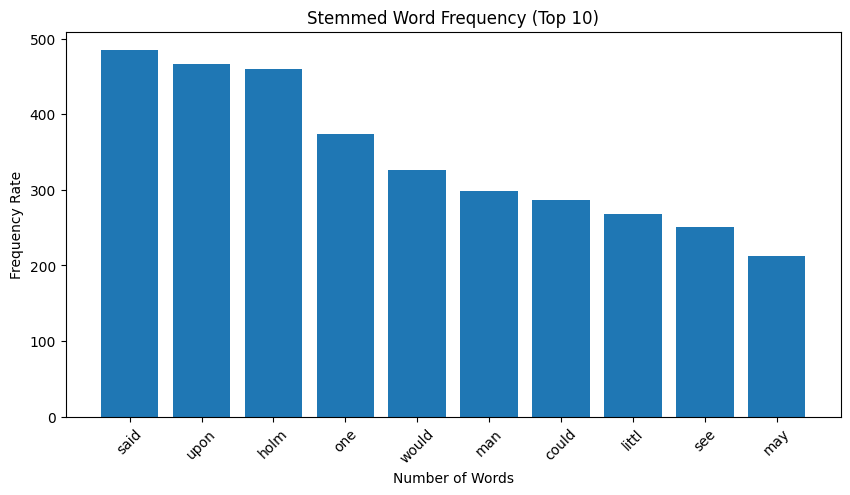

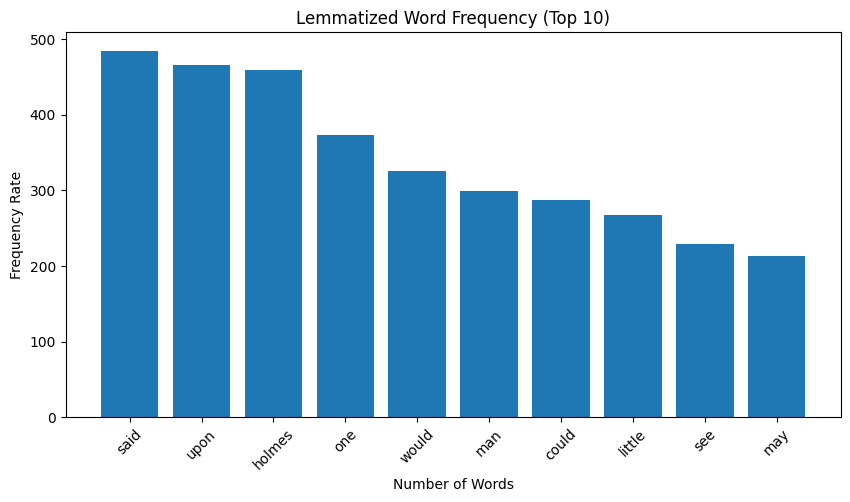

In [ ]:
stemmed_common_words = plot_word_frequency(stemmed_tokens, 'Stemmed Word Frequency (Top 10)')
lemmatized_common_words = plot_word_frequency(lemmatized_tokens, 'Lemmatized Word Frequency (Top 10)')

#### Top 10 most frequent stemmed and lemmatized words

In [ ]:
print("\nTop 10 most frequent stemmed words:")
for word, freq in stemmed_common_words:
    print(f"{word}: {freq}")

print("\nTop 10 most frequent lemmatized words:")
for word, freq in lemmatized_common_words:
    print(f"{word}: {freq}")


Top 10 most frequent stemmed words:
said: 485
upon: 466
holm: 460
one: 374
would: 326
man: 299
could: 287
littl: 268
see: 251
may: 213

Top 10 most frequent lemmatized words:
said: 485
upon: 466
holmes: 460
one: 374
would: 326
man: 299
could: 287
little: 268
see: 229
may: 213


- the function visualizes the plot for stemming and lemmatization
- uses counter class to collect the count of occurances
- Extracted the top 10 most frequent words from the stemmed and lemmatized tokens, and printed them alongside their frequencies after plotting the word frequency analysis.

#### Most common words ending with ‘ing’

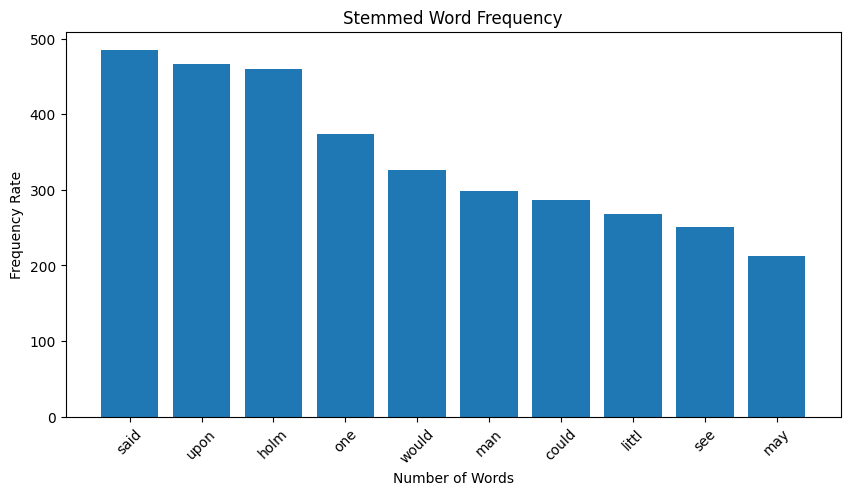

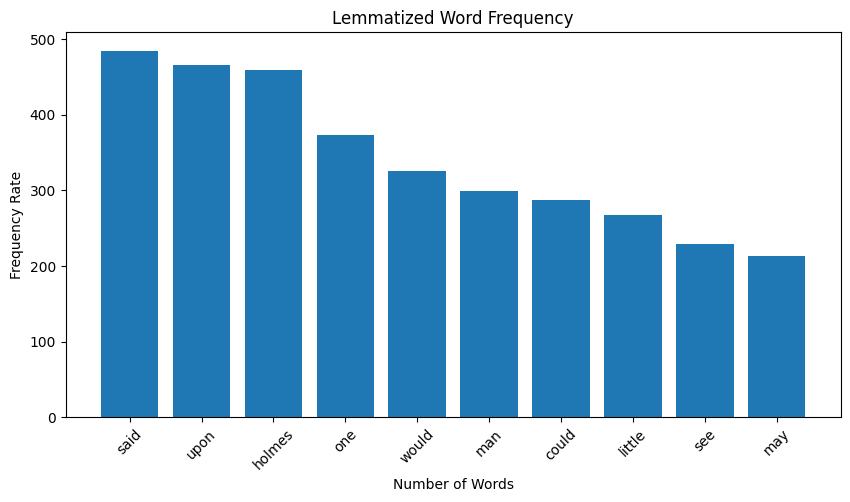

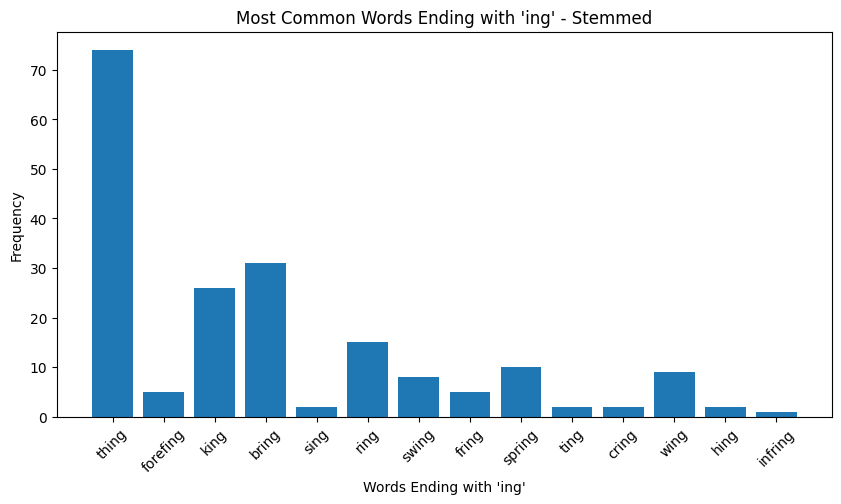

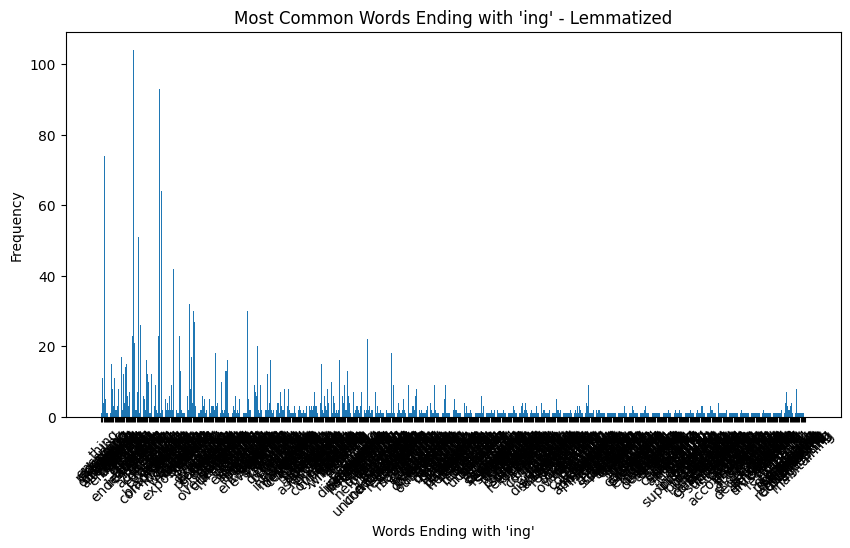

In [ ]:
def plot_words_ending_ing(tokens, title):
    words_ending_ing = [word for word in tokens if word.endswith('ing')]

    word_freq_ing = Counter(words_ending_ing)

    plt.figure(figsize=(10, 5))
    plt.bar(word_freq_ing.keys(), word_freq_ing.values())
    plt.title(f'Most Common Words Ending with \'ing\' - {title}')
    plt.xlabel('Words Ending with \'ing\'')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequency(stemmed_tokens, 'Stemmed Word Frequency')
plot_word_frequency(lemmatized_tokens, 'Lemmatized Word Frequency')

plot_words_ending_ing(stemmed_tokens, 'Stemmed')
plot_words_ending_ing(lemmatized_tokens, 'Lemmatized')

#### Total Number of 'ing' words

In [ ]:
total_count_ing = sum(word_freq_ing.values())
print("Total count of words ending with 'ing':", total_count_ing)


Total count of words ending with 'ing': 2475


### Address the difficulties and challenges
#### Identify and address the difficulties associated with building the preprocessing module, such as designing robust regular expressions, handling linguistic variations, and optimizing for efficiency.

- The challenges I have faced today while developing the code was to remove punctuation and removing the stop words while normalizing, because in my plot the most frequant words contain the punctuations which is not what I want to display.
But from this, I have understood that designing a text preprocessing module has regular expression crafting challenge, has to handle different slangs, word forms.

### Test the module

#### Test the preprocessing module and discuss potential strategies for mitigating the identified difficulties and improving the performance of the preprocessing module in a real-world scenario.

- To improve the performance, I have observed we need to remove stop words like and,or,the,etc.. and punctuations, take care of numericals, fix the lemmatization errors like for instance, ate -> eat, and tokenisation.
- by taking care of these changes, text data processing for a variety of applications can be operated more smoothly and accurately.